In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [2]:
xl = pd.ExcelFile('daily_almaty_18nov19(ext).xlsx')

xl.sheet_names

['sensors', 'data']

In [3]:
data = pd.read_excel('daily_almaty_18nov19(ext).xlsx', sheet_name='data')
data.head()

Row Labels           1          2   3  ...  108    3269728    5917712  Grand Total
0     22-Mar         NaN  91.982979 NaN  ...  NaN  3269728.0  5917712.0    91.982979
1     23-Mar         NaN  84.649269 NaN  ...  NaN  3269728.0  5917712.0    84.649269
2     24-Mar  208.403433  43.675636 NaN  ...  NaN  3269728.0  5917712.0   126.039535
3     25-Mar   67.575610  58.792217 NaN  ...  NaN  3269728.0  5917712.0    63.183913
4     26-Mar   45.677083  48.348401 NaN  ...  NaN  3269728.0  5917712.0    38.572597

[5 rows x 28 columns]

In [0]:
data_total = data[['Row Labels','Grand Total']]

In [5]:
data_total

Row Labels  Grand Total
0       22-Mar    91.982979
1       23-Mar    84.649269
2       24-Mar   126.039535
3       25-Mar    63.183913
4       26-Mar    38.572597
..         ...          ...
963     14-Nov    74.083985
964     15-Nov    53.683390
965     16-Nov    54.625668
966     17-Nov   121.993547
967     18-Nov    98.413690

[968 rows x 2 columns]

In [0]:
days = [r for r in range(data_total.shape[0])]

In [0]:
days;

In [0]:
sums = {}
sums['Grand Total'] = data_total['Grand Total']

In [0]:
sums;

In [0]:
from scipy.fftpack import fft
def plot_with_fft(key):

    fig = plt.figure(1,figsize=[15,5])
    plt.ylabel('Views per Page')
    plt.xlabel('Day')
    #plt.title(labels[key])
    plt.plot(days,sums[key])#,label = labels[key] )
    
    fig = plt.figure(2,figsize=[15,5])
    fft_complex = fft(sums[key].to_numpy())
    fft_mag = [np.sqrt(np.real(x)*np.real(x)+np.imag(x)*np.imag(x)) for x in fft_complex]
    fft_xvals = [day / days[-1] for day in days]
    npts = len(fft_xvals) // 2 + 1
    fft_mag = fft_mag[:npts]
    fft_xvals = fft_xvals[:npts]
        
    plt.ylabel('FFT Magnitude')
    plt.xlabel(r"Frequency [days]$^{-1}$")
    plt.title('Fourier Transform')
    plt.plot(fft_xvals[1:],fft_mag[1:])#,label = labels[key] )
    # Draw lines at 1, 1/2, and 1/3 week periods
    plt.axvline(x=1./7,color='red',alpha=0.3)
    plt.axvline(x=2./7,color='red',alpha=0.3)
    plt.axvline(x=3./7,color='red',alpha=0.3)

    plt.show()

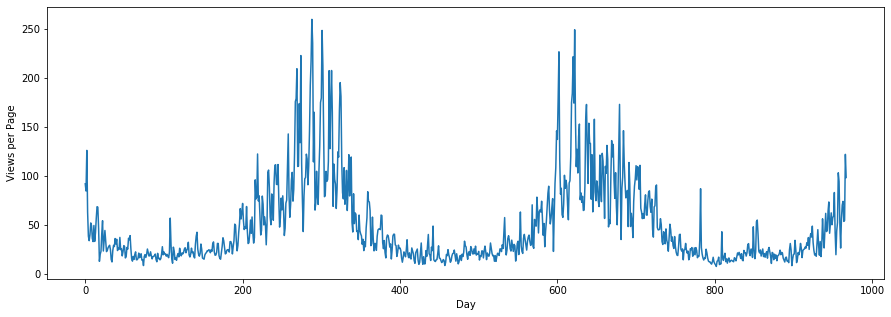

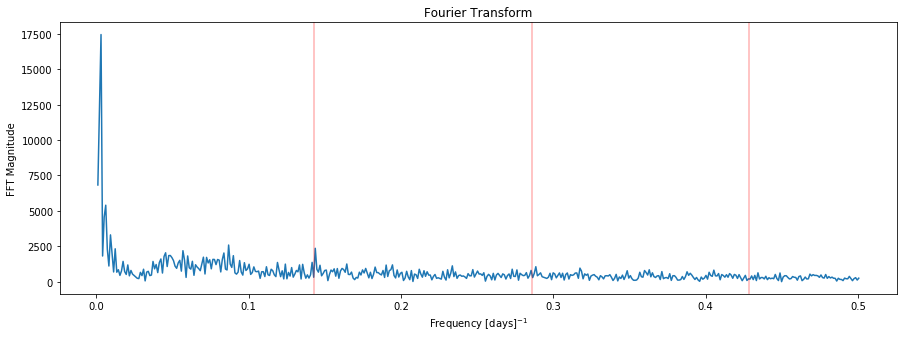

In [11]:
plot_with_fft('Grand Total')

In [12]:
data.head()

Row Labels           1          2   3  ...  108    3269728    5917712  Grand Total
0     22-Mar         NaN  91.982979 NaN  ...  NaN  3269728.0  5917712.0    91.982979
1     23-Mar         NaN  84.649269 NaN  ...  NaN  3269728.0  5917712.0    84.649269
2     24-Mar  208.403433  43.675636 NaN  ...  NaN  3269728.0  5917712.0   126.039535
3     25-Mar   67.575610  58.792217 NaN  ...  NaN  3269728.0  5917712.0    63.183913
4     26-Mar   45.677083  48.348401 NaN  ...  NaN  3269728.0  5917712.0    38.572597

[5 rows x 28 columns]

In [13]:
data.shape

(968, 28)

In [0]:
data_t = data.drop(data.columns[[0, 23, 25, 26, 27]], axis=1)

In [15]:
data_t.head(2)

1          2    3    4    5    6    7    ...  17   18   19   20   104  105  108
0  NaN  91.982979  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1  NaN  84.649269  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN

[2 rows x 23 columns]

In [16]:
data_t.head(2)

1          2    3    4    5    6    7    ...  17   18   19   20   104  105  108
0  NaN  91.982979  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1  NaN  84.649269  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN

[2 rows x 23 columns]

In [17]:
sensors = pd.read_excel('daily_almaty_18nov19(ext).xlsx', sheet_name='sensors', header=None)
sensors.head(30)

0                          1       2          3       4       5
0     1      Сейфуллина - Дулатова  Алматы  Казахстан  43.313  76.939
1     2        Альфараби - Маркова  Алматы  Казахстан  43.224  76.938
2     3           Абая - Тлендиева  Алматы  Казахстан  43.240  76.874
3     4              Парк Горького  Алматы  Казахстан  43.265  76.973
4     5         ТолеБи - Байзакова  Алматы  Казахстан  43.253  76.910
5     6  Розыбакиева - Байкадамова  Алматы  Казахстан  43.214  76.893
6     7                 Кок Кайнар  Алматы  Казахстан  43.296  76.844
7     8       Рыскулова - Момышулы  Алматы  Казахстан  43.254  76.820
8     9                   Ерменсай  Алматы  Казахстан  43.174  76.917
9    10         Тулебаева-Джамбула  Алматы  Казахстан  43.248  76.949
10   11                   Аскарова  Алматы  Казахстан  43.189  76.868
11   12            Каменское плато  Алматы  Казахстан  43.177  76.966
12   13      Фурманова-Ташкентская  Алматы  Казахстан  43.269  76.944
13   14                      Мамыр  Алматы  Казахстан  43.216  76.848
14   15            ЖК "Асыл Арман"  Алматы  Казахстан  43.231  76.754
15   16                  Жана Куат  Алматы  Казахстан  43.397  77.027
16   17                  Баганашыл  Алматы  Казахстан  43.195  76.915
17   18                  Кыргаулды  Алматы  Казахстан  43.172  76.736
18   19            Военный городок  Алматы  Казахстан  43.369  76.987
19   20                мкрн Карасу  Алматы  Казахстан  43.337  76.904
20  104        Сатпаева-Луганского  Алматы  Казахстан  43.241  76.960
21  105                       Абай  Алматы  Казахстан  43.214  76.750
22  108                Жана Кайрат  Алматы  Казахстан  43.312  77.001

In [0]:
sensors_list = sensors[1].tolist()

In [19]:
len(sensors_list)

23

In [20]:
data_t.shape

(968, 23)

In [0]:
data_t.columns = [i for i in sensors_list]

In [22]:
data_t.head(2)

Сейфуллина - Дулатова  Альфараби - Маркова  ...  Абай  Жана Кайрат
0                    NaN            91.982979  ...   NaN          NaN
1                    NaN            84.649269  ...   NaN          NaN

[2 rows x 23 columns]

In [0]:
labels = { i : i for i in data_t.columns.tolist() }

In [24]:
labels

{'Абай': 'Абай',
 'Абая - Тлендиева': 'Абая - Тлендиева',
 'Альфараби - Маркова': 'Альфараби - Маркова',
 'Аскарова': 'Аскарова',
 'Баганашыл': 'Баганашыл',
 'Военный городок': 'Военный городок',
 'Ерменсай': 'Ерменсай',
 'ЖК "Асыл Арман"': 'ЖК "Асыл Арман"',
 'Жана Кайрат': 'Жана Кайрат',
 'Жана Куат': 'Жана Куат',
 'Каменское плато': 'Каменское плато',
 'Кок Кайнар': 'Кок Кайнар',
 'Кыргаулды': 'Кыргаулды',
 'Мамыр': 'Мамыр',
 'Парк Горького': 'Парк Горького',
 'Розыбакиева - Байкадамова': 'Розыбакиева - Байкадамова',
 'Рыскулова - Момышулы': 'Рыскулова - Момышулы',
 'Сатпаева-Луганского': 'Сатпаева-Луганского',
 'Сейфуллина - Дулатова': 'Сейфуллина - Дулатова',
 'ТолеБи - Байзакова': 'ТолеБи - Байзакова',
 'Тулебаева-Джамбула': 'Тулебаева-Джамбула',
 'Фурманова-Ташкентская': 'Фурманова-Ташкентская',
 'мкрн Карасу': 'мкрн Карасу'}

In [0]:
data_t = data_t.fillna(method='ffill')

In [0]:
data_t = data_t.fillna(method='bfill')

In [27]:
data_t

Сейфуллина - Дулатова  Альфараби - Маркова  ...       Абай  Жана Кайрат
0               208.403433            91.982979  ...  10.928571    23.783831
1               208.403433            84.649269  ...  10.928571    23.783831
2               208.403433            43.675636  ...  10.928571    23.783831
3                67.575610            58.792217  ...  10.928571    23.783831
4                45.677083            48.348401  ...  10.928571    23.783831
..                     ...                  ...  ...        ...          ...
963             130.187630            43.769608  ...  14.297619    79.292786
964              82.963169            43.769608  ...  14.297619    56.296742
965              58.260598            43.769608  ...  14.297619    46.500000
966             174.180237            43.769608  ...  14.297619   127.625352
967             182.833333            43.769608  ...  14.297619    89.000000

[968 rows x 23 columns]

In [0]:
sums = {}
for key in labels:
    #print(key)
    sums[key] = data_t[key]
    #sums[key] = lang_sets[key].iloc[:,1:].sum(axis=0) / lang_sets[key].shape[0]

In [0]:
def plot_with_fft(key):

    fig = plt.figure(1,figsize=[15,5])
    plt.ylabel('Sum')
    plt.xlabel('Day')
    plt.title(labels[key])
    plt.plot(days,sums[key],label = labels[key] )
    
    fig = plt.figure(2,figsize=[15,5])
    fft_complex = fft(sums[key].to_numpy())
    fft_mag = [np.sqrt(np.real(x)*np.real(x)+np.imag(x)*np.imag(x)) for x in fft_complex]
    fft_xvals = [day / days[-1] for day in days]
    npts = len(fft_xvals) // 2 + 1
    fft_mag = fft_mag[:npts]
    fft_xvals = fft_xvals[:npts]
        
    plt.ylabel('FFT Magnitude')
    plt.xlabel(r"Frequency [days]$^{-1}$")
    plt.title('Fourier Transform')
    plt.plot(fft_xvals[1:],fft_mag[1:],label = labels[key] )
    # Draw lines at 1, 1/2, and 1/3 week periods
    plt.axvline(x=1./7,color='red',alpha=0.3)
    plt.axvline(x=2./7,color='red',alpha=0.3)
    plt.axvline(x=3./7,color='red',alpha=0.3)

    plt.show()

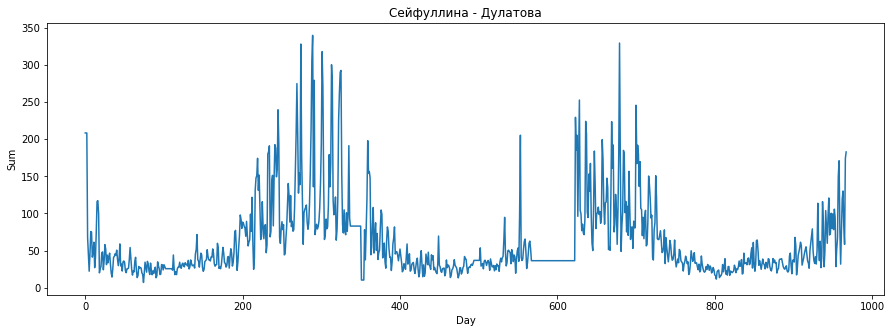

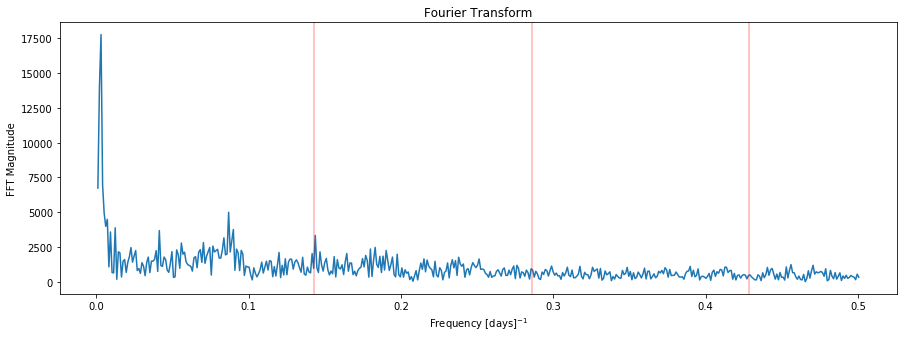

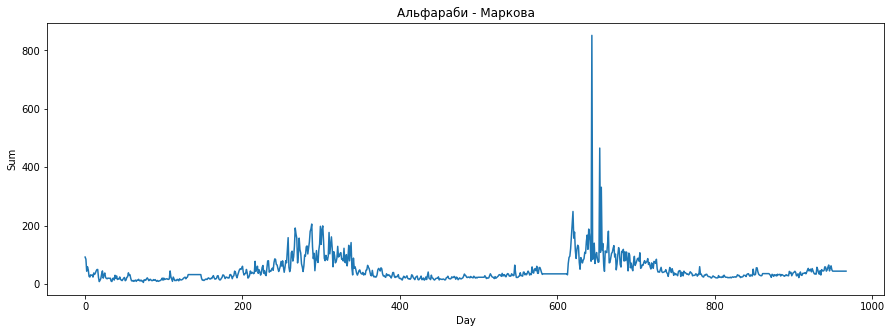

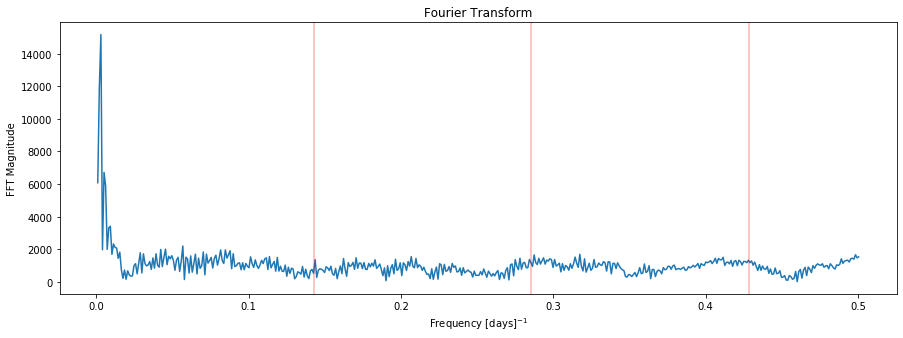

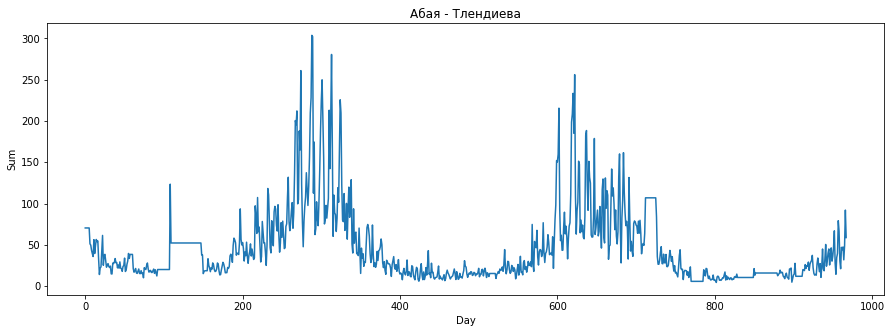

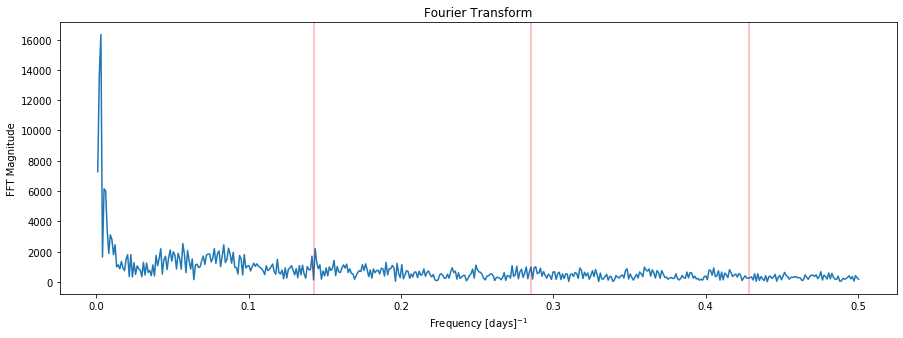

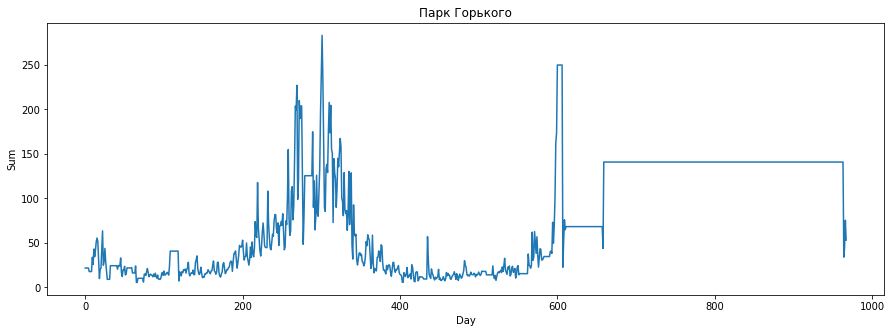

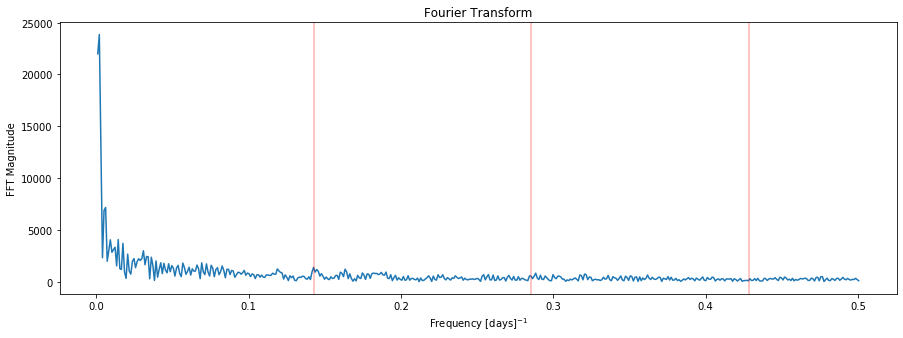

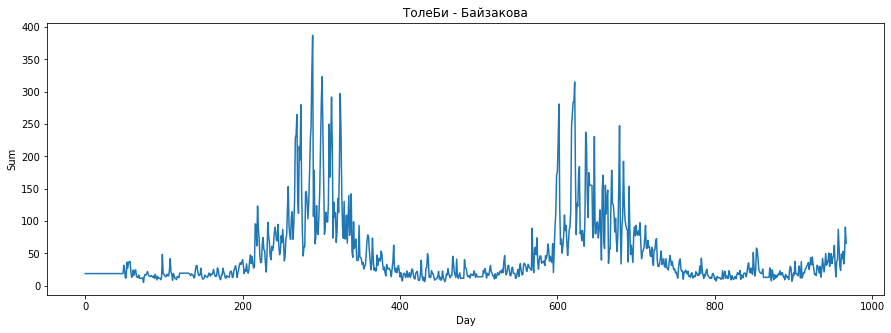

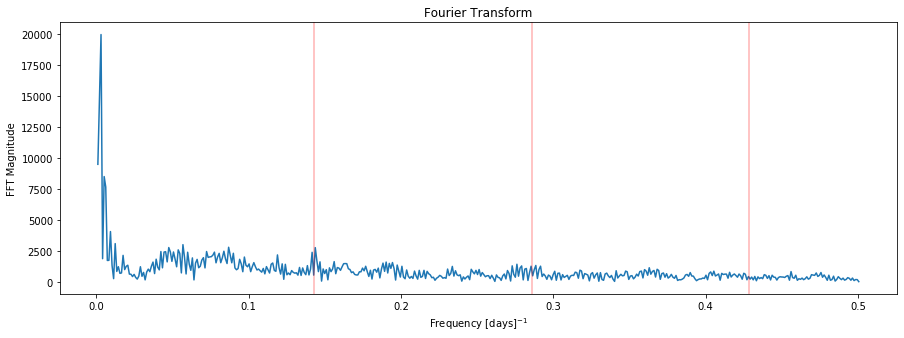

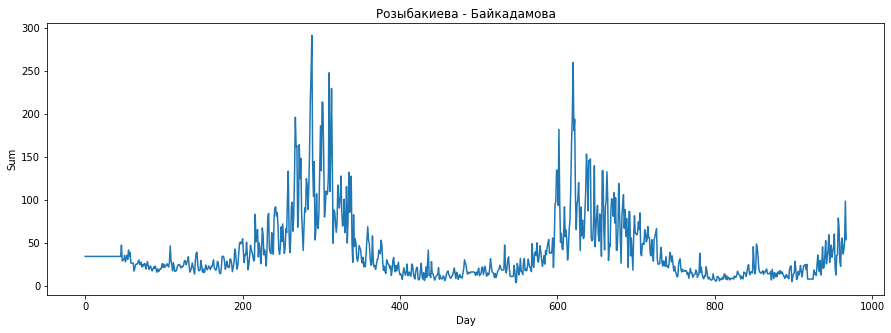

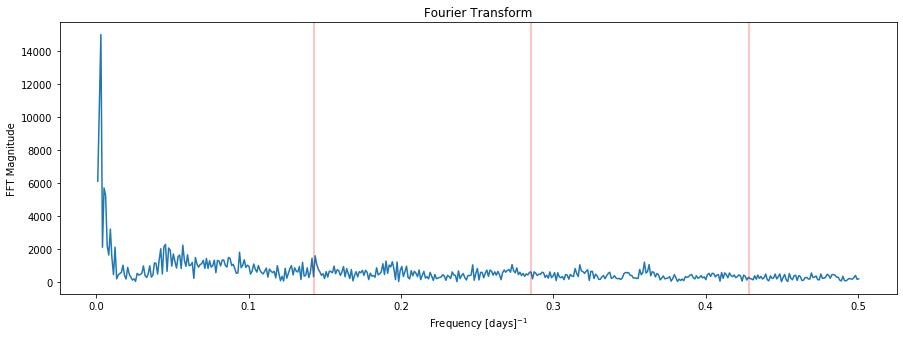

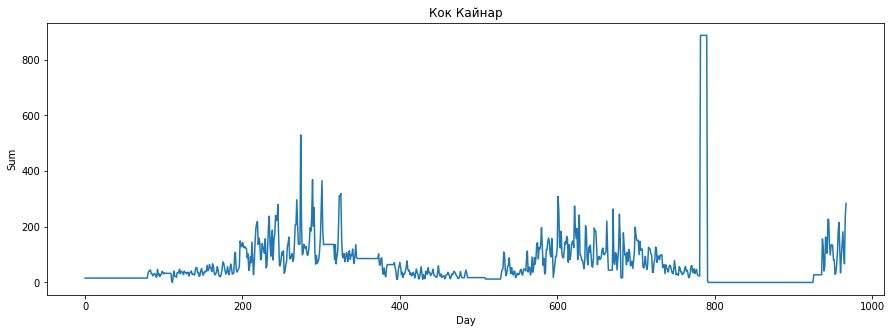

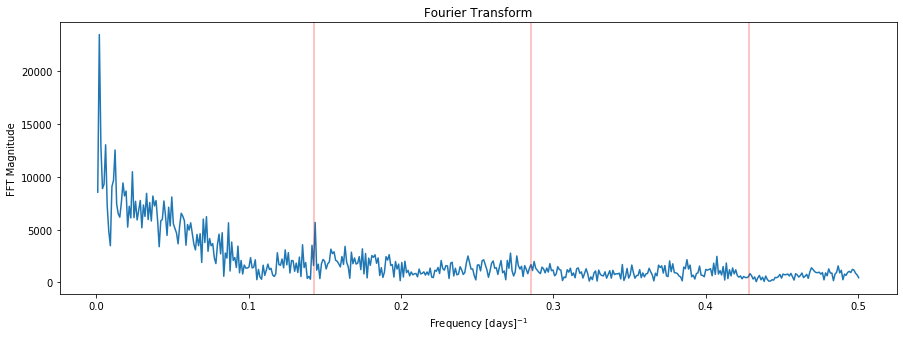

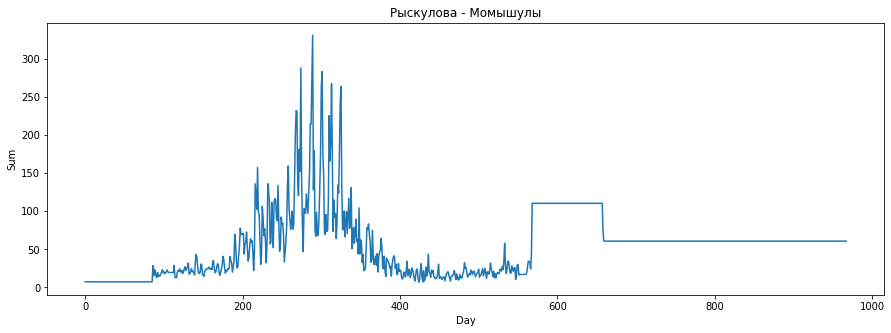

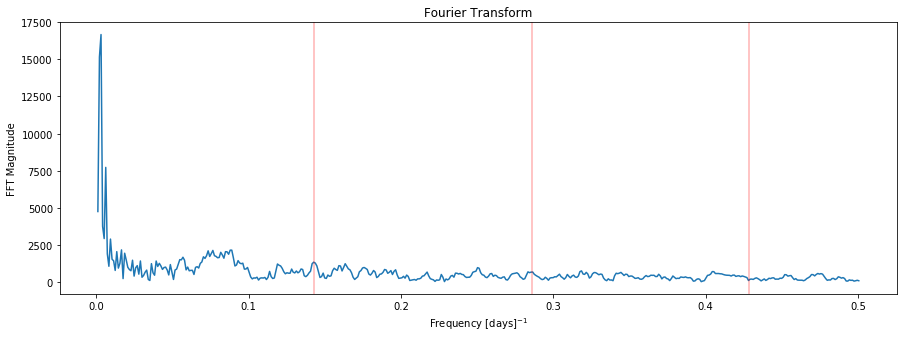

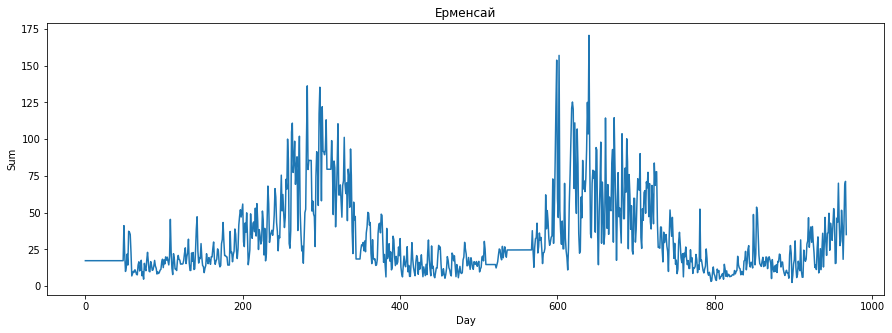

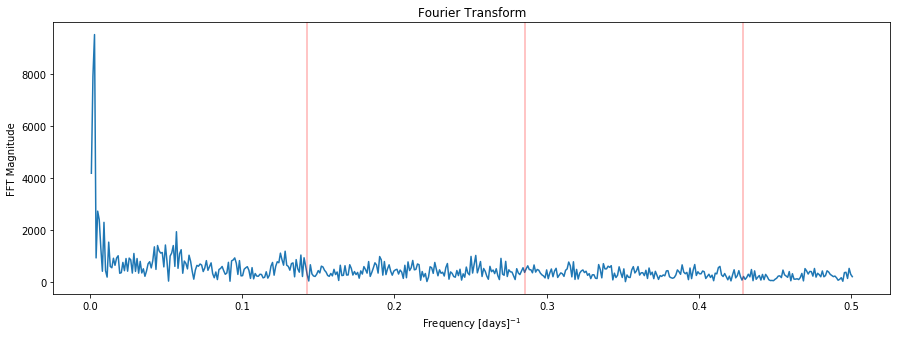

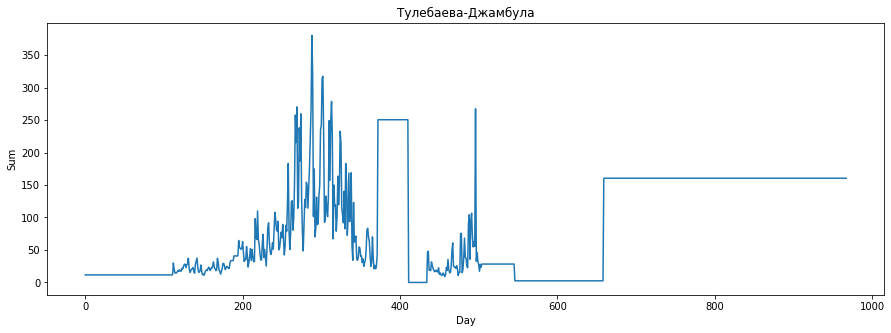

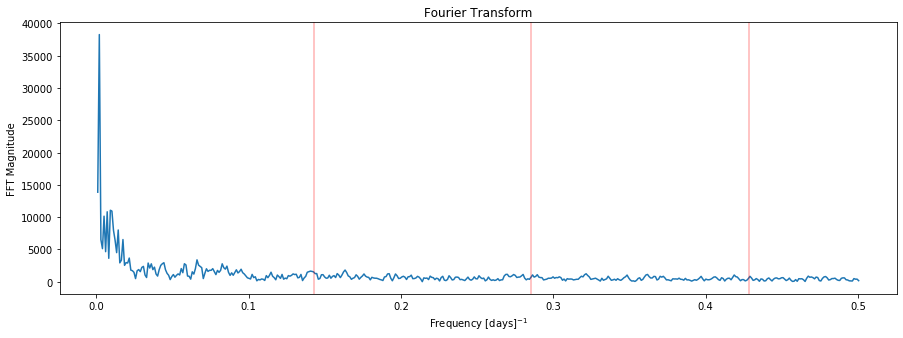

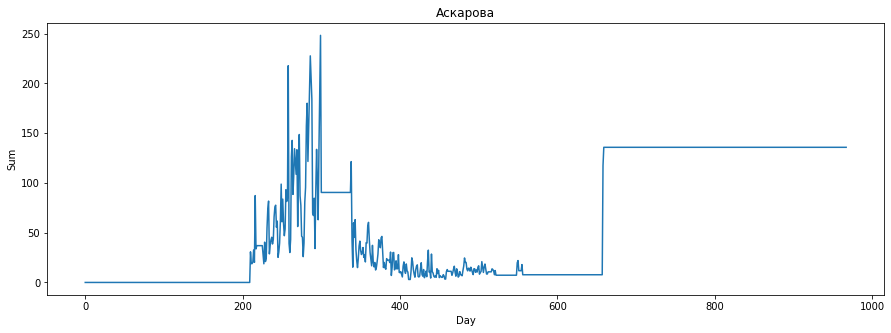

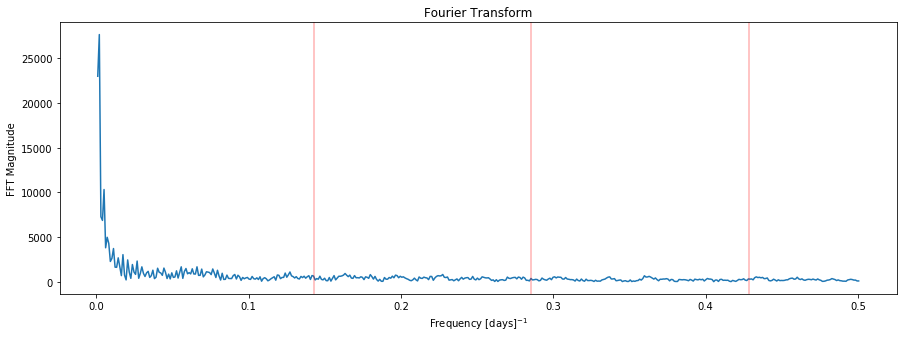

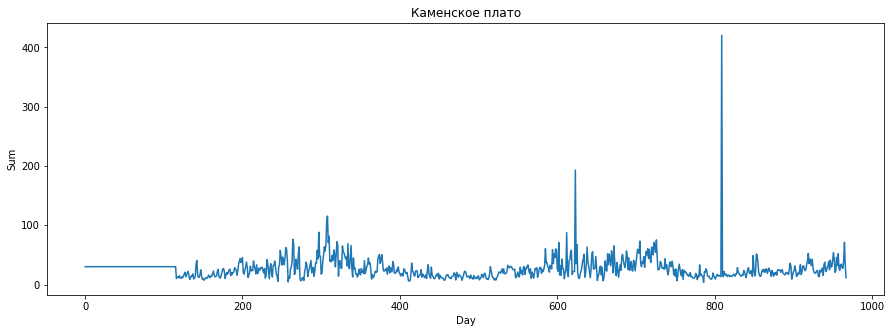

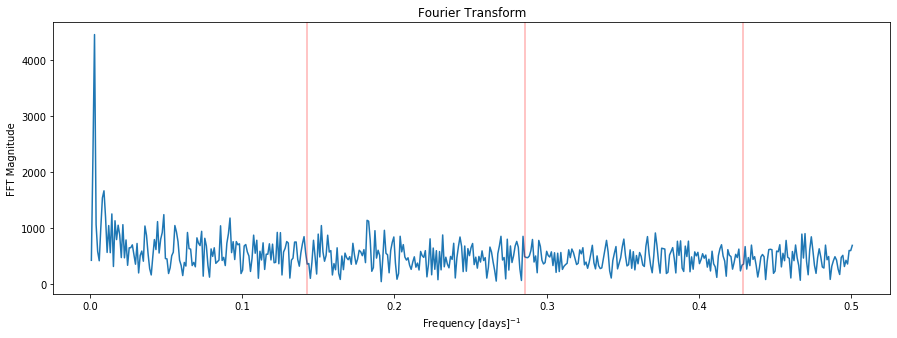

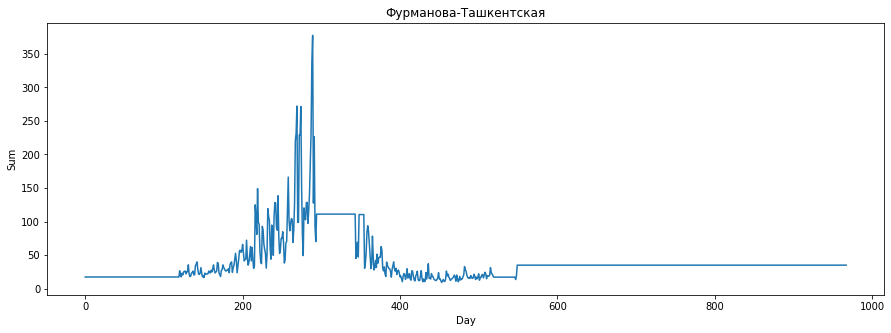

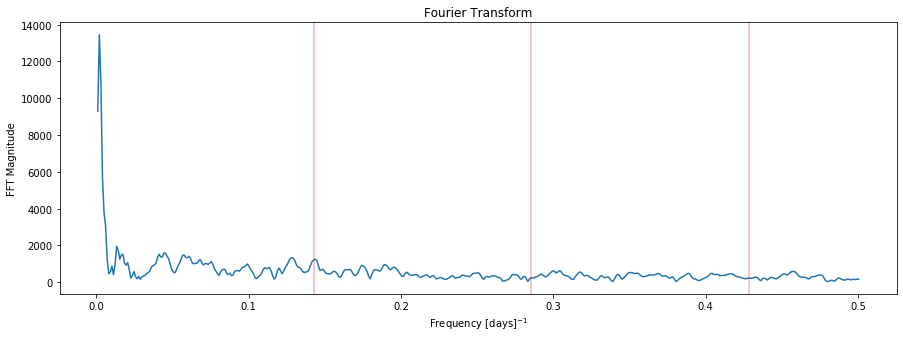

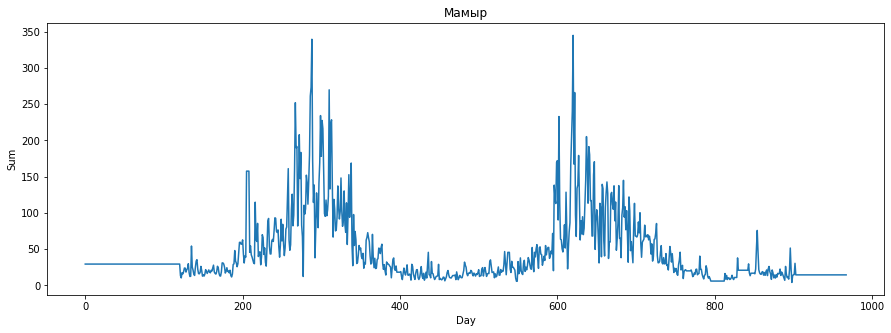

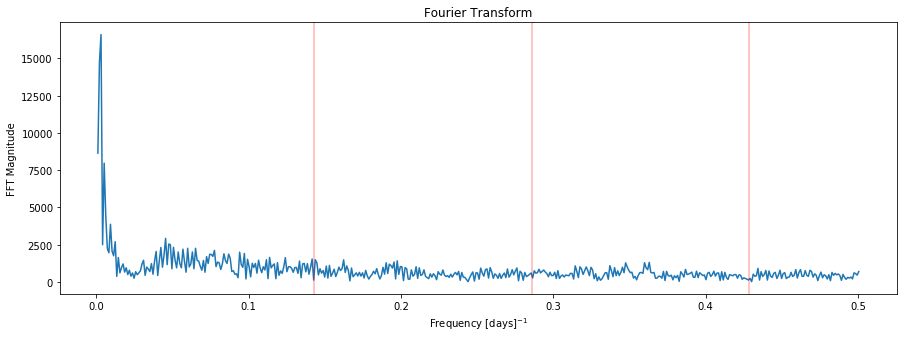

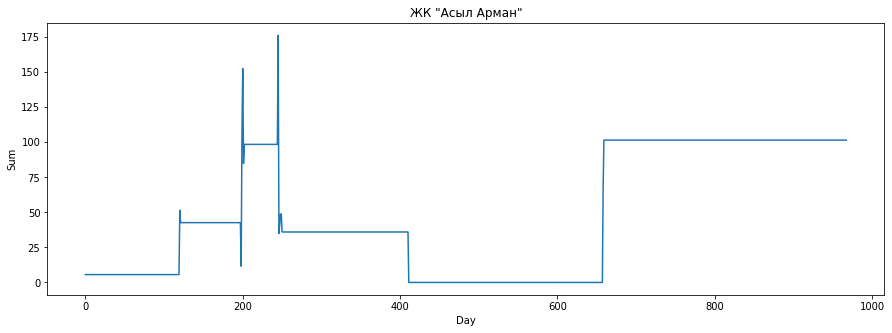

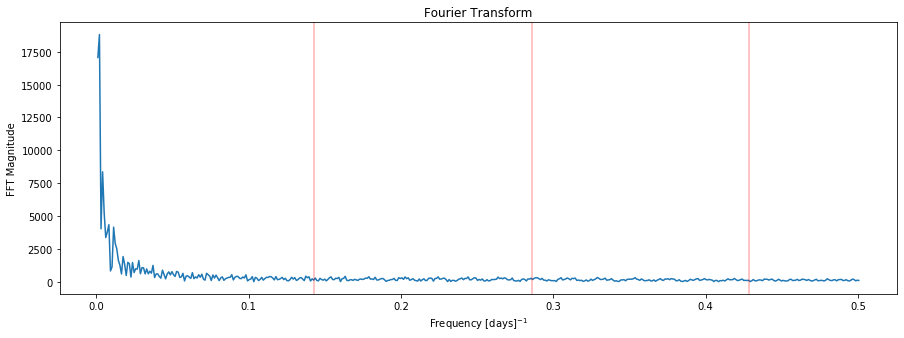

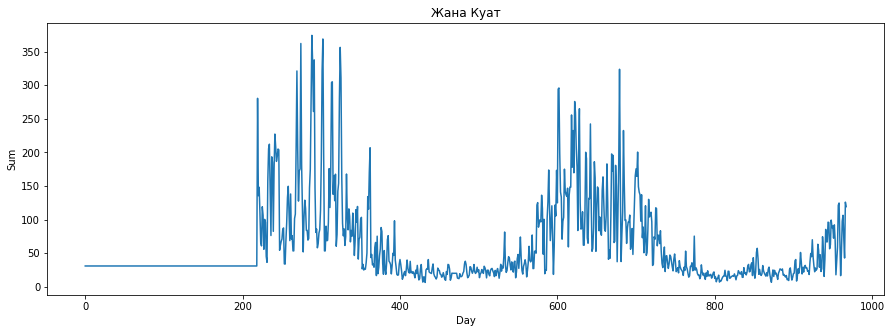

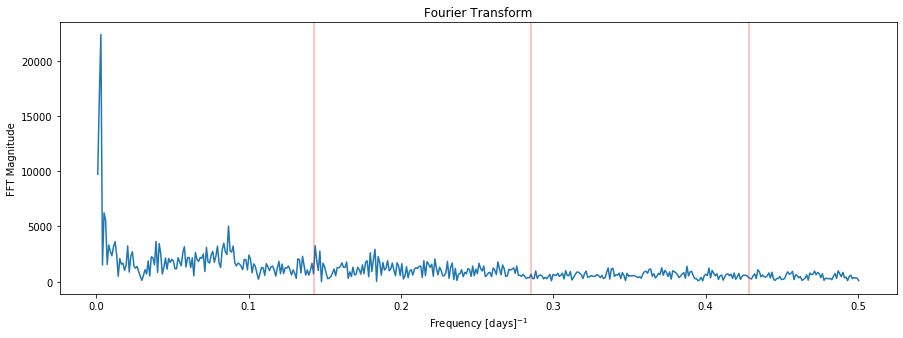

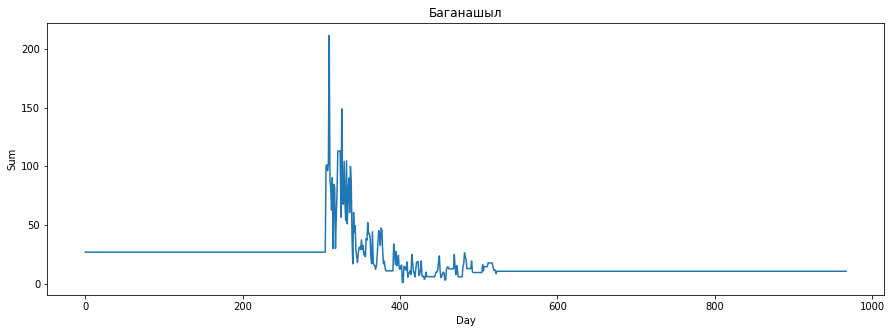

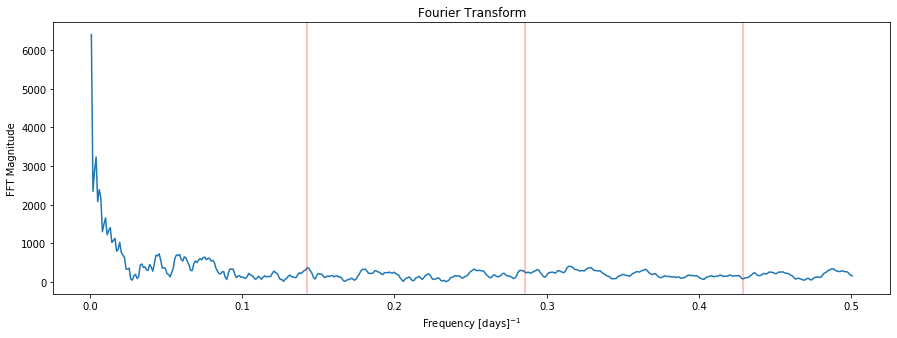

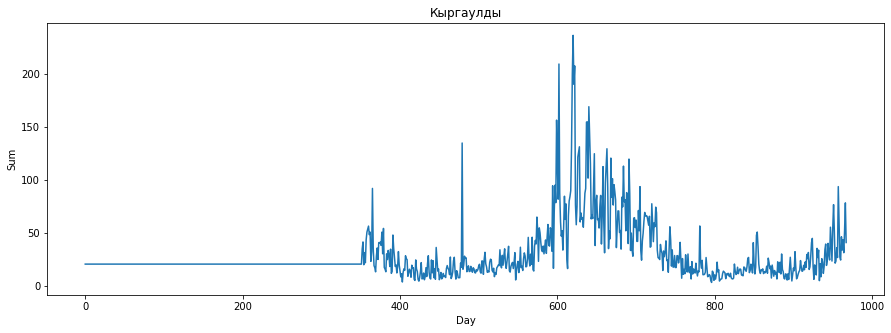

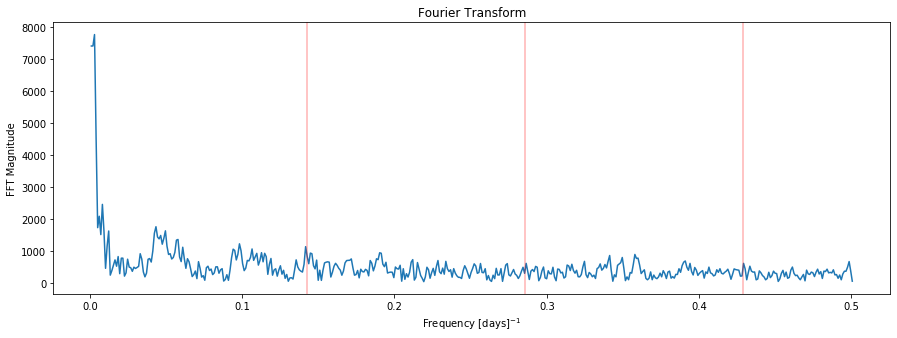

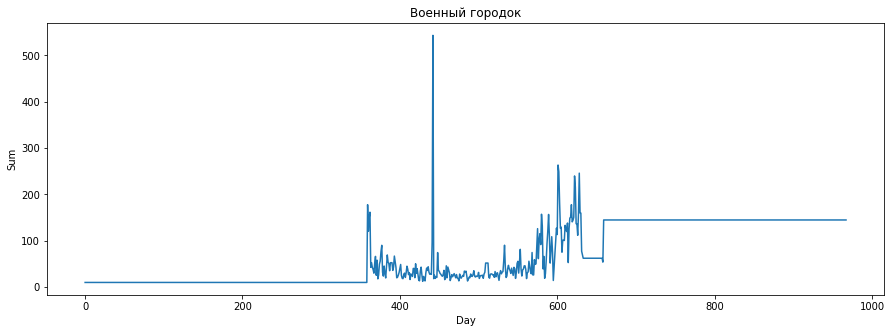

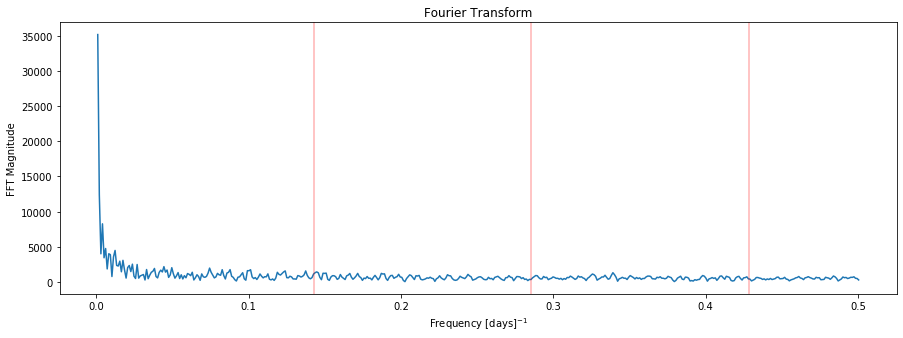

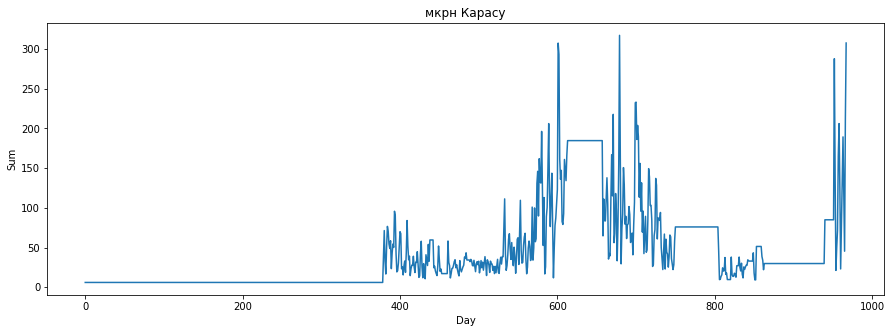

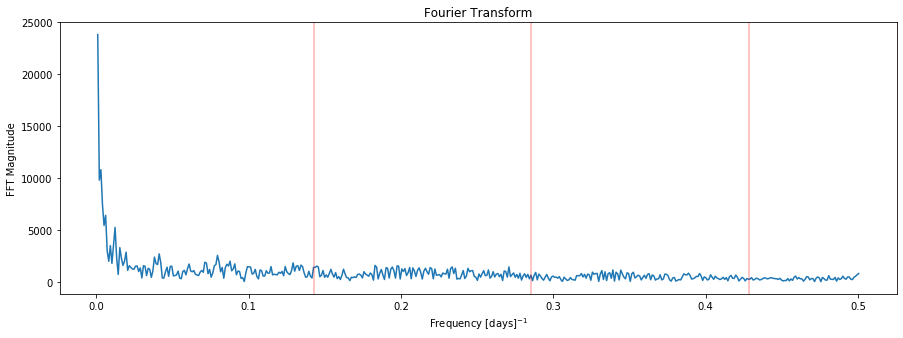

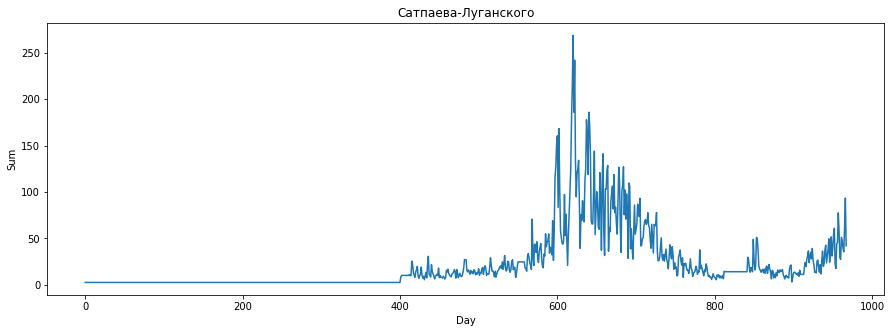

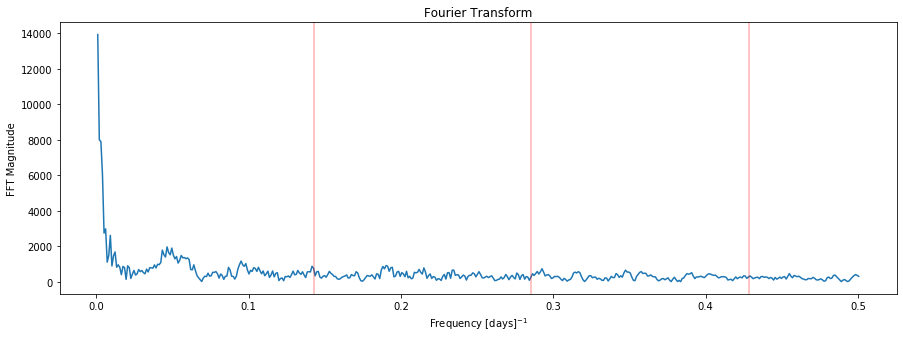

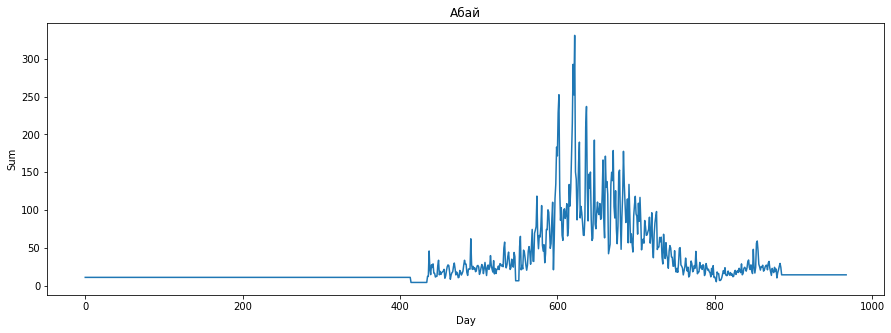

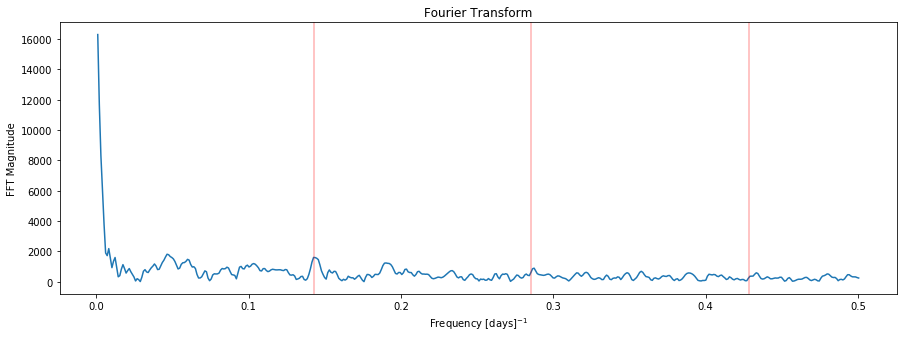

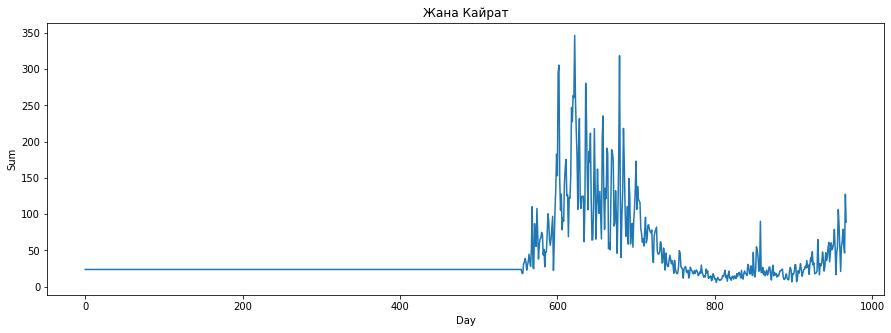

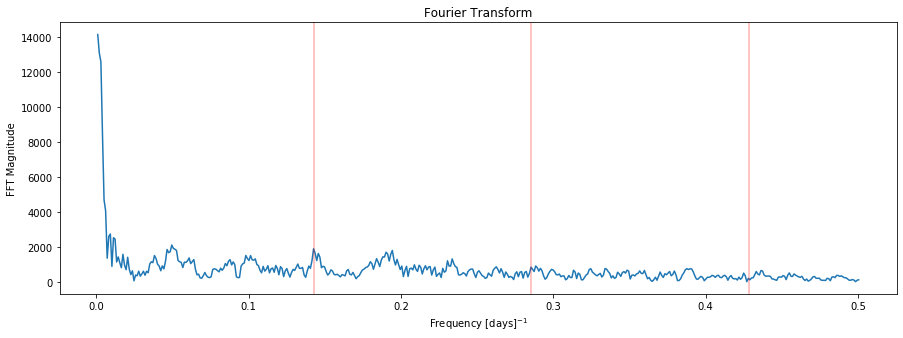

In [31]:
for key in sums:
    plot_with_fft(key)

In [0]:
import seaborn as sns
sns.set(style="whitegrid")

In [33]:
data_total

Row Labels  Grand Total
0       22-Mar    91.982979
1       23-Mar    84.649269
2       24-Mar   126.039535
3       25-Mar    63.183913
4       26-Mar    38.572597
..         ...          ...
963     14-Nov    74.083985
964     15-Nov    53.683390
965     16-Nov    54.625668
966     17-Nov   121.993547
967     18-Nov    98.413690

[968 rows x 2 columns]

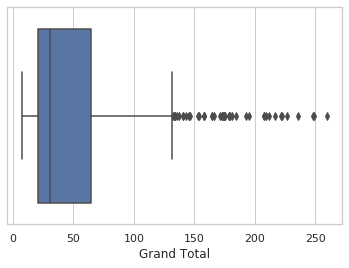

In [34]:
ax = sns.boxplot(x=data_total["Grand Total"])

In [35]:
len(sums)

23

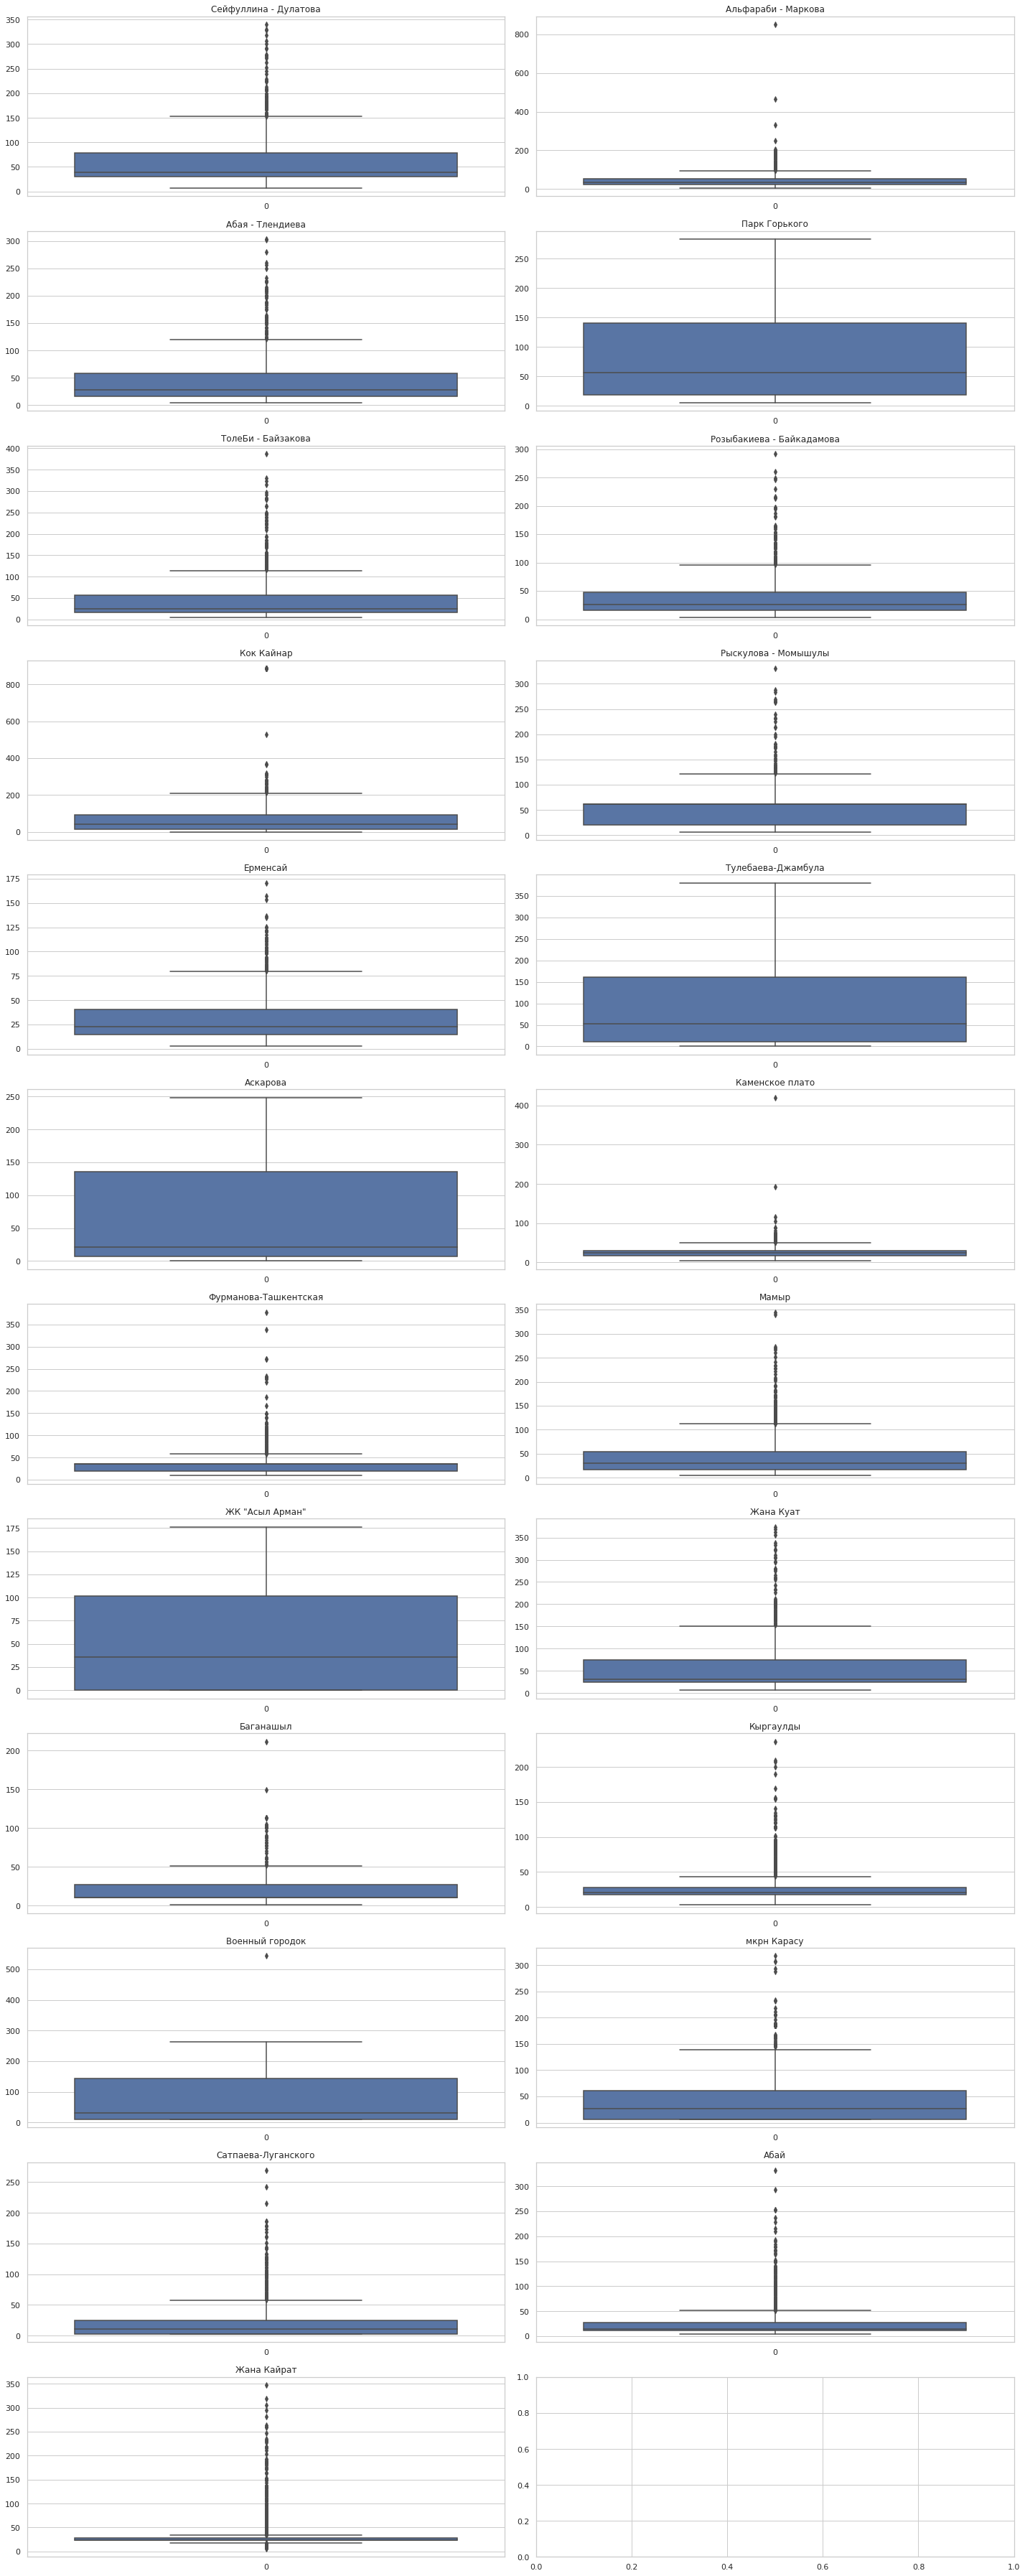

In [36]:
fig, axis = plt.subplots(12, 2, figsize=(20, 50))
ax = axis.ravel()
i = 0 
for key in sums:
    sns.boxplot(data=sums[key], ax=ax[i]).set_title(key)
    i = i + 1
fig.tight_layout()

In [0]:
import datetime

In [0]:
start_date = datetime.datetime.strptime("03/22/17", "%m/%d/%y")
#end_date = date_1 + datetime.timedelta(days=10)

In [0]:
data_ts = data_t.rename_axis('tt').reset_index().copy()

In [0]:
data_ts['TS'] = data_ts.apply(lambda row: start_date+datetime.timedelta(days=row.tt), axis=1)

In [0]:
data_ts= data_ts.set_index('TS');

In [0]:
data_ts = data_ts.drop(['tt'], axis=1)

In [43]:
data_ts.head(3)

Сейфуллина - Дулатова  Альфараби - Маркова  ...       Абай  Жана Кайрат
TS                                                      ...                        
2017-03-22             208.403433            91.982979  ...  10.928571    23.783831
2017-03-23             208.403433            84.649269  ...  10.928571    23.783831
2017-03-24             208.403433            43.675636  ...  10.928571    23.783831

[3 rows x 23 columns]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

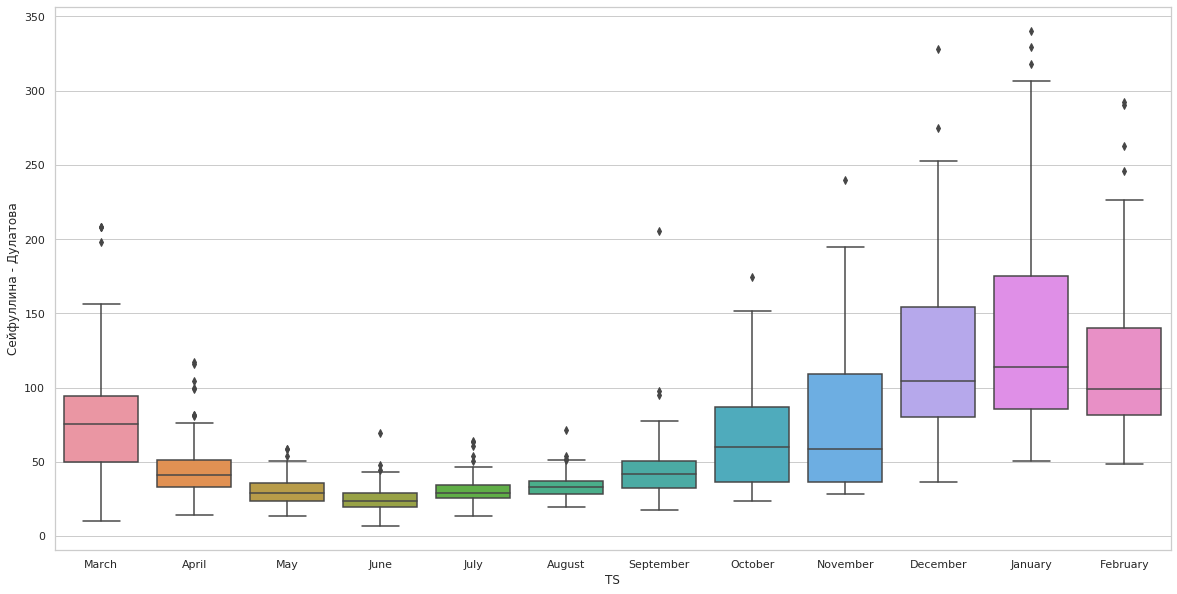

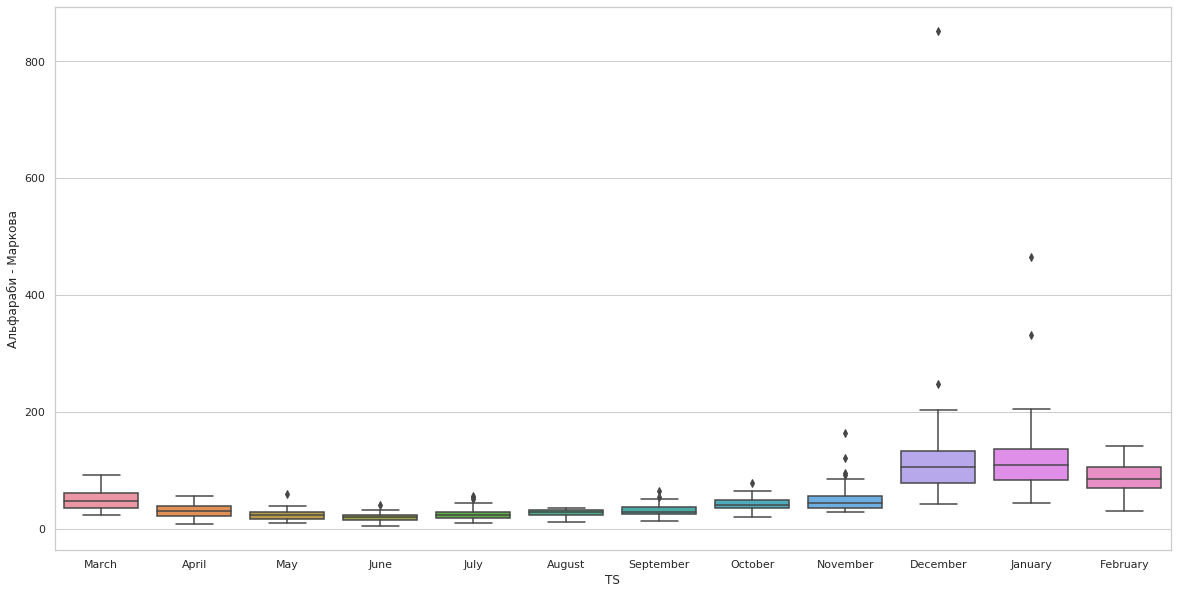

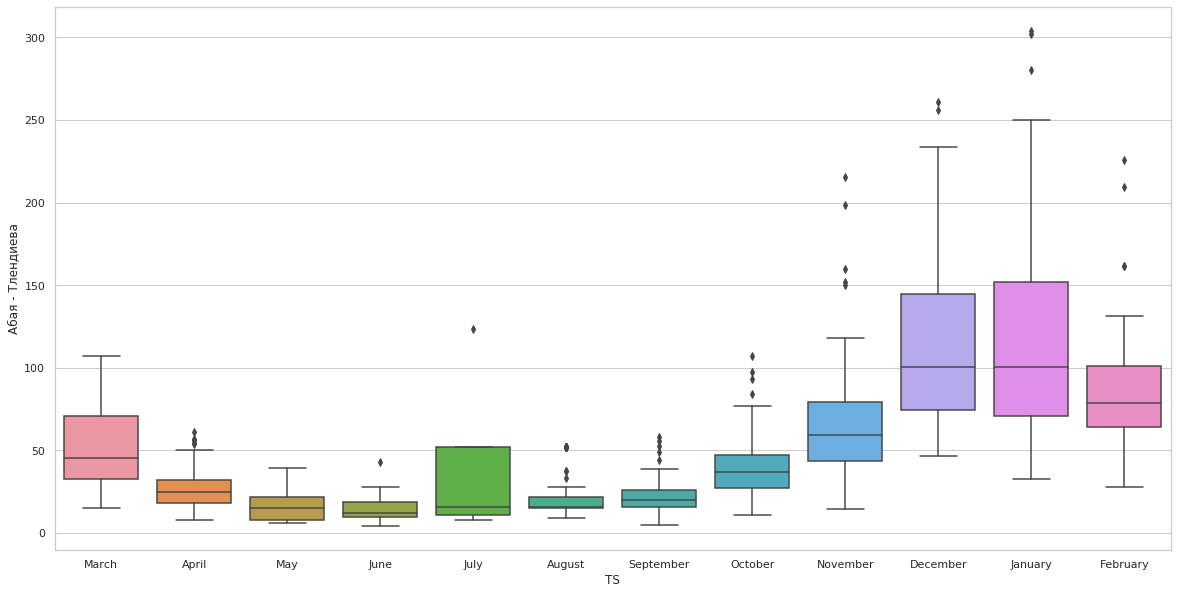

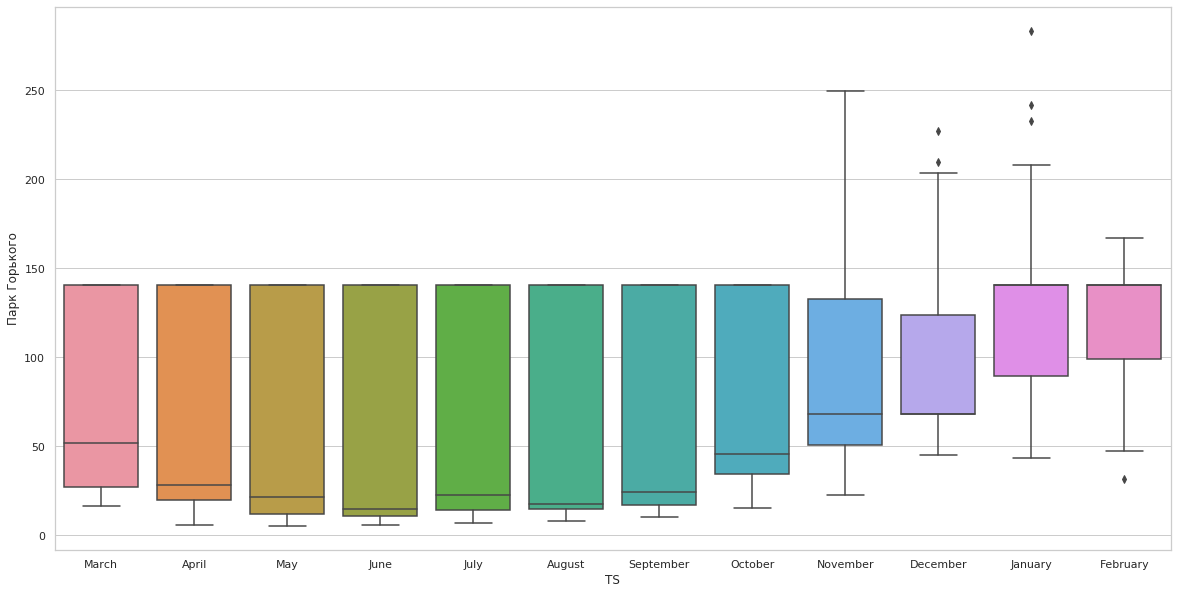

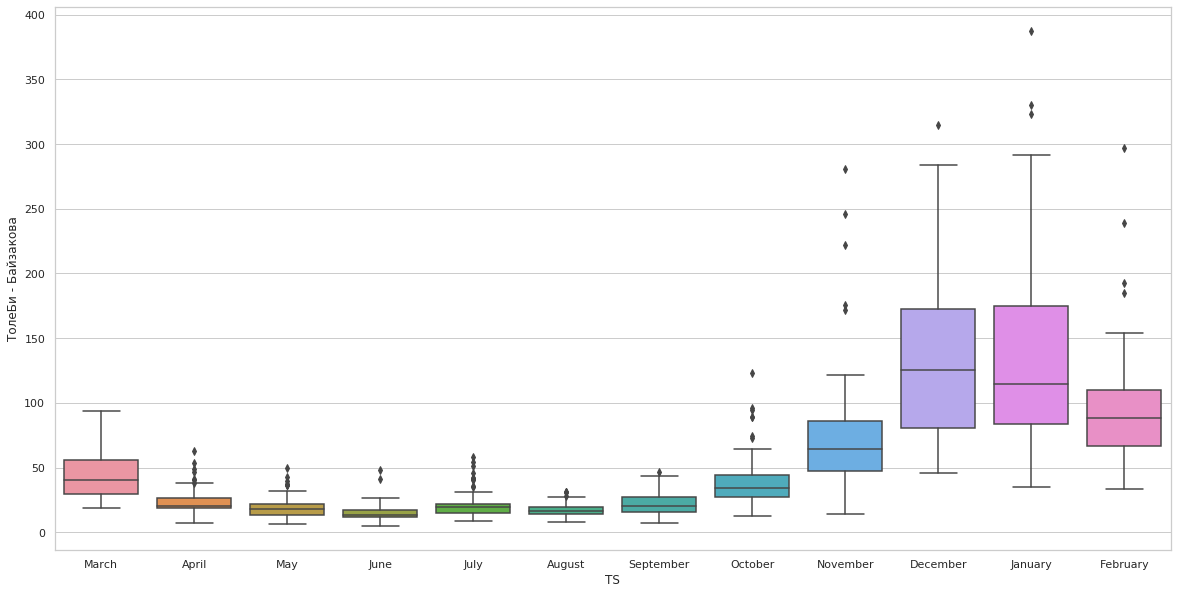

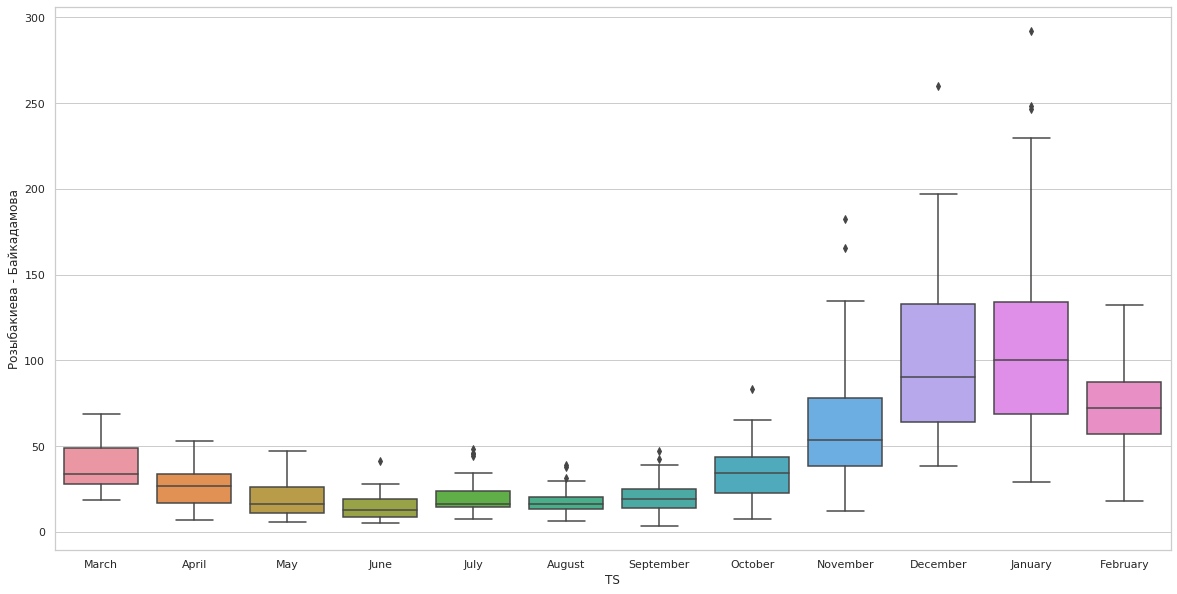

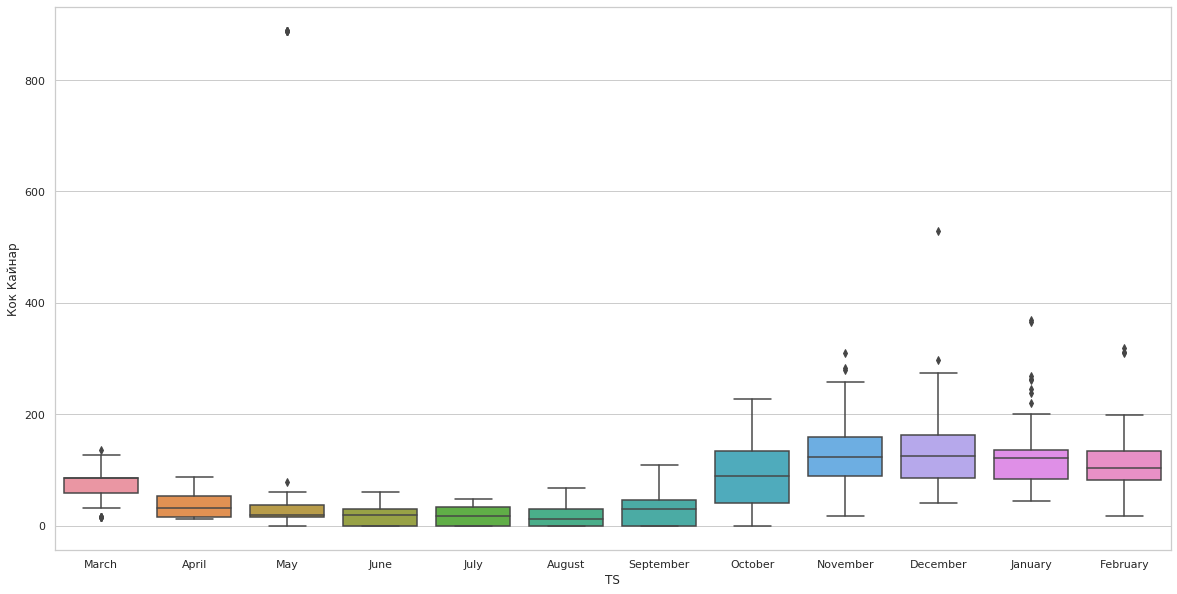

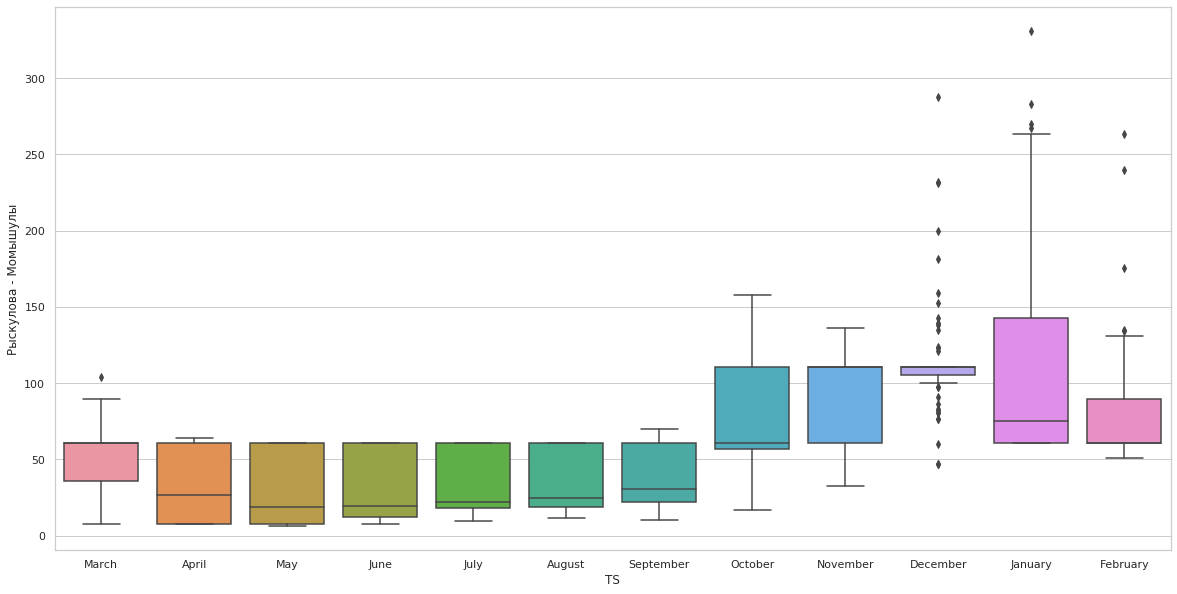

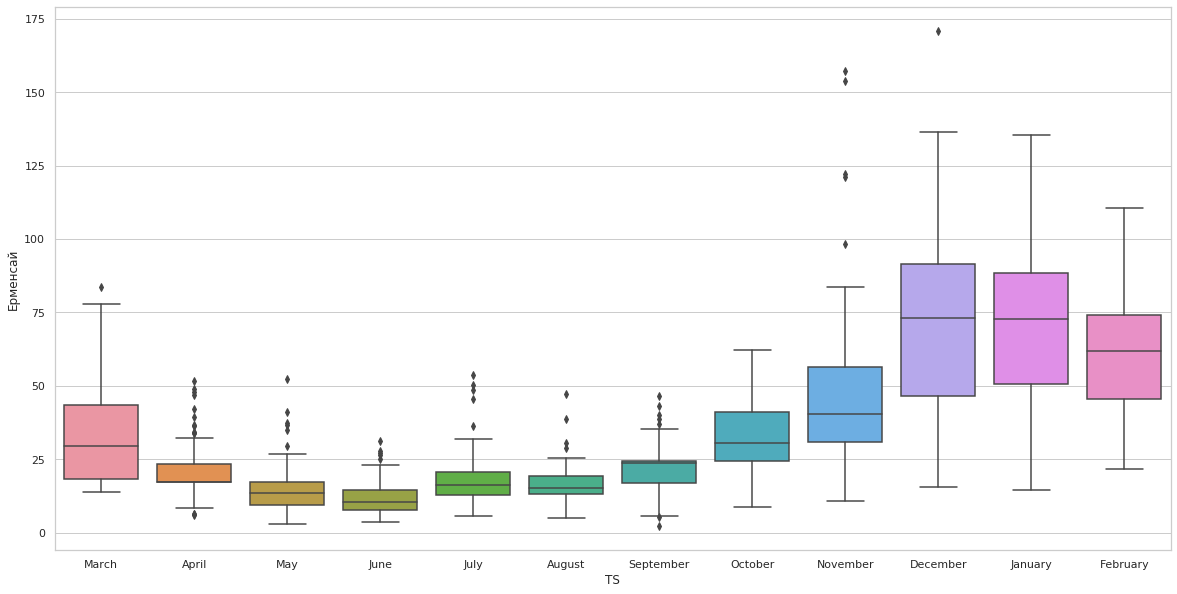

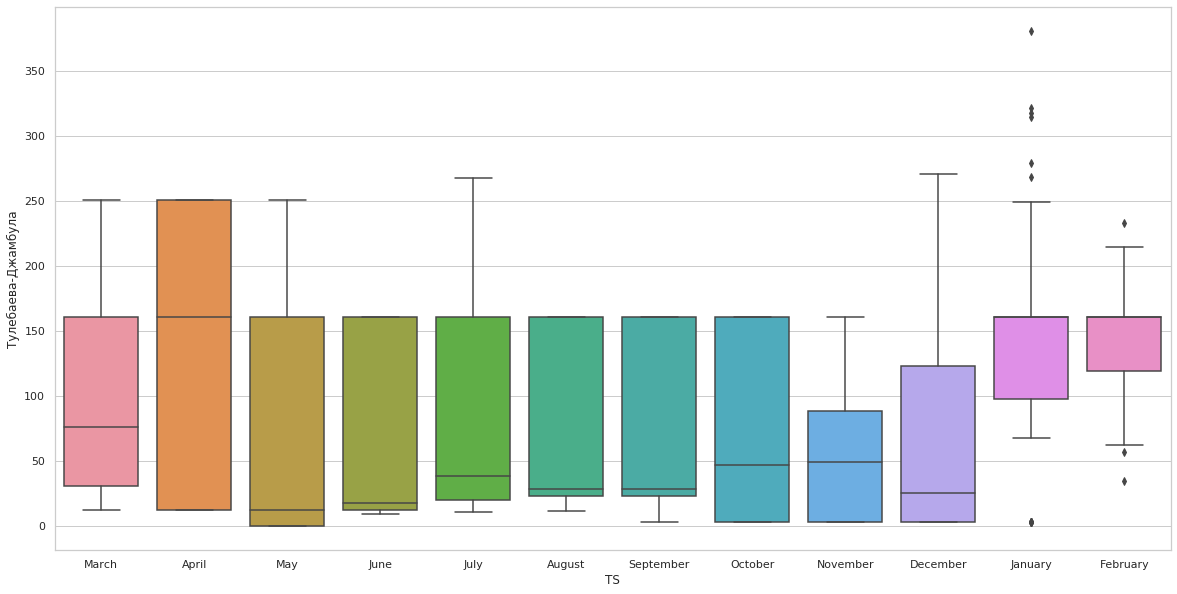

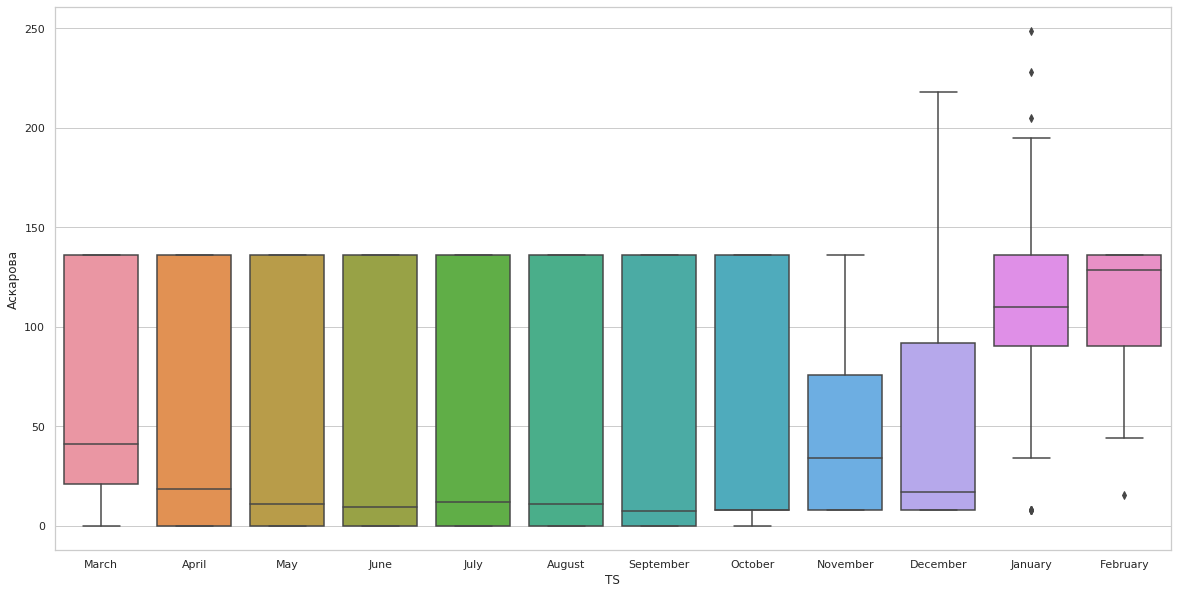

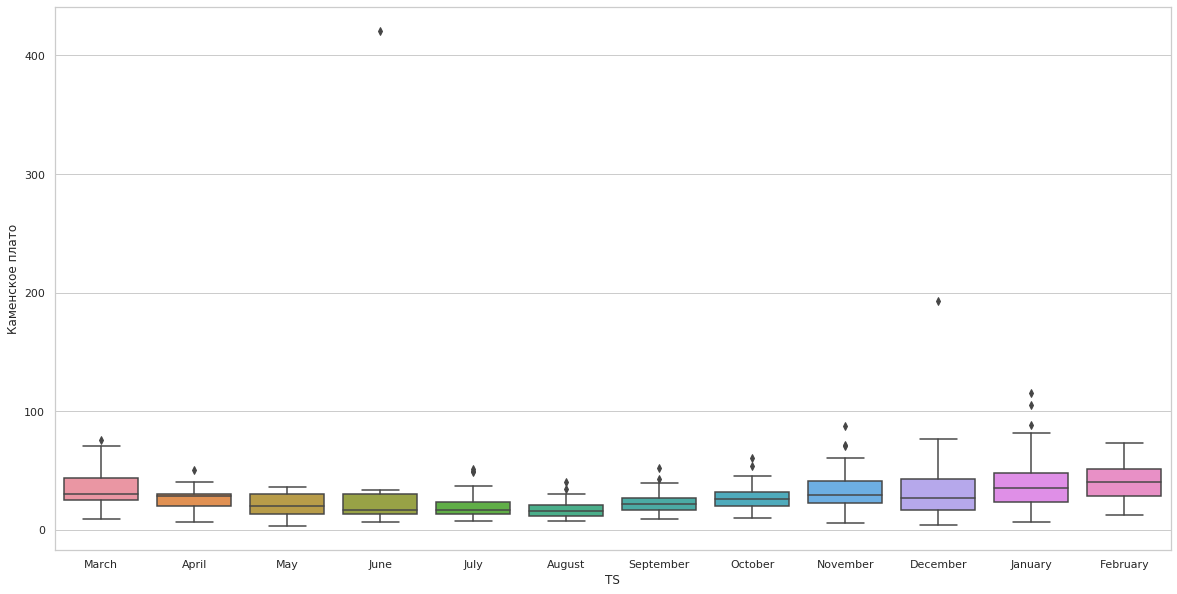

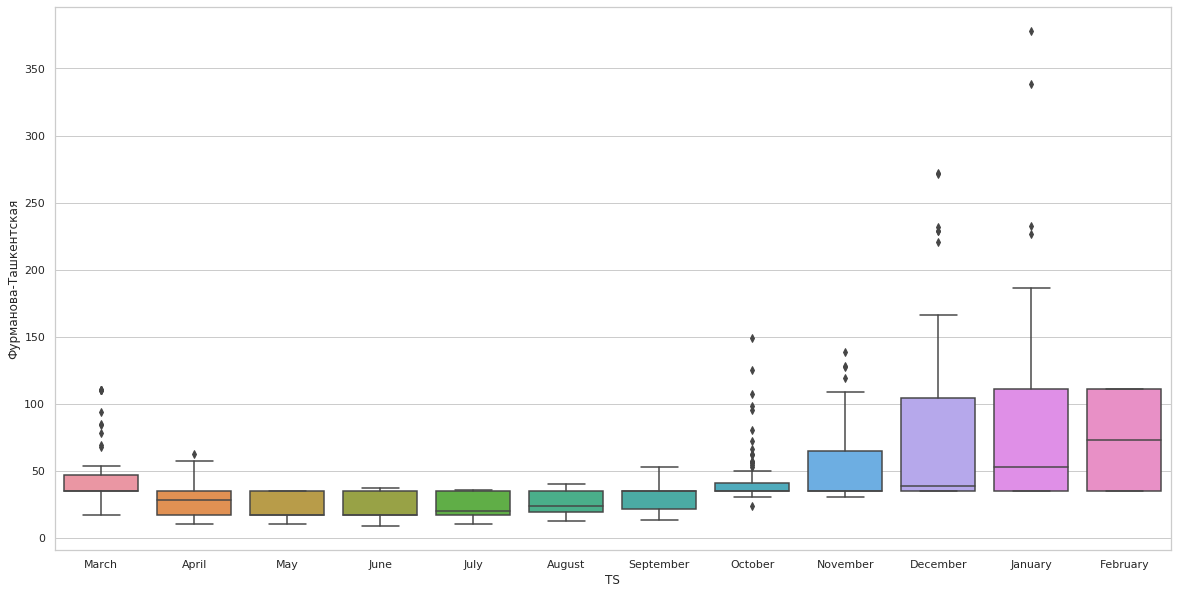

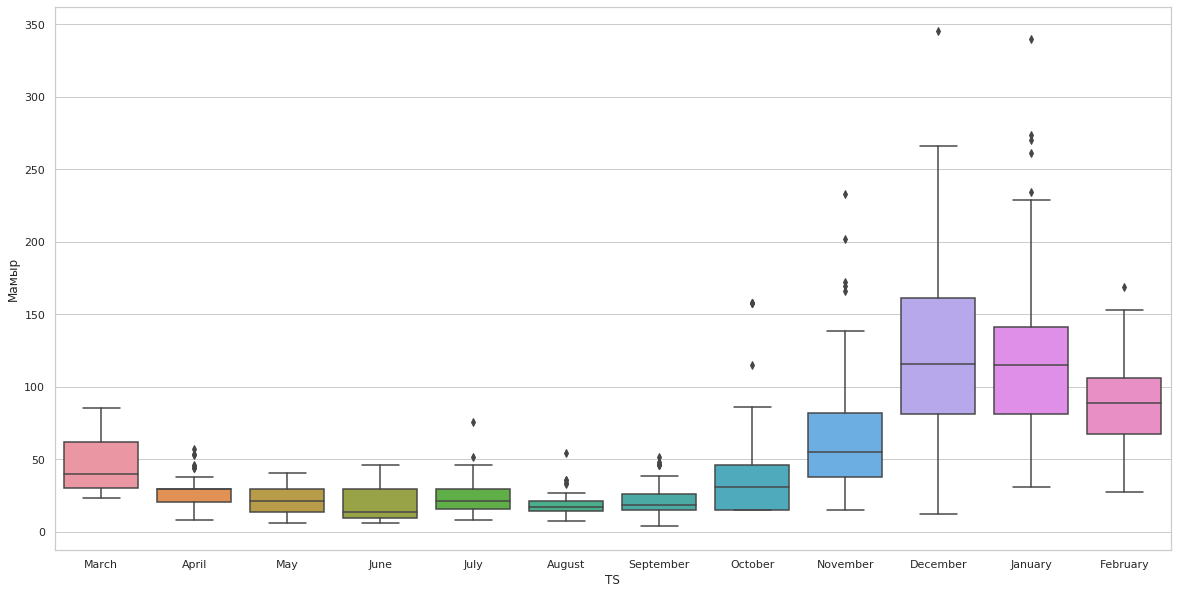

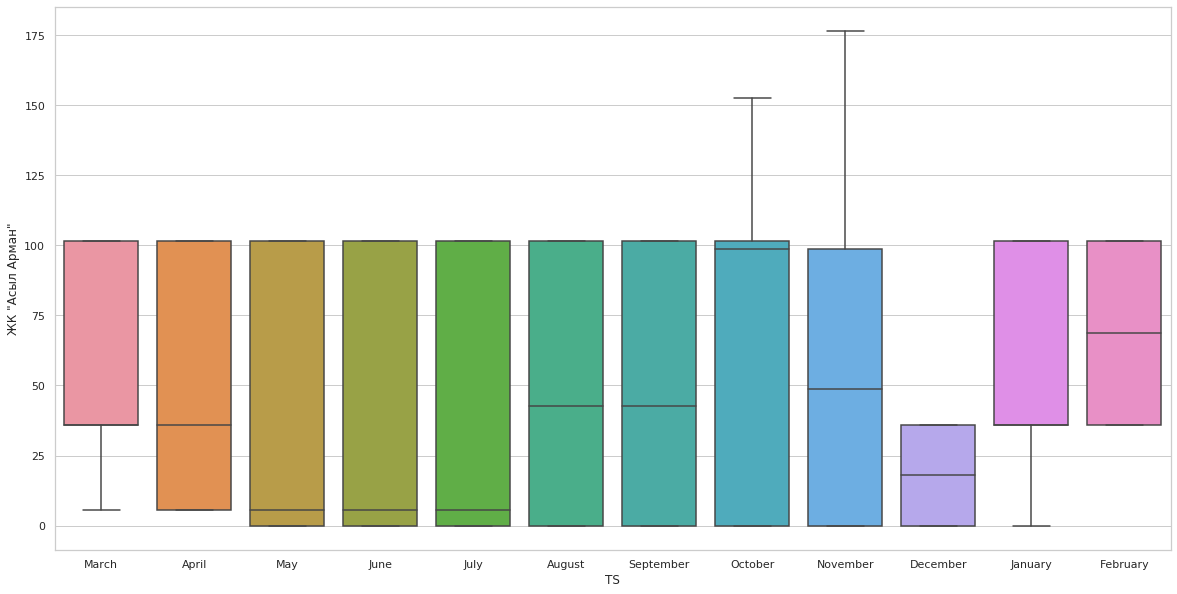

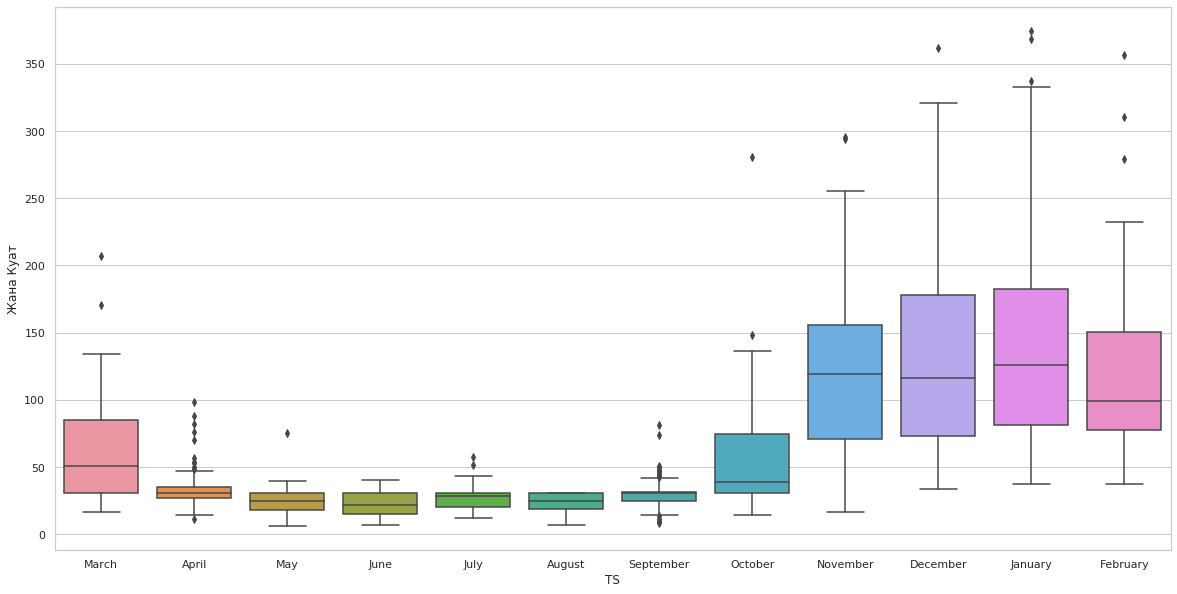

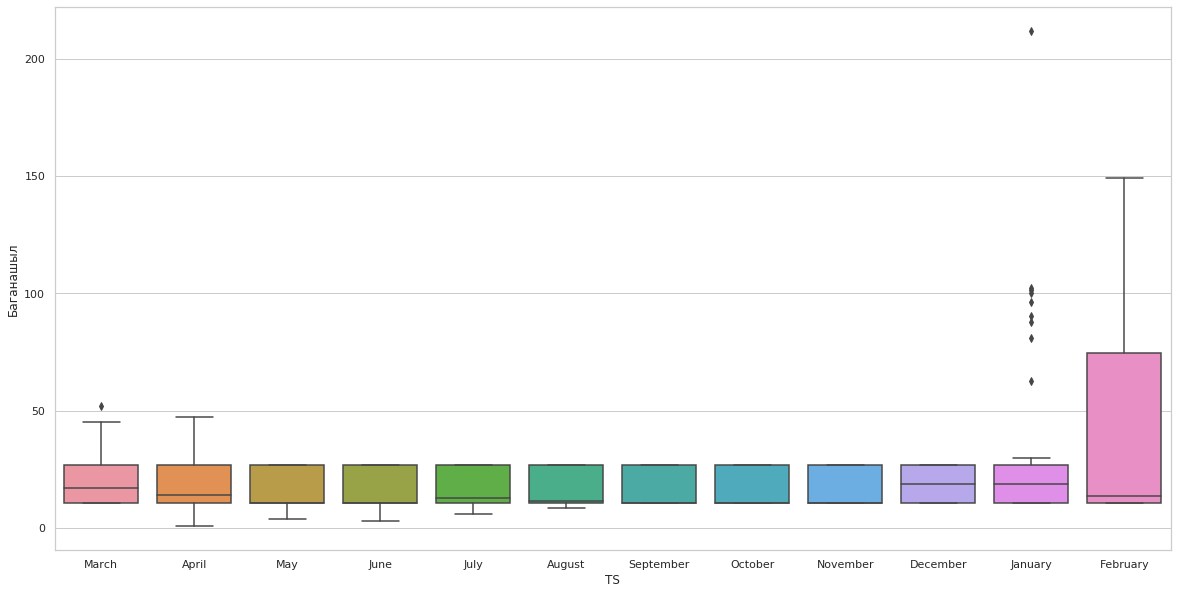

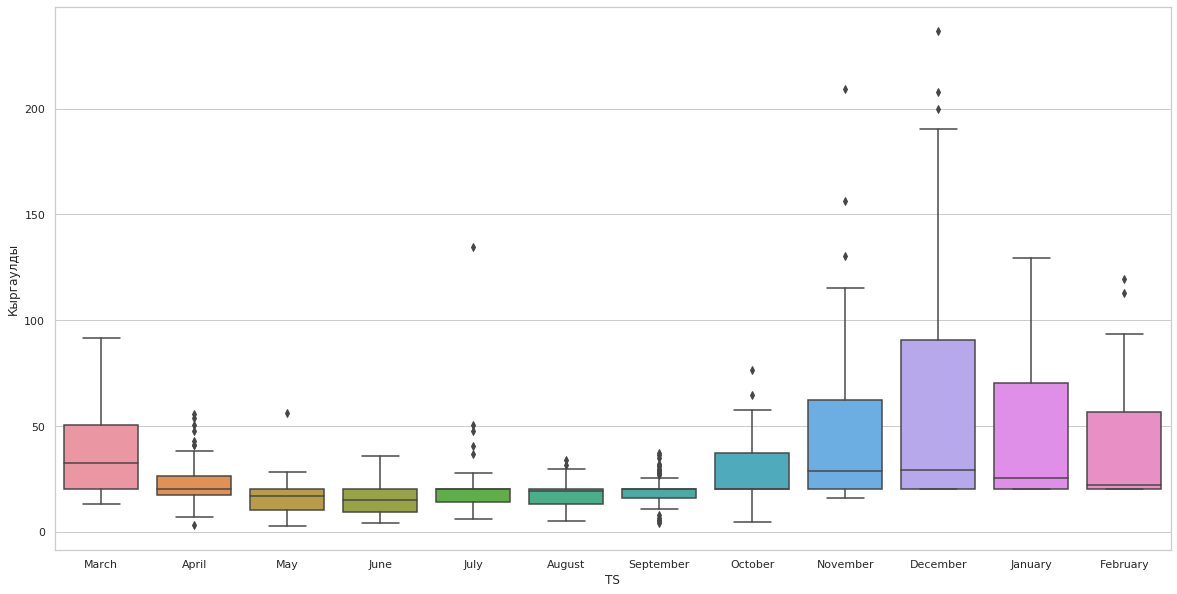

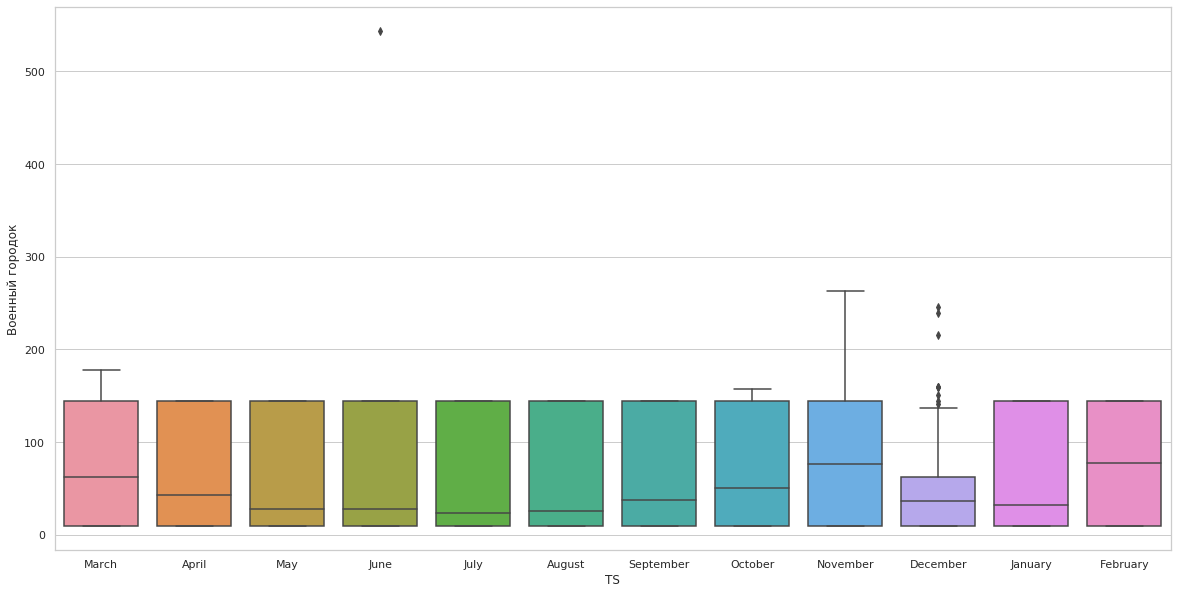

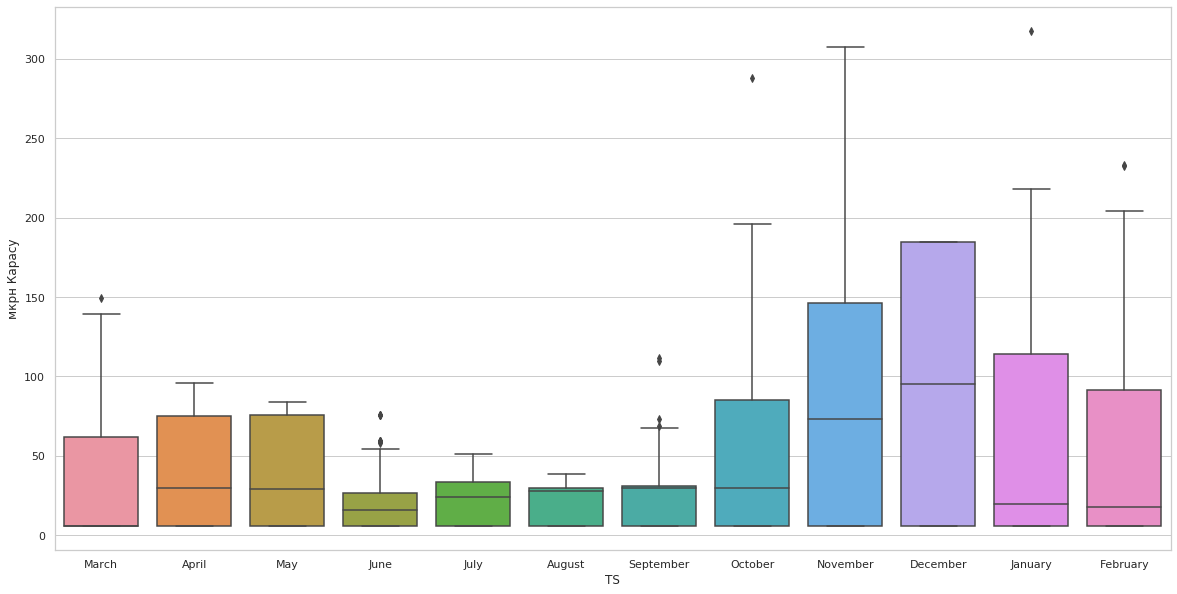

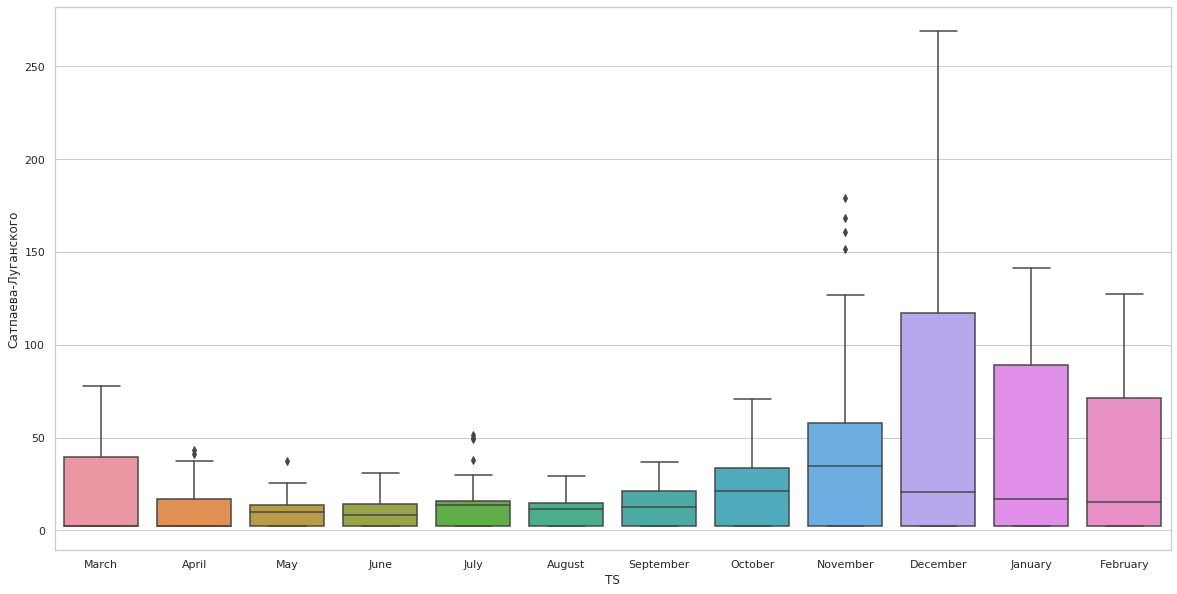

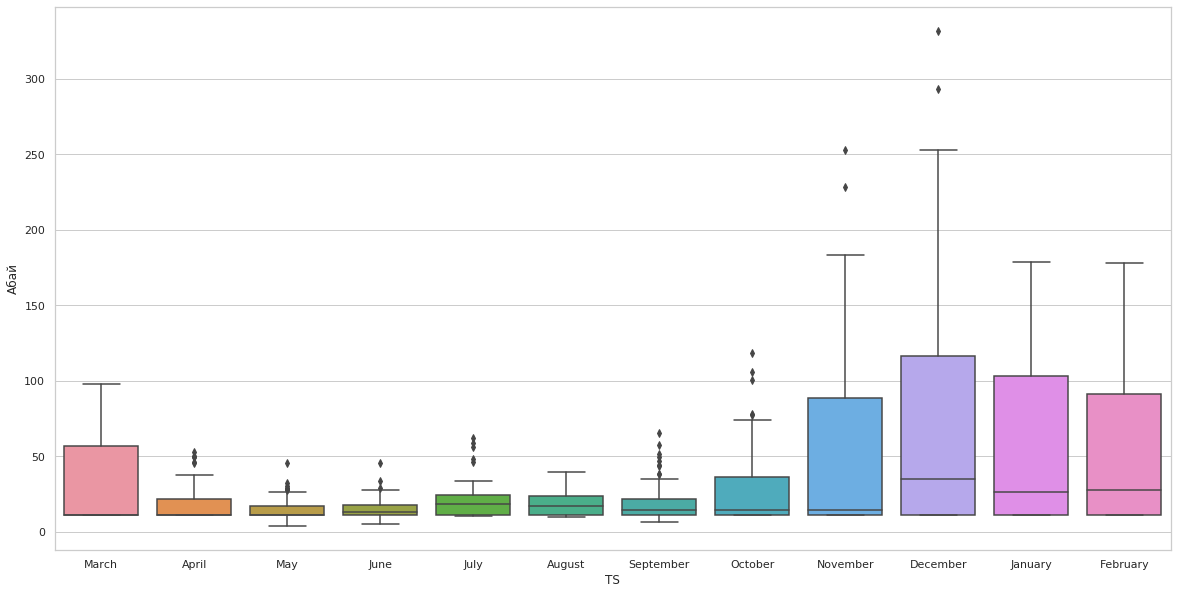

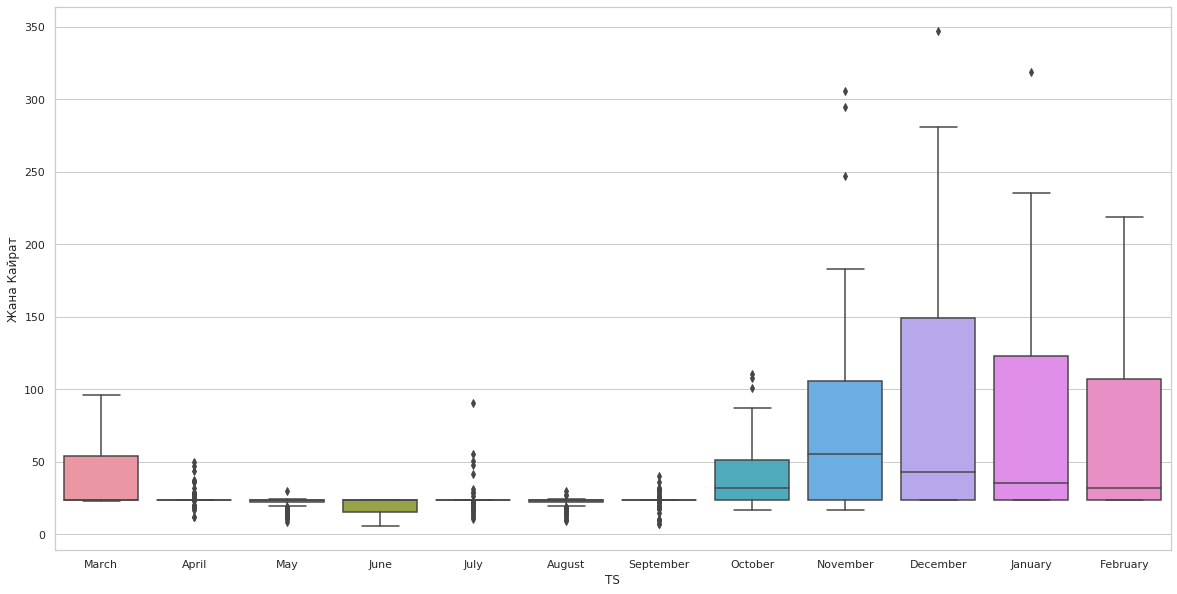

In [44]:
for key in sums:
    fig, ax = plt.subplots(figsize=(20,10))
    sns.boxplot(data_ts.index.month_name() , data_ts[key], ax=ax)

In [0]:
import matplotlib.dates as mdates

In [46]:
len(data_ts.index.month)

968

In [0]:
#15 октября 10 - 21 апреля 04

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

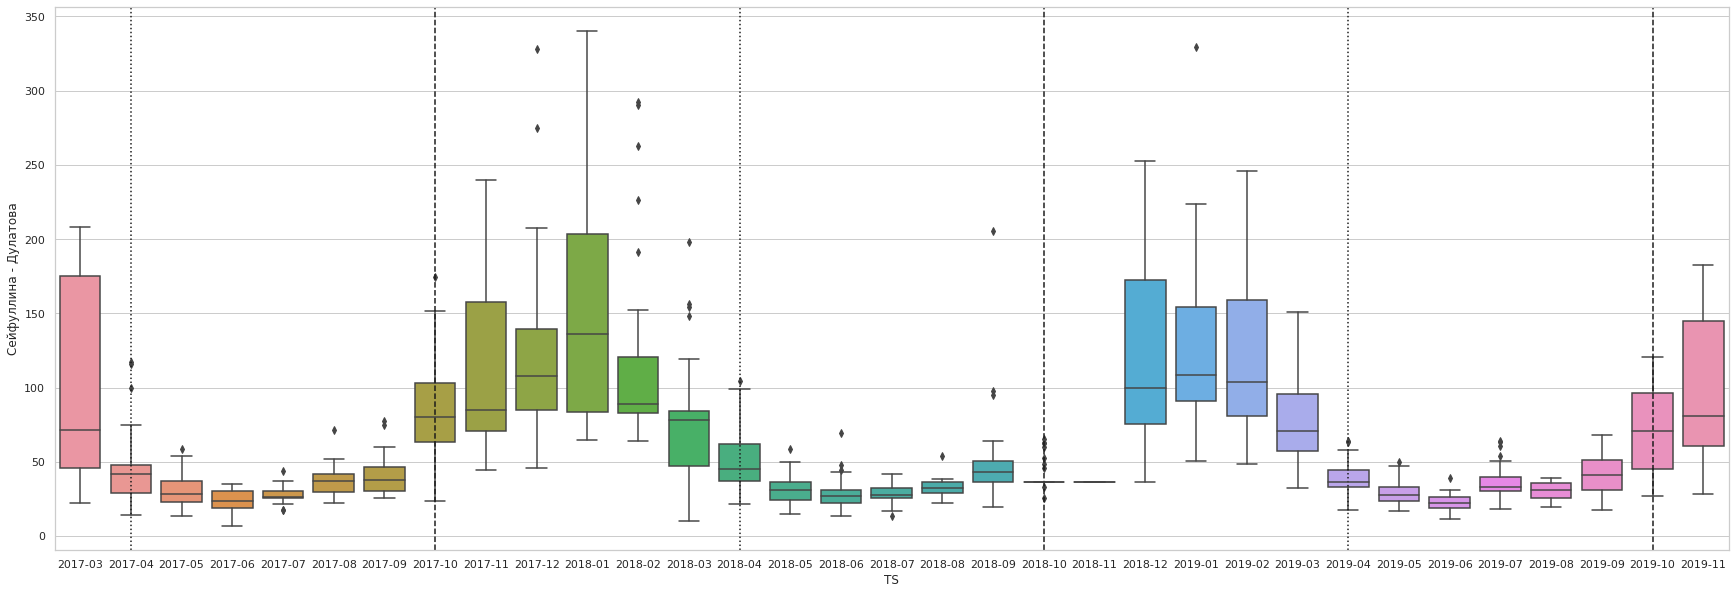

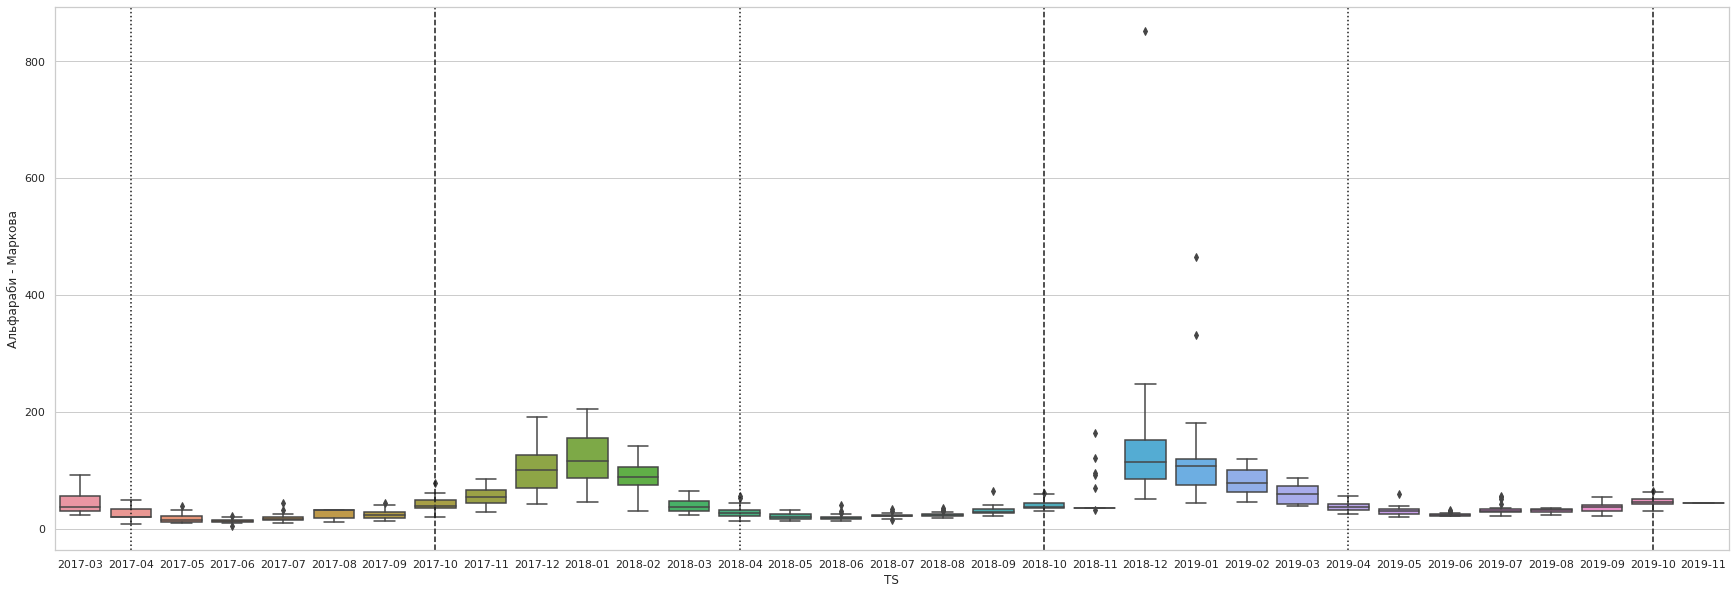

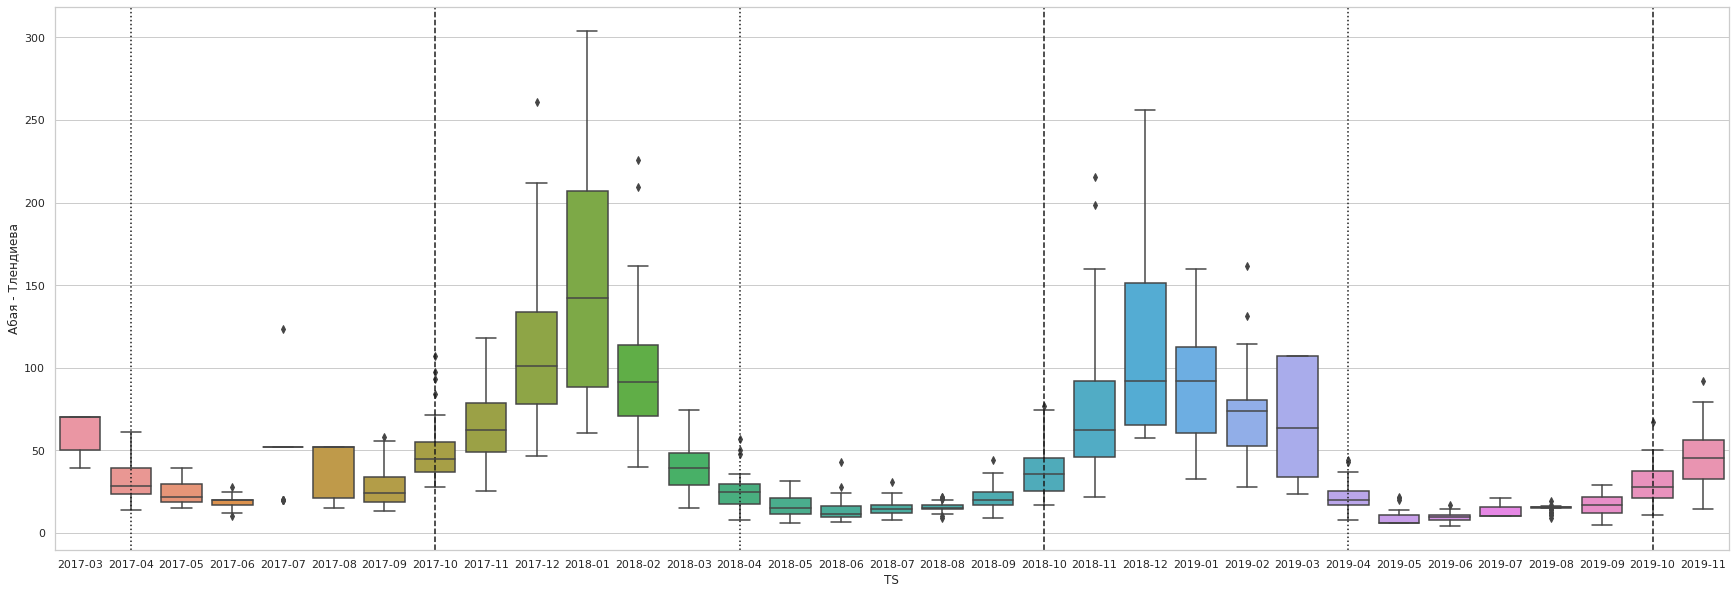

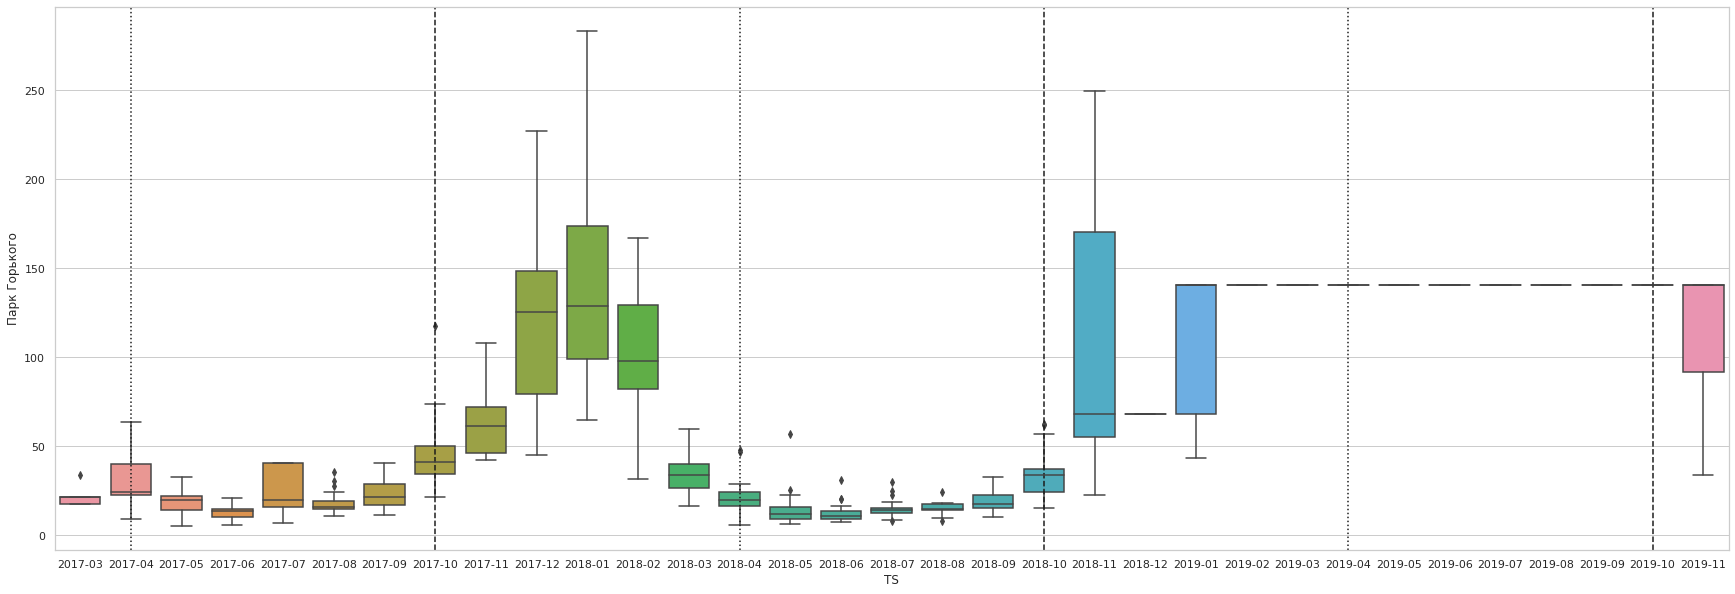

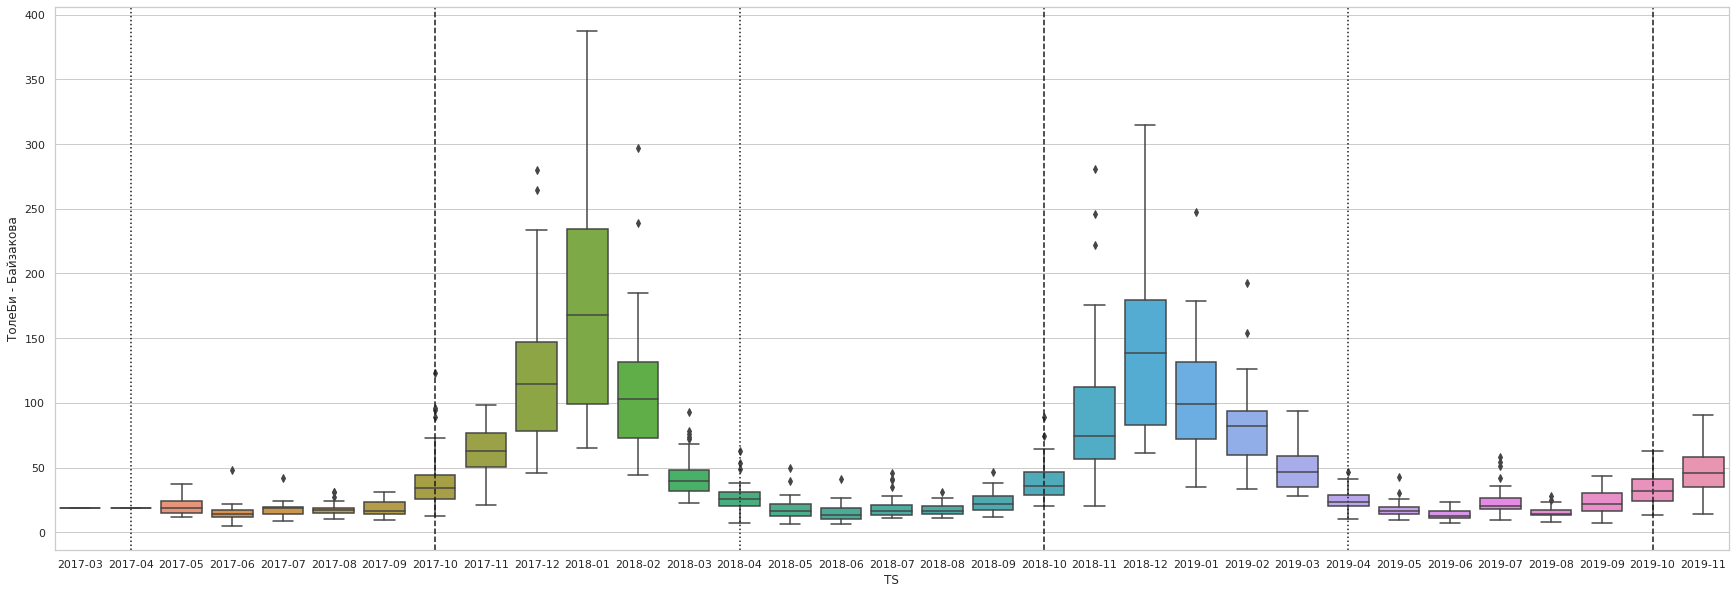

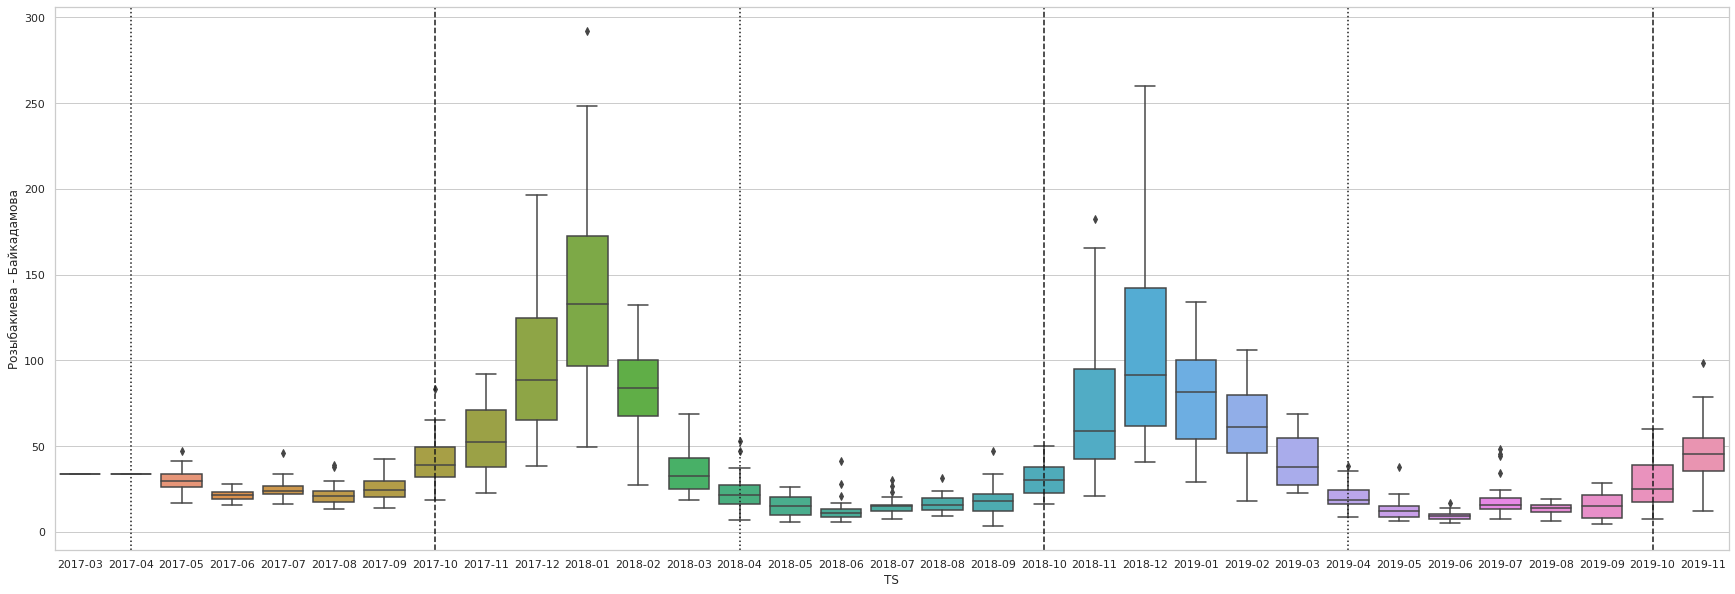

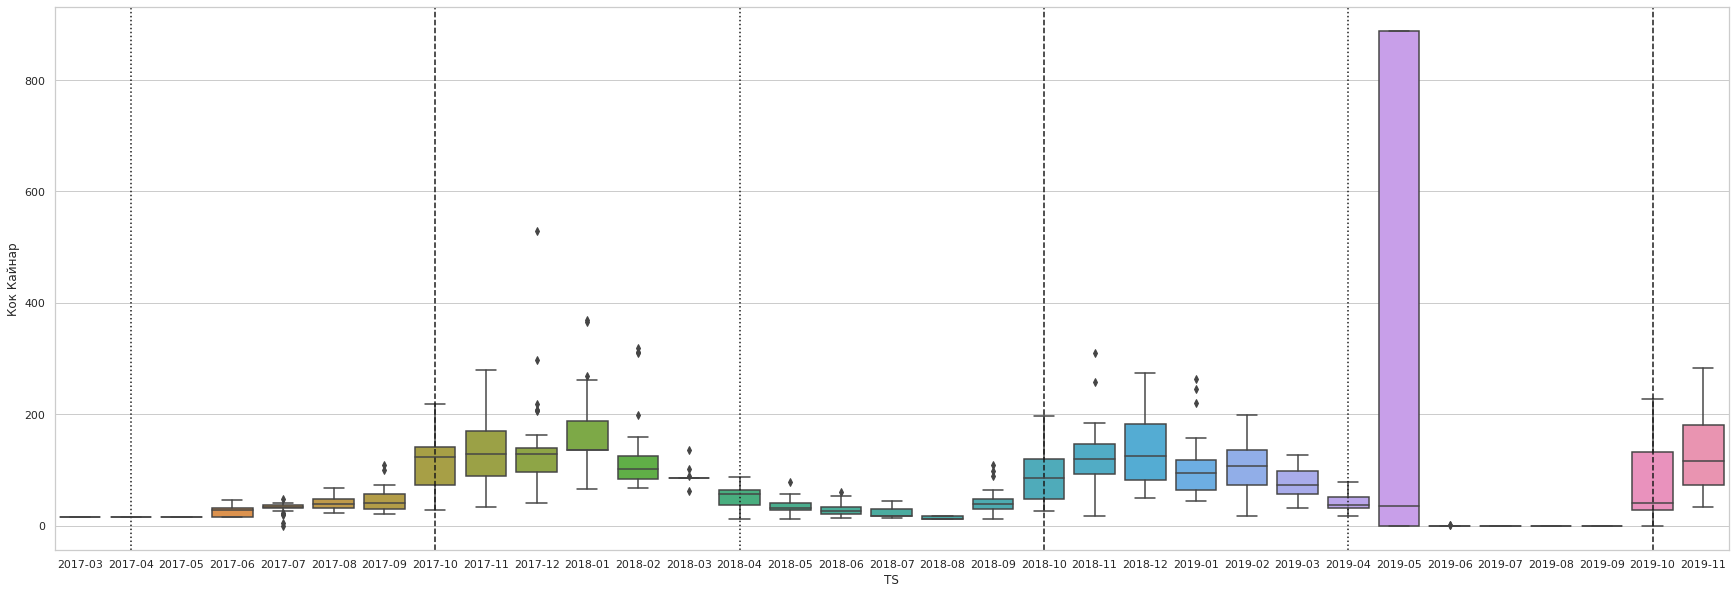

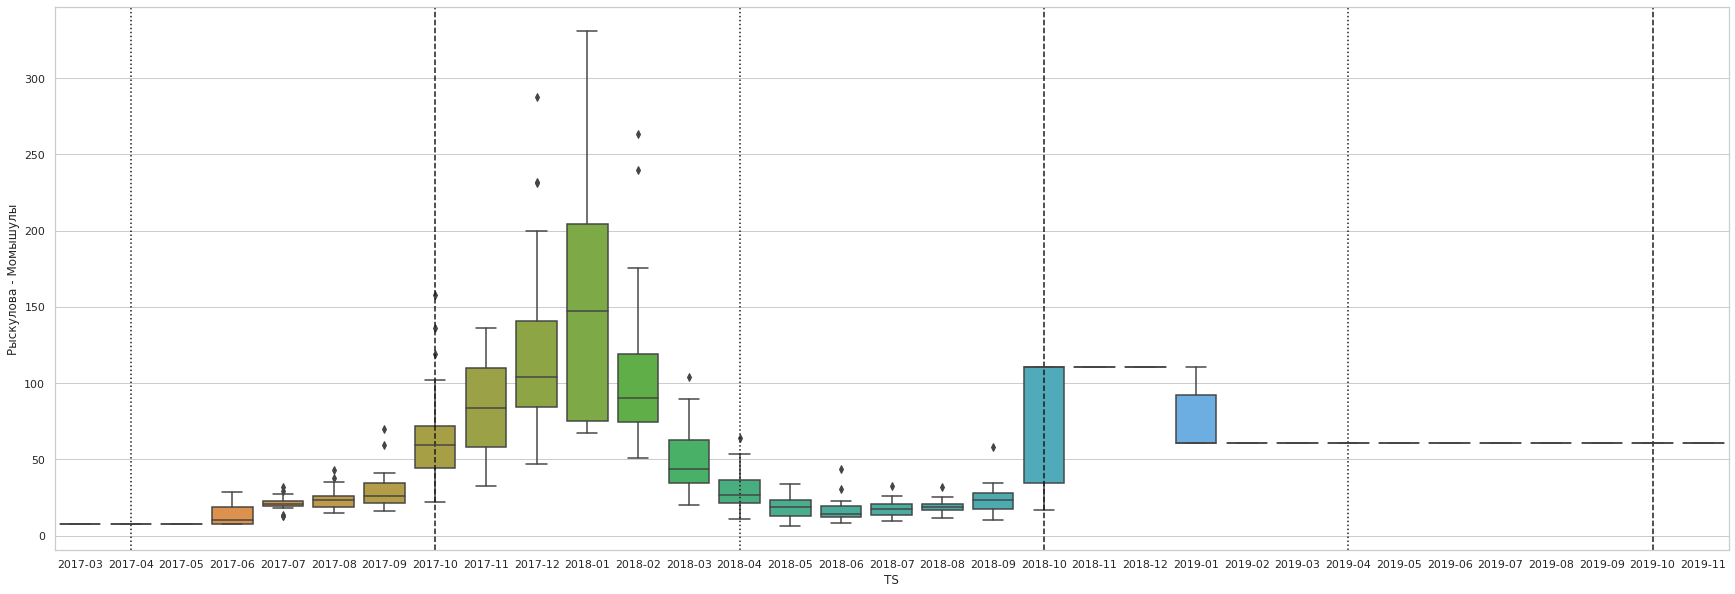

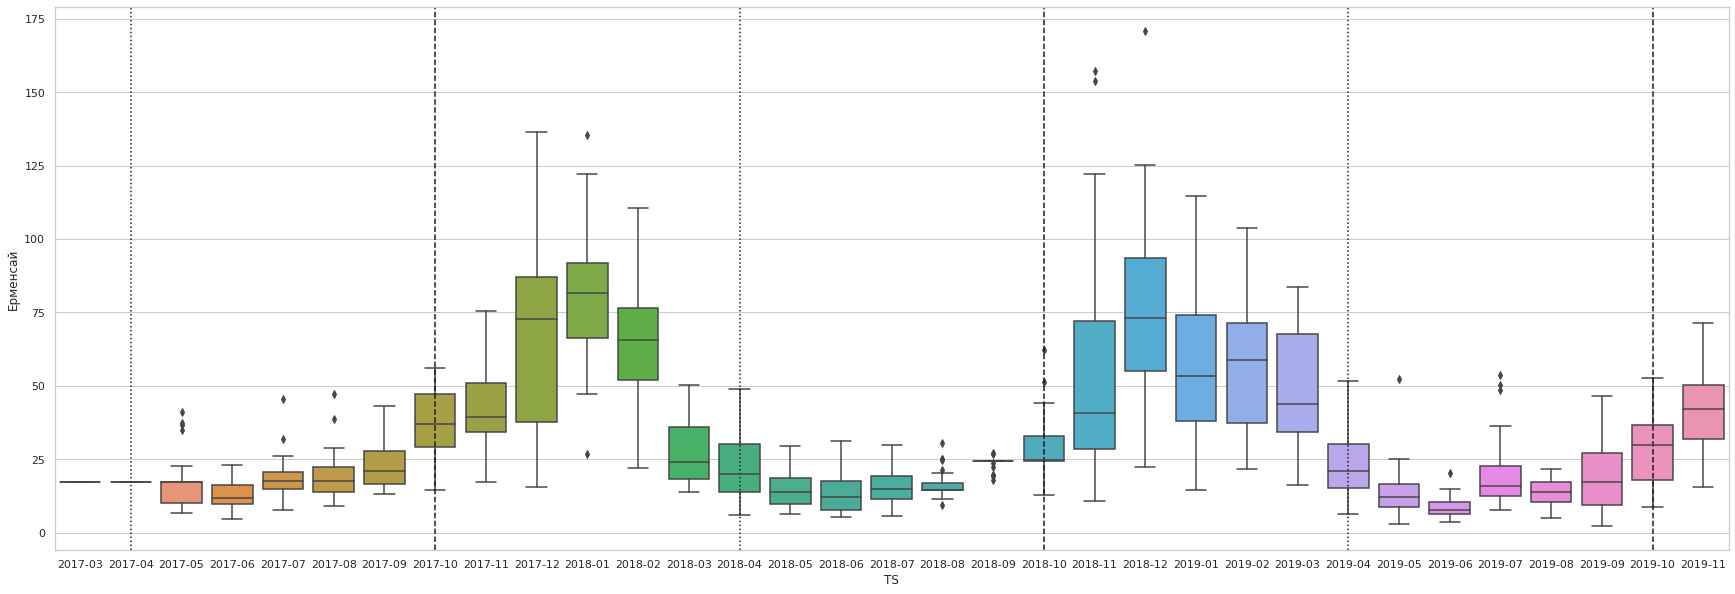

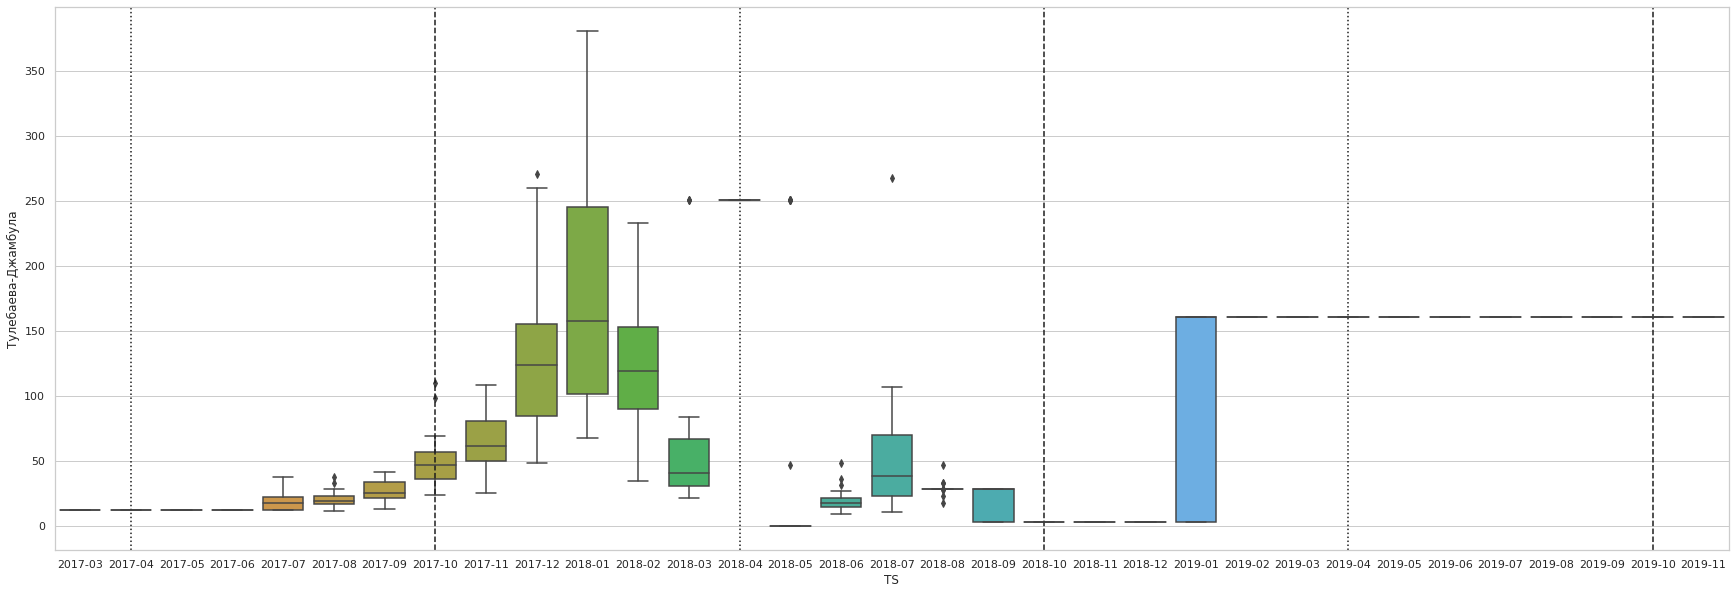

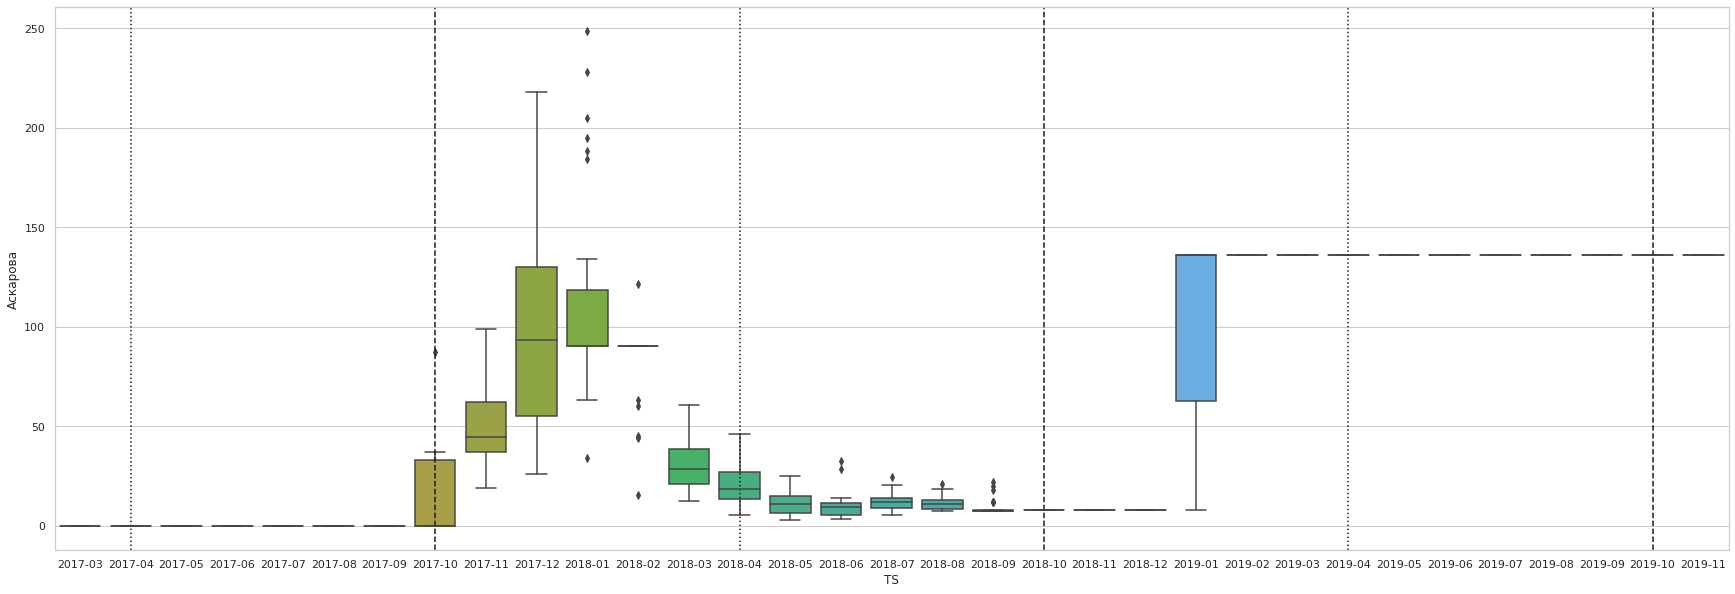

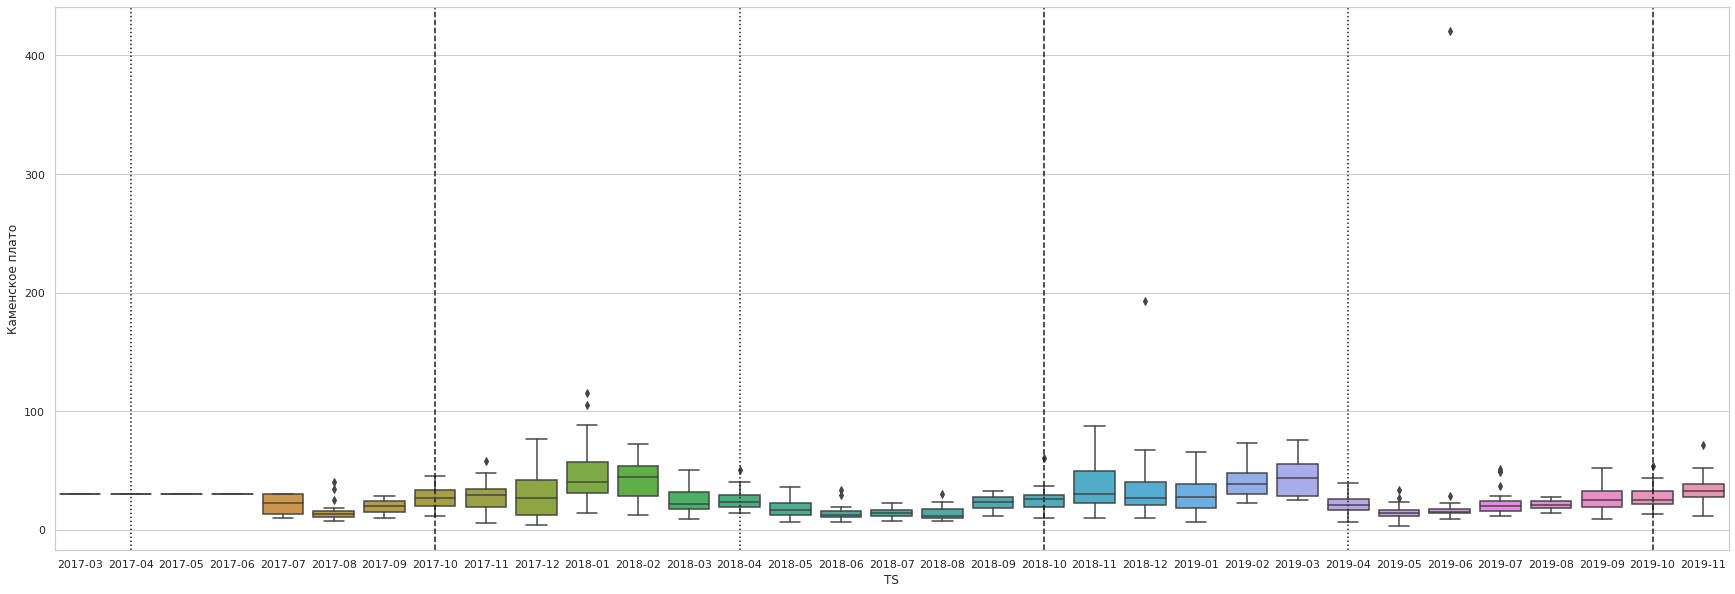

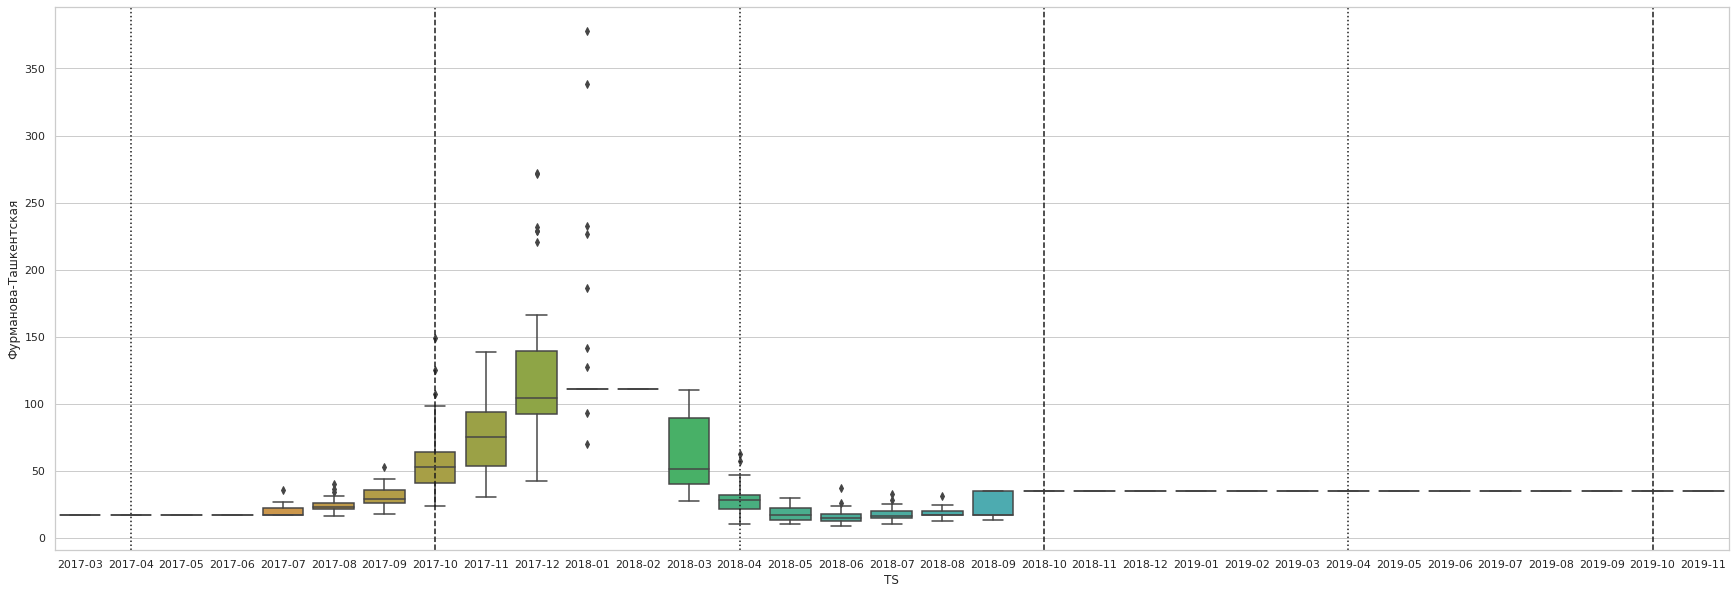

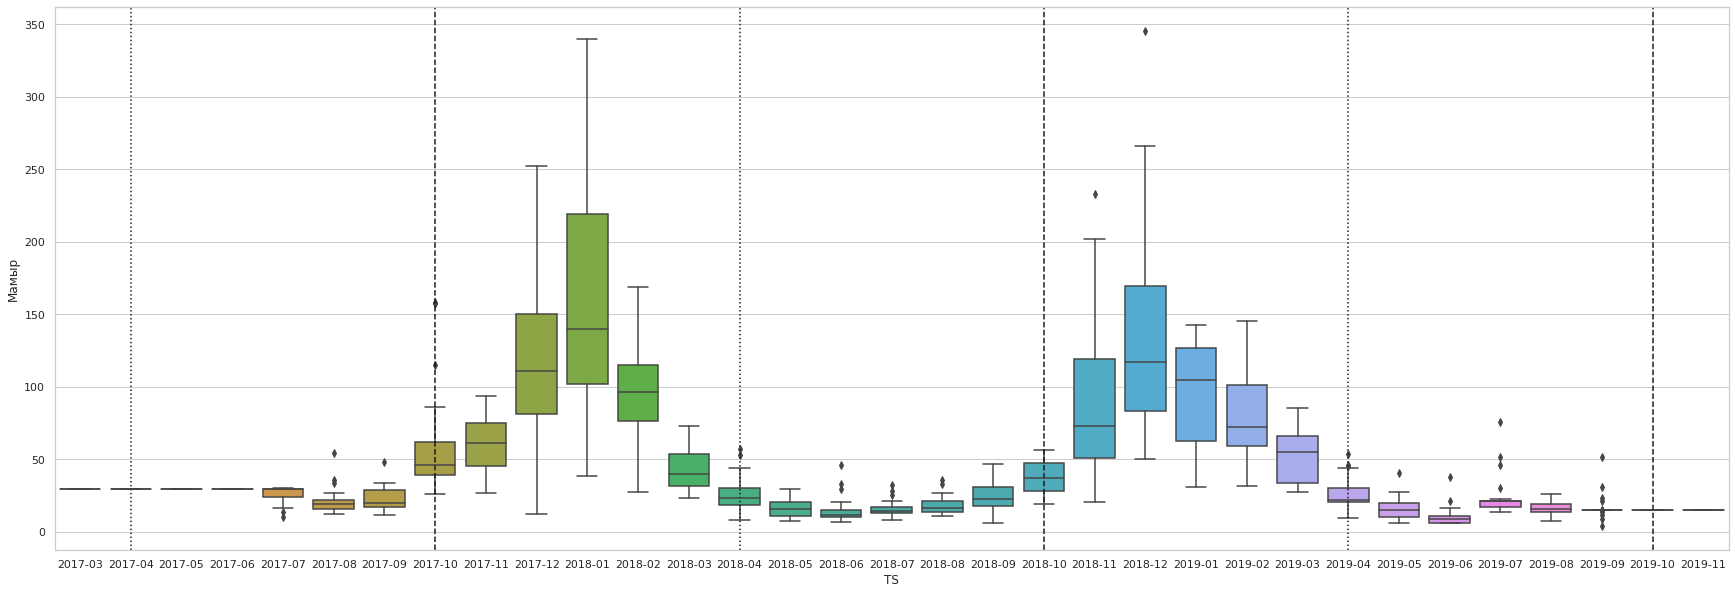

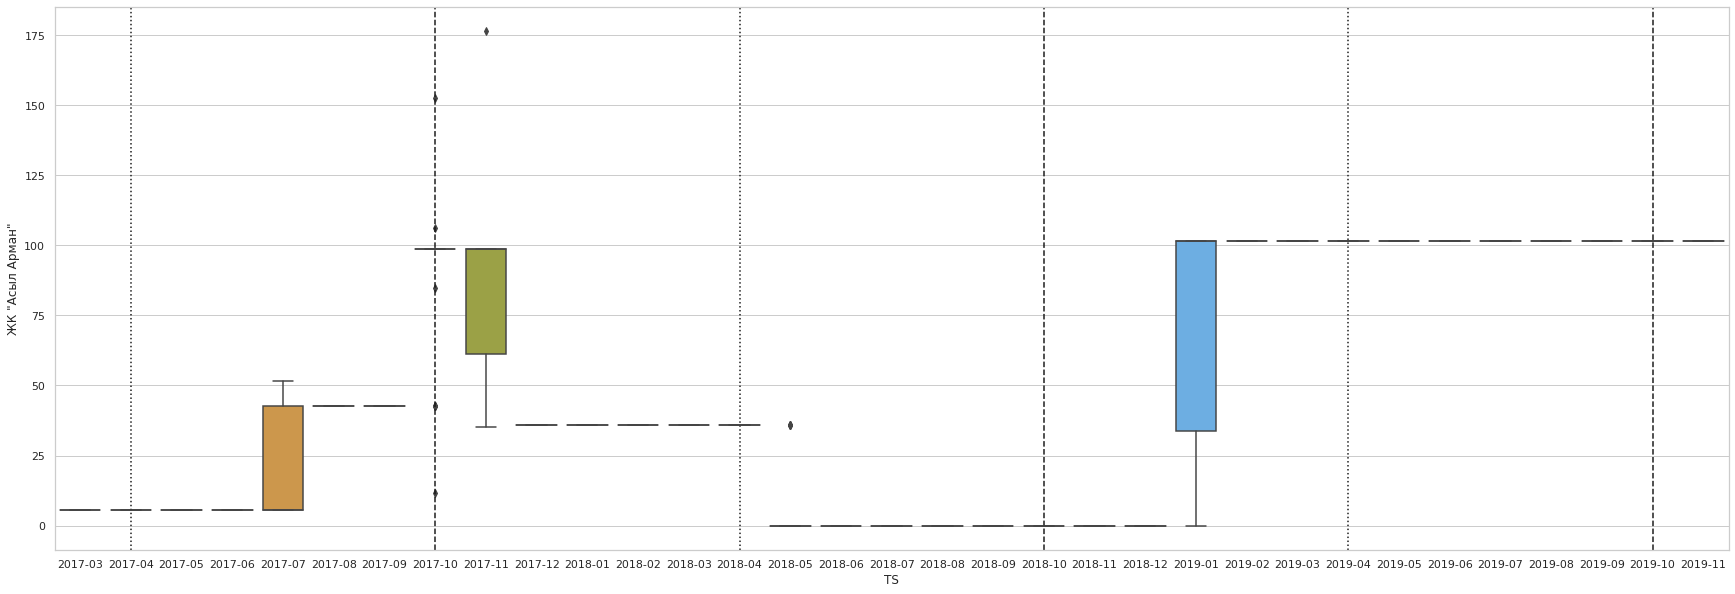

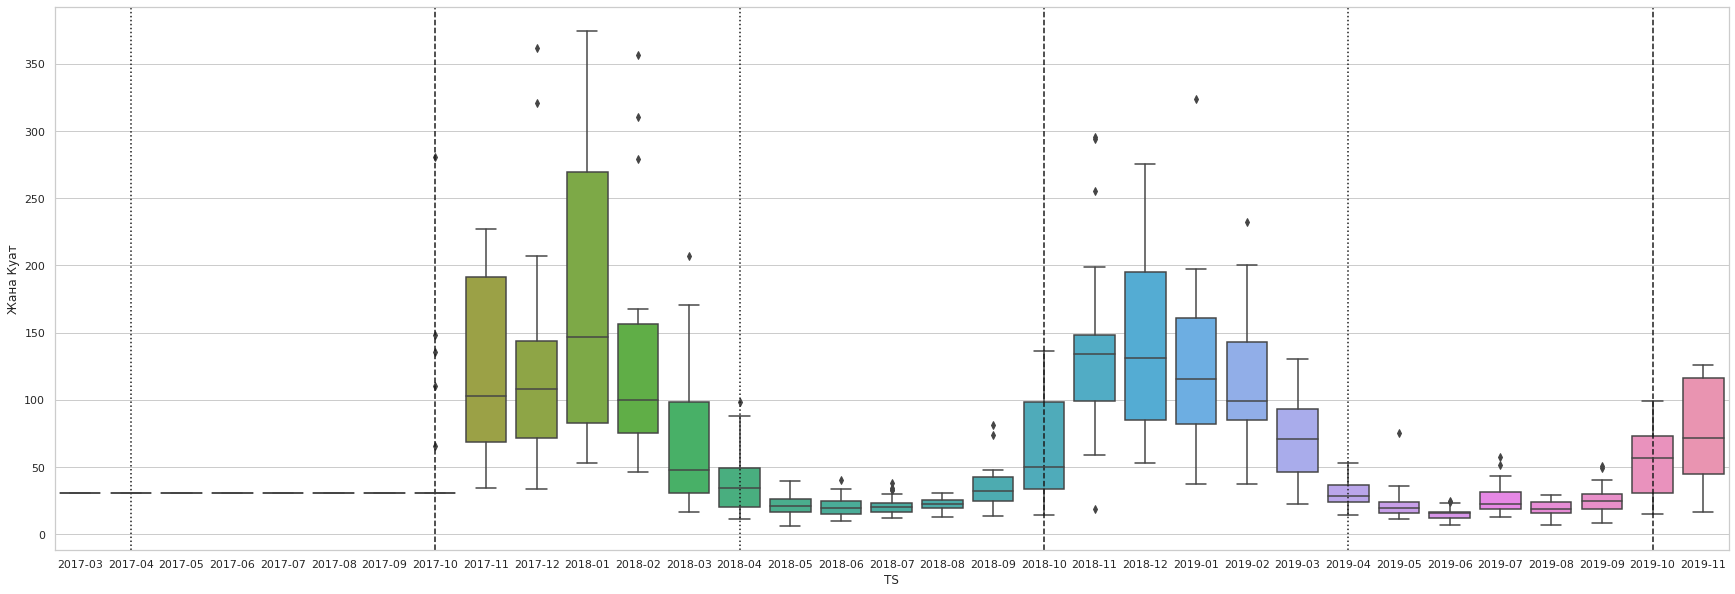

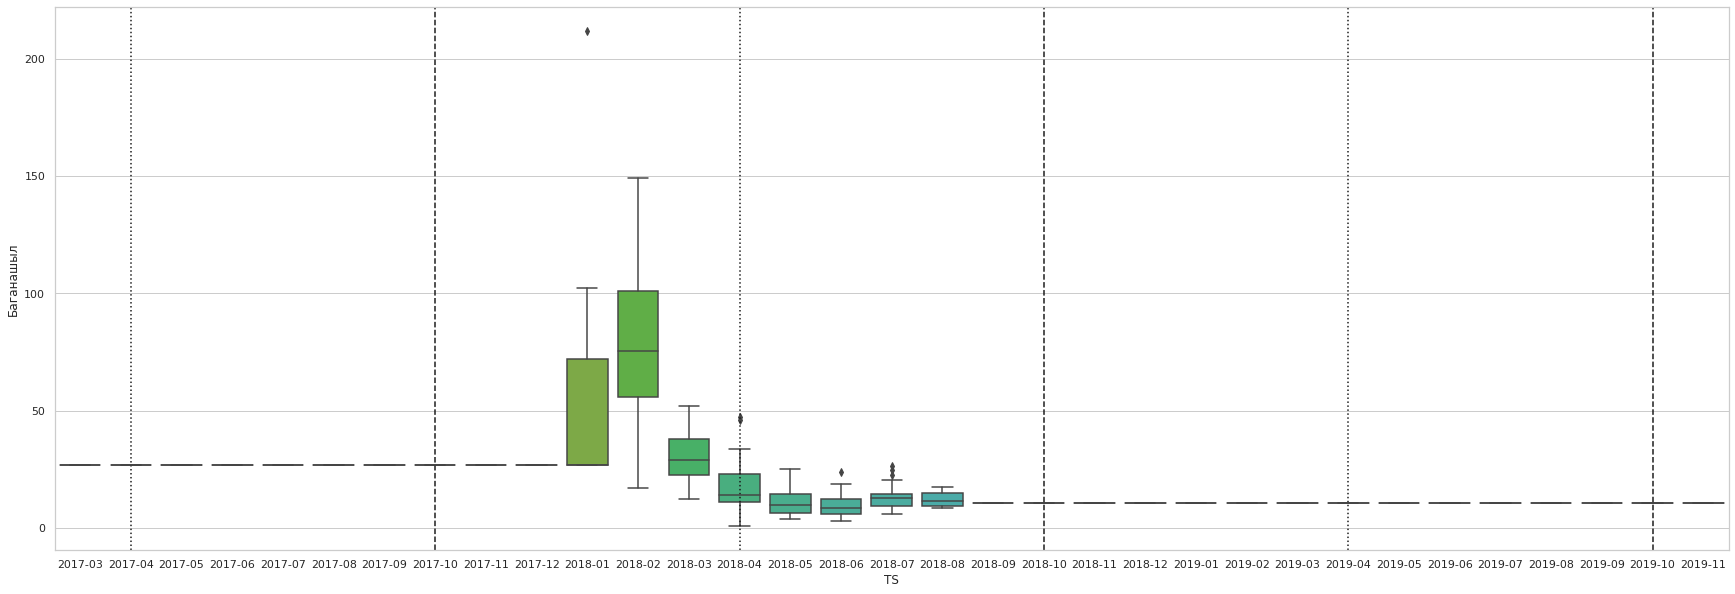

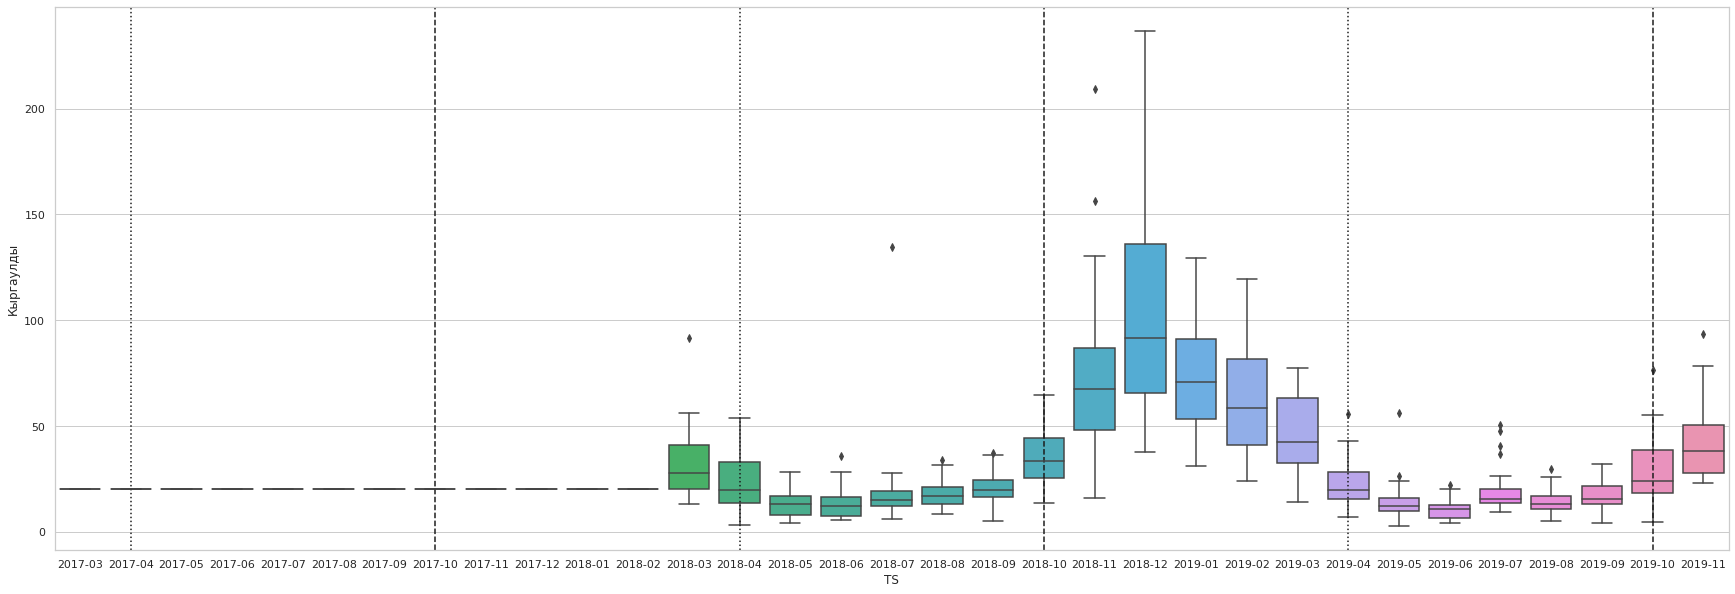

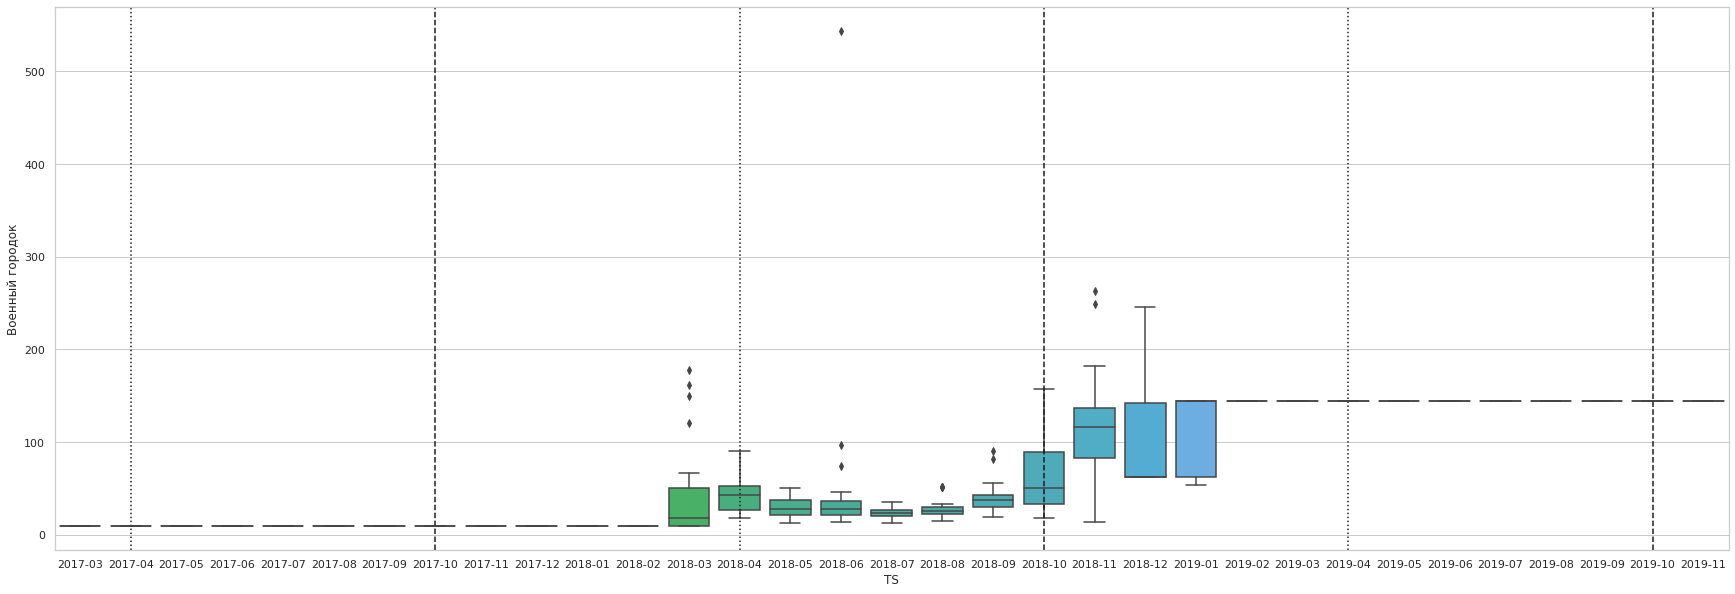

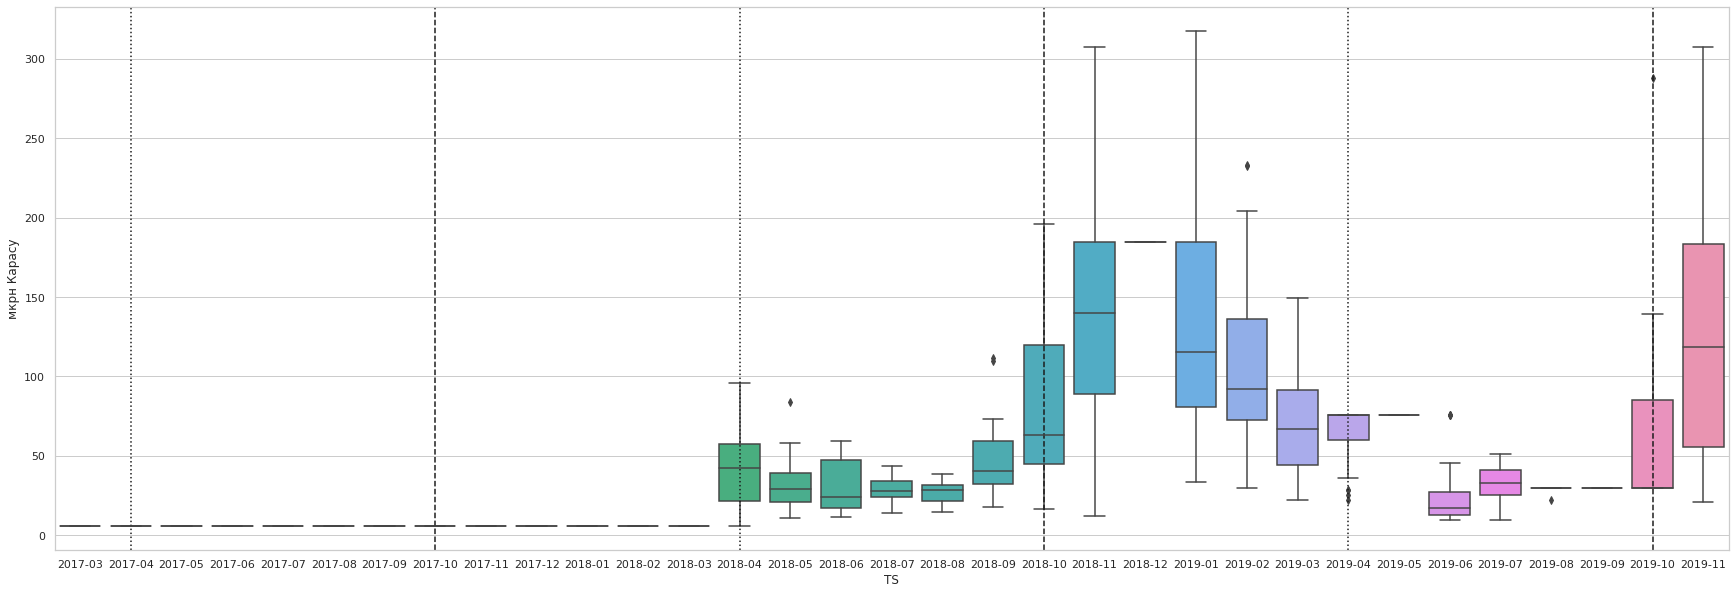

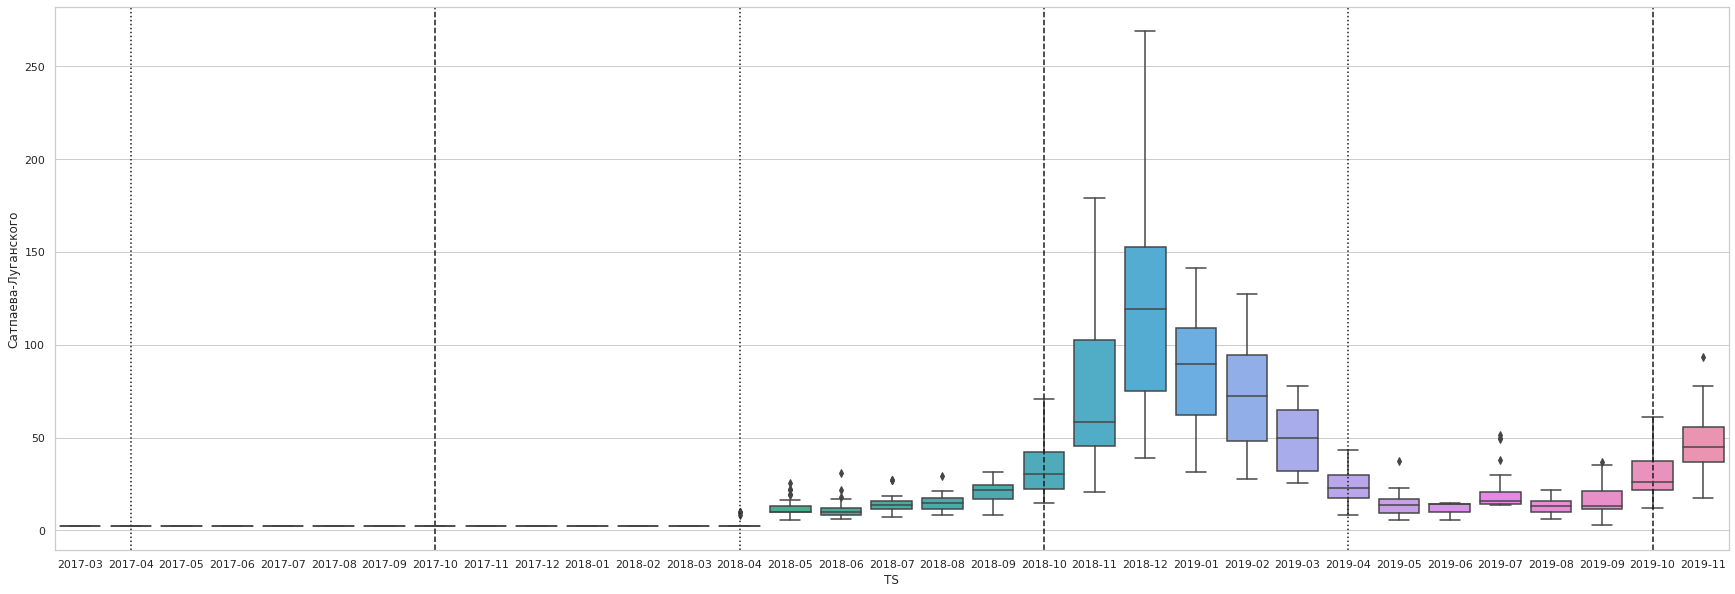

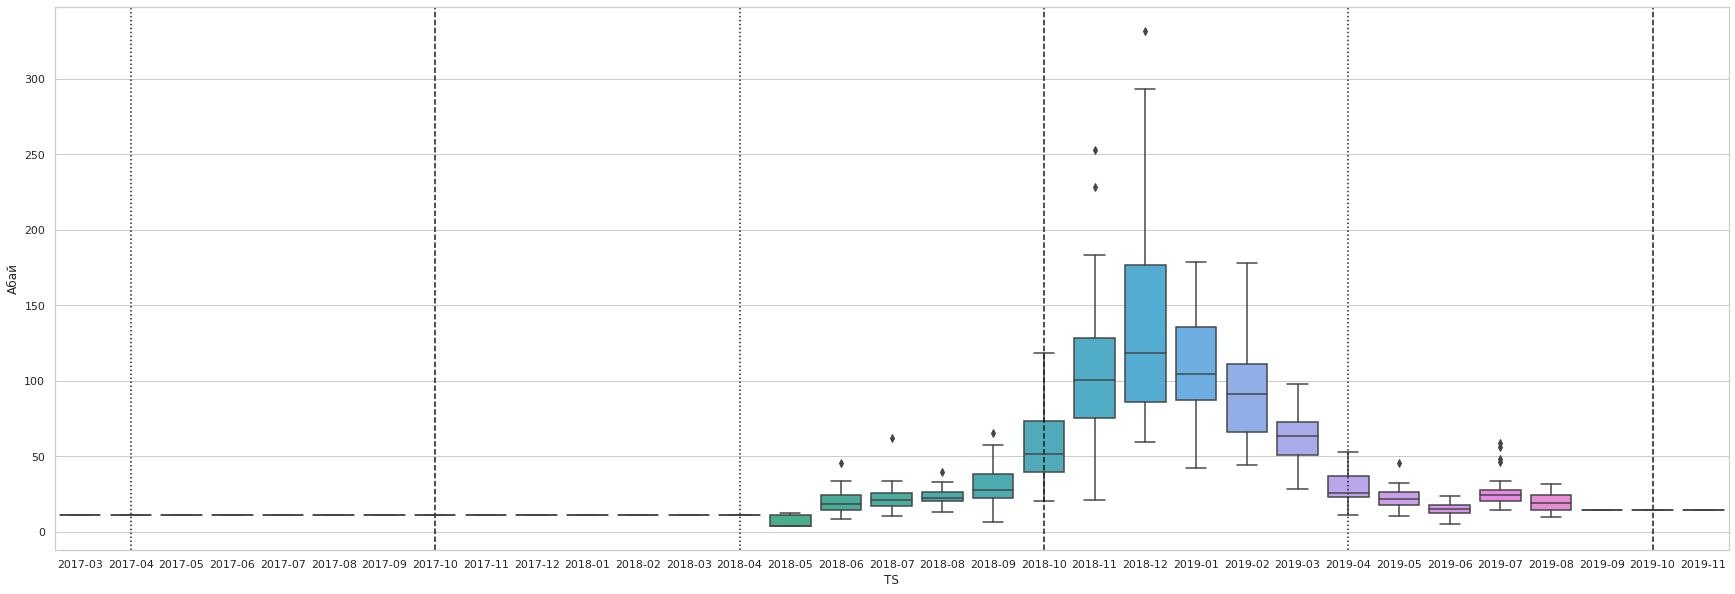

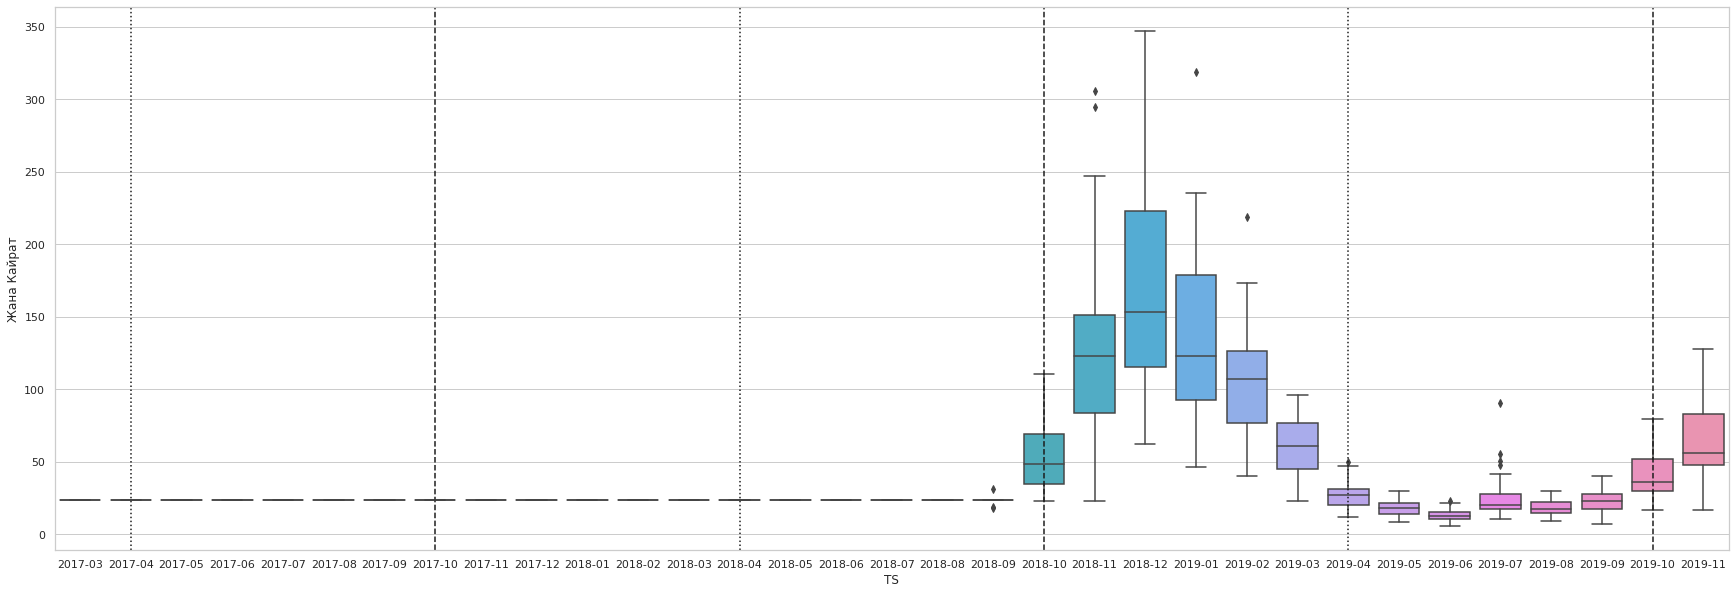

In [48]:
for key in sums:
    fig, ax = plt.subplots(figsize=(30,10))
    sns.boxplot(data_ts.index.to_period('M'), data_ts[key], ax=ax)
    plt.axvline(1, color='k', linestyle='dotted')
    plt.axvline(7, color='k', linestyle='--')
    plt.axvline(13, color='k', linestyle='dotted')
    plt.axvline(19, color='k', linestyle='--')
    plt.axvline(25, color='k', linestyle='dotted')
    plt.axvline(31, color='k', linestyle='--')

In [0]:
data2018 = data_ts[((data_ts.index.year == 2018)&(data_ts.index.month>=10)&(data_ts.index.day>=15)) \
        |((data_ts.index.year == 2019)&(data_ts.index.month<=4)&(data_ts.index.day<=21))]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

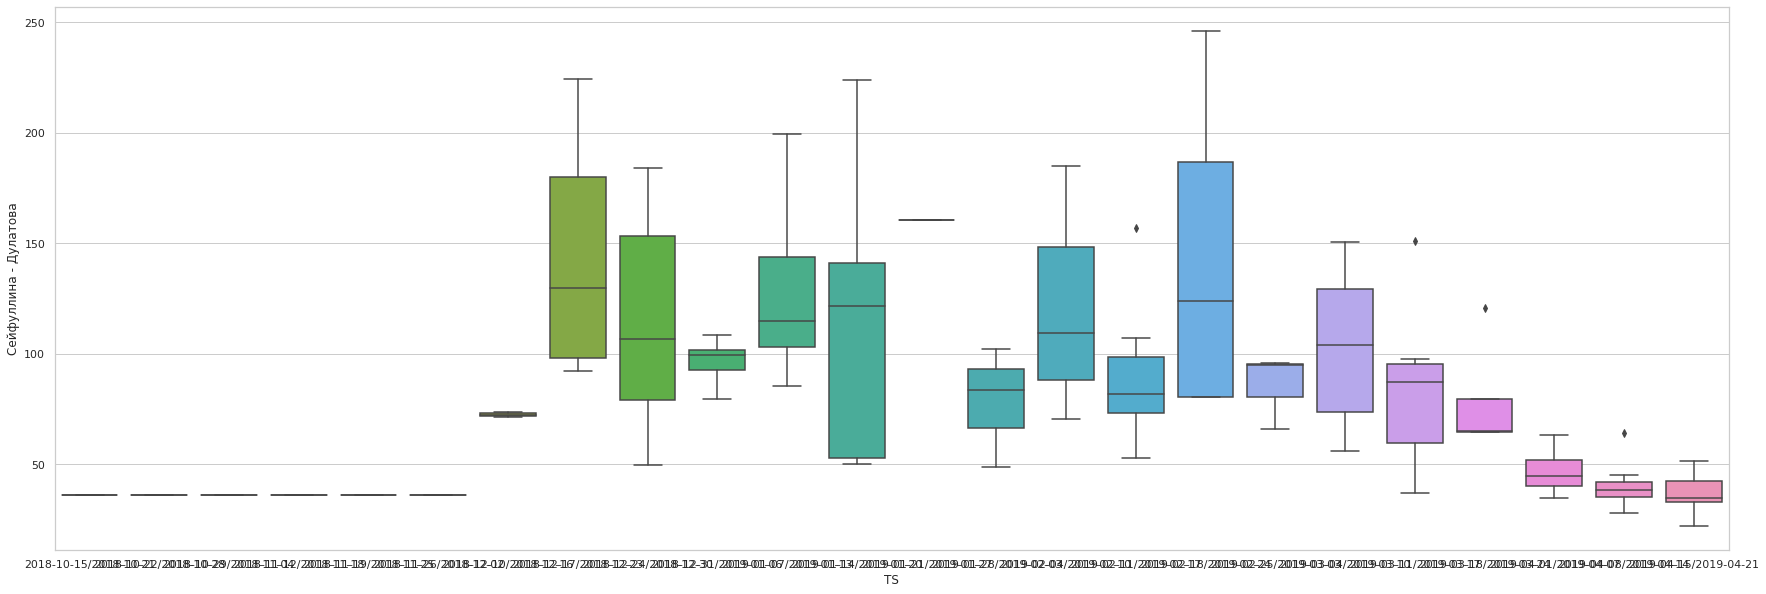

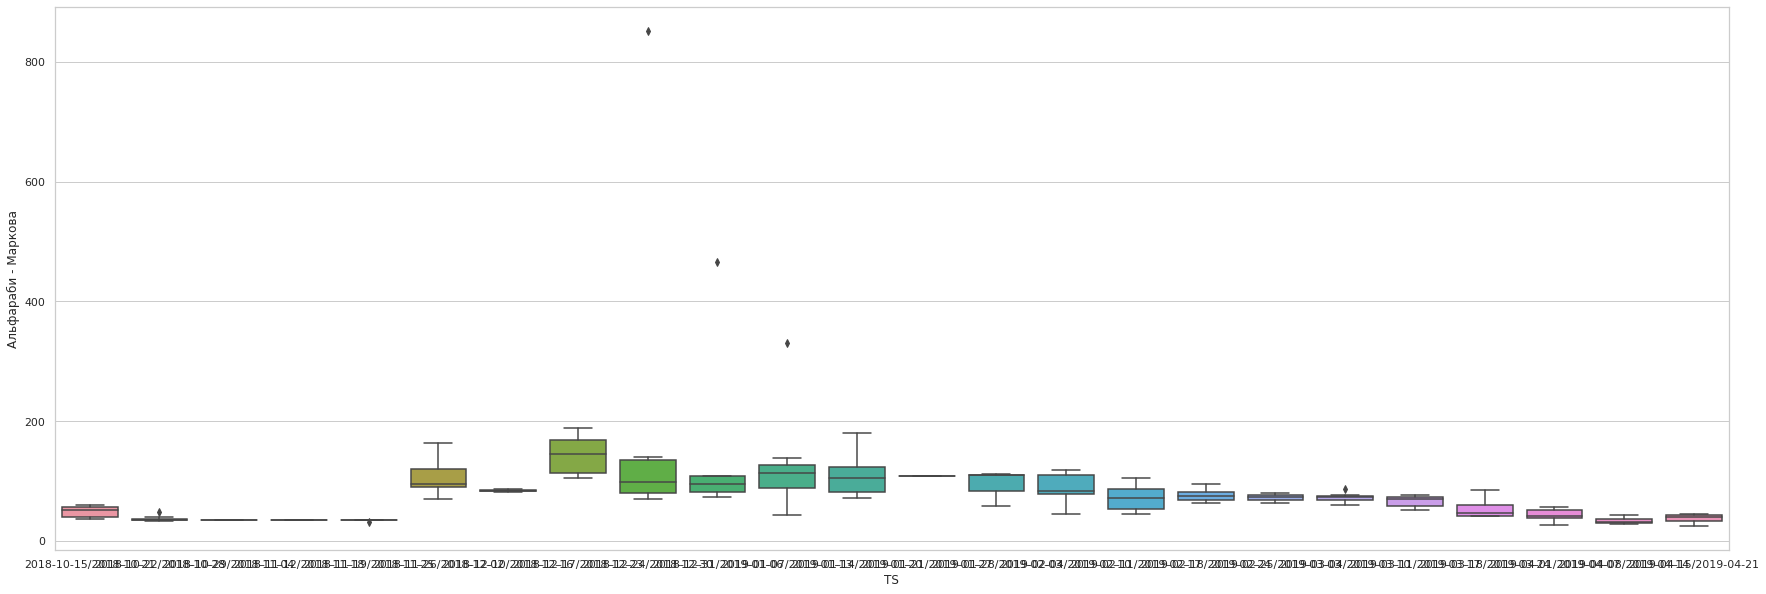

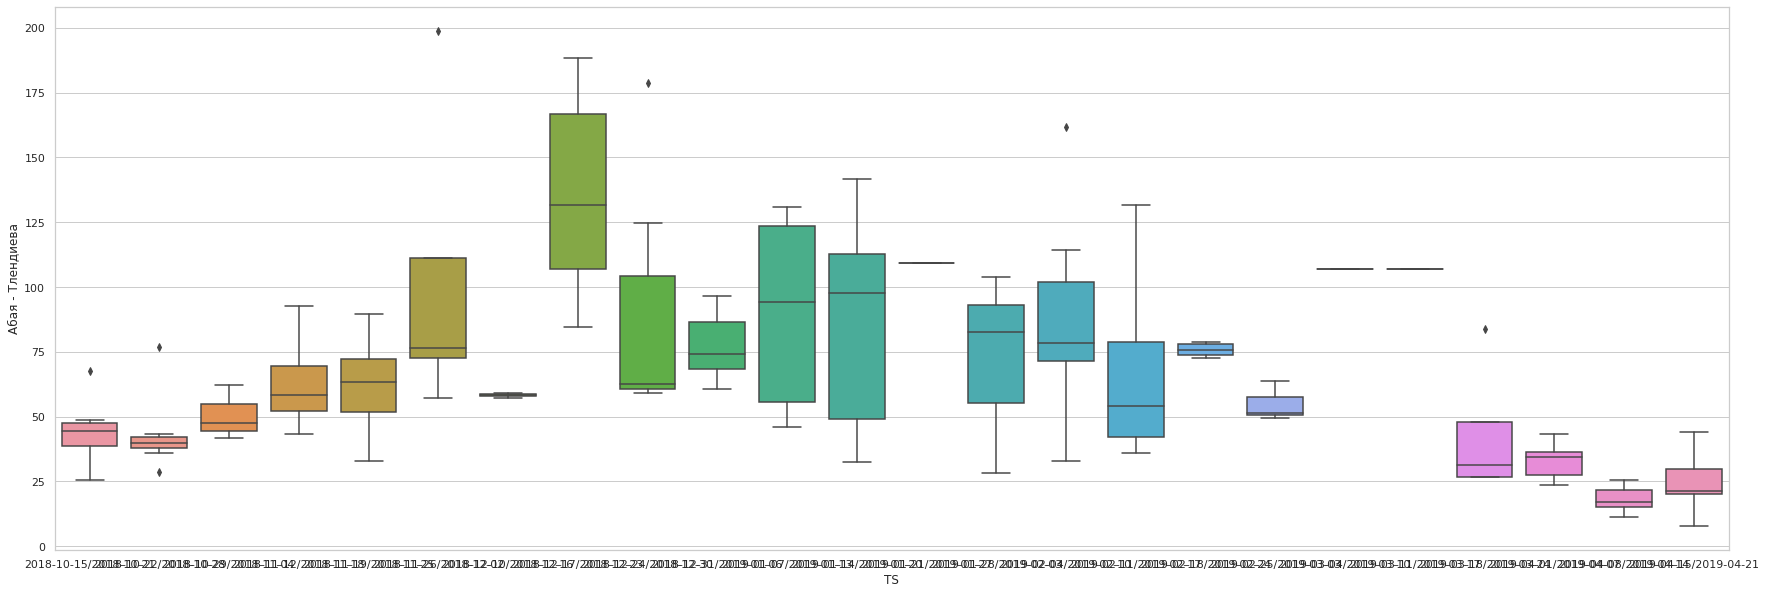

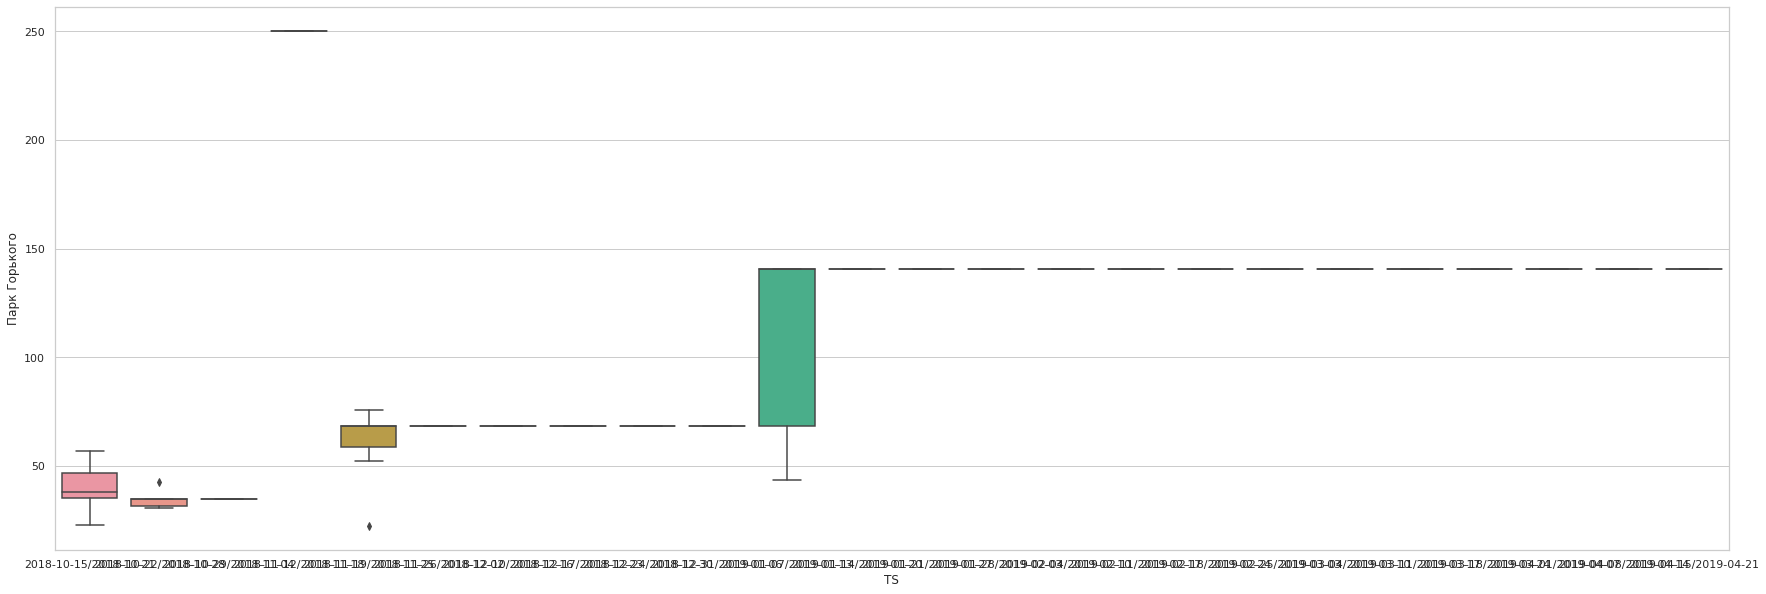

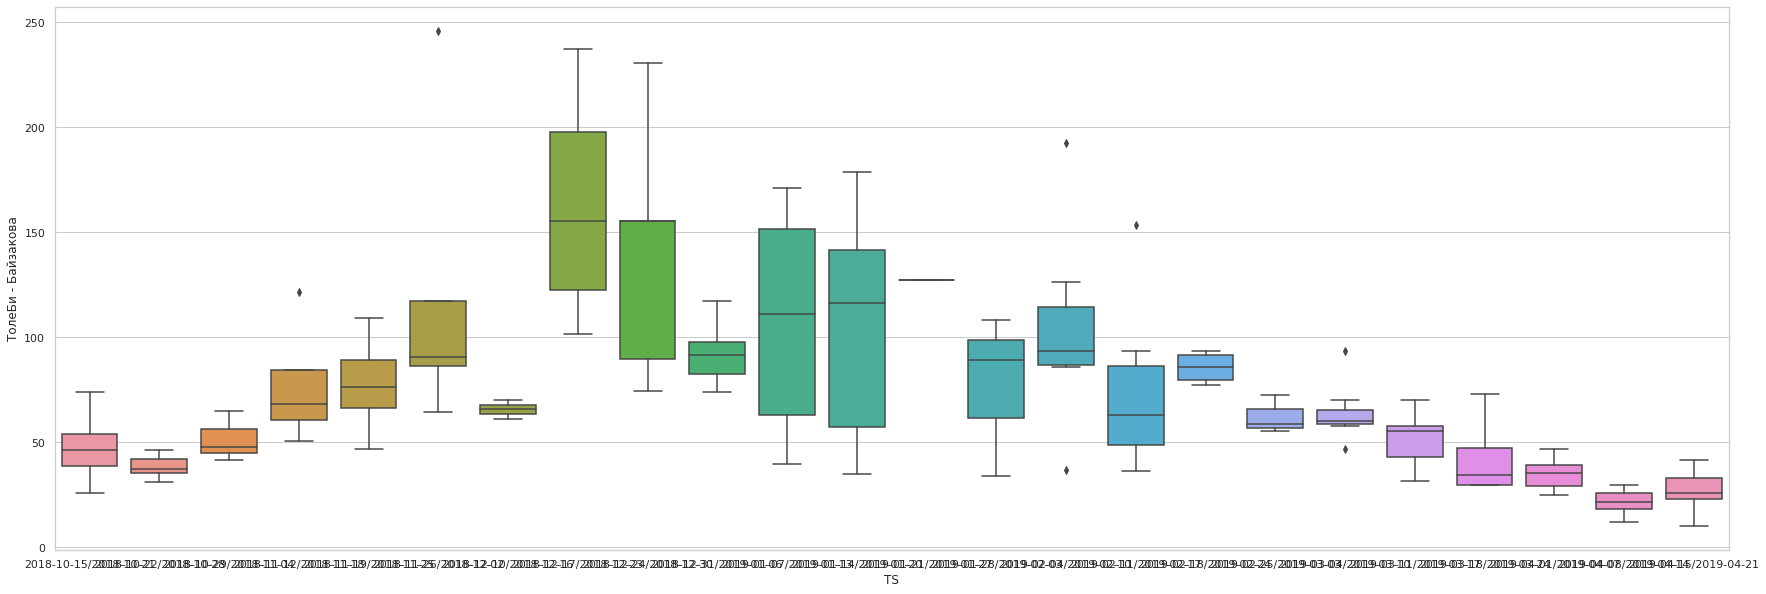

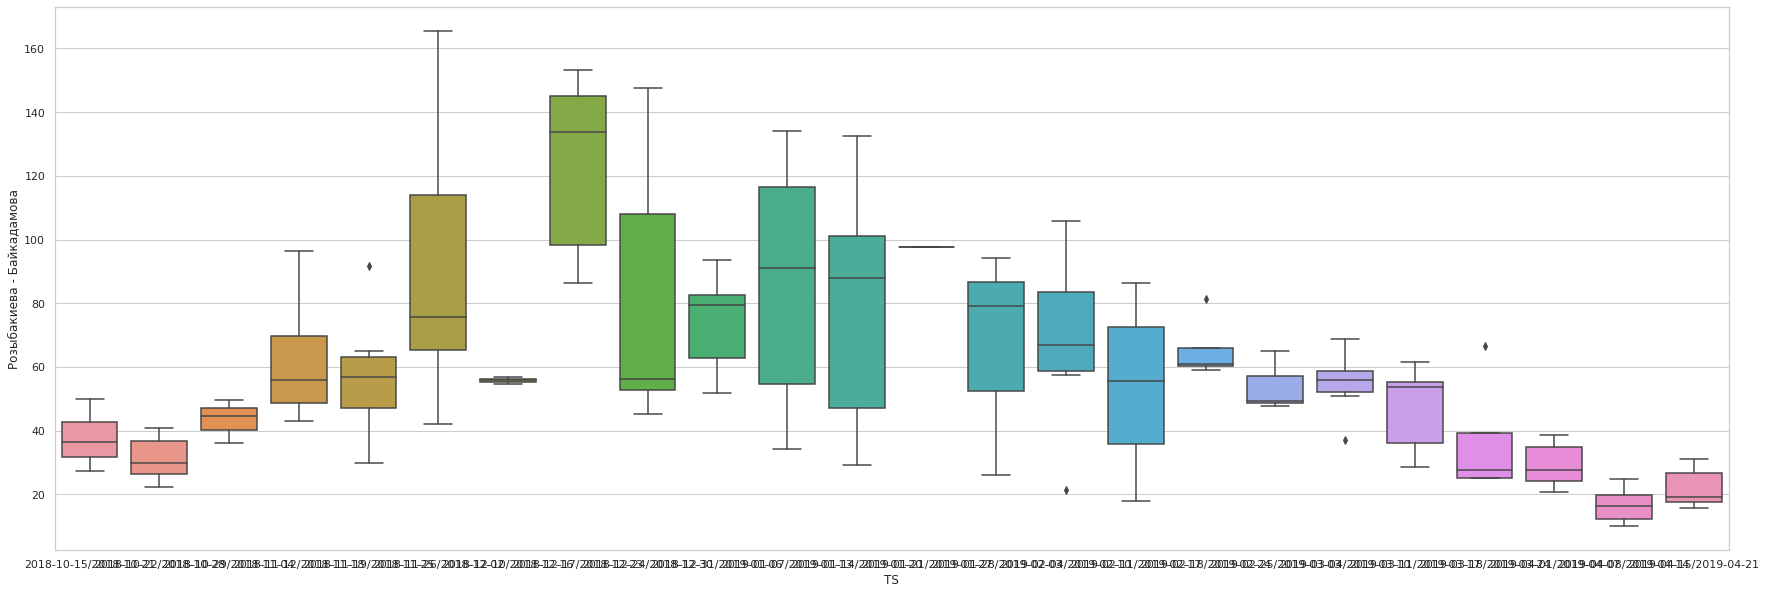

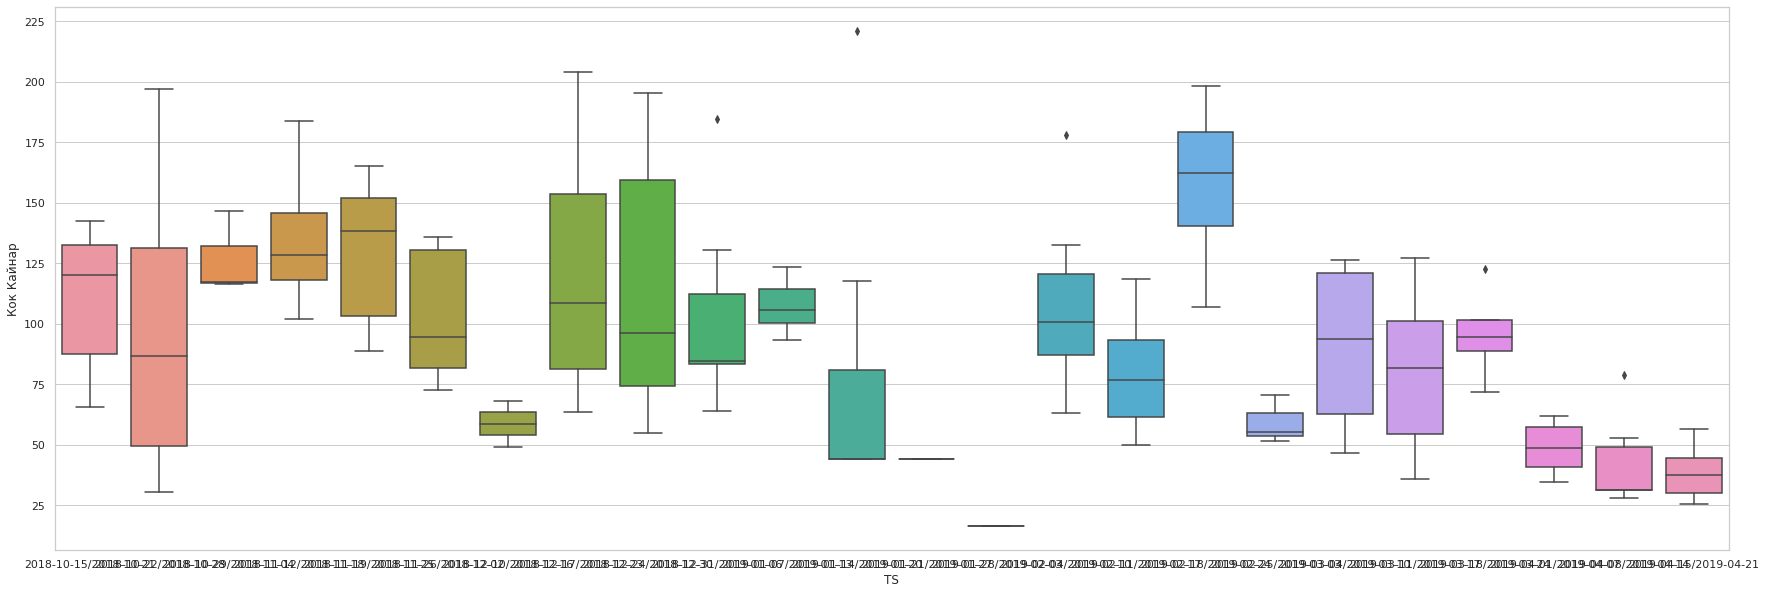

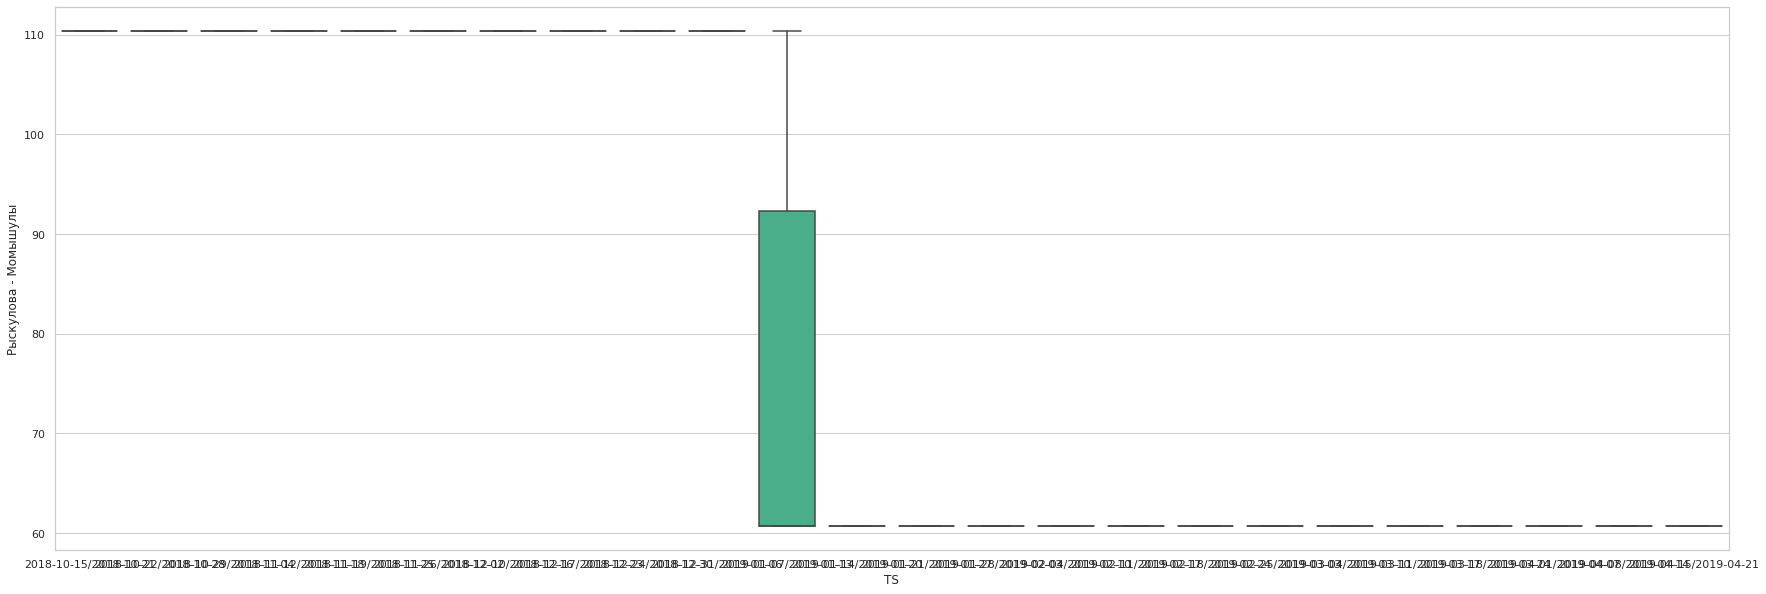

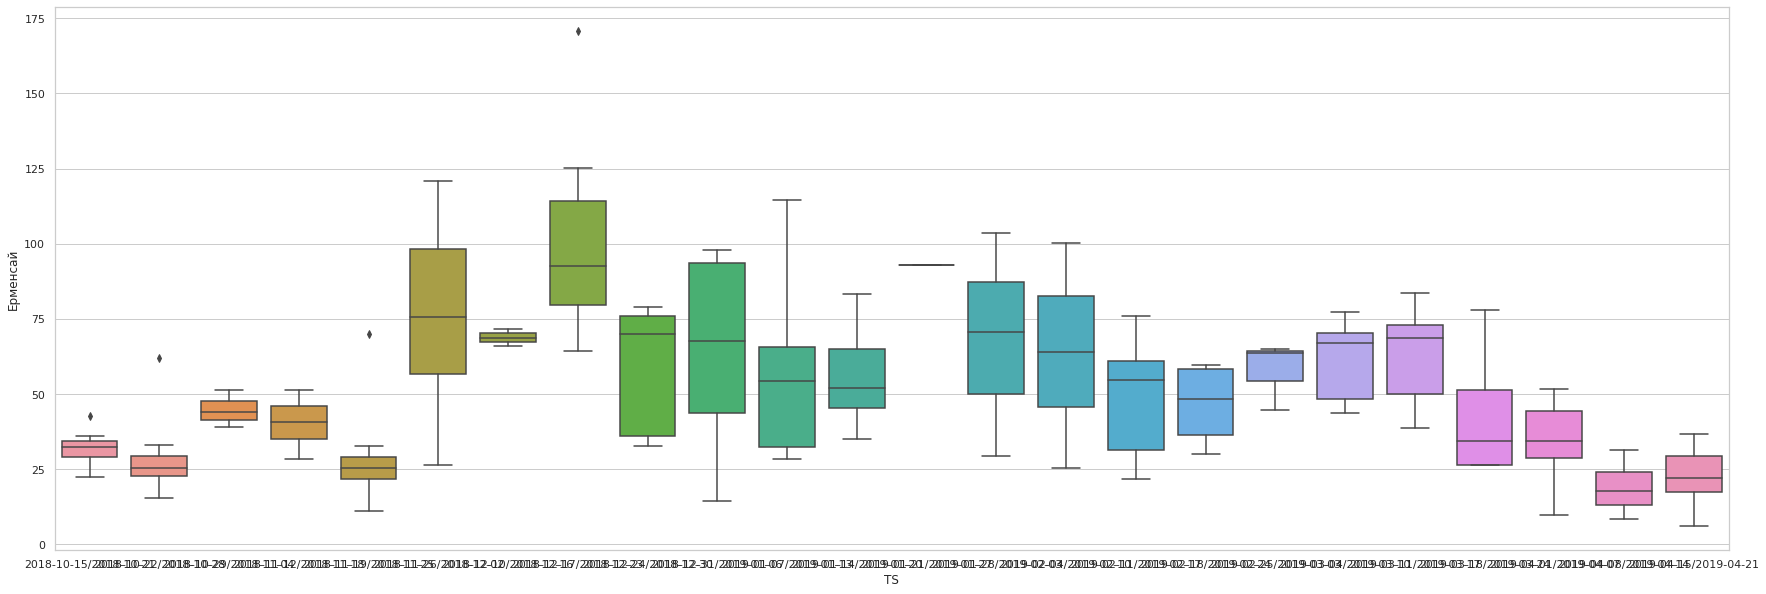

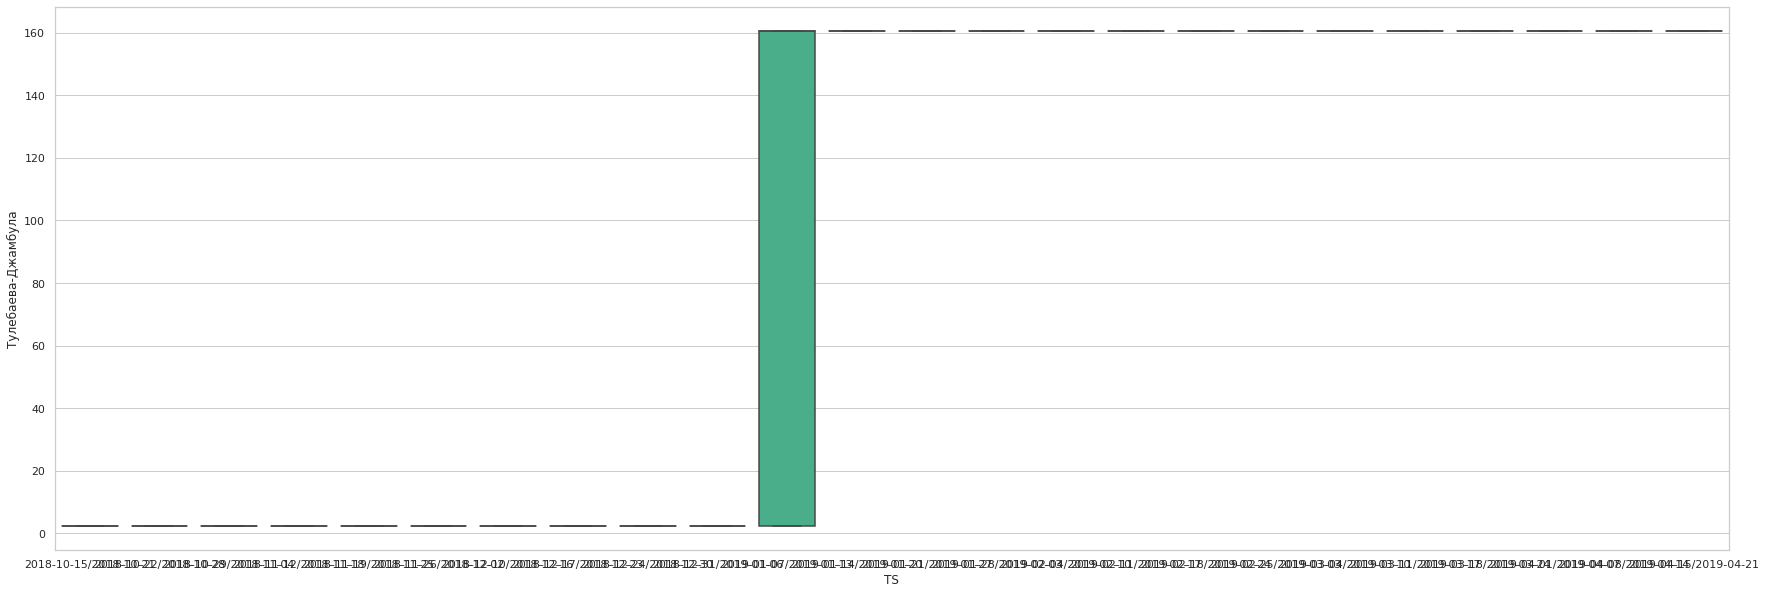

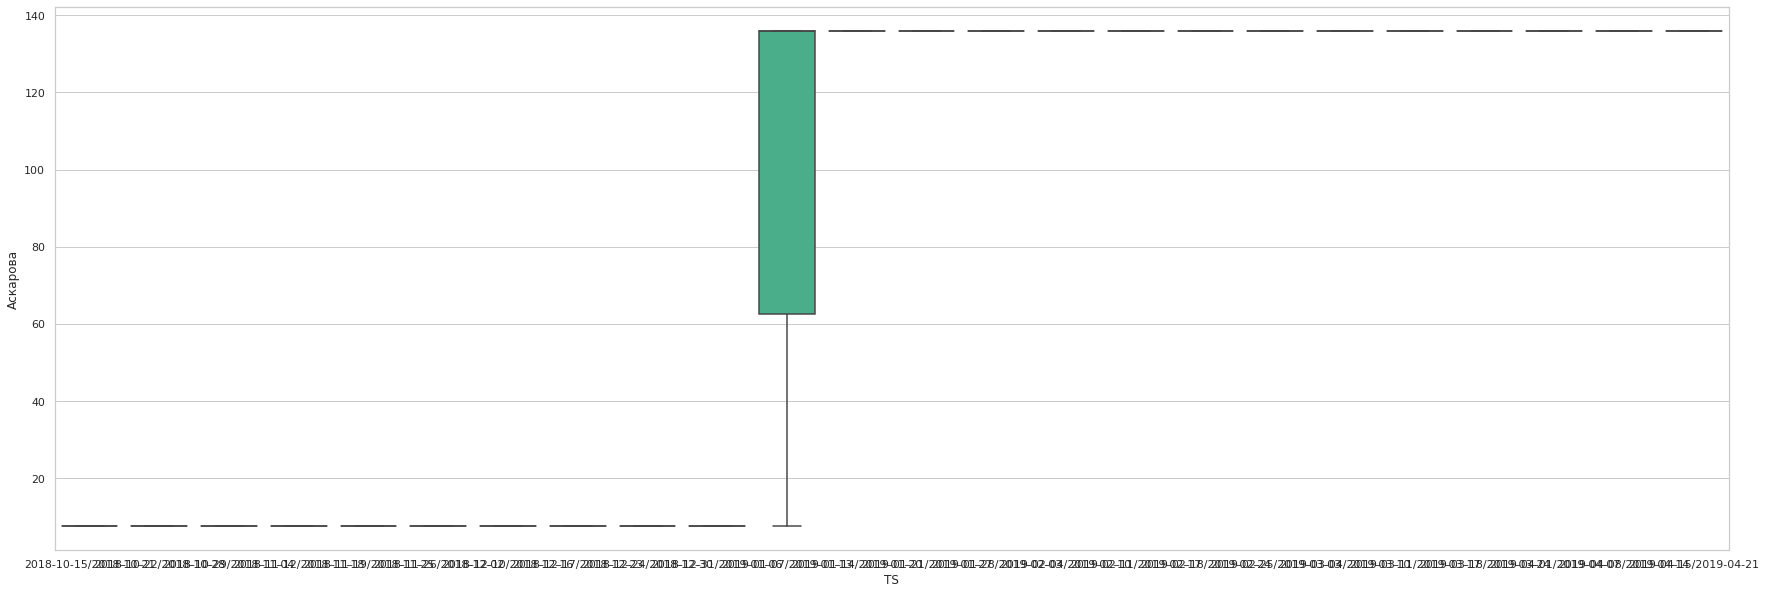

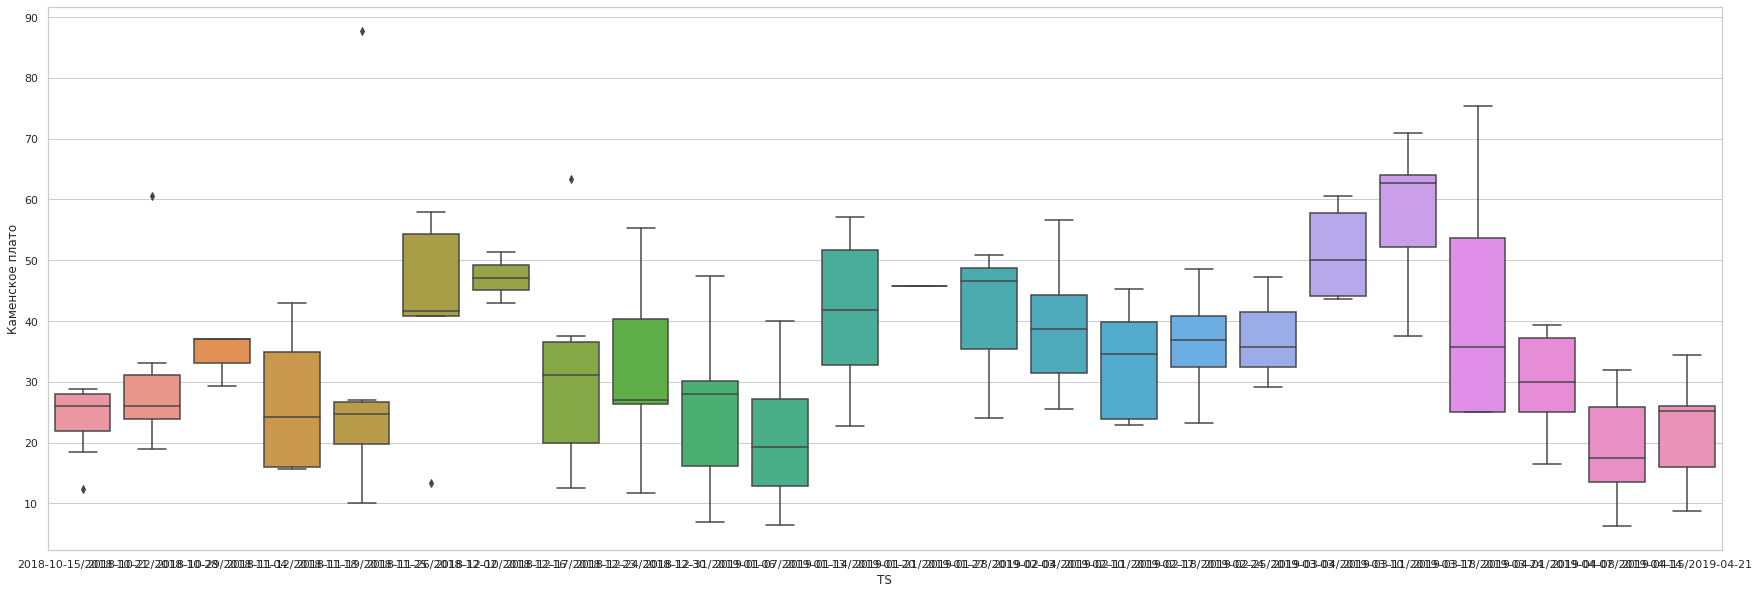

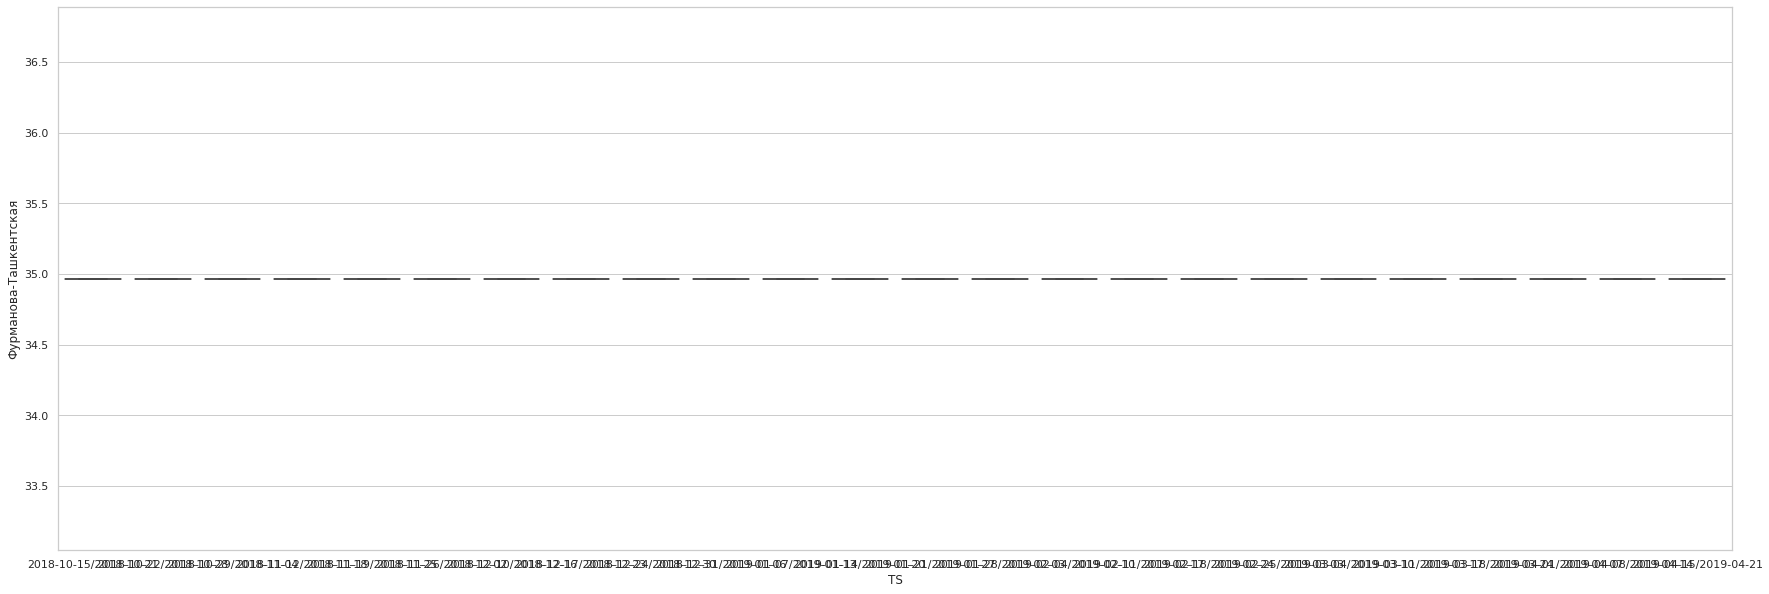

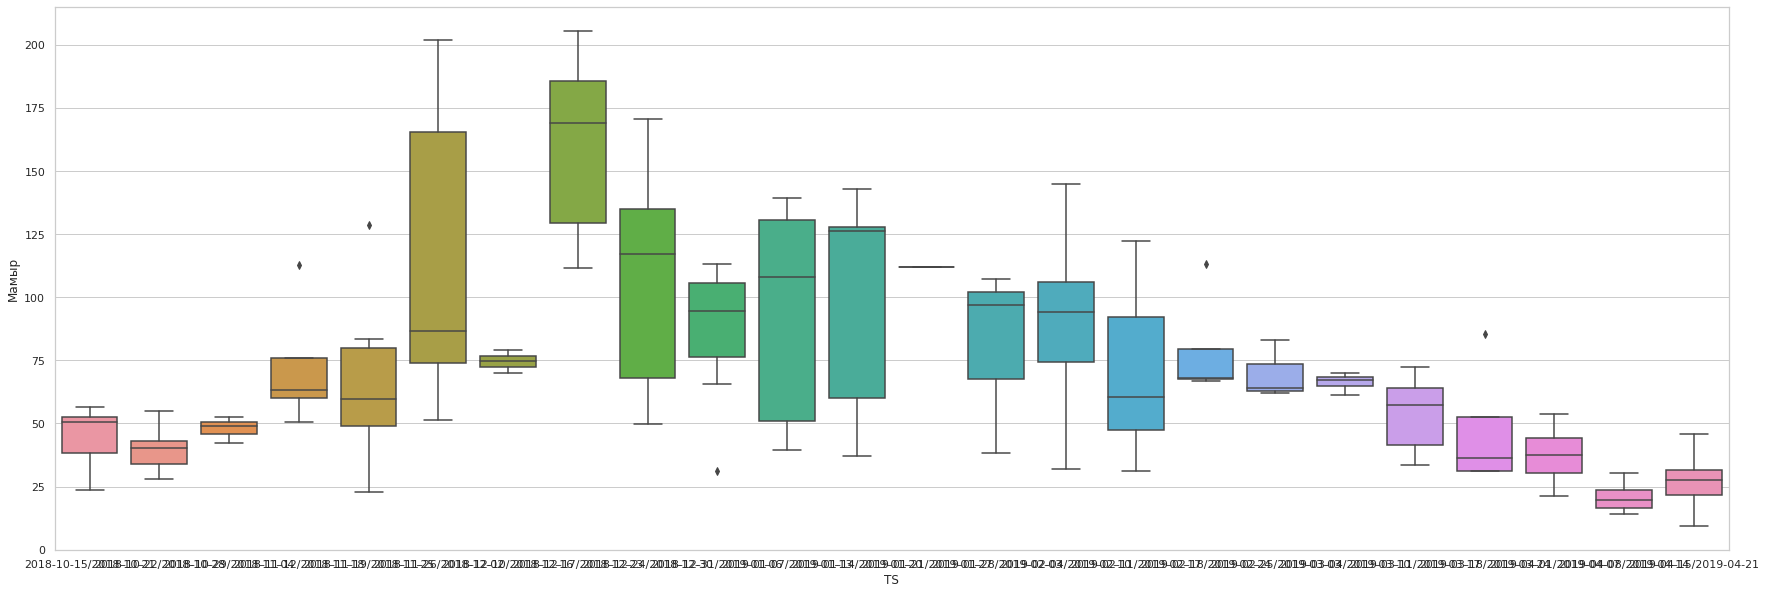

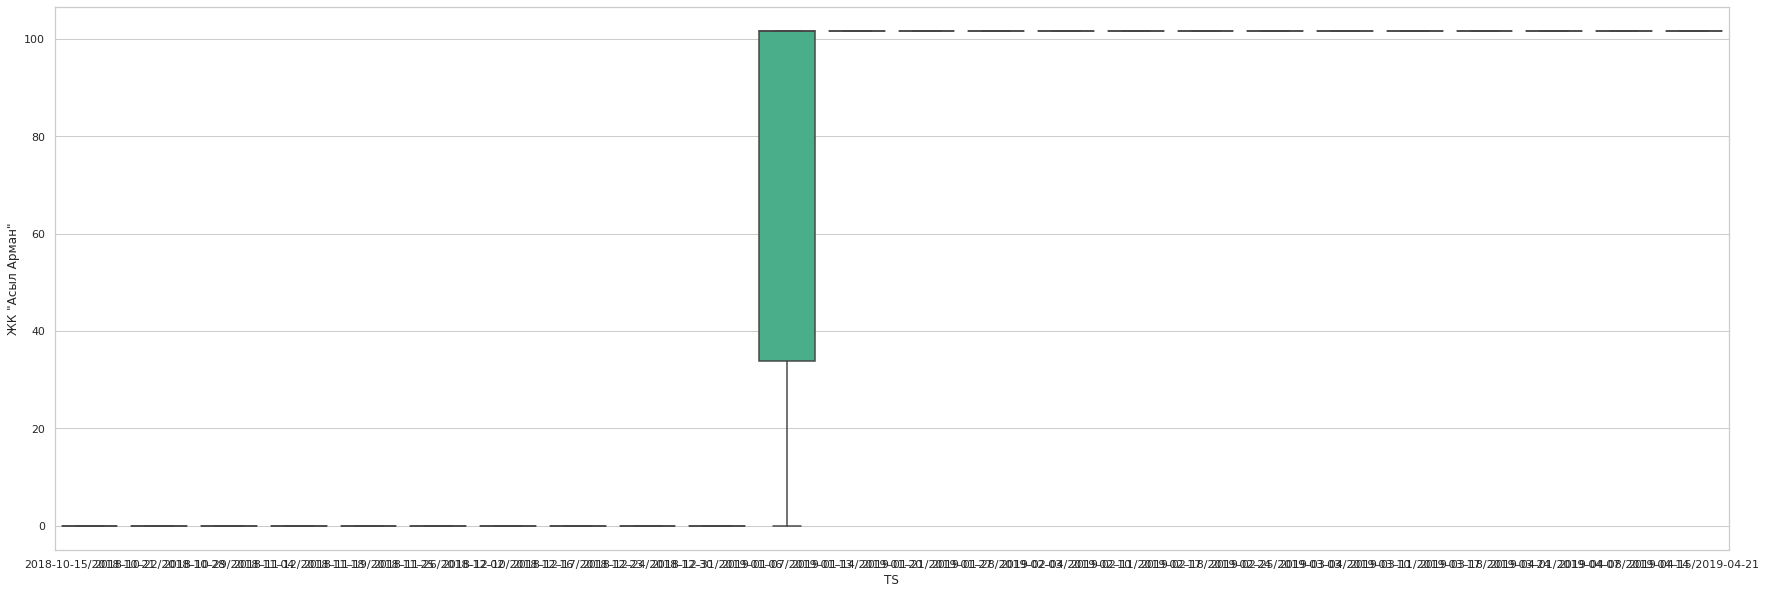

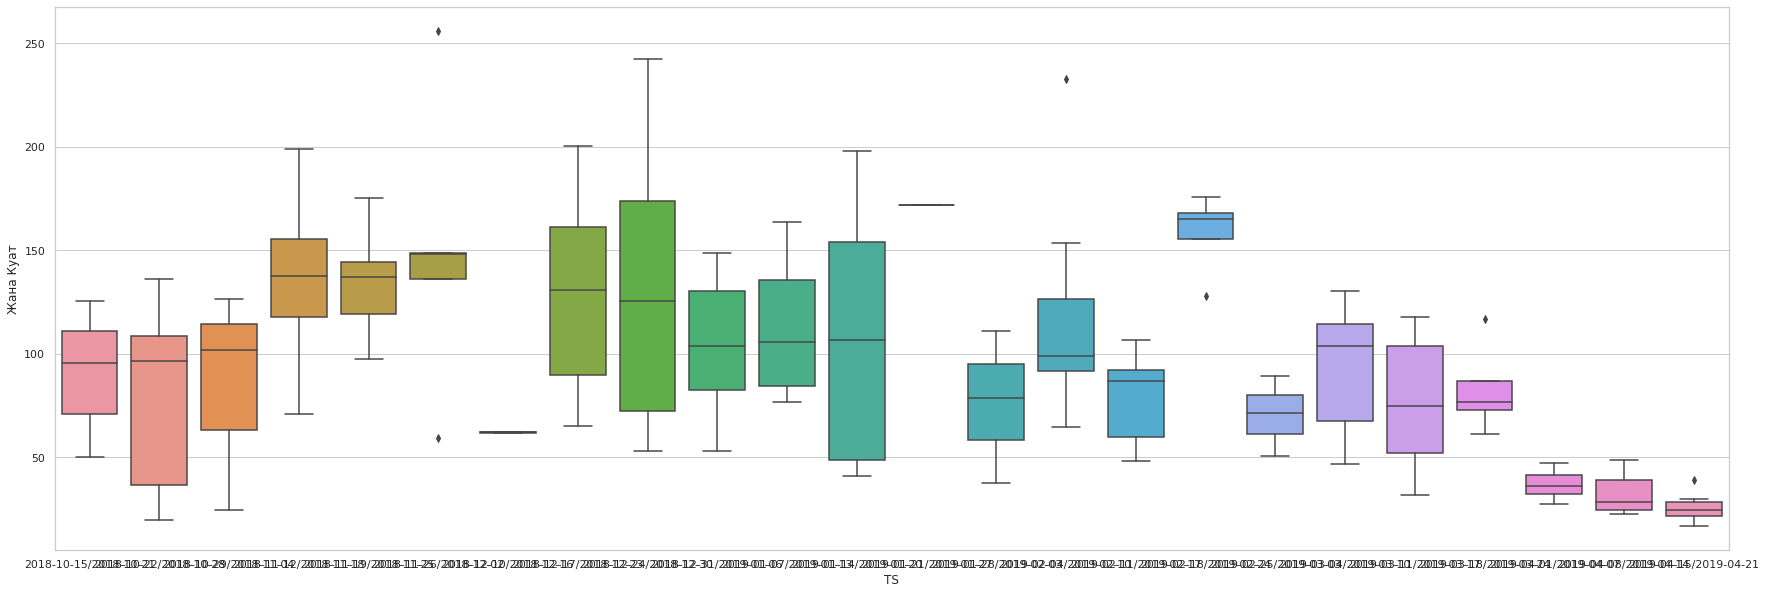

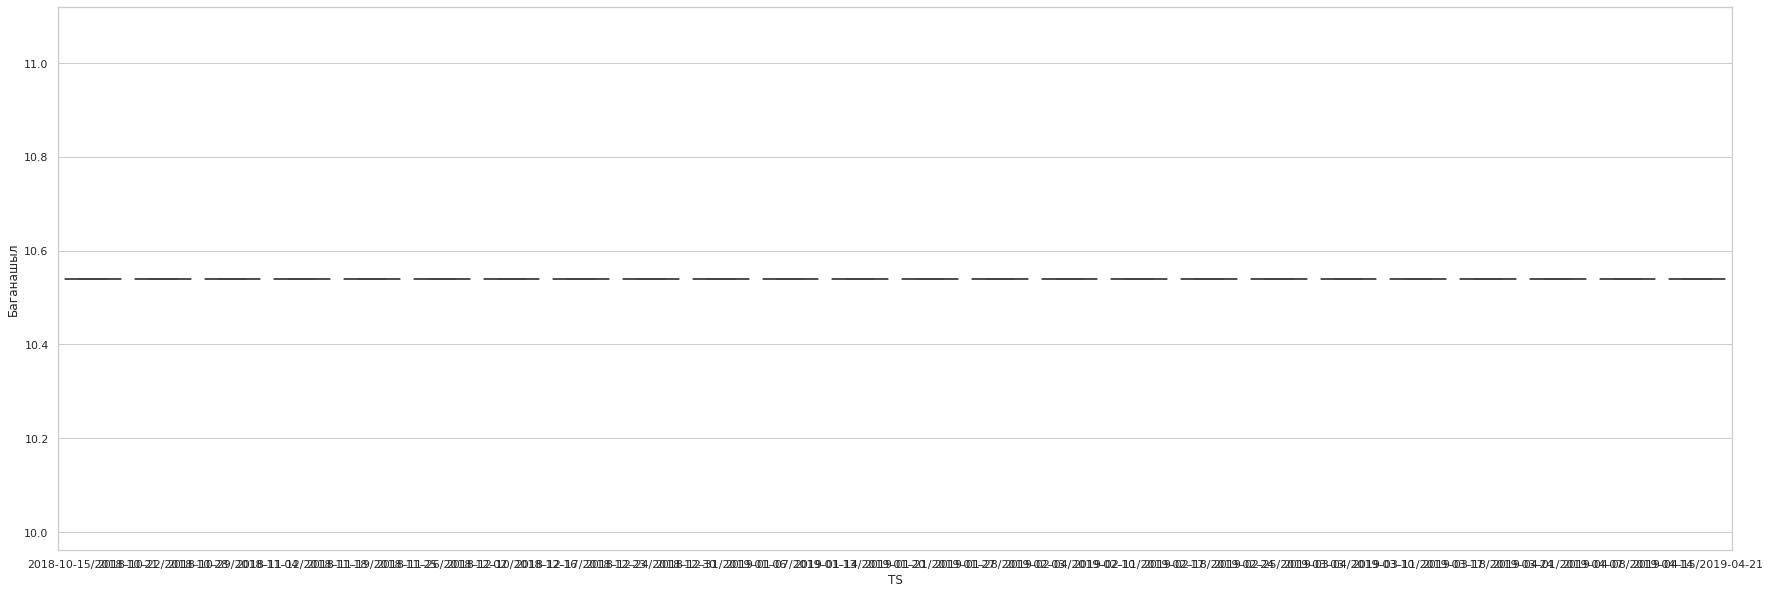

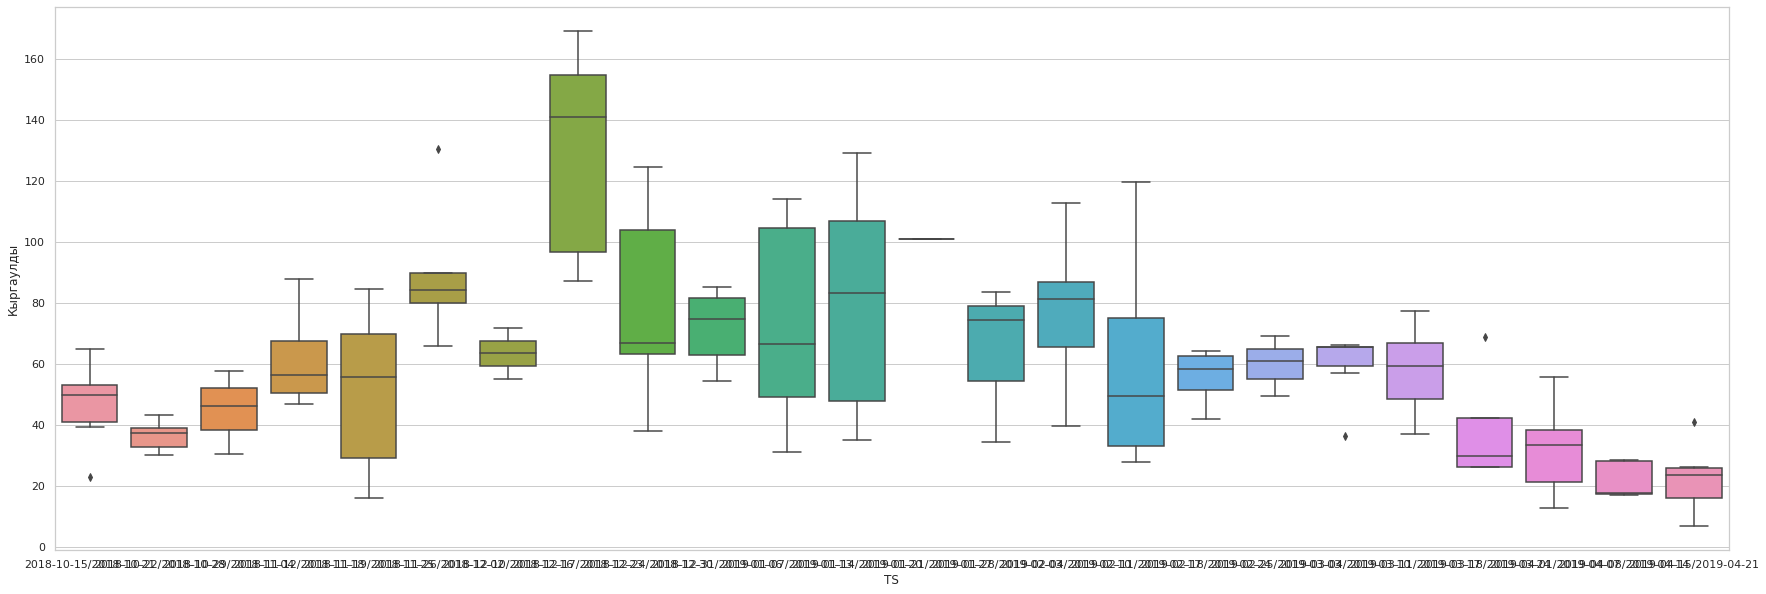

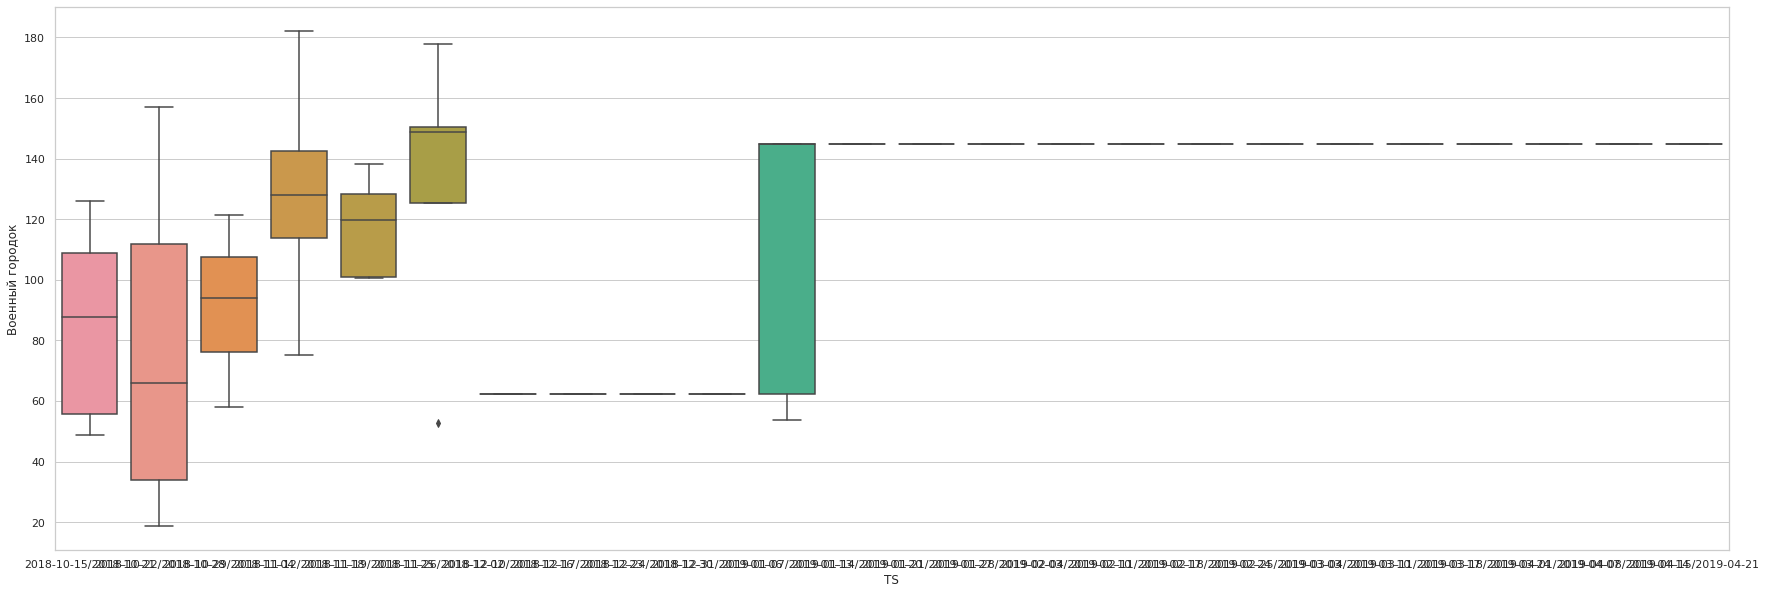

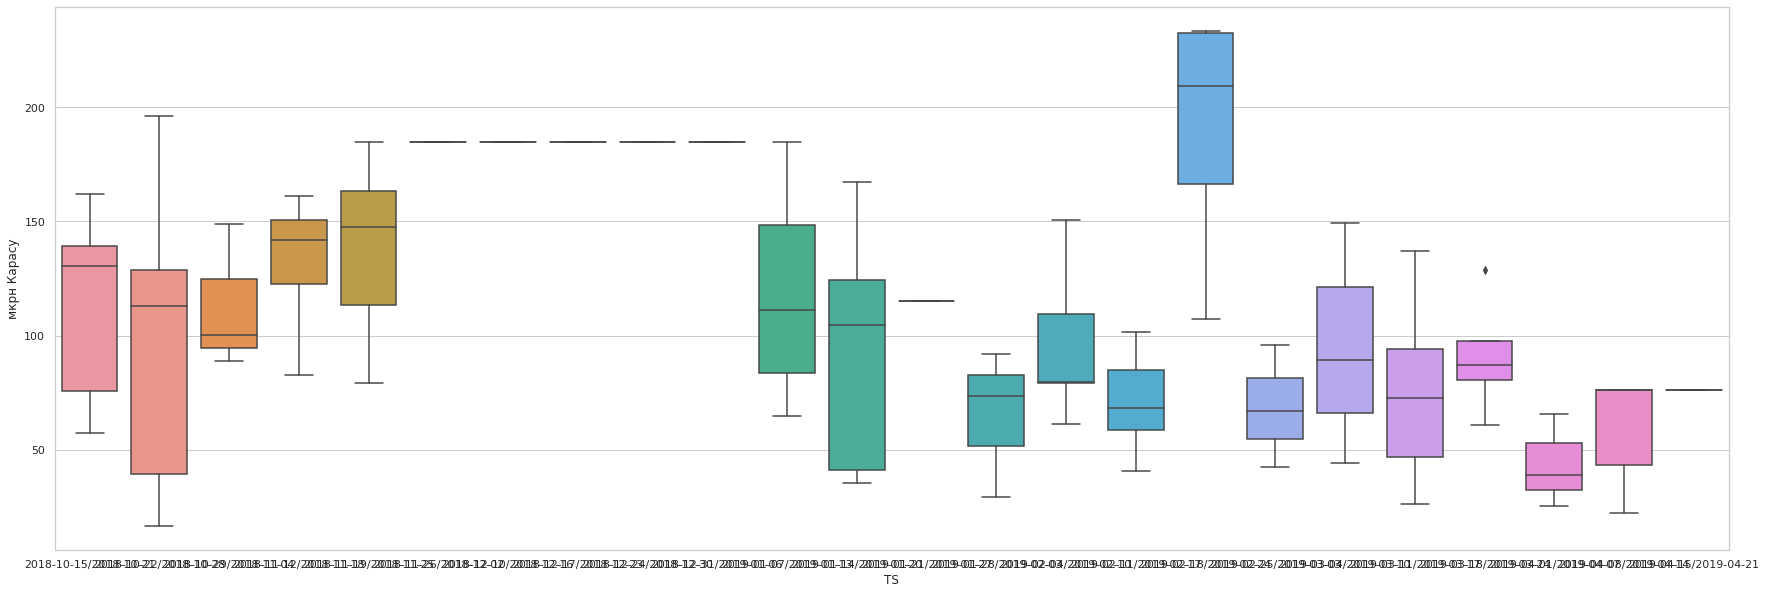

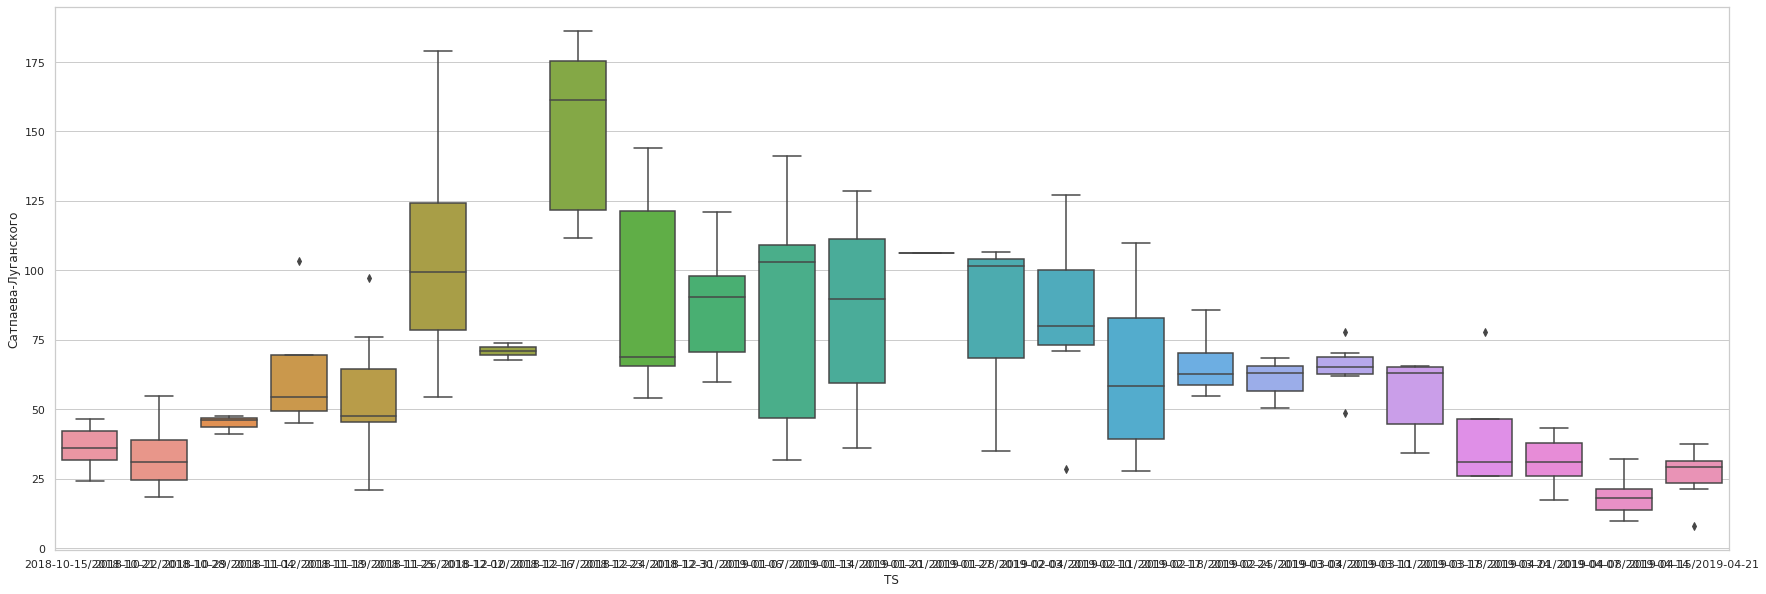

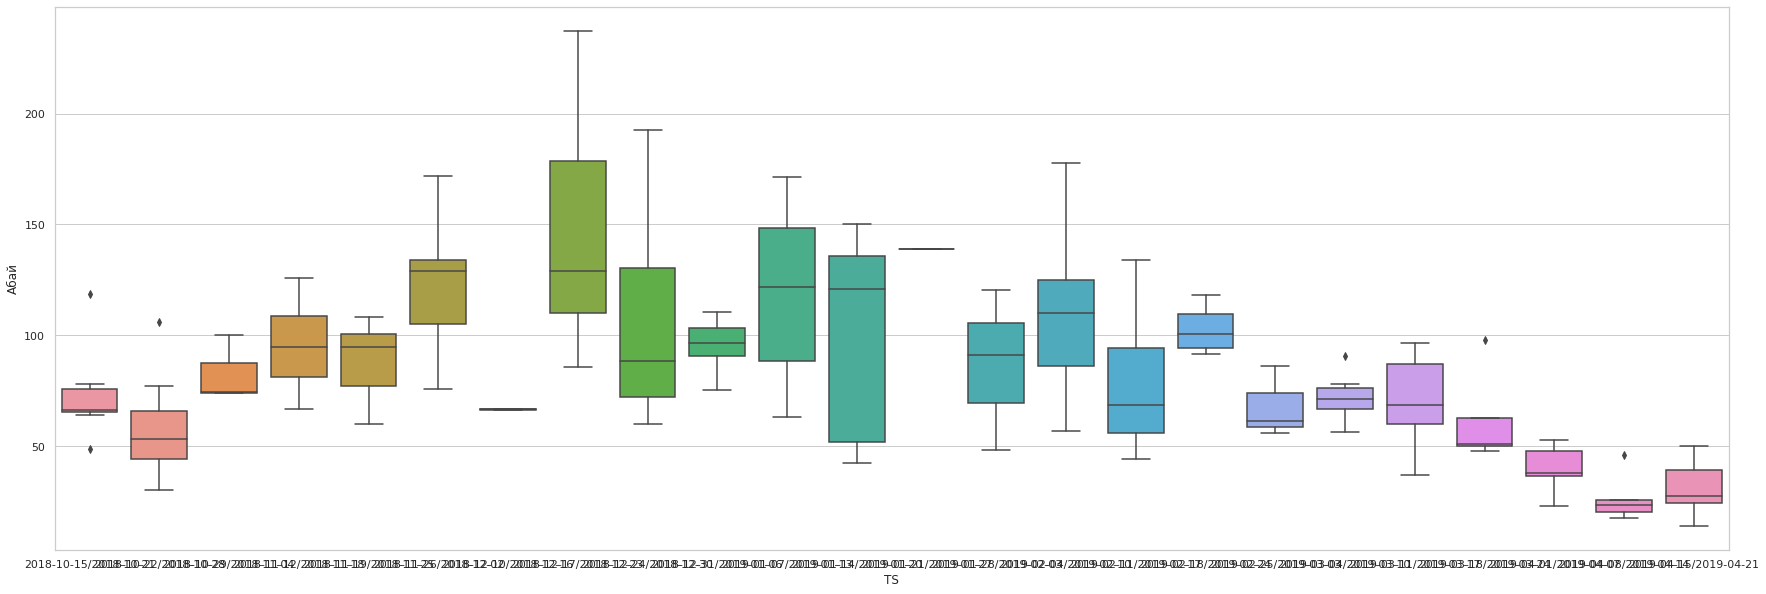

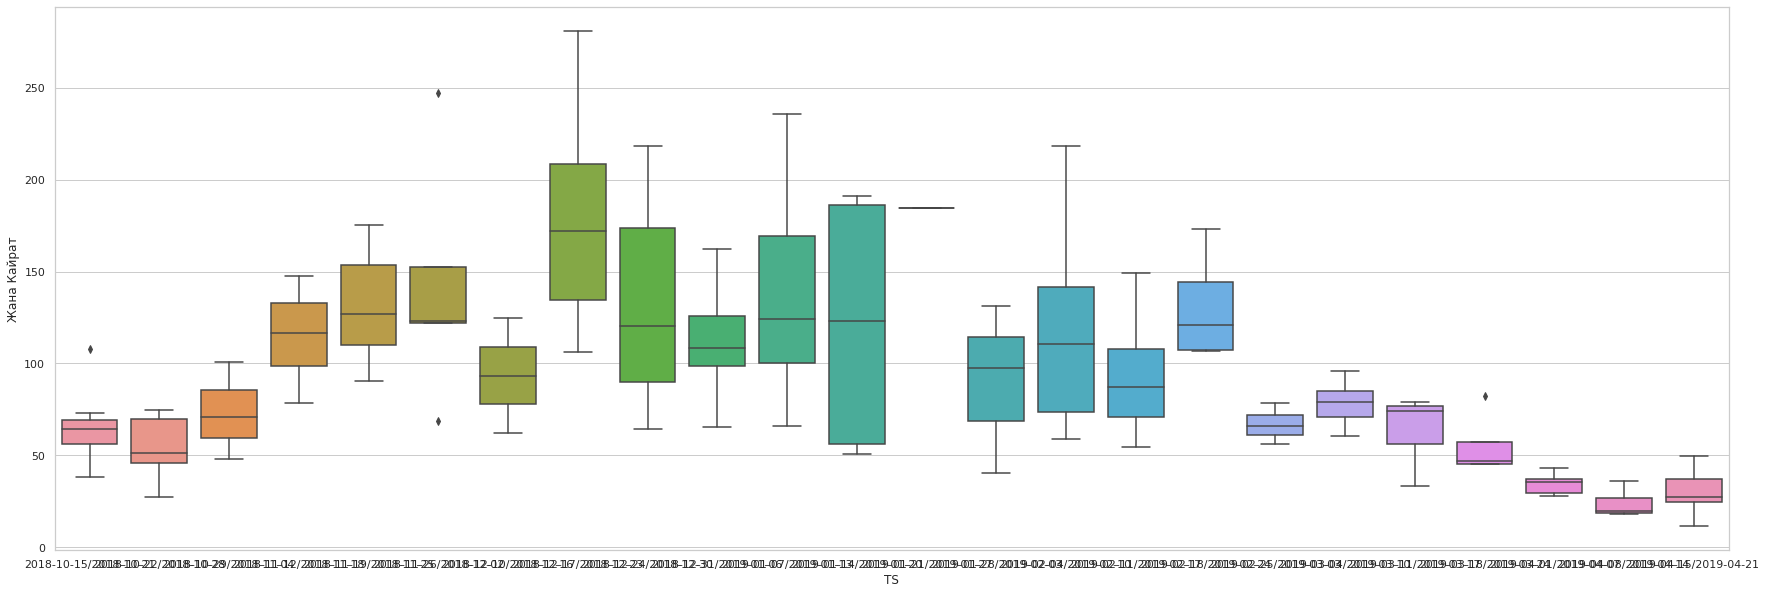

In [50]:
for key in sums:
    fig, ax = plt.subplots(figsize=(30,10))
    sns.boxplot(data2018.index.to_period('W'), data2018[key], ax=ax)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

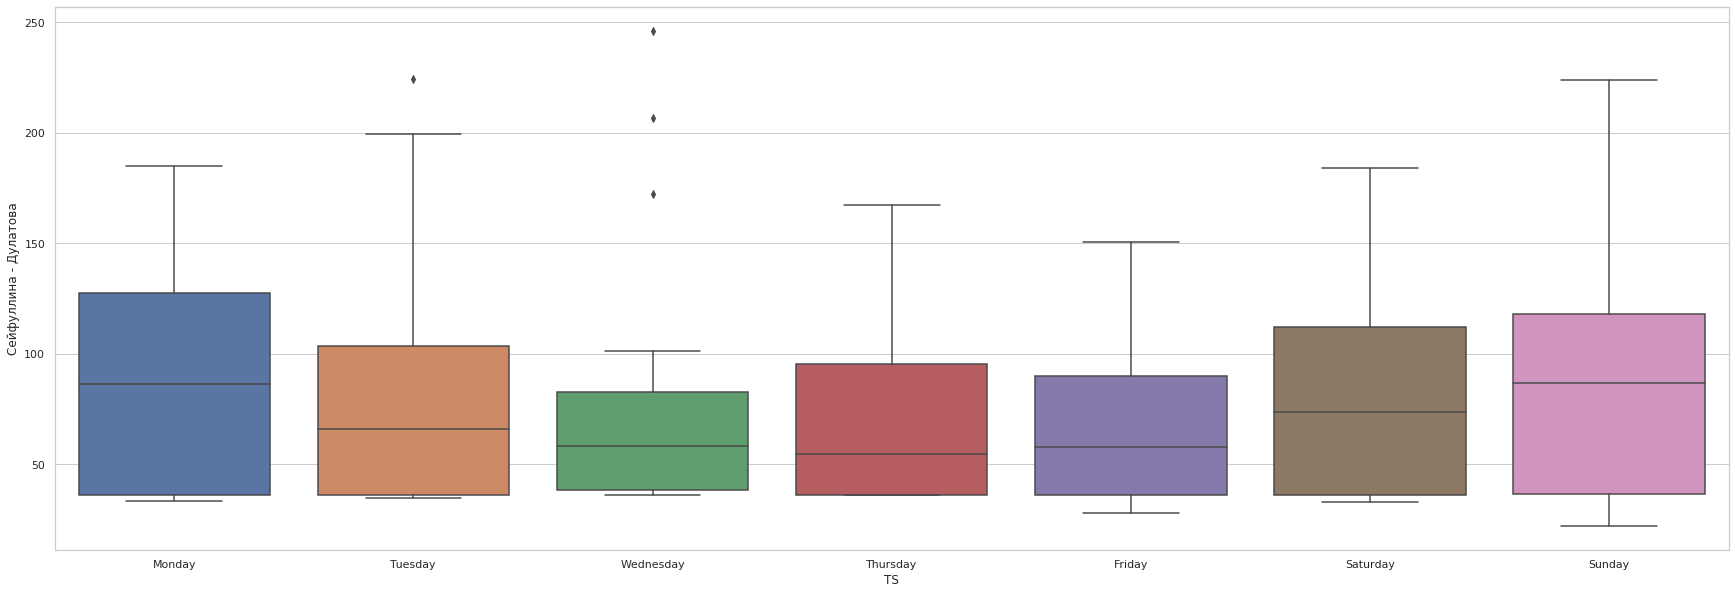

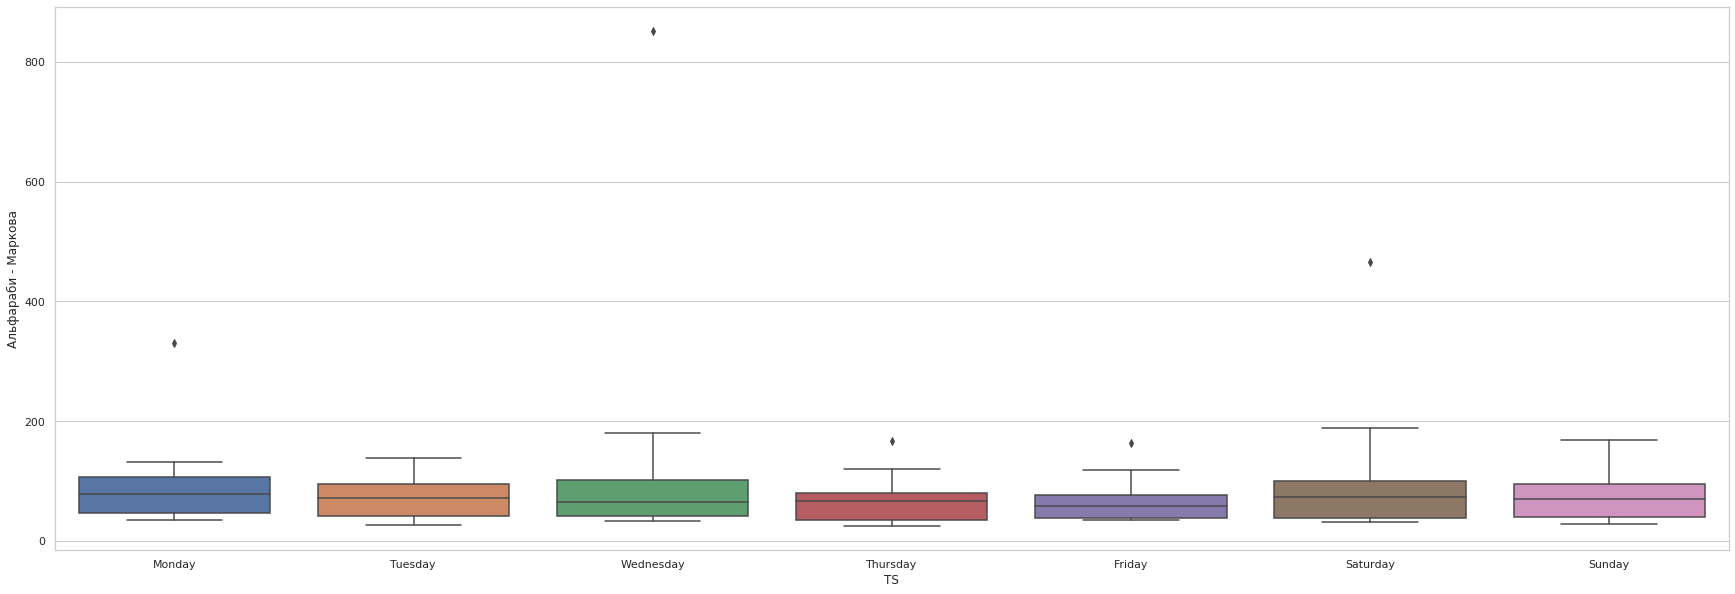

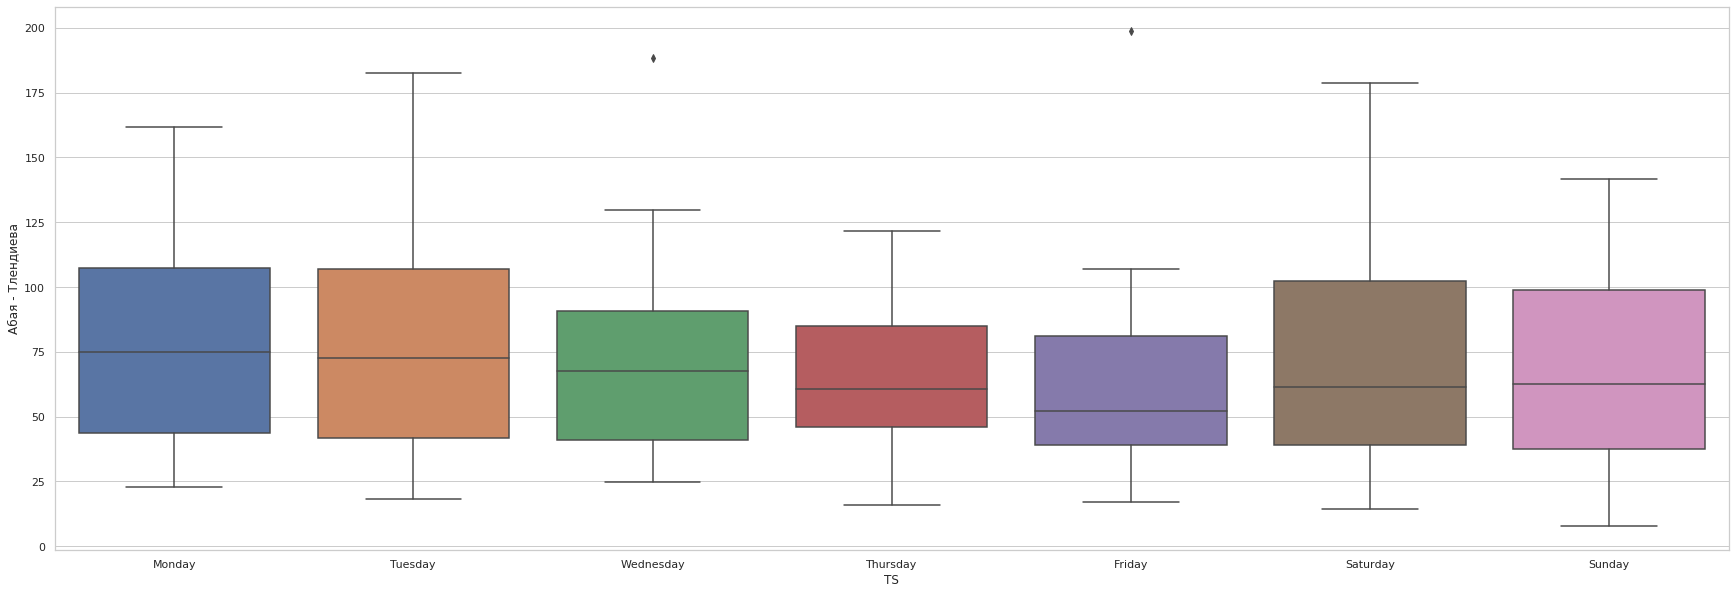

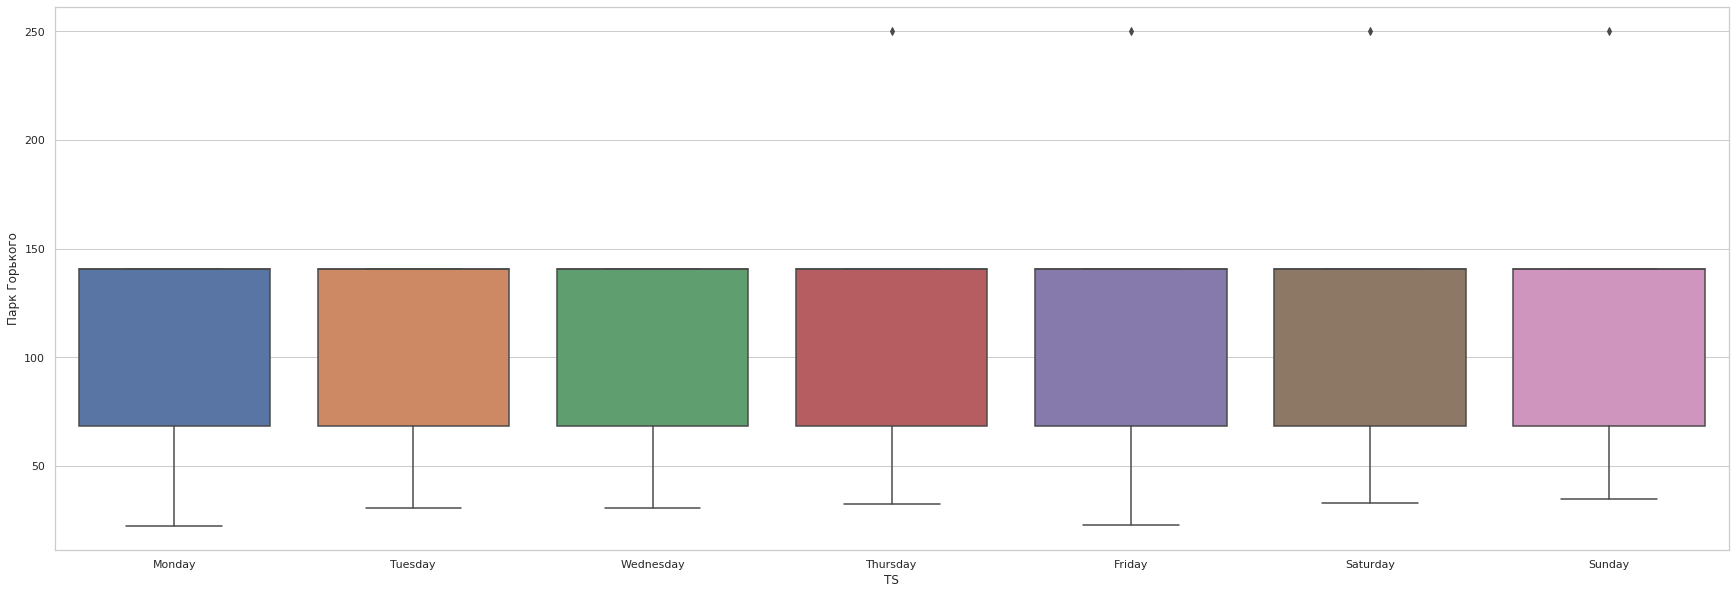

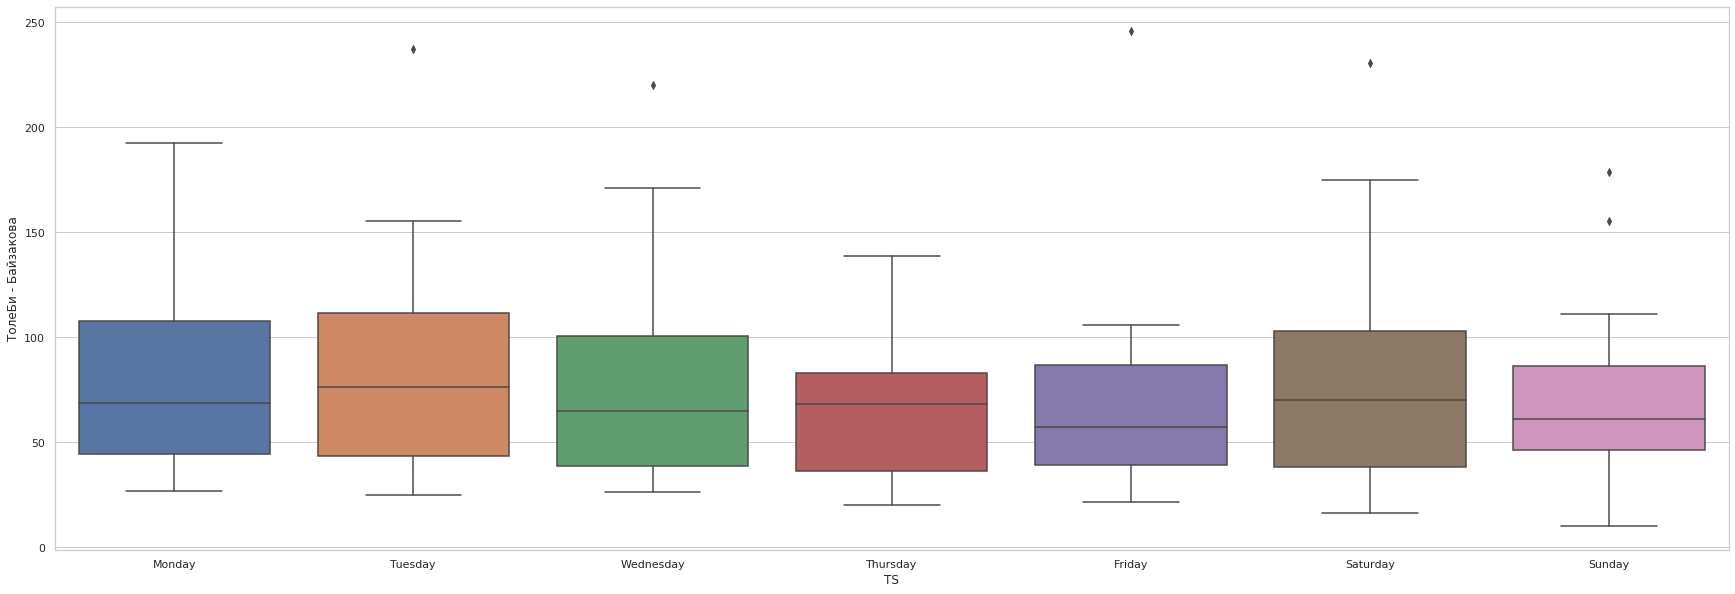

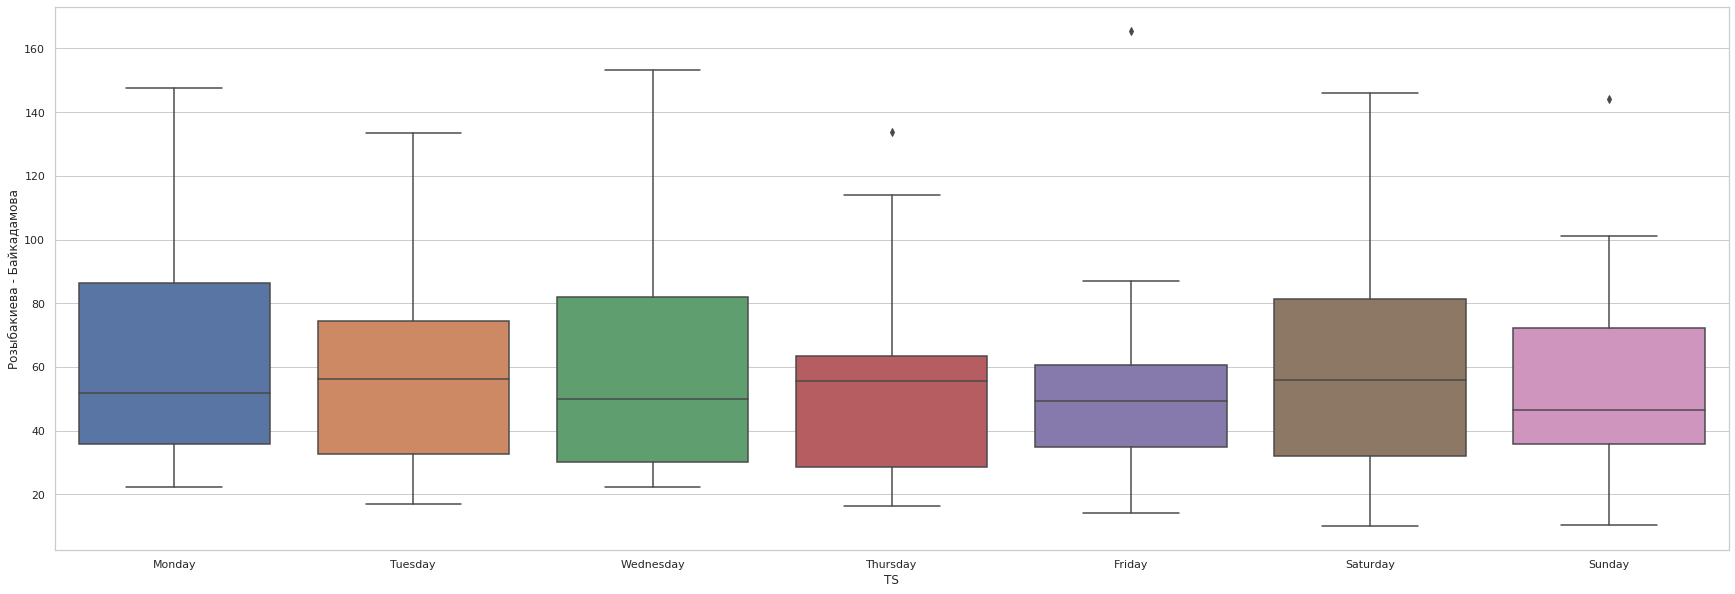

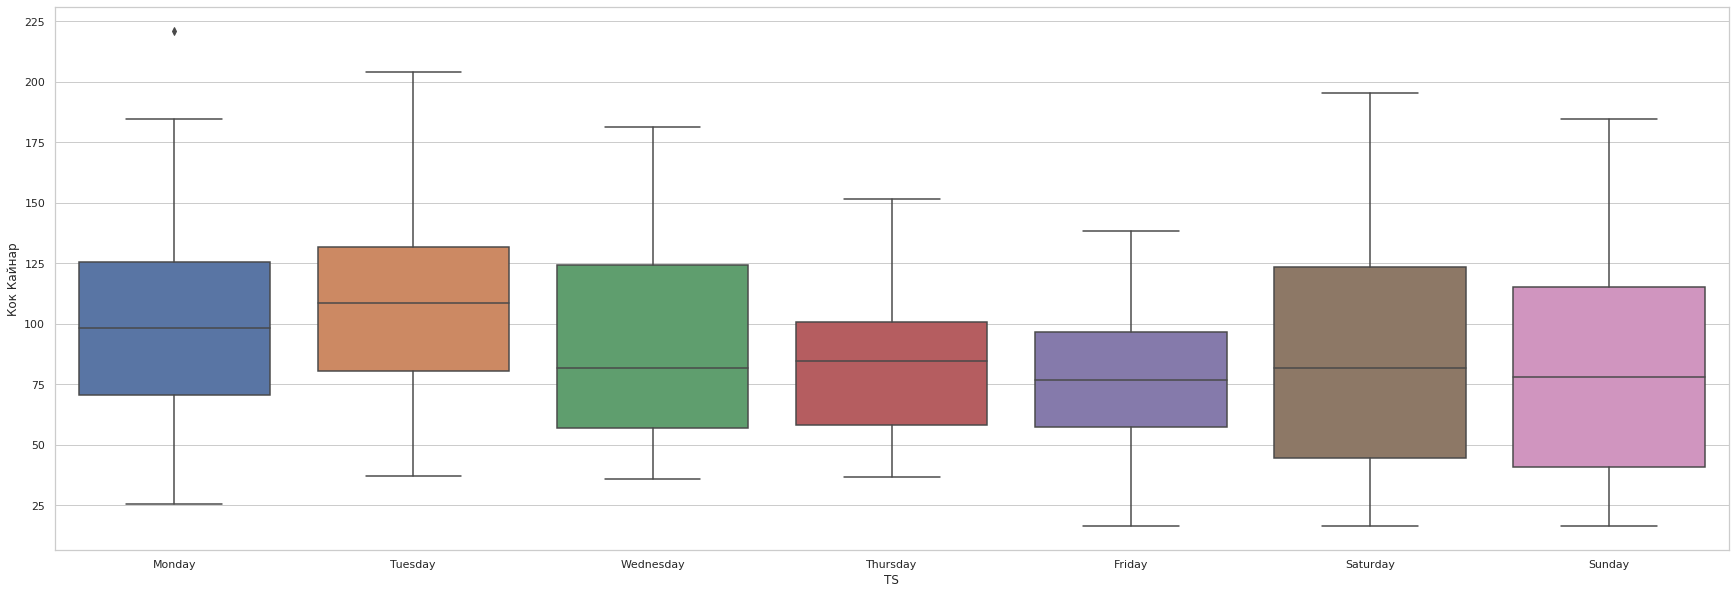

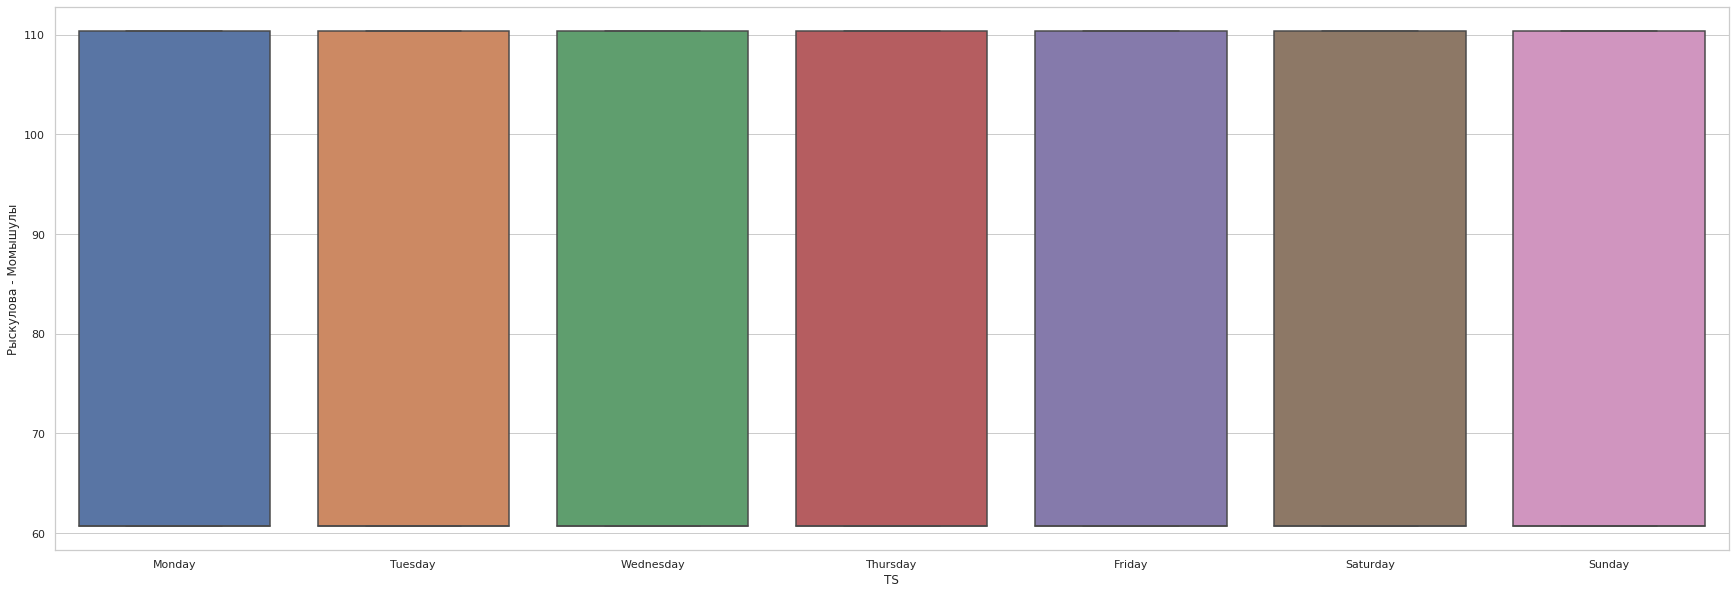

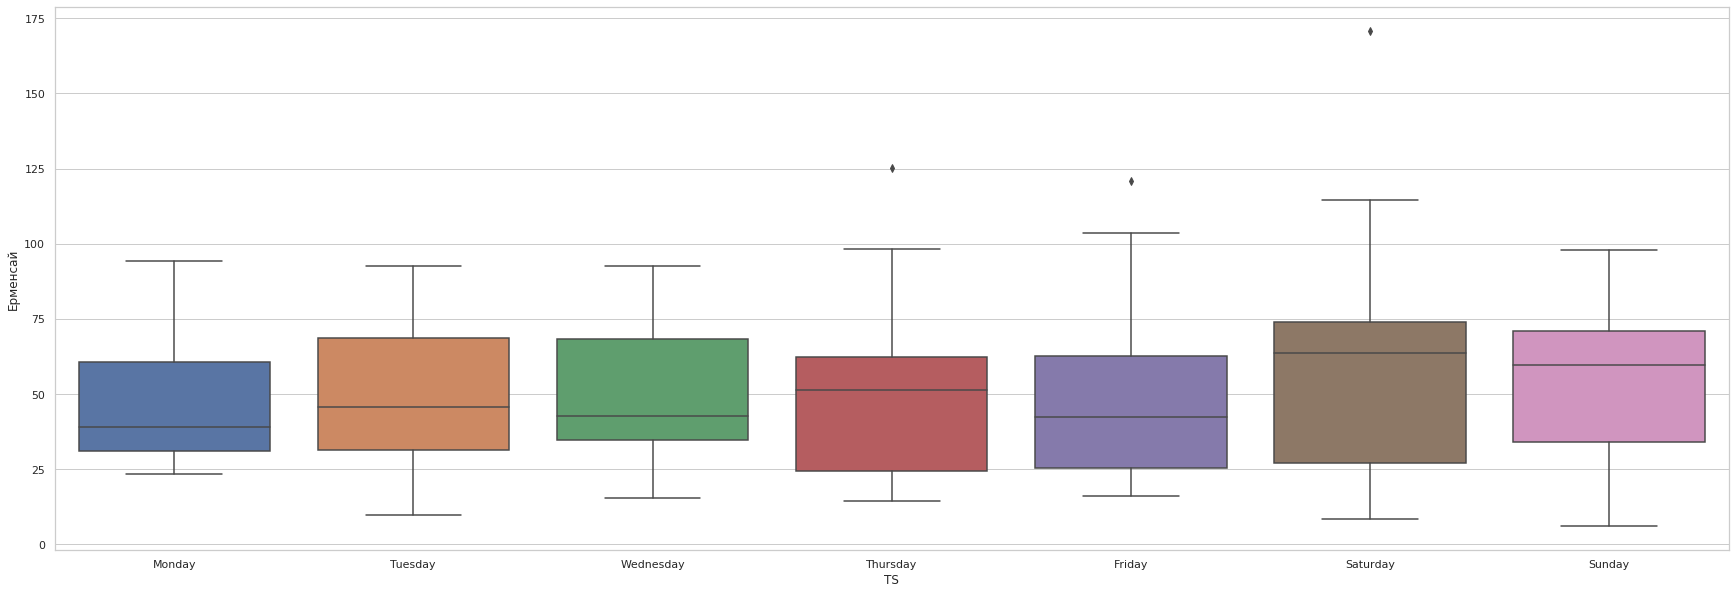

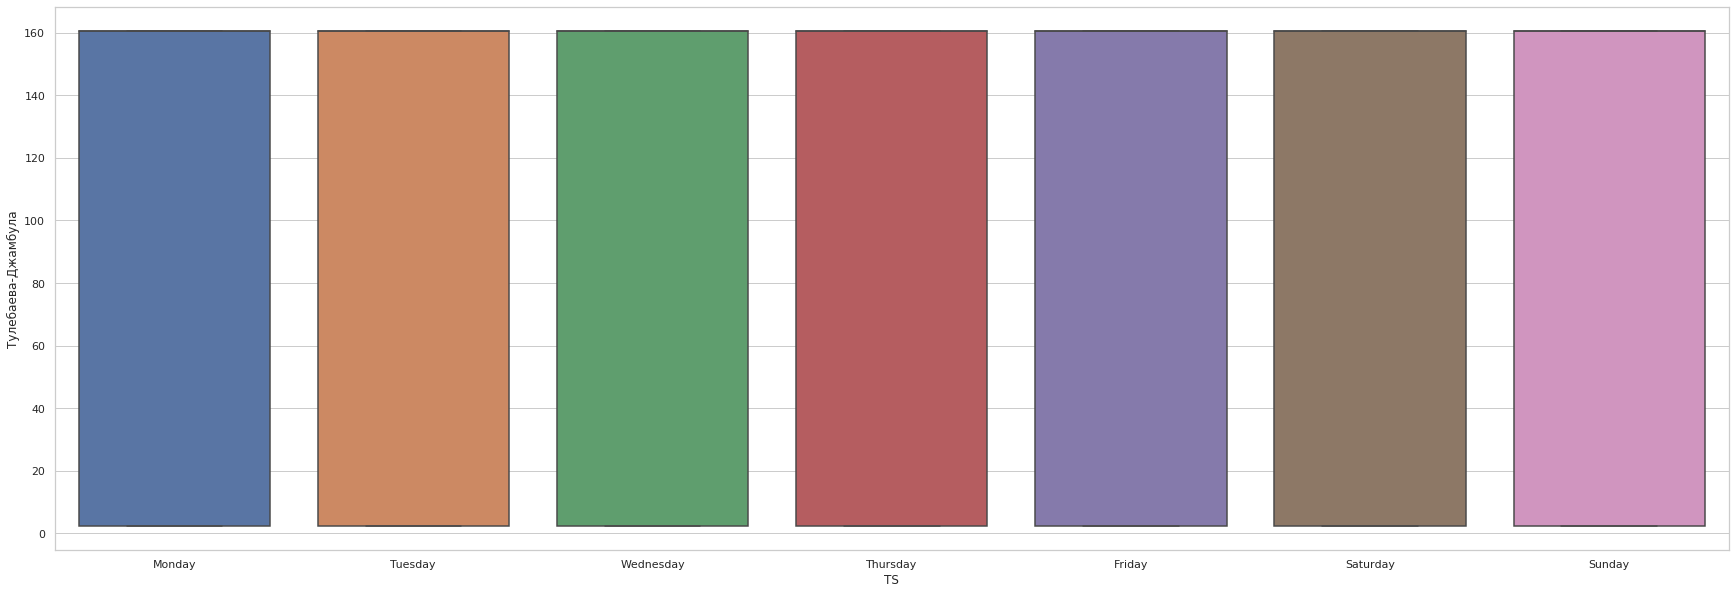

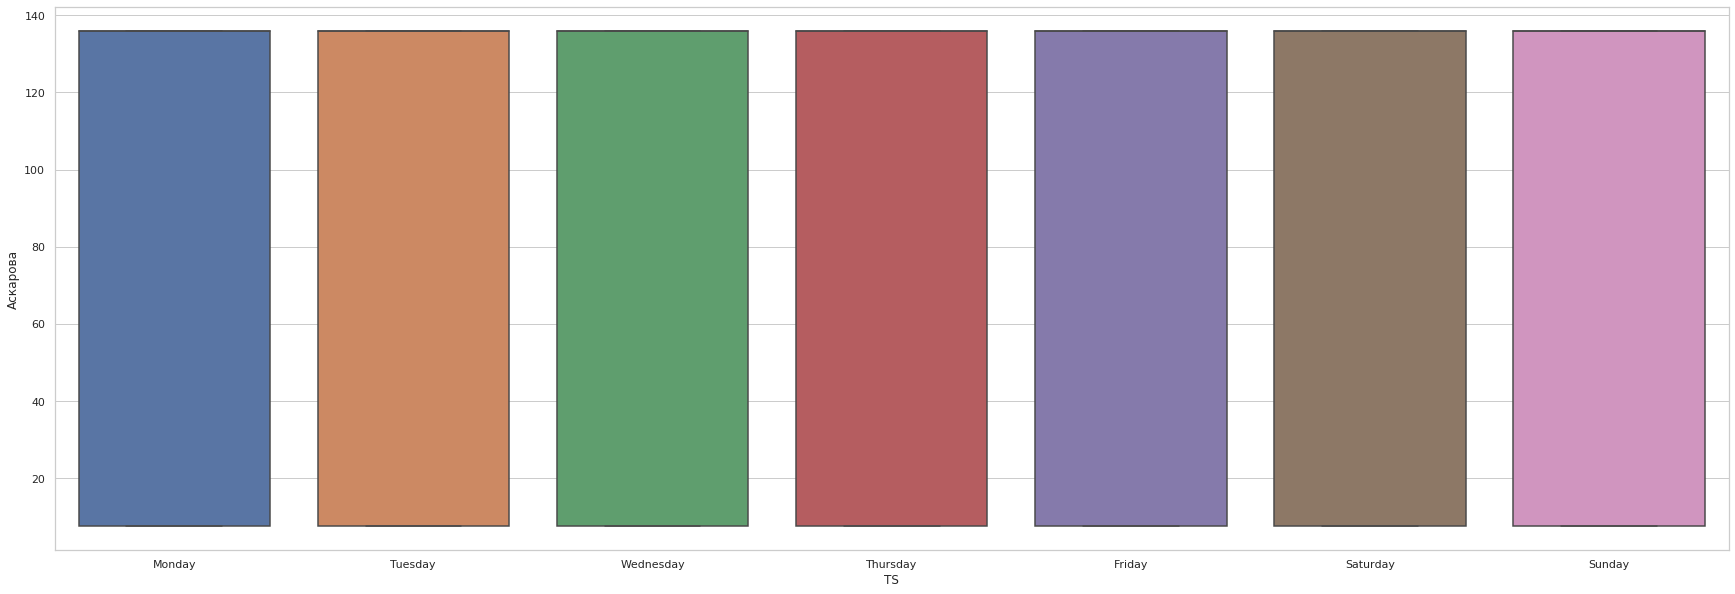

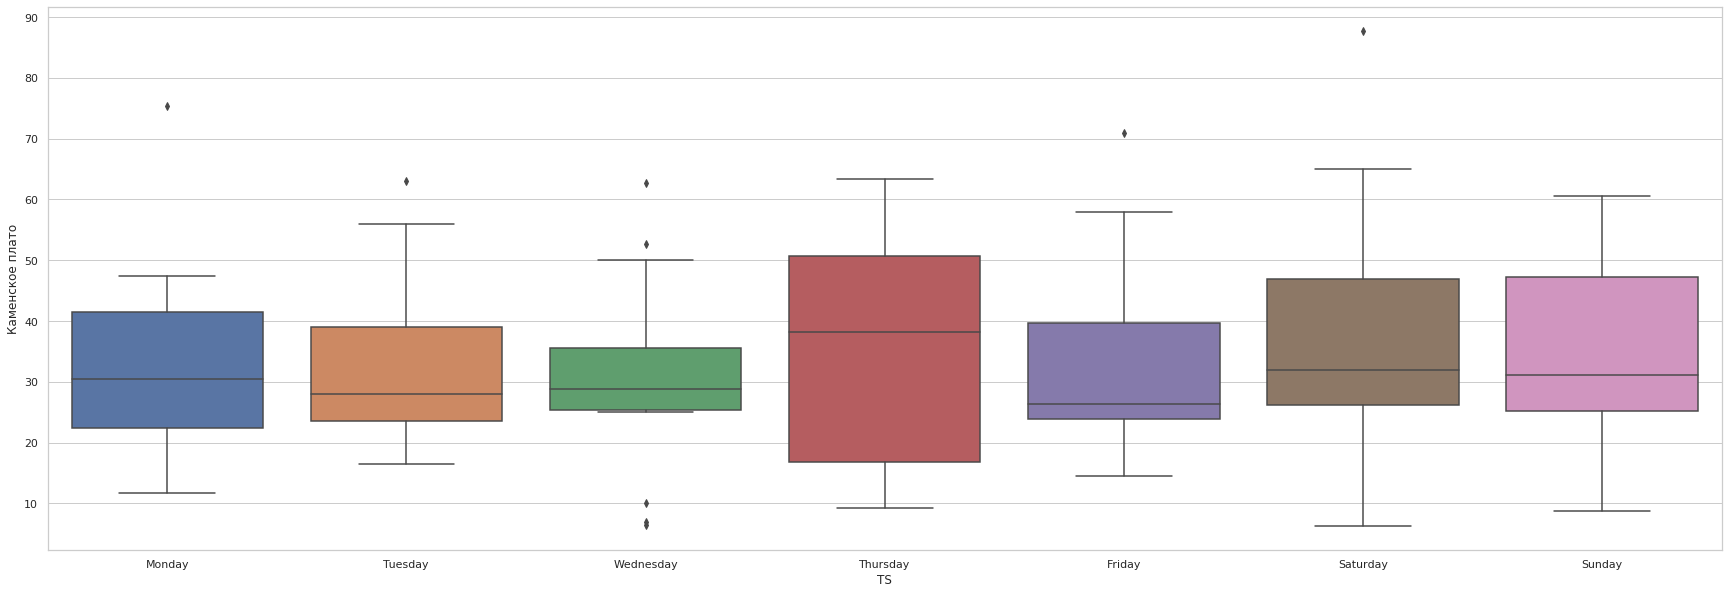

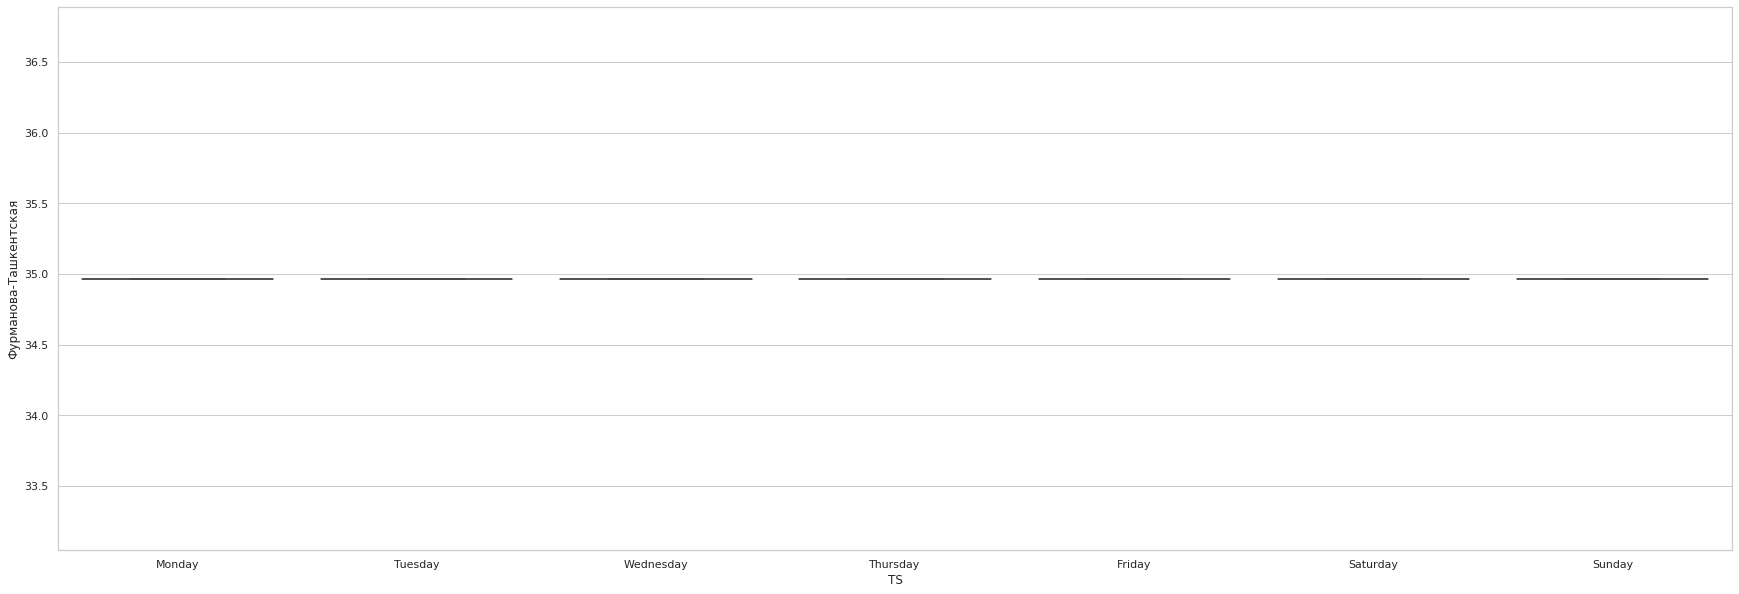

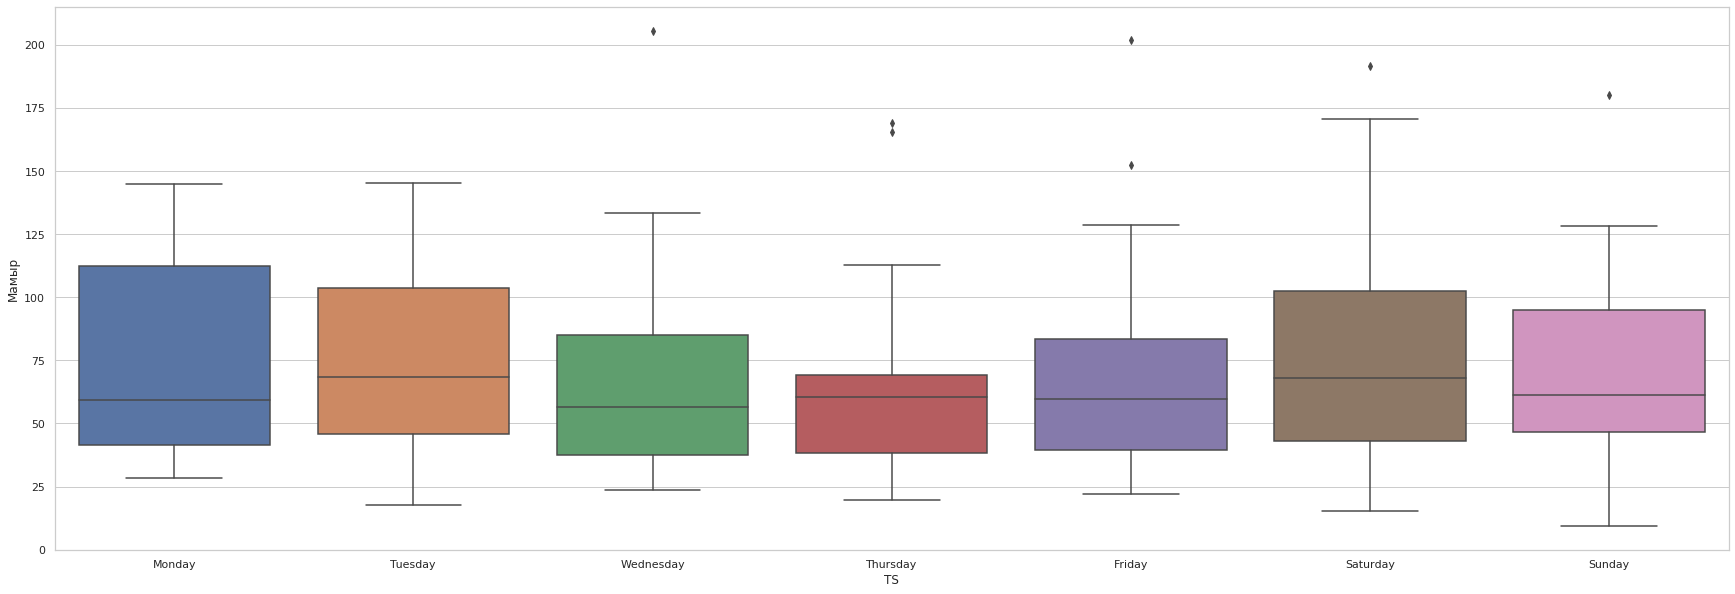

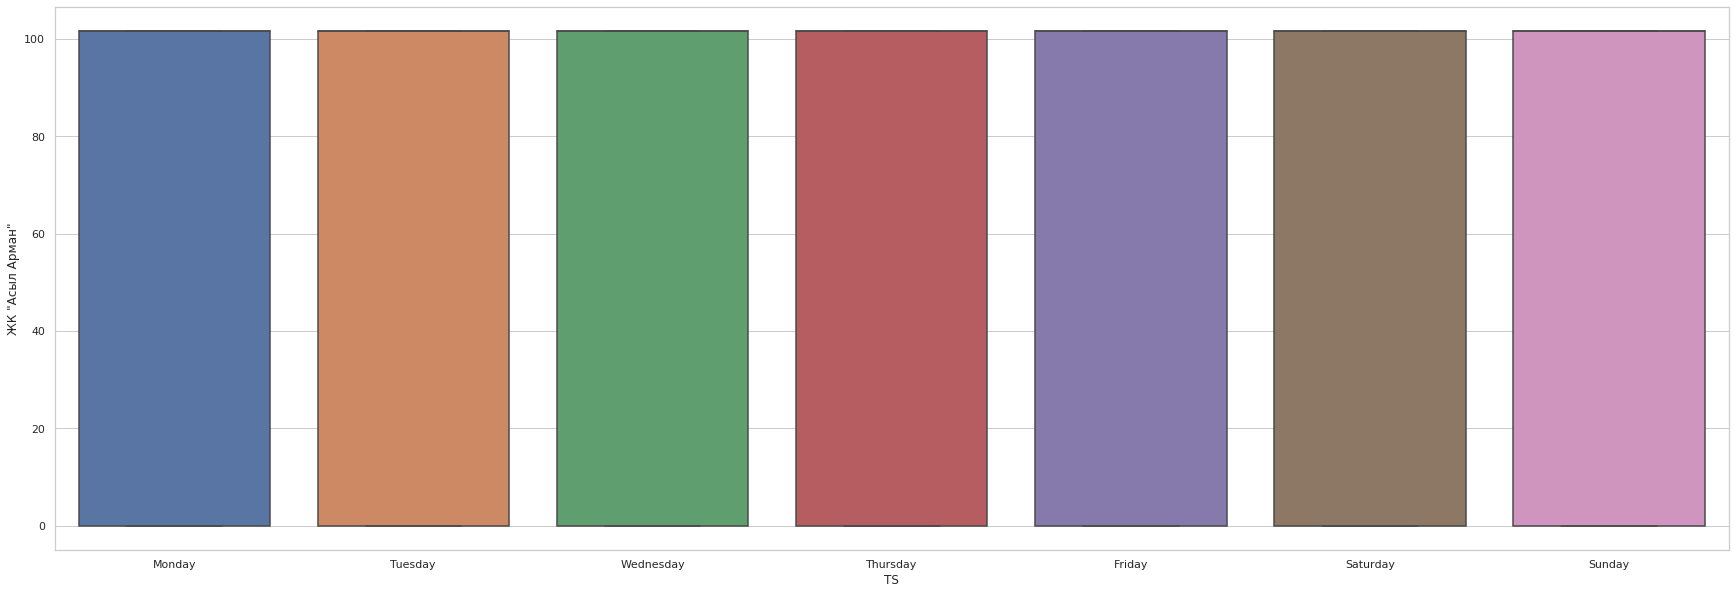

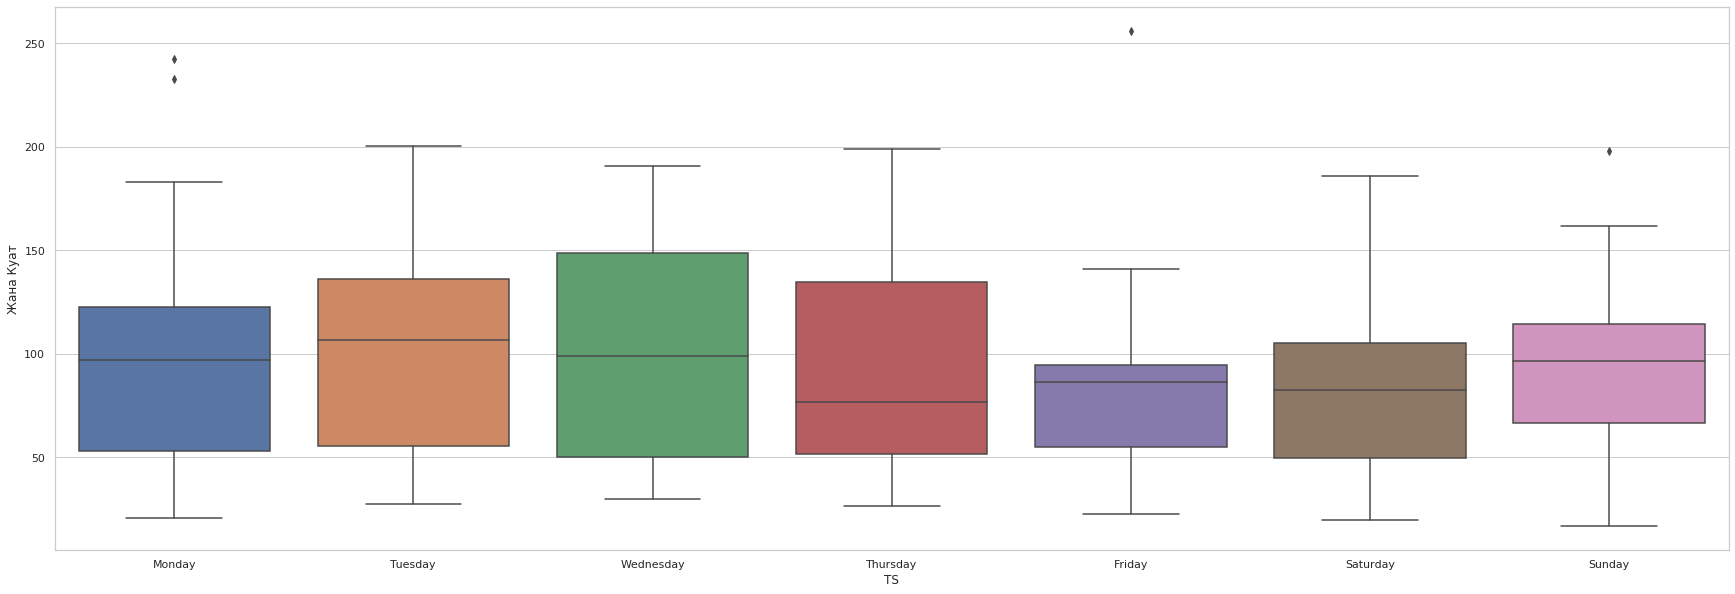

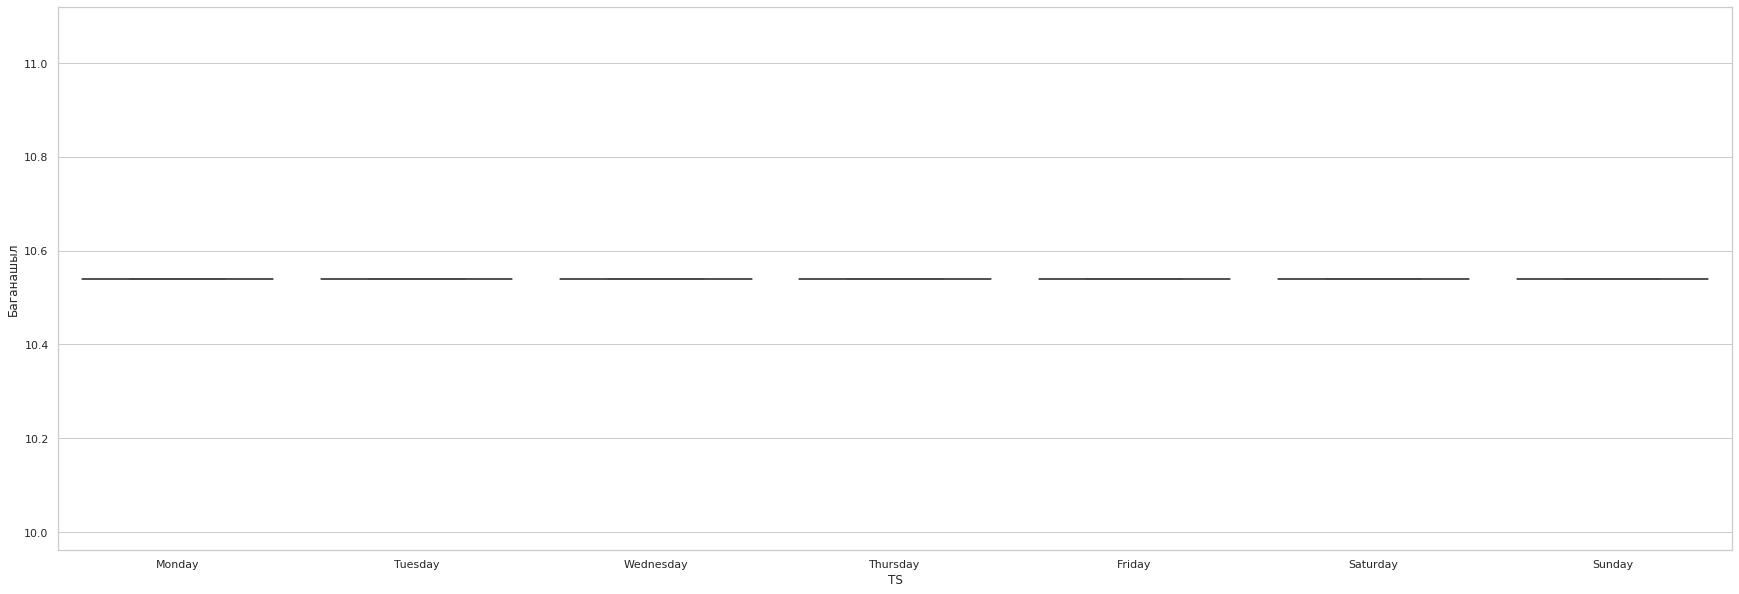

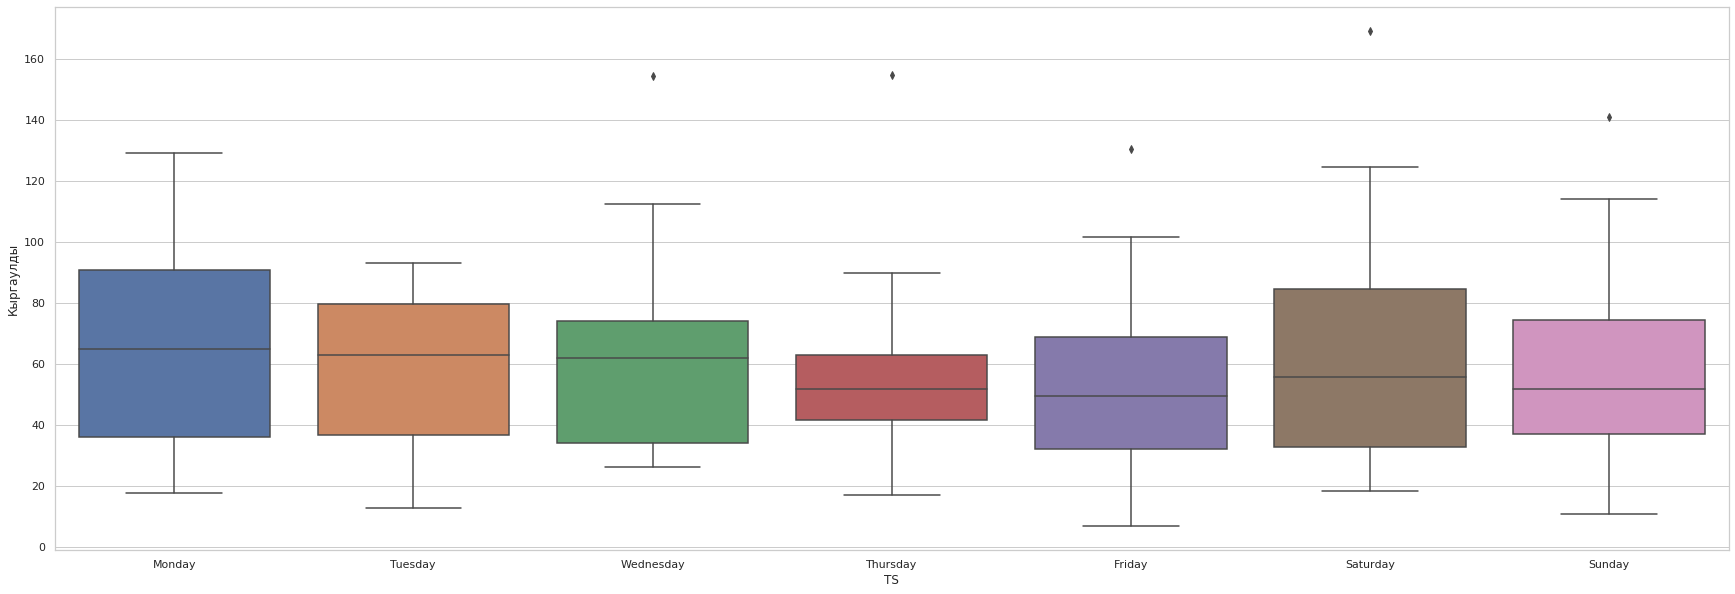

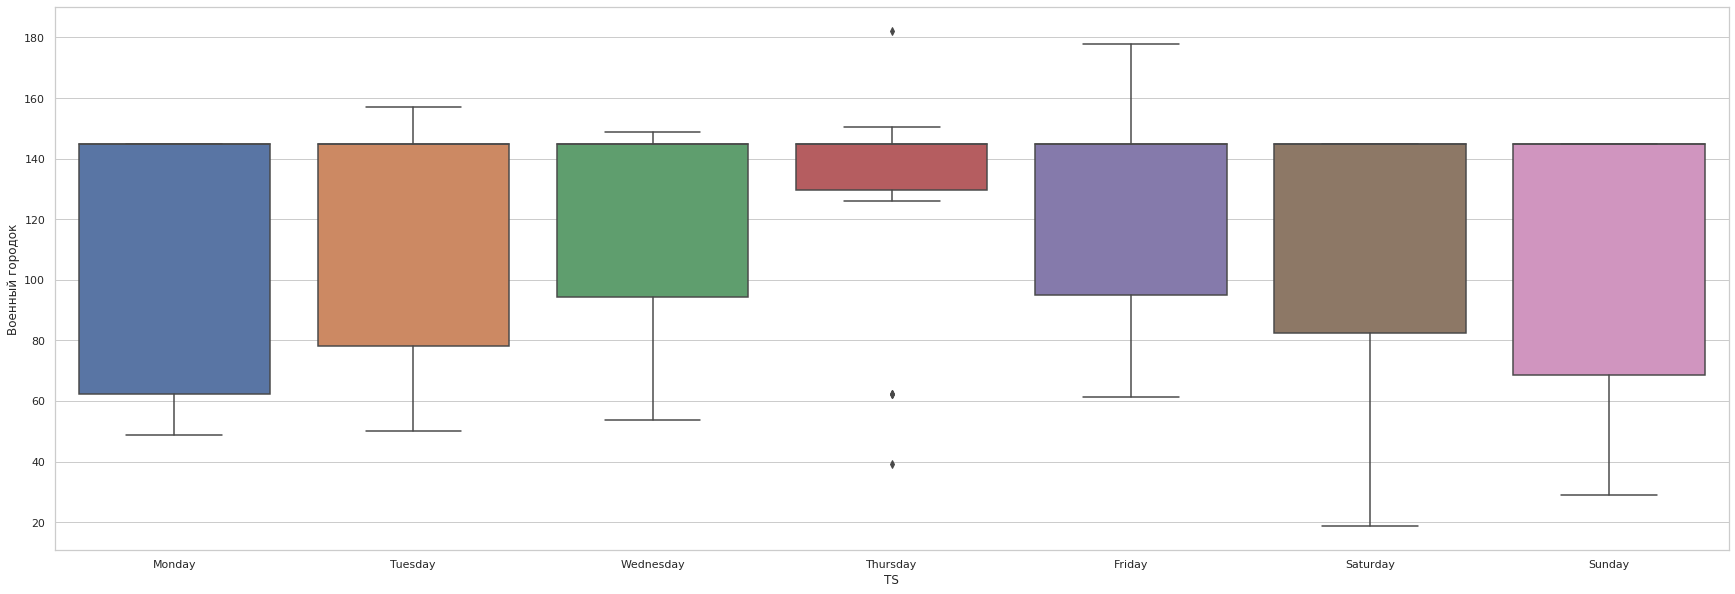

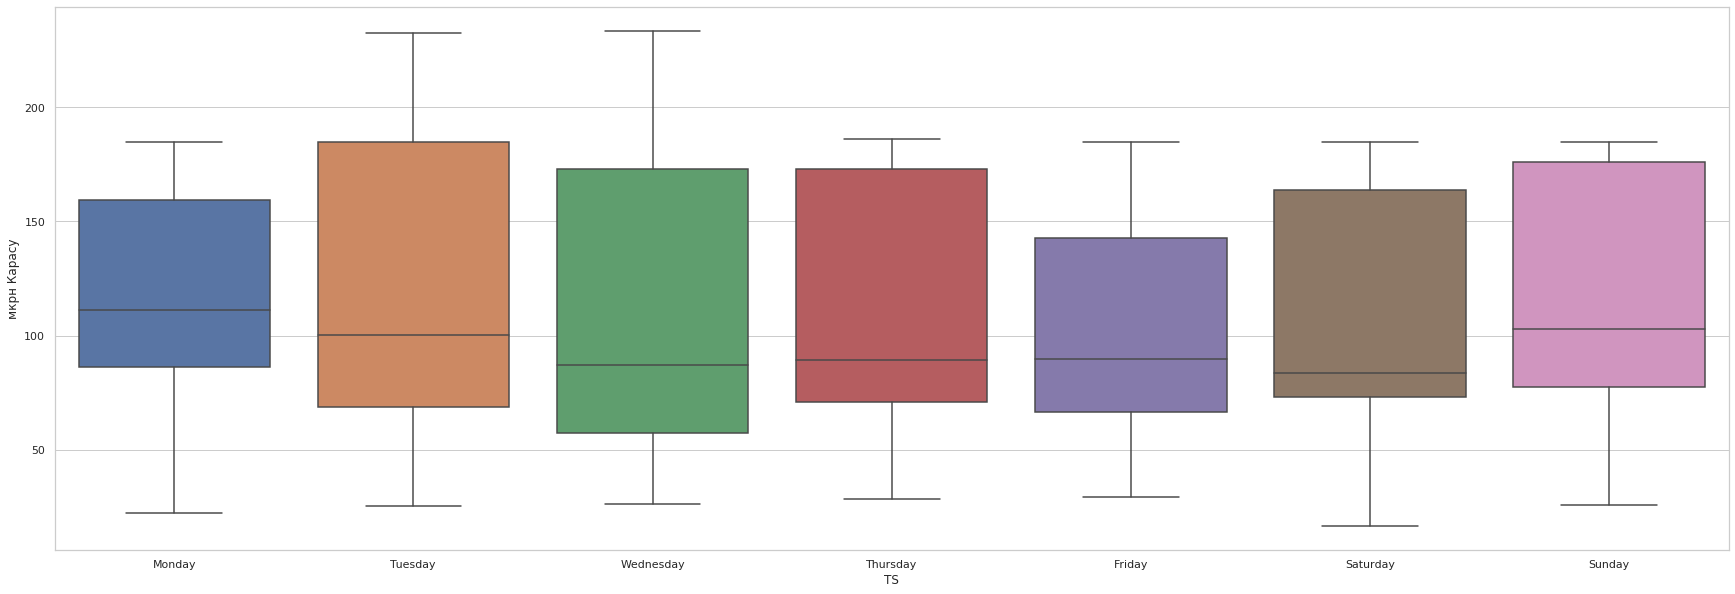

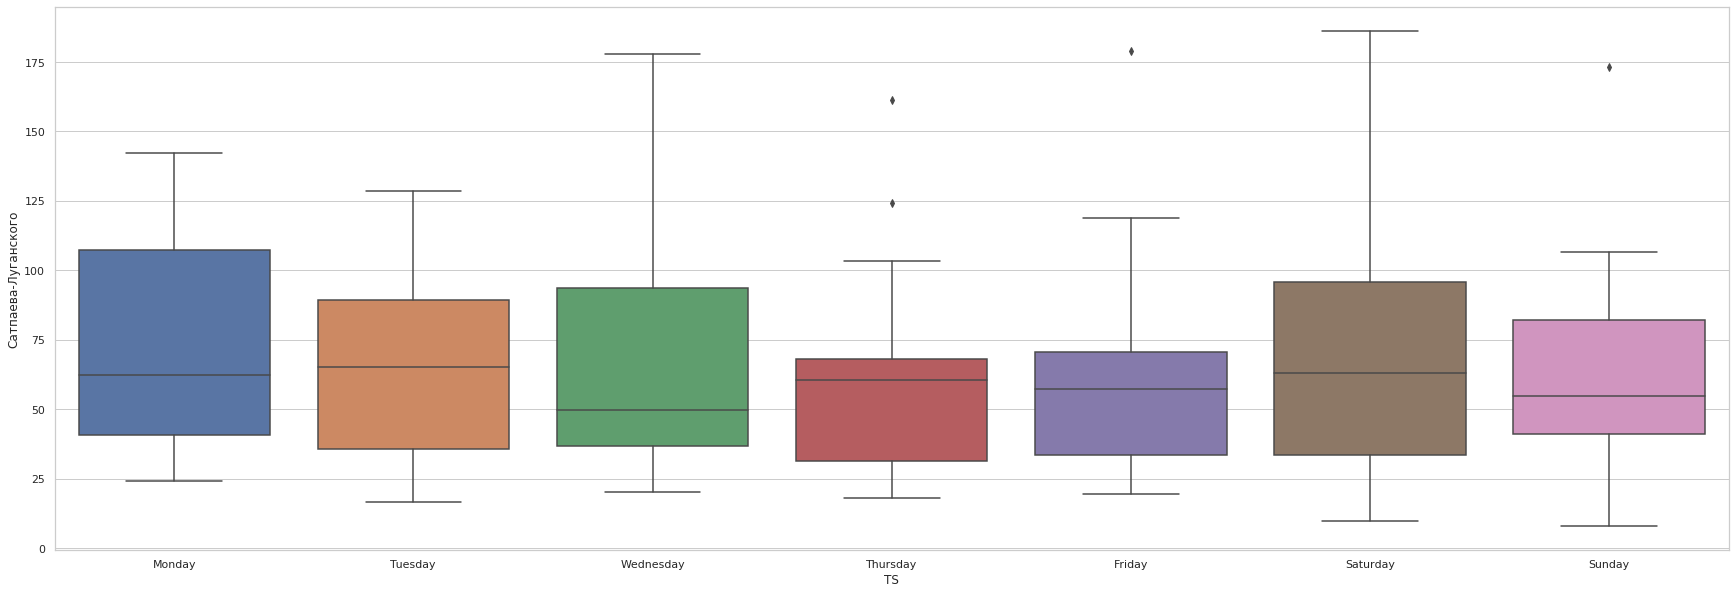

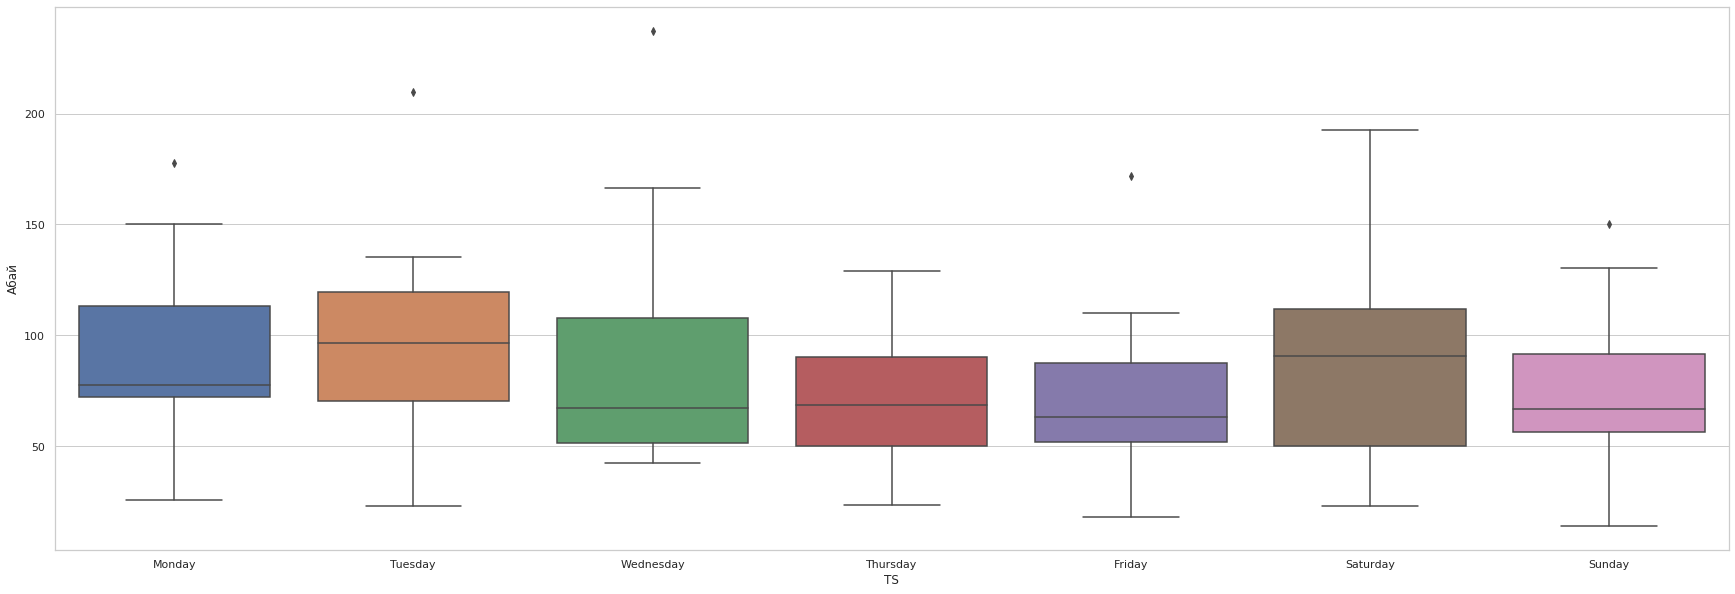

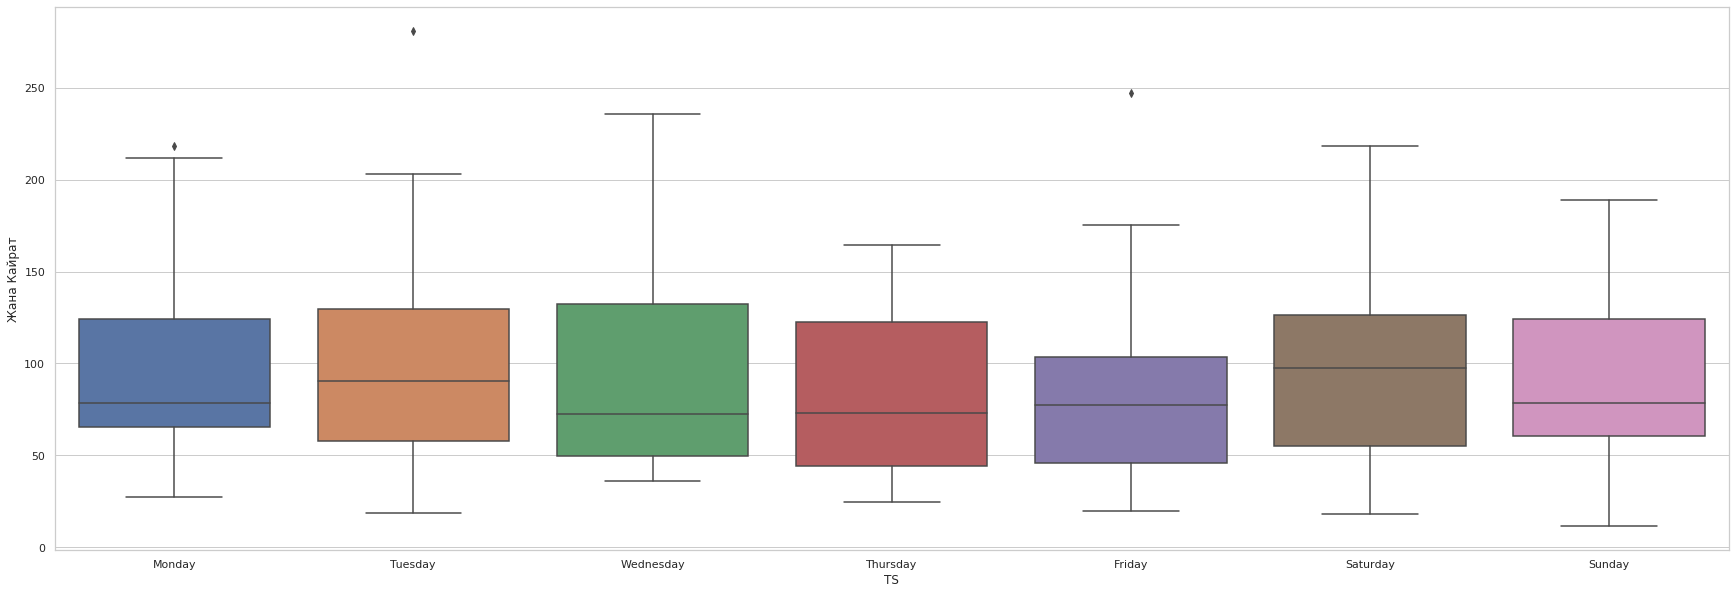

In [51]:
for key in sums:
    fig, ax = plt.subplots(figsize=(30,10))
    sns.boxplot(data2018.index.day_name(), data2018[key], ax=ax)

In [0]:
data012019 = data_ts[((data_ts.index.year == 2019)&(data_ts.index.month==1)&(data_ts.index.day>=1)) \
        |((data_ts.index.year == 2019)&(data_ts.index.month==1)&(data_ts.index.day<=31))]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

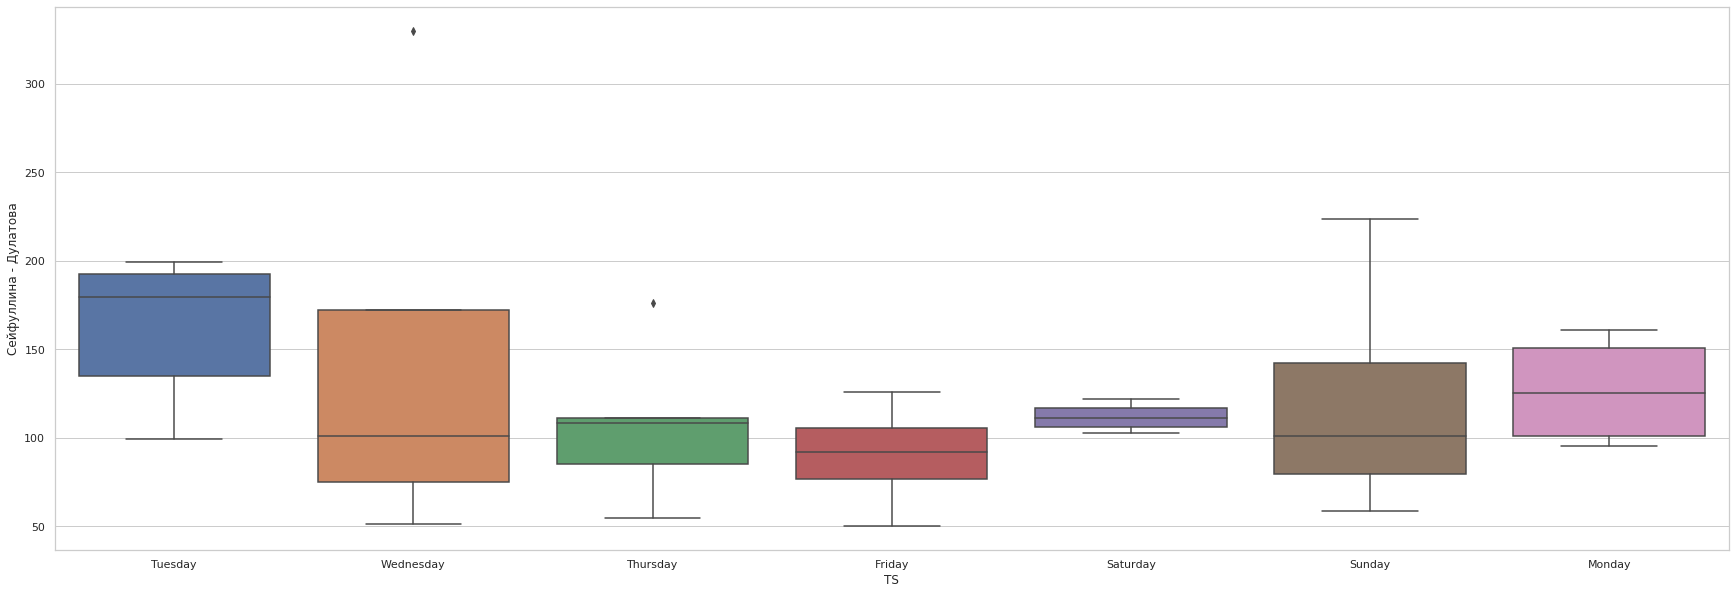

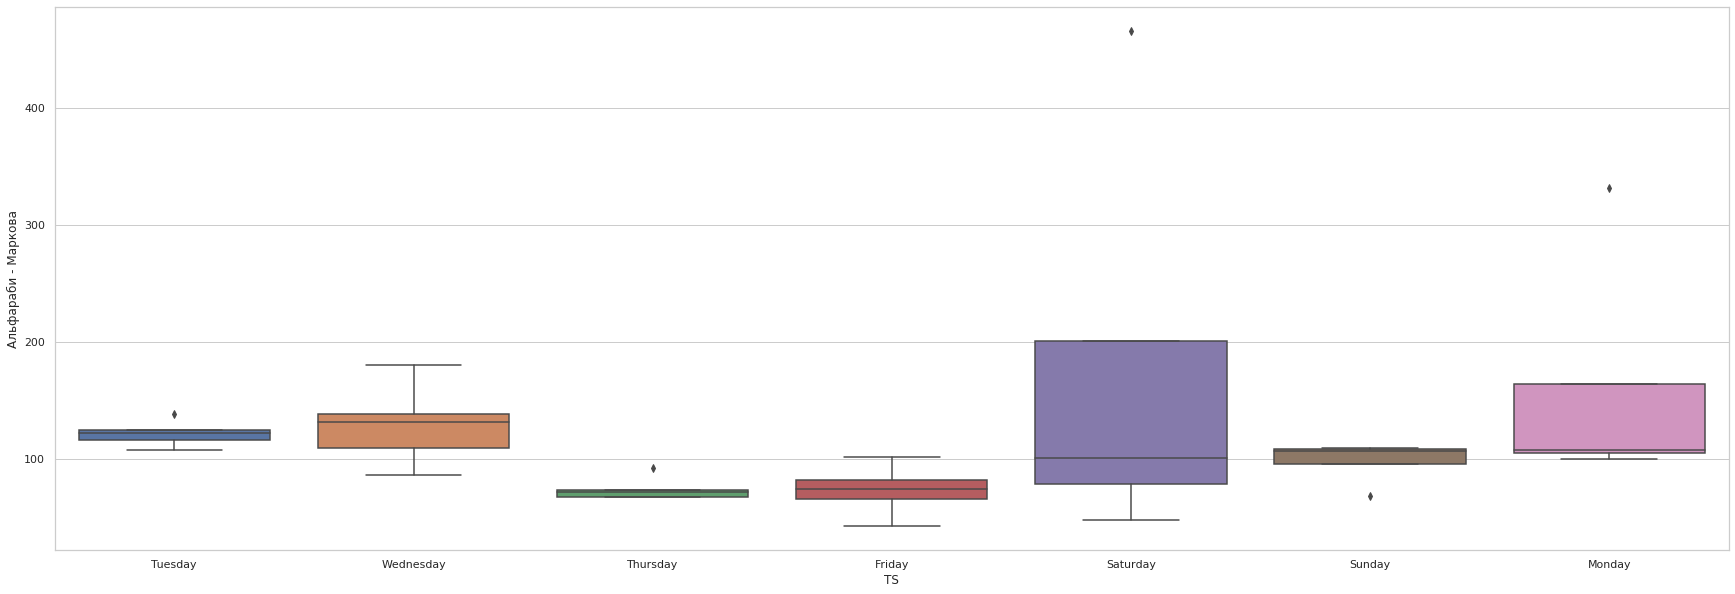

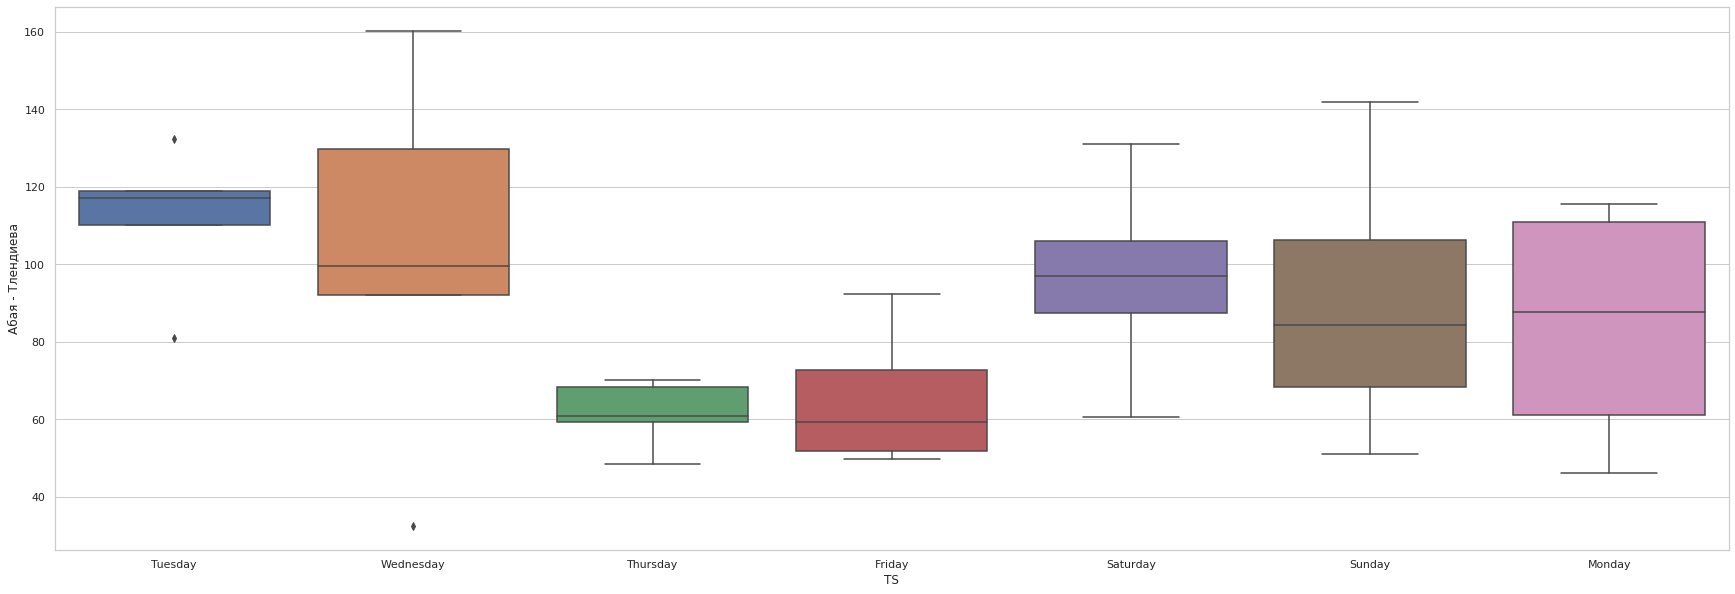

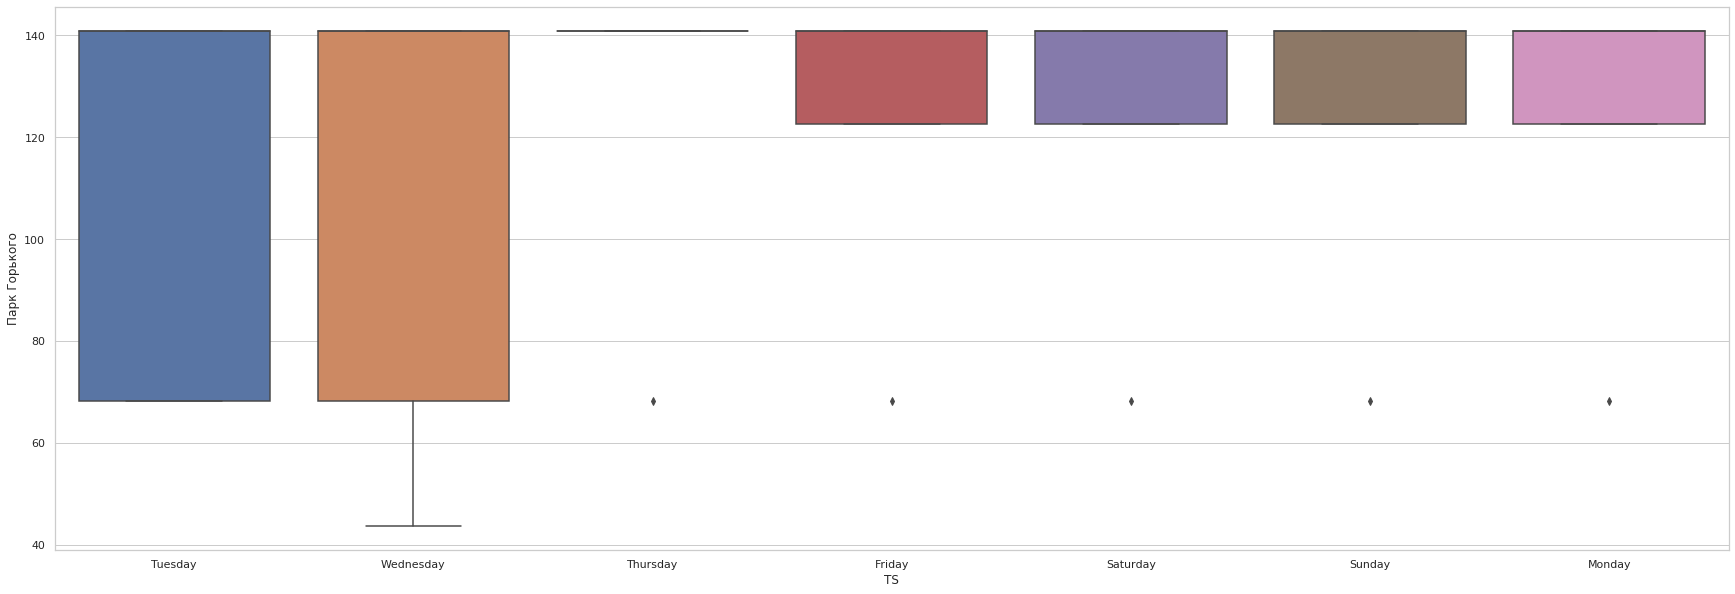

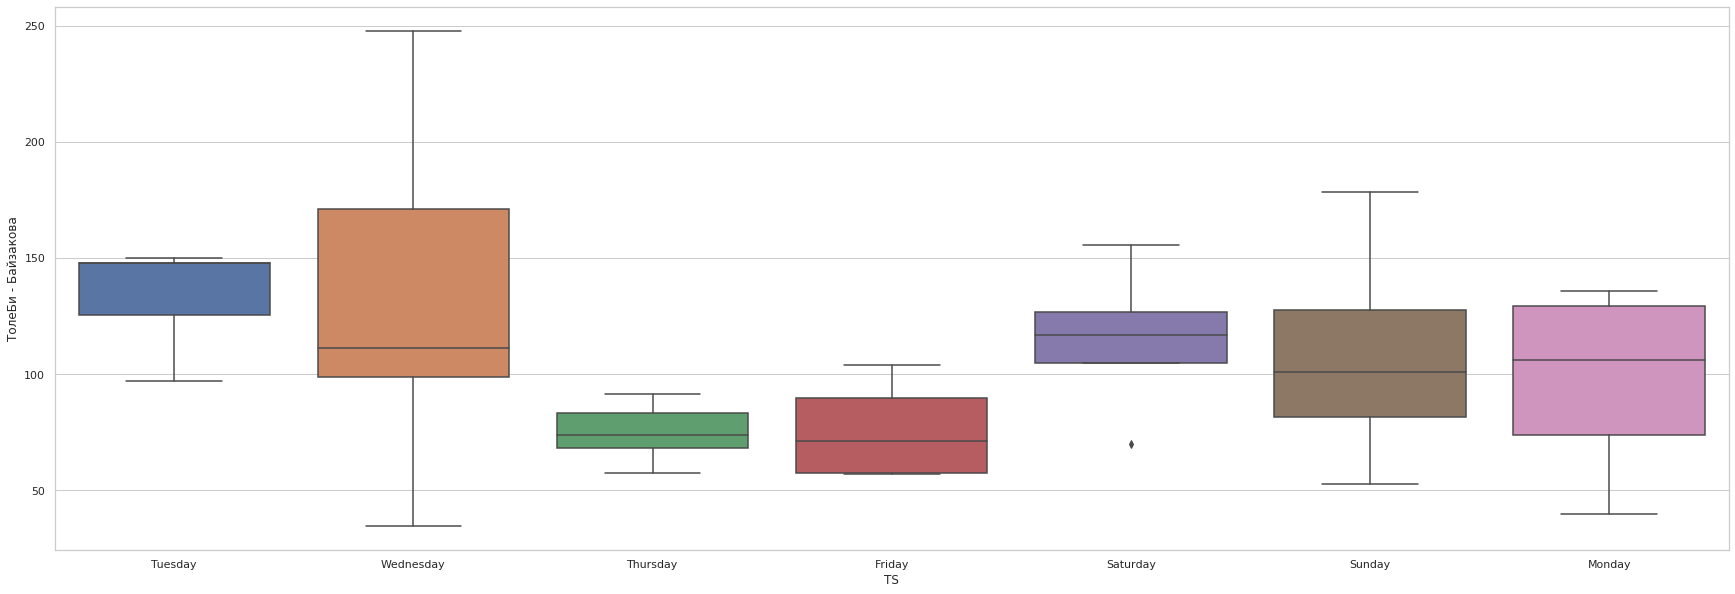

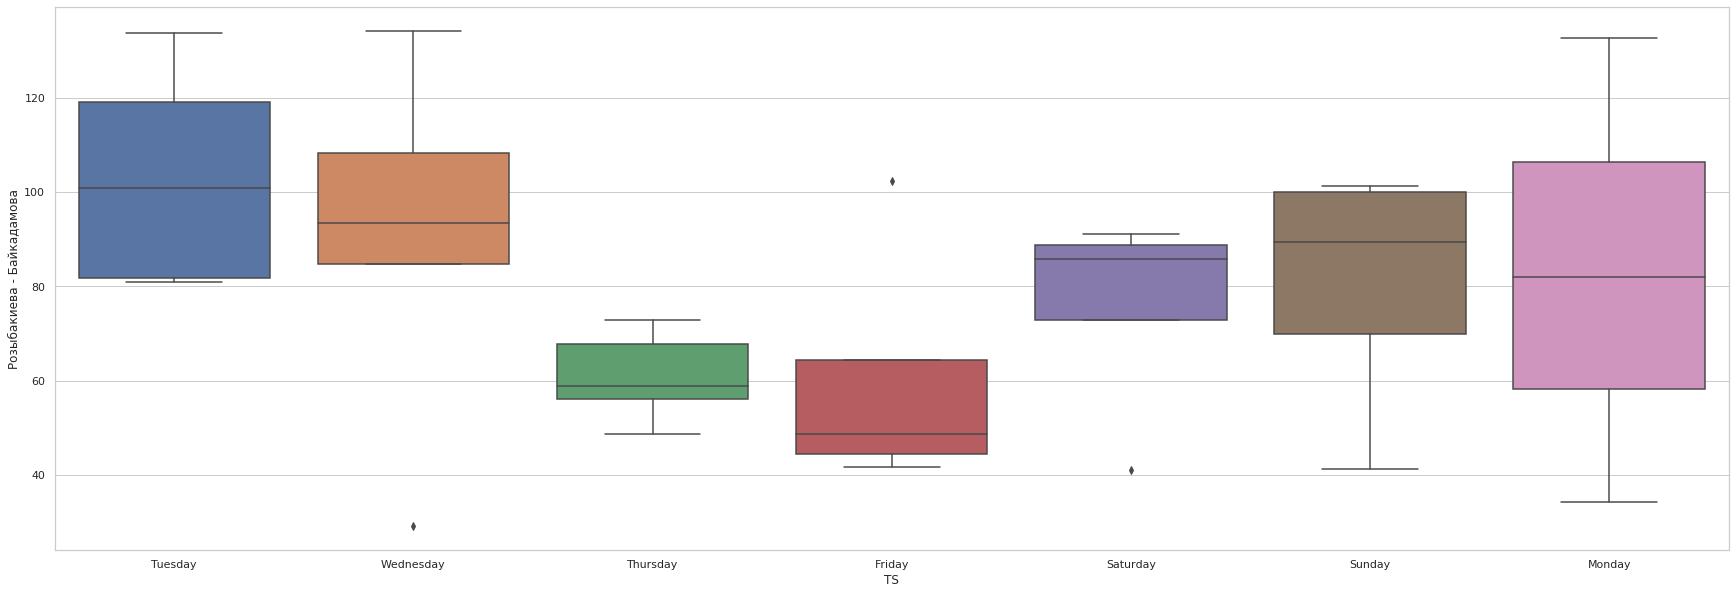

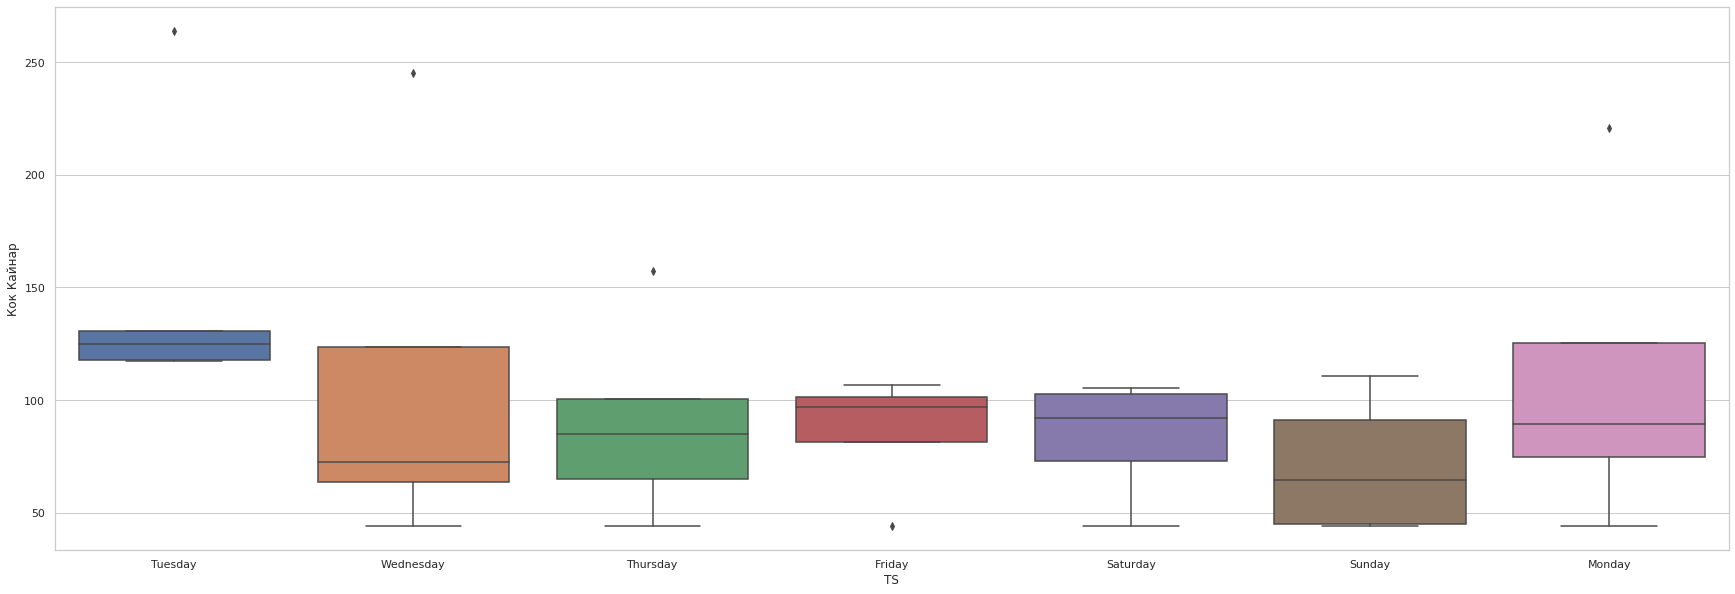

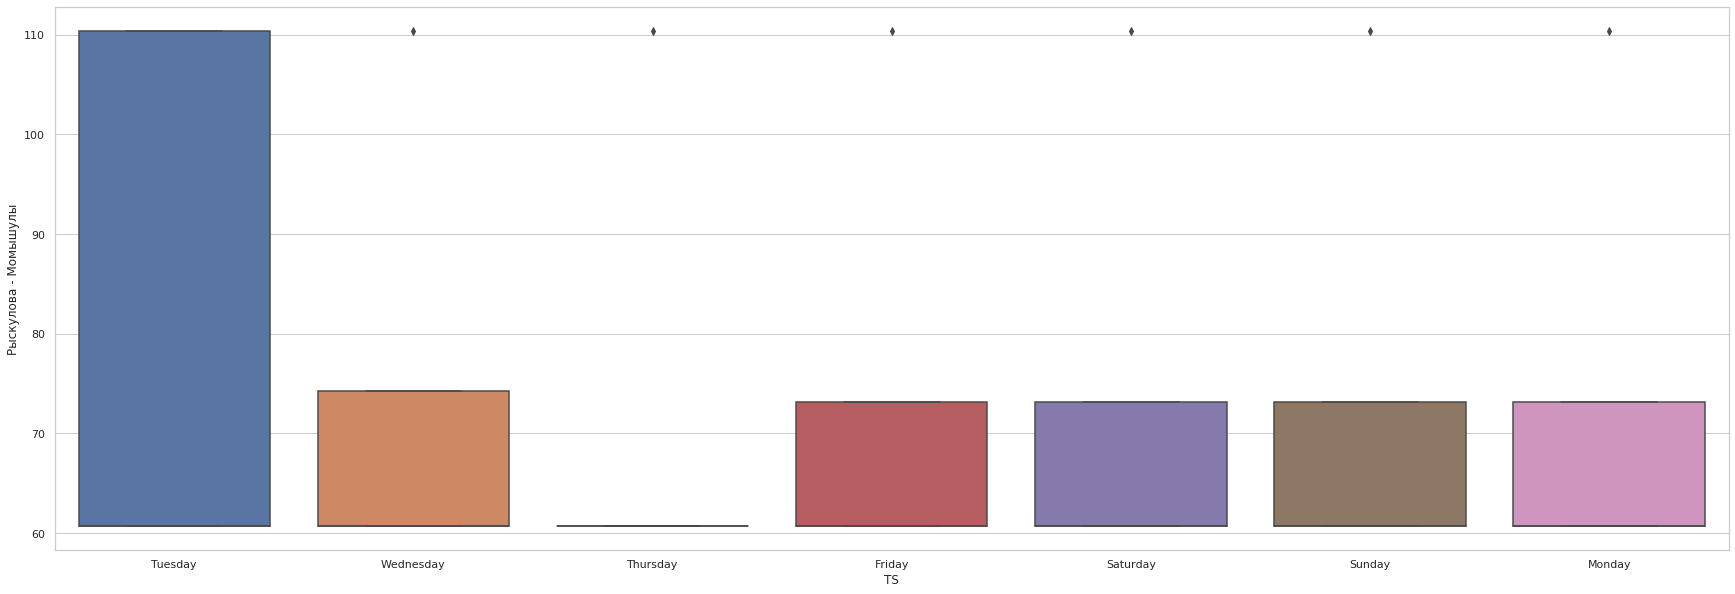

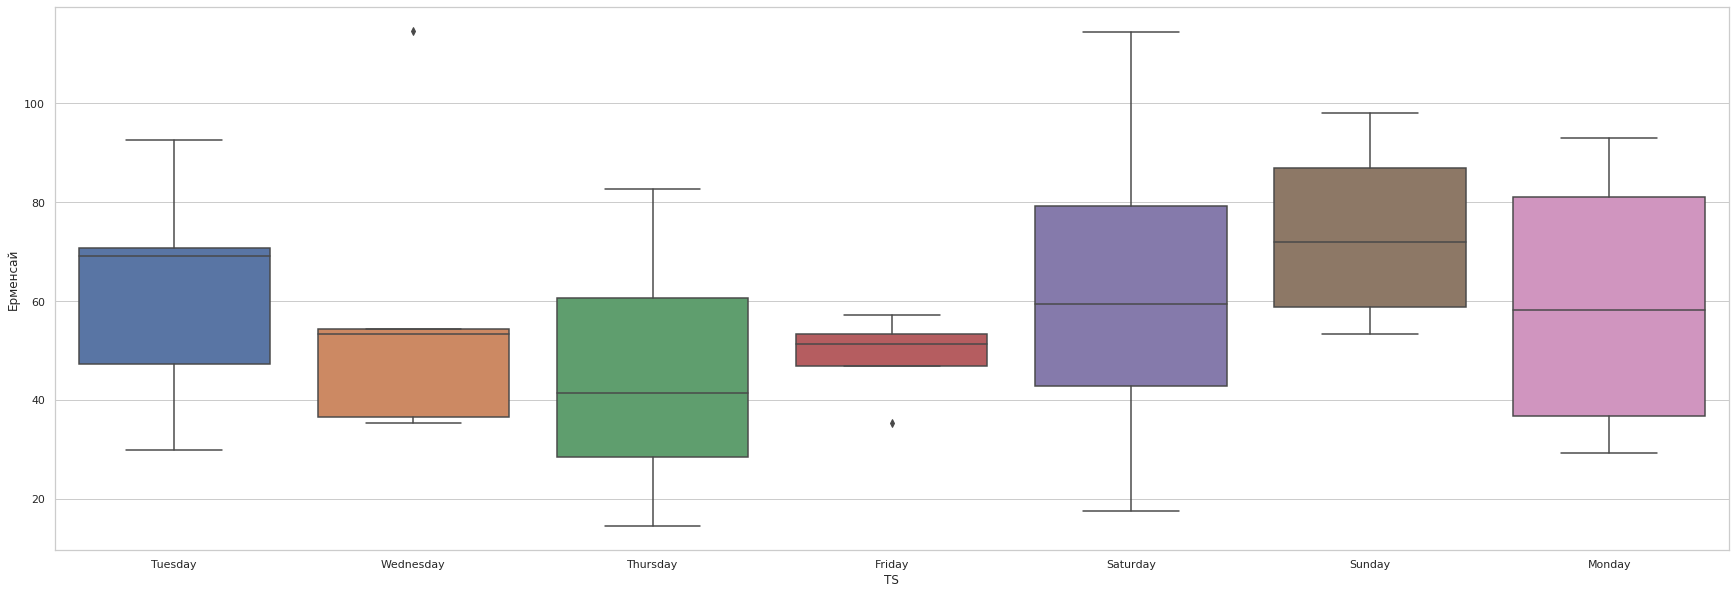

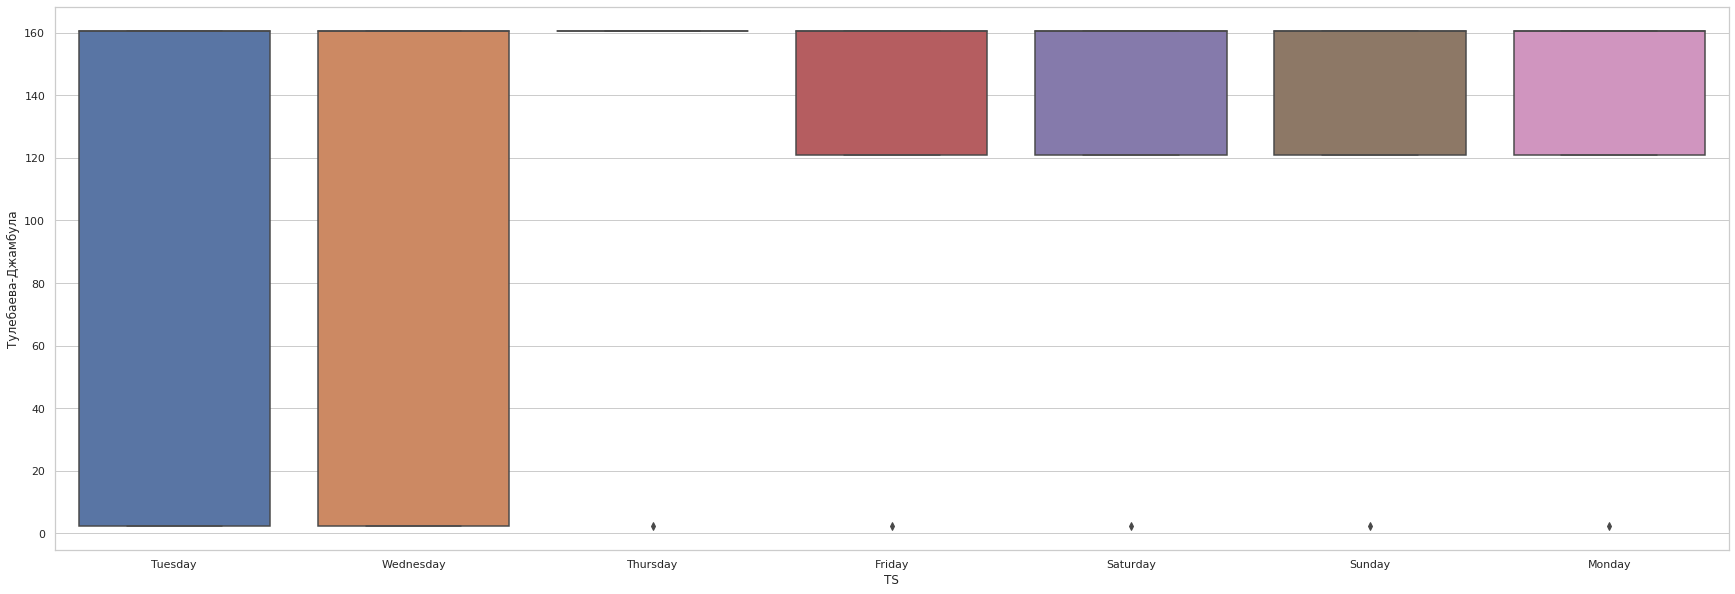

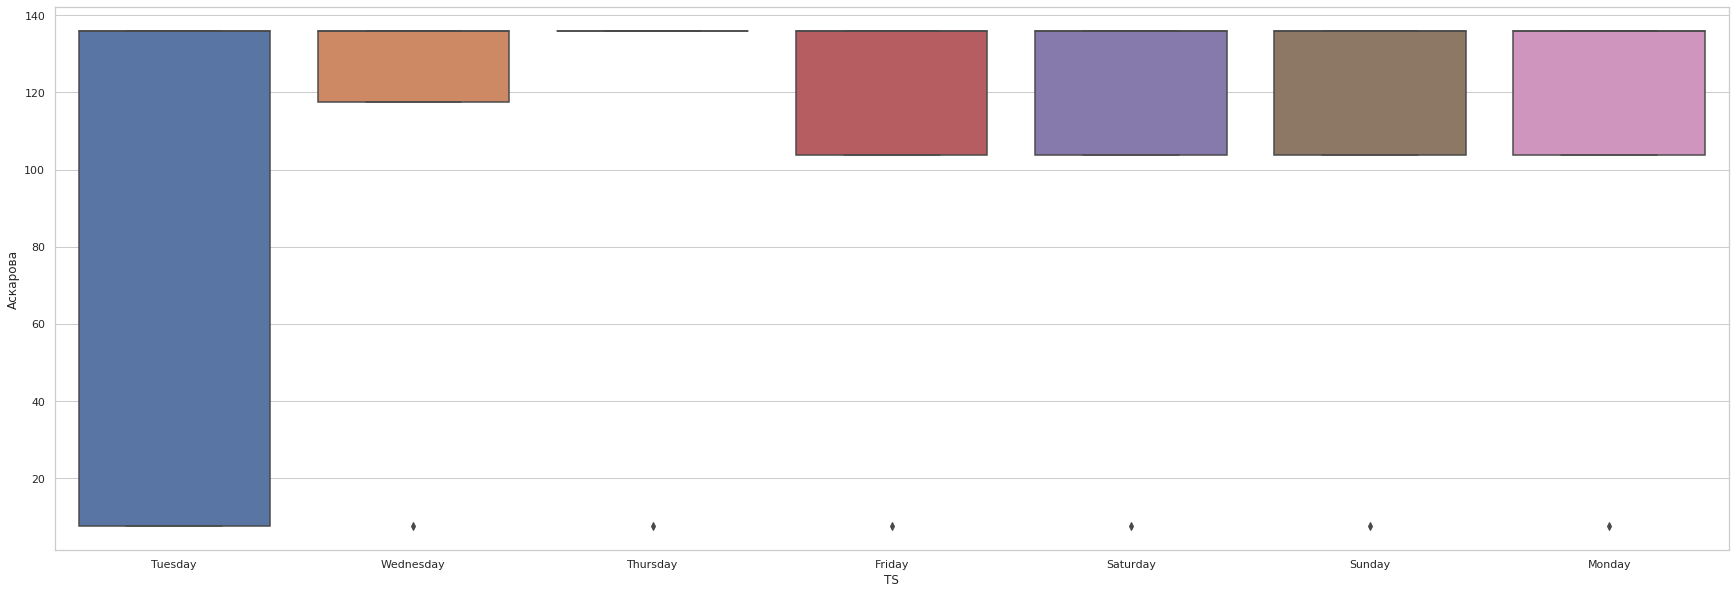

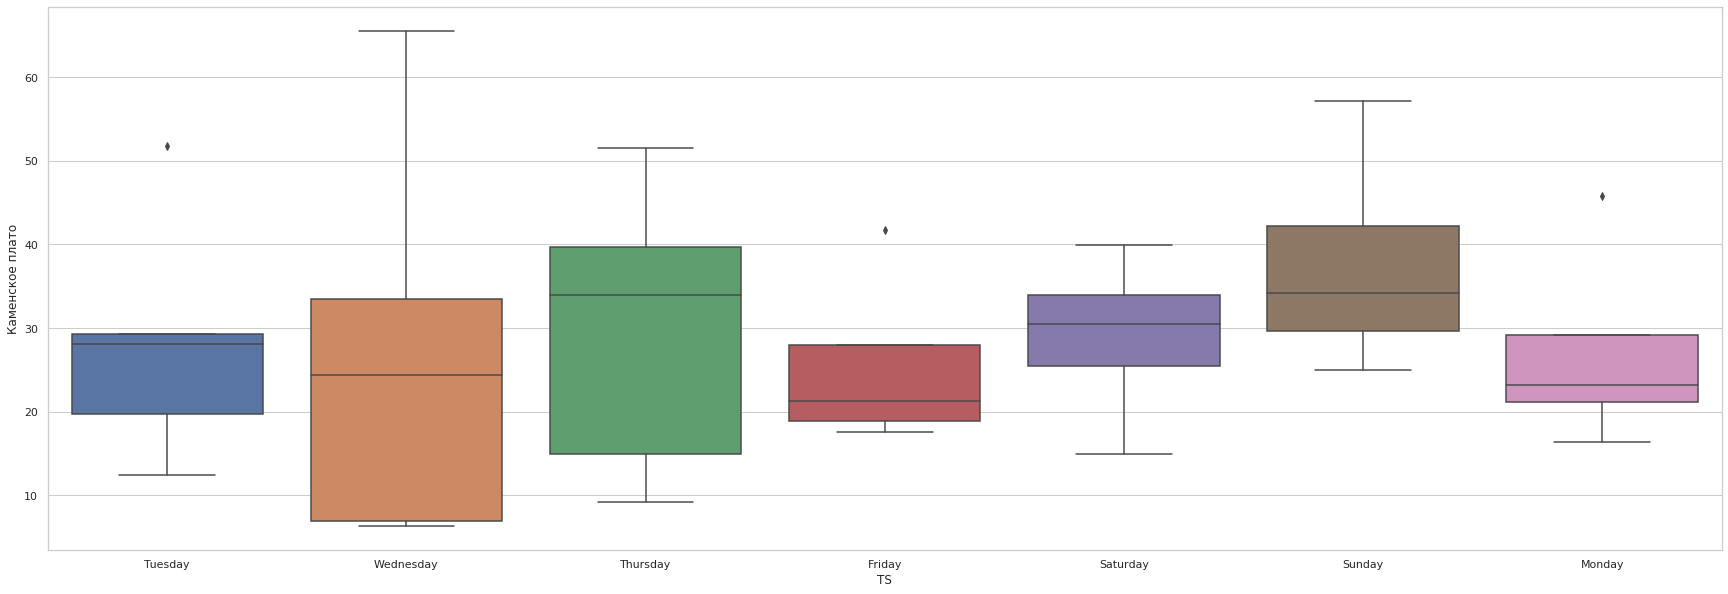

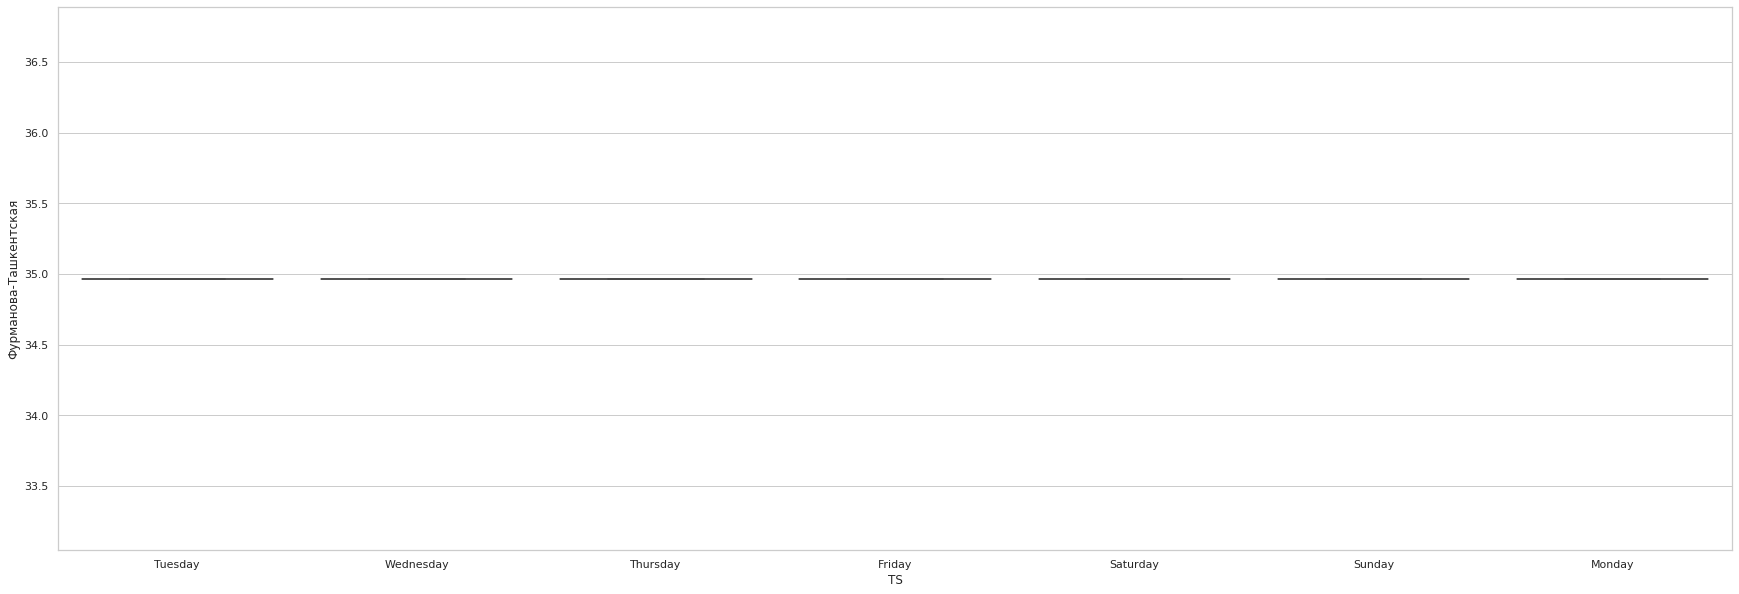

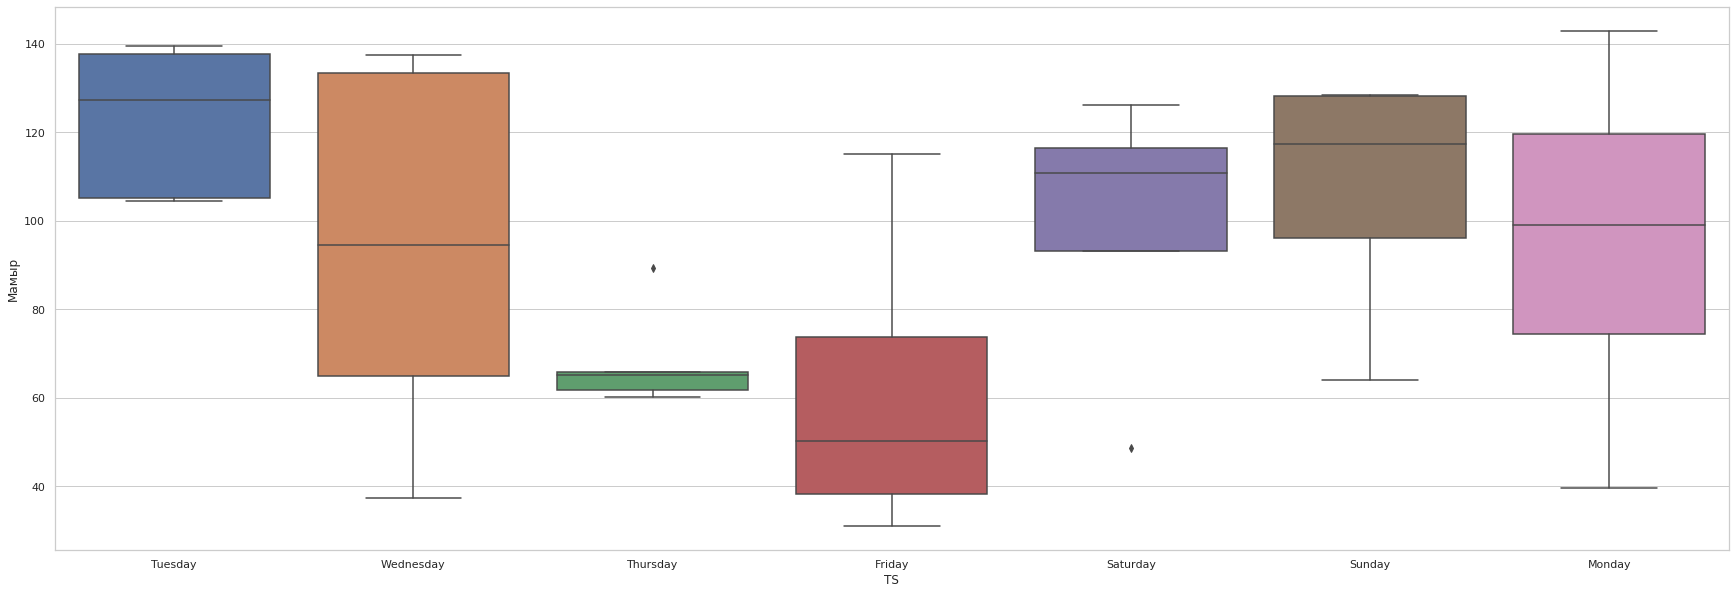

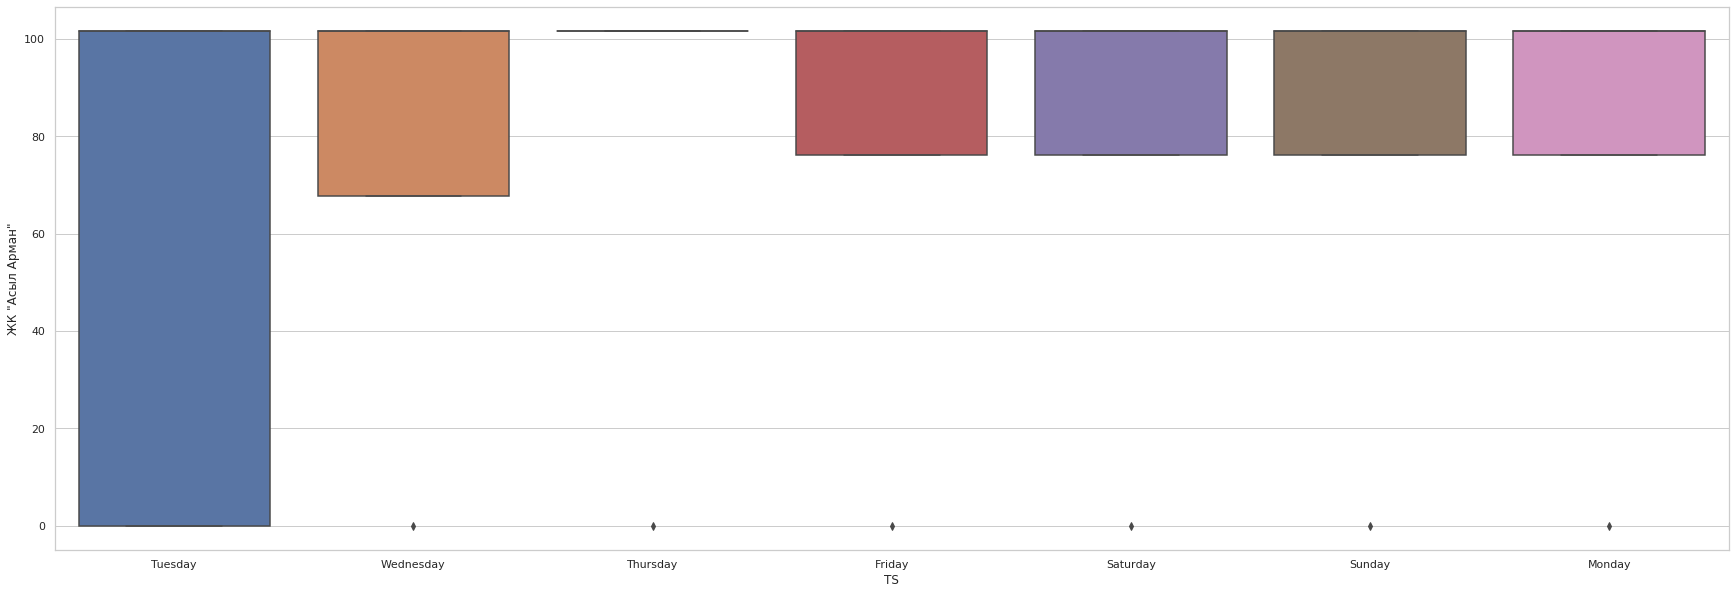

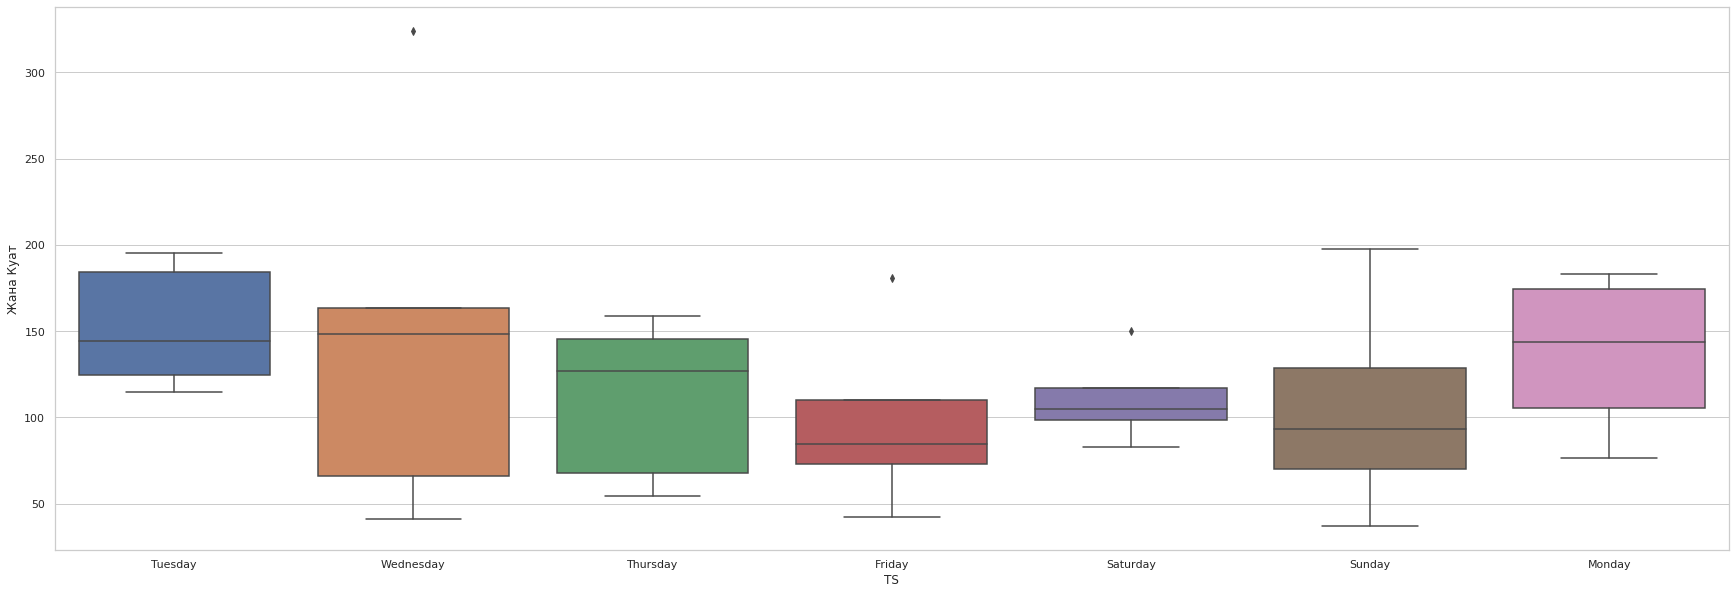

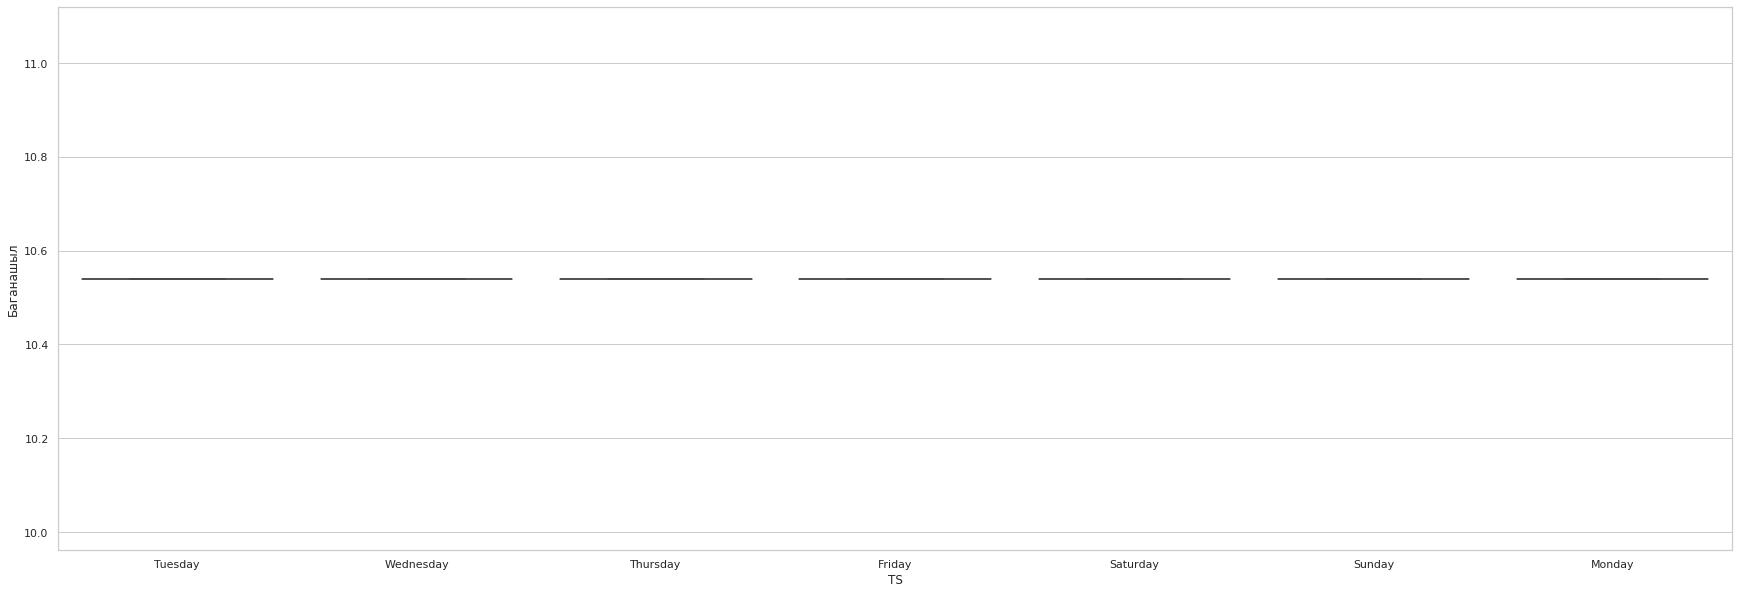

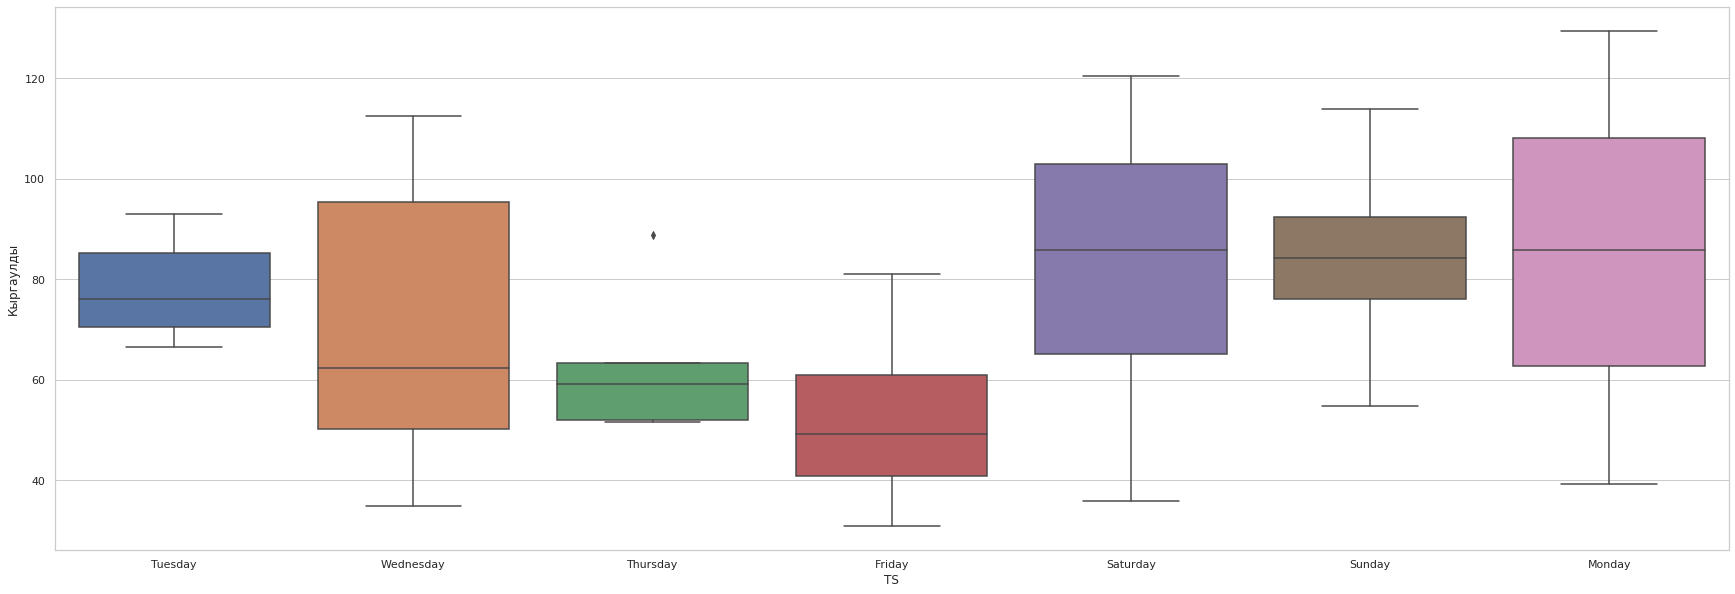

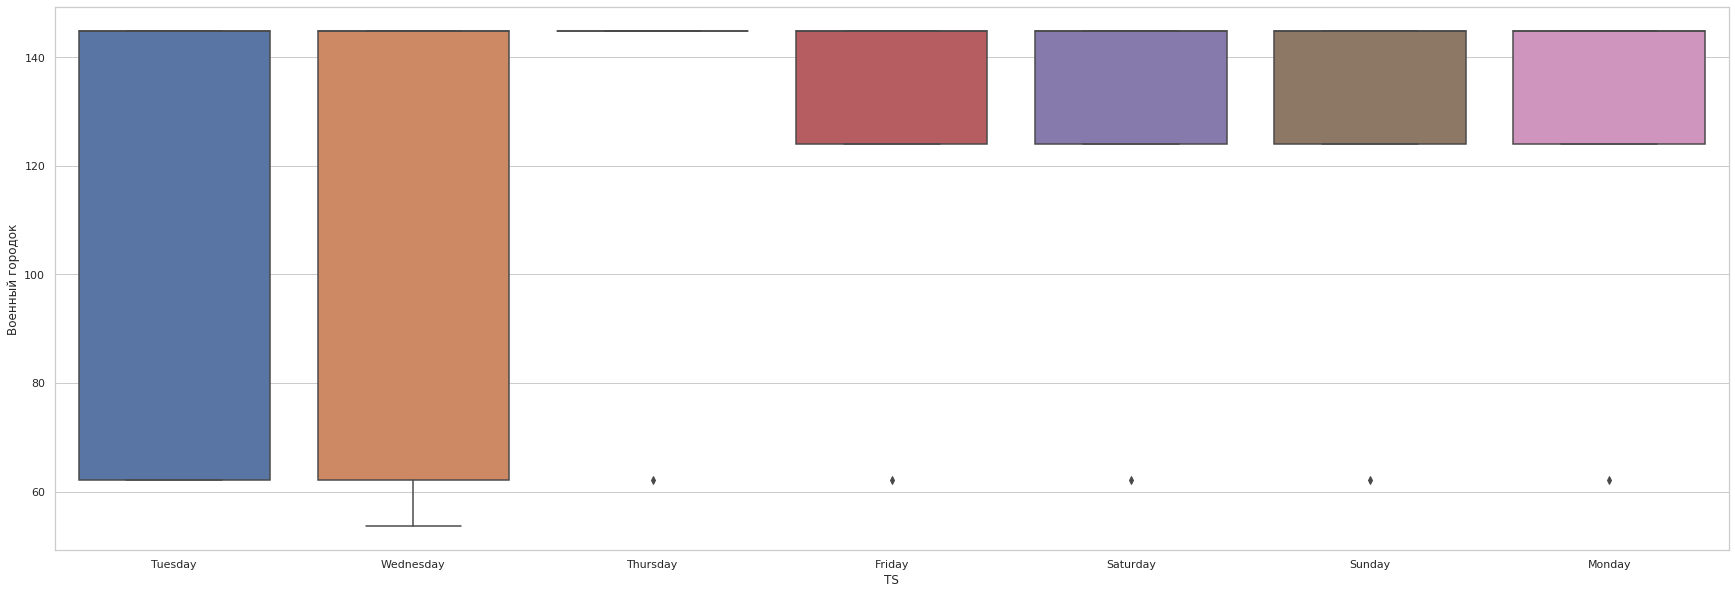

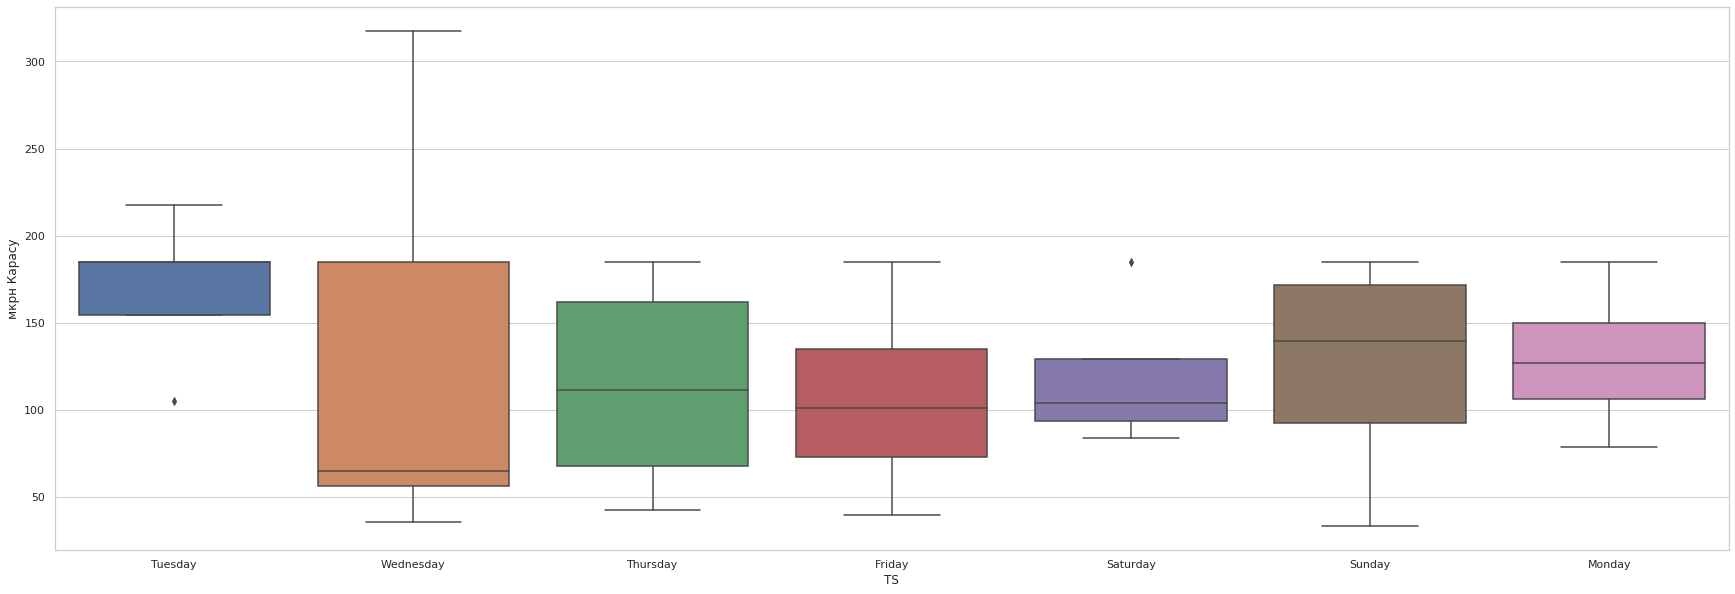

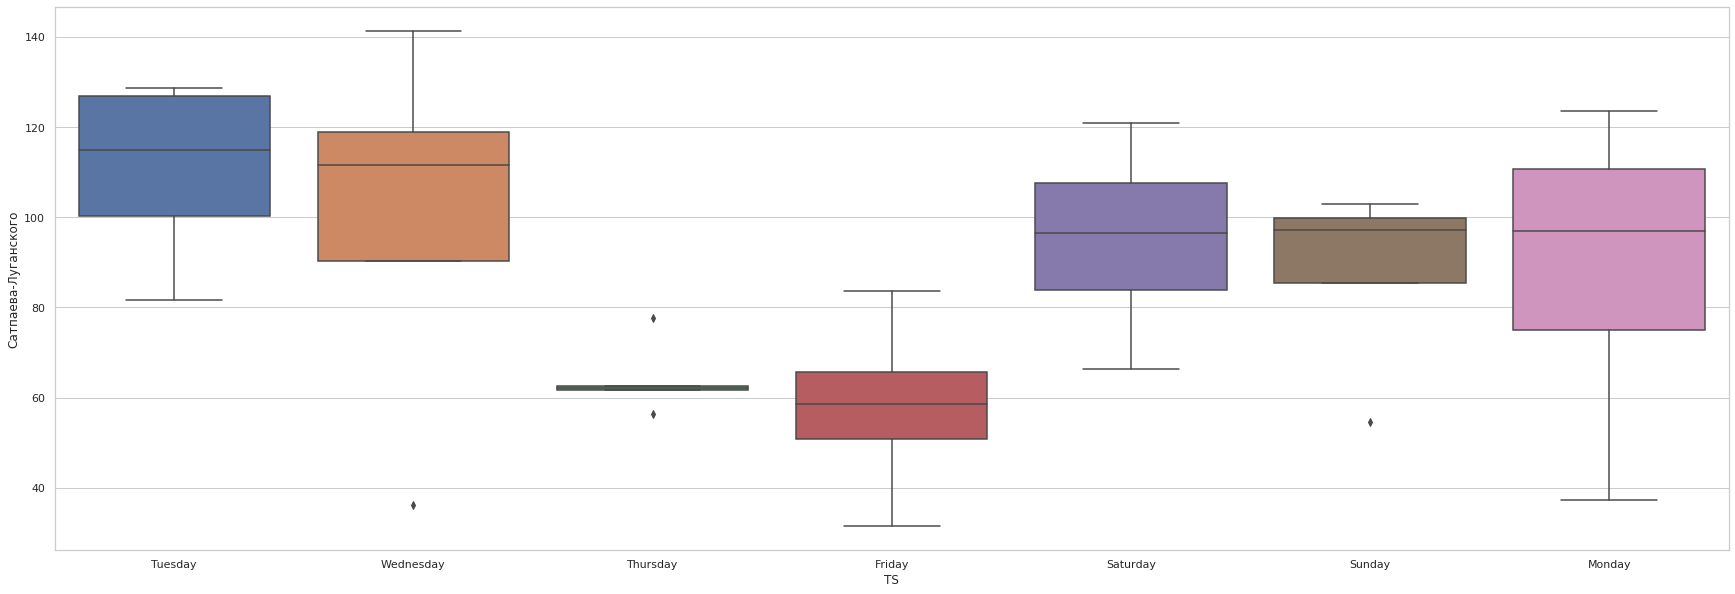

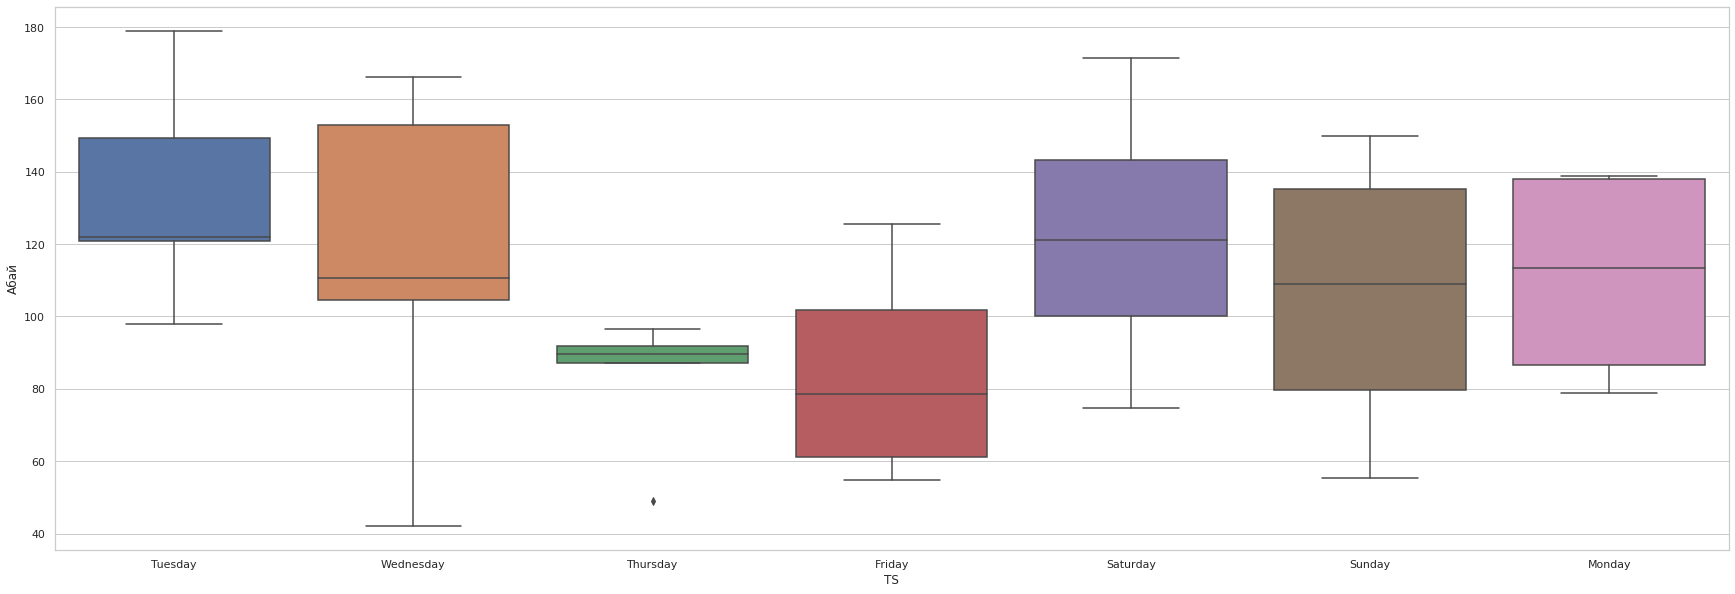

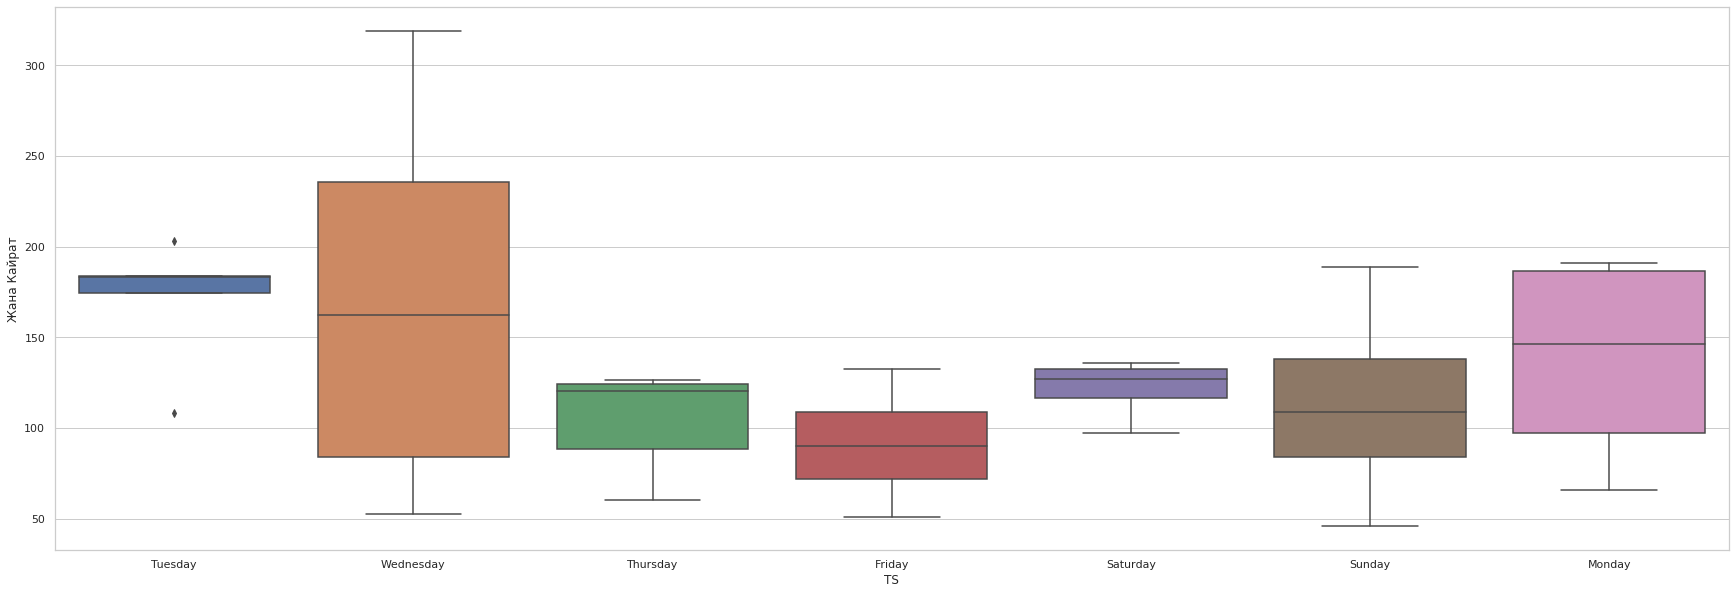

In [53]:
for key in sums:
    fig, ax = plt.subplots(figsize=(30,10))
    sns.boxplot(data012019.index.day_name(), data012019[key], ax=ax)

In [54]:
data012019['mean'] = data012019.mean(axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
data012019.tail(2)

Сейфуллина - Дулатова  Альфараби - Маркова  ...  Жана Кайрат        mean
TS                                                      ...                         
2019-01-30             329.583333           109.678596  ...   318.668539  147.098449
2019-01-31             175.992350            67.245112  ...   126.613343   95.719158

[2 rows x 24 columns]

In [0]:
from fbprophet import Prophet

In [0]:
data_ts['mean'] = data_ts.mean(axis=1)

In [58]:
data2018['mean'] = data2018.mean(axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
df_pr = data_ts.reset_index()[['TS', 'mean']]
#df_pr = data2018.reset_index()[['TS', 'mean']]
df_pr.columns = ['ds', 'y']
train_df = df_pr[:].copy()

In [60]:
df_pr.tail(2)

ds          y
966 2019-11-13  96.809901
967 2019-11-14  89.750605

In [61]:
df_pr.shape

(968, 2)

In [0]:
def fit_predict_model(train_dataset, interval_width = 0.99, changepoint_range = 0.8):
    m = Prophet(daily_seasonality = False, yearly_seasonality = True, weekly_seasonality = False,
                seasonality_mode = 'multiplicative', 
                interval_width = interval_width,
                changepoint_range = changepoint_range)
    m = m.fit(train_dataset)
    forecast = m.predict(train_dataset)
    forecast['fact'] = train_dataset['y'].reset_index(drop = True)
    return forecast

In [0]:
def detect_anomalies(forecast):
    forecasted = forecast[['ds','trend', 'yhat', 'yhat_lower', 'yhat_upper', 'fact']].copy()
    #forecast['fact'] = df['y']    forecasted['anomaly'] = 0
    forecasted.loc[forecasted['fact'] > forecasted['yhat_upper'], 'anomaly'] = 1
    forecasted.loc[forecasted['fact'] < forecasted['yhat_lower'], 'anomaly'] = -1    #anomaly importances
    forecasted['importance'] = 0
    forecasted.loc[forecasted['anomaly'] ==1, 'importance'] = \
        (forecasted['fact'] - forecasted['yhat_upper'])/forecast['fact']
    forecasted.loc[forecasted['anomaly'] ==-1, 'importance'] = \
        (forecasted['yhat_lower'] - forecasted['fact'])/forecast['fact']
    
    return forecasted

In [0]:
pred = fit_predict_model(train_df)

In [77]:
pred = detect_anomalies(pred)
pred

ds      trend       yhat  ...       fact  anomaly  importance
0   2017-03-22  24.330616  24.333477  ...  30.928116      NaN         0.0
1   2017-03-23  24.420005  24.222658  ...  30.609259      NaN         0.0
2   2017-03-24  24.509394  24.122168  ...  28.827796      NaN         0.0
3   2017-03-25  24.598782  24.030831  ...  23.362090      NaN         0.0
4   2017-03-26  24.688171  23.947202  ...  21.955901      NaN         0.0
..         ...        ...        ...  ...        ...      ...         ...
963 2019-11-10  80.864500  90.463881  ...  78.925567      NaN         0.0
964 2019-11-11  80.942736  92.352663  ...  62.687176      NaN         0.0
965 2019-11-12  81.020973  94.307406  ...  62.144576      NaN         0.0
966 2019-11-13  81.099209  96.322000  ...  96.809901      NaN         0.0
967 2019-11-14  81.177445  98.389654  ...  89.750605      NaN         0.0

[968 rows x 8 columns]

In [0]:
import altair as alt

In [0]:
def plot_anomalies(forecasted):
    interval = alt.Chart(forecasted).mark_area(interpolate="basis", color = '#7FC97F').encode(
    x=alt.X('ds:T',  title ='date'),
    y='yhat_upper',
    y2='yhat_lower',
    tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper']
    ).interactive().properties(
        title='Anomaly Detection'
    )    
    
    fact = alt.Chart(forecasted[forecasted.anomaly==0]).mark_circle(size=15, opacity=0.7, color = 'Black').encode(
        x='ds:T',
        y=alt.Y('fact', title='wind speed'),    
        tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper']
    ).interactive()    
    
    anomalies = alt.Chart(forecasted[forecasted.anomaly!=0]).mark_circle(size=30, color = 'Red').encode(
        x='ds:T',
        y=alt.Y('fact', title='wind speed'),    
        tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper'],
        size = alt.Size( 'importance', legend=None)
    ).interactive()    
    
    return alt.layer(interval, fact, anomalies)\
              .properties(width=870, height=450)\
              .configure_title(fontSize=20)

In [80]:
plot_anomalies(pred)

alt.LayerChart(...)

In [81]:
prophet_basic = Prophet()
prophet_basic.fit(train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [83]:
future= prophet_basic.make_future_dataframe(periods=365)
future.tail(5)

ds
1328 2020-11-09
1329 2020-11-10
1330 2020-11-11
1331 2020-11-12
1332 2020-11-13

In [0]:
forecast=prophet_basic.predict(future)

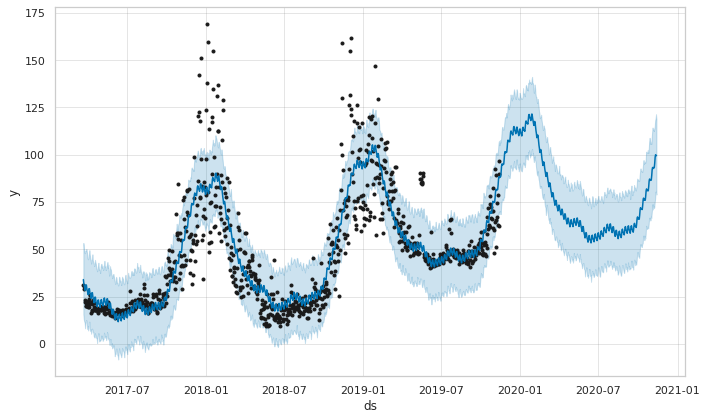

In [85]:
fig1 =prophet_basic.plot(forecast)

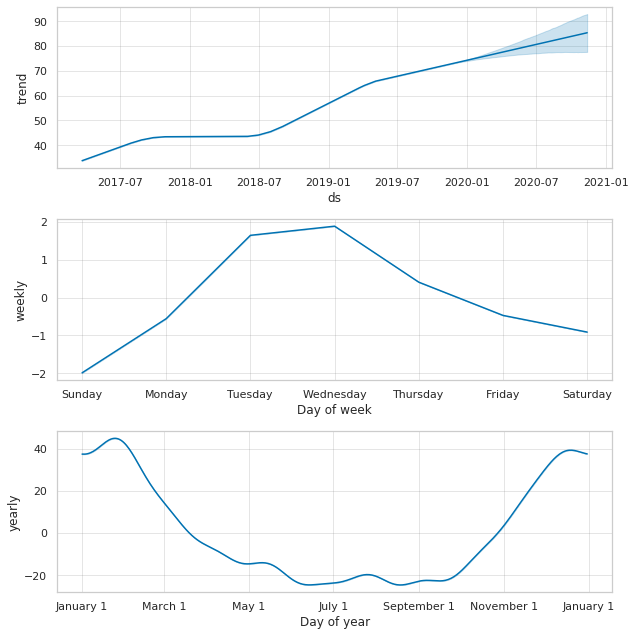

In [86]:
fig1 = prophet_basic.plot_components(forecast)

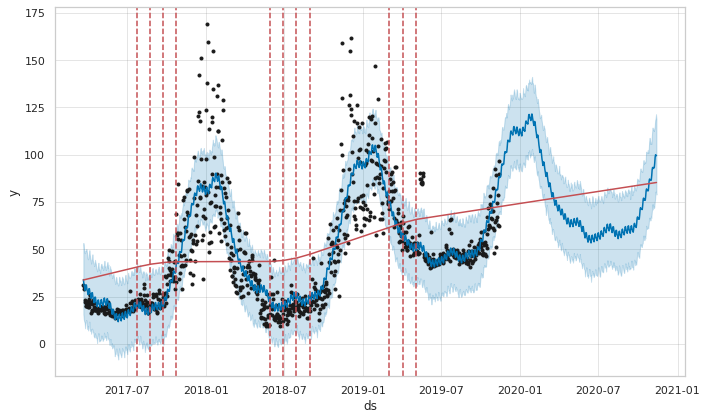

In [87]:
from fbprophet.plot import add_changepoints_to_plot
fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


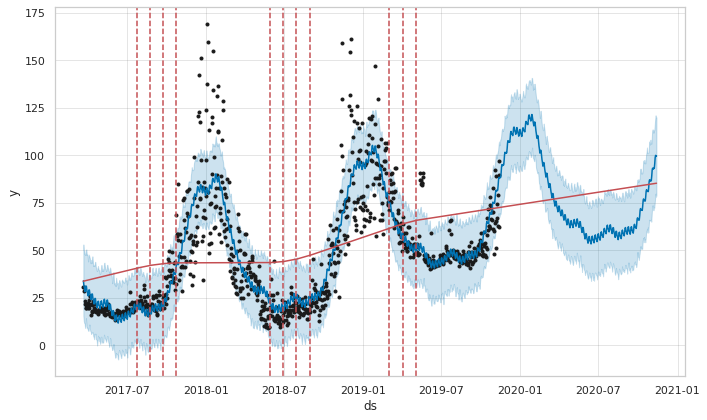

In [89]:
pro_change= Prophet(n_changepoints=25)
forecast = pro_change.fit(train_df).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

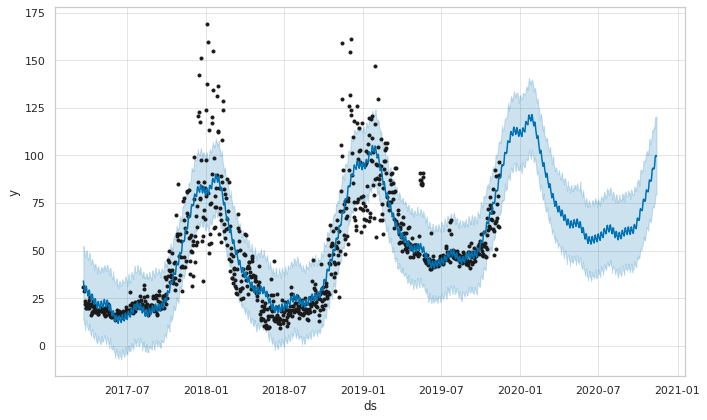

In [90]:
# pro_change.fit(train_dataset)
future_data = pro_change.make_future_dataframe(periods=365, freq = 'd')
 
#forecast the data for future data
forecast_data = pro_change.predict(future_data)
pro_change.plot(forecast_data);

In [92]:
model = Prophet(daily_seasonality = False, yearly_seasonality=True)
model.fit(train_df)

In [93]:
future = model.make_future_dataframe(periods=365)
future.tail()

ds
1328 2020-11-09
1329 2020-11-10
1330 2020-11-11
1331 2020-11-12
1332 2020-11-13

In [94]:
future.head(2)

ds
0 2017-03-22
1 2017-03-23

In [95]:
forecast = model.predict(future)
forecast.tail()

ds      trend  ...  multiplicative_terms_upper       yhat
1328 2020-11-09  85.165082  ...                         0.0  95.584962
1329 2020-11-10  85.200049  ...                         0.0  98.758901
1330 2020-11-11  85.235016  ...                         0.0  99.974636
1331 2020-11-12  85.269983  ...                         0.0  99.469654
1332 2020-11-13  85.304951  ...                         0.0  99.564638

[5 rows x 19 columns]

In [96]:
round(forecast['yhat'][-1:])

1332    100.0
Name: yhat, dtype: float64

In [97]:
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df_pr.set_index('ds'))
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['y']
print('MAPE', np.mean(abs(cmp_df[:]['p'])))
print('MAE', np.mean(abs(cmp_df[:]['e'])))

MAPE 20.69373241092452
MAE 9.135957669964228


In [0]:
pd.plotting.register_matplotlib_converters()

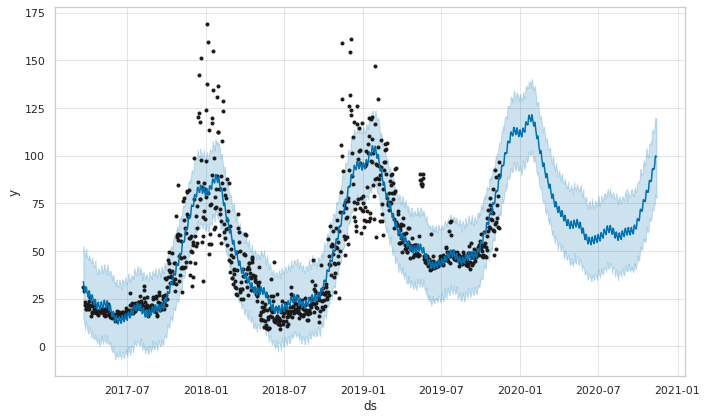

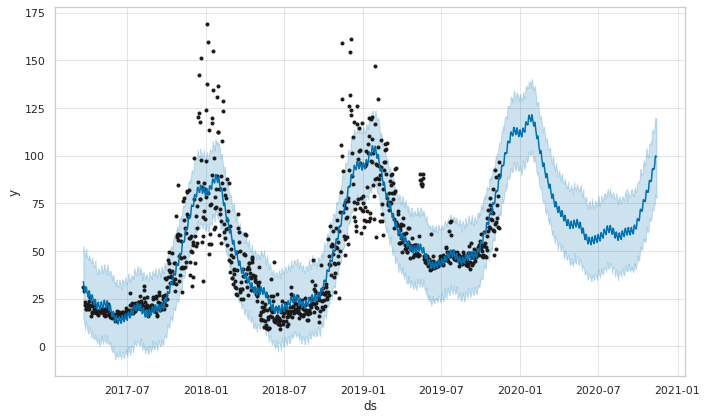

In [100]:
model.plot(forecast)

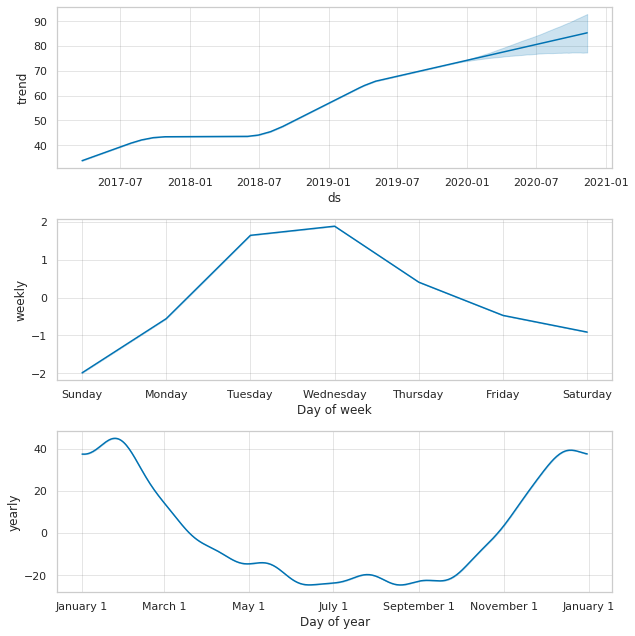

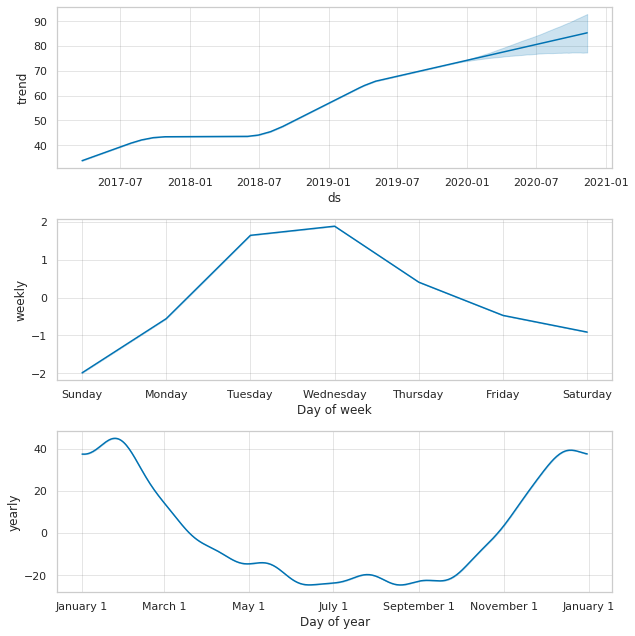

In [101]:
model.plot_components(forecast)

In [0]:
from fbprophet.plot import add_changepoints_to_plot

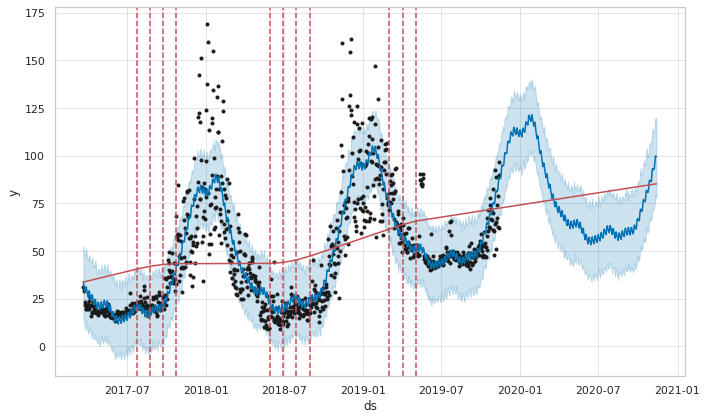

In [103]:
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

In [0]:
import folium 
import webbrowser

In [105]:
data_ts.head(2)

Сейфуллина - Дулатова  Альфараби - Маркова  ...  Жана Кайрат       mean
TS                                                      ...                        
2017-03-22             208.403433            91.982979  ...    23.783831  30.928116
2017-03-23             208.403433            84.649269  ...    23.783831  30.609259

[2 rows x 24 columns]

In [106]:
sensors.head(2)

0                      1       2          3       4       5
0  1  Сейфуллина - Дулатова  Алматы  Казахстан  43.313  76.939
1  2    Альфараби - Маркова  Алматы  Казахстан  43.224  76.938

In [0]:
data_ts_c = data_ts.reset_index()

In [0]:
data_ts_c = data_ts_c.drop(['mean'], axis=1)

In [0]:
data_ts_c['Quarter'] = pd.PeriodIndex(data_ts_c['TS'], freq='Q-MAR').strftime('Q%q')

In [110]:
data_ts_c.head(2)

TS  Сейфуллина - Дулатова  ...  Жана Кайрат  Quarter
0 2017-03-22             208.403433  ...    23.783831       Q4
1 2017-03-23             208.403433  ...    23.783831       Q4

[2 rows x 25 columns]

In [0]:
data_ts_c.columns[1:];

In [0]:
data_ts_c = data_ts_c.groupby(['Quarter'])[data_ts_c.columns[1:]].mean()

In [113]:
data_ts_c["Сейфуллина - Дулатова"].mean()

66.67605384838947

In [114]:
data_ts_c.head(5)

Сейфуллина - Дулатова  Альфараби - Маркова  ...       Абай  Жана Кайрат
Quarter                                              ...                        
Q1                   33.612612            23.882496  ...  15.094364    22.286591
Q2                   36.170603            27.158954  ...  18.776706    23.173651
Q3                   85.549790            66.506971  ...  47.876611    65.544439
Q4                  111.371210            82.966835  ...  47.133684    59.362078

[4 rows x 23 columns]

In [0]:
colordict = {0: 'lightblue', 1: 'lightgreen', 2: 'orange', 3: 'red',4: 'black'}

In [116]:
len(data_ts_c.iloc[[3]].values.tolist()[0])

23

In [0]:
colors = []
for i in data_ts_c.iloc[[3]].values.tolist()[0]:
    if i>=100:
        colors.append(3)
    elif i>=60:
        colors.append(2)
    elif i>=30:
        colors.append(1)
    else:
        colors.append(0)

In [0]:
sensors_lat = sensors.iloc[:,4].tolist()
sensors_long = sensors.iloc[:,5].tolist()

In [0]:
latitude = 43.313
longitude = 76.939
traffic_map = folium.Map(location=[latitude, longitude], zoom_start=5)

In [167]:
for lat, lon, score_q, score in zip(sensors_lat, sensors_long, colors, data_ts_c.iloc[[3]].values.tolist()[0]):
    folium.CircleMarker(
        [lat, lon],
        radius=.15*score,
        popup = ('Score: ' + str(score) + '<br>'),
        color='b',
        key_on = score_q,
        threshold_scale=[0,1,2,3],
        fill_color=colordict[score_q],
        fill=True,
        fill_opacity=0.7
        ).add_to(traffic_map)
 
folium.CircleMarker(
    [43.27524,76.930521],
    radius=.15*200,
    popup = ('Score: ' + str(200) + '<br>'),
    color='b',
    key_on = 200,
    threshold_scale=[0,1,2,3],
    fill_color=colordict[4],
    fill=True,
    fill_opacity=0.7
    ).add_to(traffic_map)

folium.CircleMarker(
    [43.290219,76.800034],
    radius=.15*200,
    popup = ('Score: ' + str(200) + '<br>'),
    color='b',
    key_on = 200,
    threshold_scale=[0,1,2,3],
    fill_color=colordict[4],
    fill=True,
    fill_opacity=0.7
    ).add_to(traffic_map)

In [0]:
points = []

In [0]:
points.append(tuple([43.292791,76.960044]))
points.append(tuple([43.321360,76.972071]))

points.append(tuple([43.321354,76.960149]))
points.append(tuple([43.295845,76.949423]))
points.append(tuple([43.292791,76.960044]))

In [170]:
folium.PolyLine(points, color="black", weight=2.5, opacity=1).add_to(traffic_map)

In [171]:
traffic_map